In [2]:
import pandas as pd
import numpy as np

In [3]:

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'  
# No need to include %matplotlib inline magic command. These things come built-in now.

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Load saved data

In [4]:
symptoms = pd.read_csv('symptoms_survey_dump.csv')
diagnosis = pd.read_csv('diagnosis_survey_dump.csv')

In [6]:
symptoms.columns

Index(['Unnamed: 0', 'name', 'time_scheduled', 'time', 'version',
       'time_received', 'time_start', 'pid', 'id', 'task_mood_time_start',
       ...
       'task_lcovid_symptoms_value_Stuffed Sinus',
       'task_lcovid_symptoms_value_Dry eyes & Blurred vision',
       'task_lcovid_symptoms_value_Hopelessness',
       'task_lcovid_symptoms_value_Abdominal Pain',
       'task_lcovid_symptoms_value_Bloating and gas',
       'task_lcovid_symptoms_value_Despair',
       'task_lcovid_symptoms_value_irritability',
       'task_lcovid_symptoms_value_Lack of interest in things',
       'task_lcovid_symptoms_value_Cognitive disfunction',
       'task_lcovid_symptoms_value_Stomach pain'],
      dtype='object', length=183)

In [7]:
diagnosis.columns

Index(['Unnamed: 0', 'time_scheduled', 'name', 'time_start', 'pid', 'version',
       'time', 'time_received', 'id', 'task_who_time_start',
       'task_who_time_end', 'task_who_value', 'task_how_time_start',
       'task_how_time_end', 'task_how_value', 'task_date_diagnosed_time_start',
       'task_date_diagnosed_time_end', 'task_date_diagnosed_value',
       'task_date_illness_time_start', 'task_date_illness_time_end',
       'task_date_illness_value'],
      dtype='object')

In [8]:
symptoms['task_symptoms_value_Fever'].tail()

283651    0.0
283652    0.0
283653    0.0
283654    0.0
283655    0.0
Name: task_symptoms_value_Fever, dtype: float64

# Process data

In [5]:
diagnosis = diagnosis.set_index(pd.to_datetime(diagnosis['time'], infer_datetime_format=True))

In [940]:
len(diagnosis['id'].unique())

2489

In [7]:
# Invalid data points
len(diagnosis[(pd.isnull(diagnosis['task_who_value'])) | (pd.isnull(diagnosis['task_how_value']))]['id'].unique())

319

In [9]:
# Filter for only self and all types of reports  ##PCR test.
diagnosis_filtered = diagnosis[(diagnosis['task_who_value'] == 0.0)] #& (diagnosis['task_how_value'] == 0.0)]

In [10]:
len(diagnosis_filtered['id'].unique())

1673

In [11]:
diagnosis_filtered['time'].describe()

count                                 2596
unique                                2596
top       2020-12-18 10:01:03.578999+00:00
freq                                     1
Name: time, dtype: object

In [12]:
diagnosis_filtered = diagnosis_filtered.set_index(pd.to_datetime(diagnosis_filtered['time'], infer_datetime_format=True))

In [13]:
diagnosis_filtered[pd.notnull(diagnosis_filtered['task_date_illness_value'])]

Unnamed: 0  time_scheduled             name  \
time                                                                            
2021-07-16 08:56:34.097000+00:00           0             NaN  Covid Diagnosis   
2021-08-28 20:03:10.522000+00:00           1             NaN  Covid Diagnosis   
2021-09-11 20:52:59.289000+00:00           4             NaN  Covid Diagnosis   
2021-11-23 10:00:58.891000+00:00           6             NaN  Covid Diagnosis   
2022-01-03 06:45:19.592000+00:00          15             NaN  Covid Diagnosis   
...                                      ...             ...              ...   
2022-01-02 18:50:01.124000+00:00        4105             NaN  Covid Diagnosis   
2021-09-29 12:03:52.571000+00:00        4107             NaN  Covid Diagnosis   
2021-01-21 23:53:31.092000+00:00        4120             NaN  Covid Diagnosis   
2021-01-21 22:56:56.350000+00:00        4125             NaN  Covid Diagnosis   
2021-01-23 13:12:43.873000+00:00        4126             NaN  Covid Diagnosis   

                                                        time_start        pid  \
time                                                                            
2021-07-16 08:56:34.097000+00:00  2021-07-16 08:55:41.784000+00:00  diagnosis   
2021-08-28 20:03:10.522000+00:00  2021-08-28 20:02:34.887000+00:00  diagnosis   
2021-09-11 20:52:59.289000+00:00  2021-09-11 20:52:12.467999+00:00  diagnosis   
2021-11-23 10:00:58.891000+00:00  2021-11-23 10:00:40.332000+00:00  diagnosis   
2022-01-03 06:45:19.592000+00:00  2022-01-03 06:44:31.256000+00:00  diagnosis   
...                                                            ...        ...   
2022-01-02 18:50:01.124000+00:00  2022-01-02 18:49:04.715000+00:00  diagnosis   
2021-09-29 12:03:52.571000+00:00  2021-09-29 12:03:26.702000+00:00  diagnosis   
2021-01-21 23:53:31.092000+00:00  2021-01-21 23:53:13.168000+00:00  diagnosis   
2021-01-21 22:56:56.350000+00:00  2021-01-21 22:56:36.790000+00:00  diagnosis   
2021-01-23 13:12:43.873000+00:00  2021-01-23 13:12:20.777000+00:00  diagnosis   

                                  version                              time  \
time                                                                          
2021-07-16 08:56:34.097000+00:00        2  2021-07-16 08:56:34.097000+00:00   
2021-08-28 20:03:10.522000+00:00        2  2021-08-28 20:03:10.522000+00:00   
2021-09-11 20:52:59.289000+00:00        2  2021-09-11 20:52:59.289000+00:00   
2021-11-23 10:00:58.891000+00:00        2  2021-11-23 10:00:58.891000+00:00   
2022-01-03 06:45:19.592000+00:00        2  2022-01-03 06:45:19.592000+00:00   
...                                   ...                               ...   
2022-01-02 18:50:01.124000+00:00        2  2022-01-02 18:50:01.124000+00:00   
2021-09-29 12:03:52.571000+00:00        2  2021-09-29 12:03:52.571000+00:00   
2021-01-21 23:53:31.092000+00:00        2  2021-01-21 23:53:31.092000+00:00   
2021-01-21 22:56:56.350000+00:00        2  2021-01-21 22:56:56.350000+00:00   
2021-01-23 13:12:43.873000+00:00        2  2021-01-23 13:12:43.873000+00:00   

                                                     time_received  \
time                                                                 
2021-07-16 08:56:34.097000+00:00  2021-07-16 08:56:33.781000+00:00   
2021-08-28 20:03:10.522000+00:00  2021-08-28 20:03:12.183000+00:00   
2021-09-11 20:52:59.289000+00:00  2021-09-11 20:52:59.415000+00:00   
2021-11-23 10:00:58.891000+00:00  2021-11-23 10:00:58.143000+00:00   
2022-01-03 06:45:19.592000+00:00  2022-01-03 06:45:19.645000+00:00   
...                                                            ...   
2022-01-02 18:50:01.124000+00:00  2022-01-02 18:49:54.855000+00:00   
2021-09-29 12:03:52.571000+00:00  2021-09-29 12:03:53.742000+00:00   
2021-01-21 23:53:31.092000+00:00  2021-01-21 23:53:29.768000+00:00   
2021-01-21 22:56:56.350000+00:00  2021-01-21 22:56:53.408000+00:00   
2021-01-23 13:12:43.873000+00:00  2021-01-23 13:12:40.5770

In [17]:
# Write diagnosis data
with open('diagnosis_filtered_df', 'wb') as f:
    pickle.dump(diagnosis_filtered, f)

NameError: name 'pickle' is not defined

In [14]:
# Fill the NA values in symptoms with 0 (meaning no symptom)
symptoms_fill = symptoms.fillna(0)

In [15]:
main_symptom_cols = ['task_symptoms_value_Cough','task_symptoms_value_Difficulties breathing','task_symptoms_value_Fever', 'task_symptoms_value_Loss of sense of smell (anosmia)']
secondary_symptom_cols = ['task_symptoms_value_Fatigue', 'task_symptoms_value_Muscle or joint pain', 'task_symptoms_value_Headache', 'task_symptoms_value_Nausea', 'task_symptoms_value_Congestion', 'task_symptoms_value_Chills', 'task_symptoms_value_Confusion']
lcovid_symptom_cols = ['task_lcovid_symptoms_value_Difficulty thinking (brain fog)', 'task_lcovid_symptoms_value_Difficulty sleeping (insomnia)', 'task_lcovid_symptoms_value_Fatigue']
mood_symptom_cols = ['task_mood_value_arousal', 'task_mood_value_valence']

In [16]:
all_symptom_cols = main_symptom_cols + secondary_symptom_cols + lcovid_symptom_cols

In [17]:
symptoms_fill['secondary_symptom_score'] = symptoms_fill.loc[:, secondary_symptom_cols].sum(axis=1)
symptoms_fill['main_symptom_score'] = symptoms_fill.loc[:, main_symptom_cols].sum(axis=1)
symptoms_fill['lcovid_symptom_score'] = symptoms_fill.loc[:, lcovid_symptom_cols].sum(axis=1)
symptoms_fill['total_symptom_score'] = symptoms_fill.loc[:, all_symptom_cols].sum(axis=1)

In [18]:
symptoms_fill = symptoms_fill.set_index(pd.to_datetime(symptoms_fill['time'], infer_datetime_format=True))

In [19]:
symptoms_with_diag = symptoms_fill[symptoms_fill['id'].isin(diagnosis_filtered['id'].unique())]

In [20]:
symptoms_with_diag = symptoms_with_diag.set_index(pd.to_datetime(symptoms_with_diag['time'], infer_datetime_format=True))

In [21]:
symptoms_with_diag = symptoms_with_diag.drop(['Unnamed: 0', 'time_scheduled', 'pid', 'version'], axis=1)

In [22]:
# Filter where atleast one symptom severity is greate than 0
symptoms_with_diag_filtered = symptoms_with_diag.loc[(symptoms_with_diag[main_symptom_cols + secondary_symptom_cols + lcovid_symptom_cols] > 0.0).any(1)]

In [23]:
# We also resample to 1D and add take mean of all the values in a single day, to make sure the data is daily
# and hence the count will be of daily symptoms reports (will eradicate more than 1 report in a day).
symptoms_with_diag_grouped = symptoms_with_diag_filtered.groupby(['id', pd.Grouper(freq='1D', level='time')]).mean()

In [965]:
len(symptoms_with_diag_filtered['id'].unique())

1327

# Divide into cohorts

In [38]:
# function to get uniform distribution conformity (d-statistic and pvalue using KS test)
from scipy.stats import ks_2samp
def ks_test(data, uniform_dist=None, seed=12345):
    n = len(data)
    start = min(data)
    end = max(data)
    #print(f'Creating uniform distribution of len: {n} and time range: {start}, {end}')

    if uniform_dist == None:
        np.random.seed(seed)
        uniform_dist = np.random.default_rng().uniform(start.timestamp(),end.timestamp(),n)
    #print(s)

    x_t = [i.timestamp() for i in data]
    #print(x_t)

    ks_res = ks_2samp(uniform_dist, x_t)
    return ks_res

In [39]:
def ks_pvalue(x, seed):
    ks_val = ks_test(x.sort_index().index.remove_unused_levels().levels[1], seed=seed)
    #print(ks_val)
    return ks_val.pvalue
    
def ks_dstatistic(x, seed):
    ks_val = ks_test(x.sort_index().index.remove_unused_levels().levels[1], seed=seed)
    return ks_val.statistic

In [40]:
def calculate_window(df, window='84D'):
    temp_dfs = []
    count = 0
    for grp, grp_df in df.groupby(level='id'):
        if len(grp_df) == 0:
            continue
        grp_df_cp = grp_df.copy()

        diag_dates = diagnosis_filtered[diagnosis_filtered['id'] == grp]
        i = 0
        for index, row in diag_dates.iterrows():
            if pd.notnull(row['task_date_illness_value']):
                index = pd.to_datetime(row['task_date_illness_value'], infer_datetime_format=True)
            i+=1
            # If more than 1 diagnosis, we create a unique id for the same user
            if i > 1:
                try:
                    grp = f'{grp}_repeat_{i}'
                    grp_df = grp_df_cp.reindex(level='id', index=[grp])
                except ValueError as ve:
                    print(ve)
                    display(grp_df)
                    display(grp)
                    raise ve

    #         display(len(diag_dates))
    #         display(grp)
    #         display(diag_dates)

            #display(grp_df.reset_index('id'))
            seed = np.random.randint(10000)

            # Take only time window from 15 days before diagnosis (since symptoms can appear before diagnosis)
            idx = pd.IndexSlice
            grp_df = grp_df.loc[idx[:, index-pd.Timedelta(10, unit='days'):], :]

            grp_df.index = grp_df.index.remove_unused_levels()
    #         display(grp_df)
            res_df = grp_df.rolling(window='84D', on=grp_df.index.levels[1], min_periods=1).agg(['sum', 'mean', 'count', 'max', 'min', 'std'])
            grp_df['ks_stats'] = 0
            res_df = pd.concat([res_df, grp_df['ks_stats'].rolling(window=lcovid_definition,on=grp_df.index.levels[1], min_periods=1).agg({'ks_pvalue': lambda x: ks_pvalue(x, seed), 'ks_dstatistic': lambda x: ks_dstatistic(x, seed)})], axis=1)
            #display(res_df.head())
            temp_dfs.append(res_df)
        count+=1
        if count % 100 == 0:
            print(f'progress: {count}', end='\x1b[1K\r')
    print(f'Total added: {count}')
    return temp_dfs

## Cohort 3: long/chronic covid (more than 12 weeks)

In [41]:
# Group by user Ids and rolling windows of 12 weeks (soft definition of Long covid from Literature)
lcovid_definition='84D'

lcovid_dfs = calculate_window(symptoms_with_diag_grouped, window=lcovid_definition)

Total added: 1327K


In [42]:
# save intermediate processed data to fs so can be loaded later
import pickle
with open('lcovid_dfs', 'wb+') as f:
    pickle.dump(lcovid_dfs, f)

In [27]:
# Load intermediate processed data from fs
import pickle
with open('lcovid_dfs', 'rb') as f:
    lcovid_dfs = pickle.load(f)

In [43]:
lcovid_window_dfs = pd.concat(lcovid_dfs)

lcovid_window_dfs
#symptoms_no_diag_window = symptoms_no_diag_grouped.rolling(window='84D', on=symptoms_no_diag_grouped.index.levels[1]).agg(['sum', 'mean', 'count'])

(task_mood_value_valence, sum)  \
id                           time                                                        
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00                          -0.500   
                             2021-07-16 00:00:00+00:00                          -1.125   
01dWPpgq7Nenmdej73ONXdNDjaH2 2021-08-28 00:00:00+00:00                           0.000   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00                           0.250   
                             2021-01-16 00:00:00+00:00                           0.750   
...                                                                                ...   
zxSQFV06pzSr3eOw5sZ5ETv2NaD2 2021-06-13 00:00:00+00:00                           3.000   
zzvksuOwiSNtBglkEr8z5nctTz53 2021-01-21 00:00:00+00:00                           0.000   
                             2021-01-22 00:00:00+00:00                           0.000   
                             2021-01-23 00:00:00+00:00                           0.000   
                             2021-01-25 00:00:00+00:00                           0.000   

                                                        (task_mood_value_valence, mean)  \
id                           time                                                         
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00                          -0.5000   
                             2021-07-16 00:00:00+00:00                          -0.5625   
01dWPpgq7Nenmdej73ONXdNDjaH2 2021-08-28 00:00:00+00:00                           0.0000   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00                           0.2500   
                             2021-01-16 00:00:00+00:00                           0.3750   
...                                                                                 ...   
zxSQFV06pzSr3eOw5sZ5ETv2NaD2 2021-06-13 00:00:00+00:00                           0.1875   
zzvksuOwiSNtBglkEr8z5nctTz53 2021-01-21 00:00:00+00:00                           0.0000   
                             2021-01-22 00:00:00+00:00                           0.0000   
                             2021-01-23 00:00:00+00:00                           0.0000   
                             2021-01-25 00:00:00+00:00                           0.0000   

                                                        (task_mood_value_valence, count)  \
id                           time                                                          
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00                               1.0   
                             2021-07-16 00:00:00+00:00                               2.0   
01dWPpgq7Nenmdej73ONXdNDjaH2 2021-08-28 00:00:00+00:00                               1.0   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00                               1.0   
                             2021-01-16 00:00:00+00:00                               2.0   
...                                                                                  ...   
zxSQFV06pzSr3eOw5sZ5ETv2NaD2 2021-06-13 00:00:00+00:00                              16.0   
zzvksuOwiSNtBglkEr8z5nctTz53 2021-01-21 00:00:00+00:00                               1.0   
                             2021-01-22 00:00:00+00:00                               2.0   
                             2021-01-23 00:00:00+00:00                               3.0   
                             2021-01-25 00:00:00+00:00                               4.0   

                                                        (task_mood_value_valence, max)  \
id                           time                                                        
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00                           -0.50   
                             2021-07-16 00:00:00+00:00                           -0.50   
01dWPpgq7Nenmdej73ONXdNDjaH2 2021-08-28 00:00:00+00:00                            0.00   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00

In [37]:
lcovid_window_dfs[lcovid_window_dfs[('total_symptom_score','count')] > 50.0]

(task_mood_value_valence, sum)  \
id                           time                                                        
0NYueclxhpVxzXhfAhpAUsR0H1C2 2021-01-23 00:00:00+00:00                           17.25   
                             2021-01-24 00:00:00+00:00                           17.75   
                             2021-01-25 00:00:00+00:00                           18.00   
                             2021-01-26 00:00:00+00:00                           18.25   
                             2021-01-27 00:00:00+00:00                           18.50   
...                                                                                ...   
l1lKiSGKHmdvsPf2ewazBgMIONW2 2021-03-31 00:00:00+00:00                           29.00   
                             2021-04-01 00:00:00+00:00                           29.25   
                             2021-04-02 00:00:00+00:00                           28.75   
                             2021-04-03 00:00:00+00:00                           29.50   
                             2021-04-05 00:00:00+00:00                           30.00   

                                                        (task_mood_value_valence, mean)  \
id                           time                                                         
0NYueclxhpVxzXhfAhpAUsR0H1C2 2021-01-23 00:00:00+00:00                         0.338235   
                             2021-01-24 00:00:00+00:00                         0.341346   
                             2021-01-25 00:00:00+00:00                         0.339623   
                             2021-01-26 00:00:00+00:00                         0.337963   
                             2021-01-27 00:00:00+00:00                         0.336364   
...                                                                                 ...   
l1lKiSGKHmdvsPf2ewazBgMIONW2 2021-03-31 00:00:00+00:00                         0.500000   
                             2021-04-01 00:00:00+00:00                         0.504310   
                             2021-04-02 00:00:00+00:00                         0.495690   
                             2021-04-03 00:00:00+00:00                         0.500000   
                             2021-04-05 00:00:00+00:00                         0.500000   

                                                        (task_mood_value_valence, count)  \
id                           time                                                          
0NYueclxhpVxzXhfAhpAUsR0H1C2 2021-01-23 00:00:00+00:00                              51.0   
                             2021-01-24 00:00:00+00:00                              52.0   
                             2021-01-25 00:00:00+00:00                              53.0   
                             2021-01-26 00:00:00+00:00                              54.0   
                             2021-01-27 00:00:00+00:00                              55.0   
...                                                                                  ...   
l1lKiSGKHmdvsPf2ewazBgMIONW2 2021-03-31 00:00:00+00:00                              58.0   
                             2021-04-01 00:00:00+00:00                              58.0   
                             2021-04-02 00:00:00+00:00                              58.0   
                             2021-04-03 00:00:00+00:00                              59.0   
                             2021-04-05 00:00:00+00:00                              60.0   

                                                        (task_mood_value_valence, max)  \
id                           time                                                        
0NYueclxhpVxzXhfAhpAUsR0H1C2 2021-01-23 00:00:00+00:00                            0.50   
                             2021-01-24 00:00:00+00:00                            0.50   
                             2021-01-25 00:00:00+00:00                            0.50   
                             2021-01-26 00:00:00+00:00

In [712]:
# Unique users with symptoms for more than 12 days in a 84 day window (based on anwsering once every week) and uniformly distributed over time
lcovid_ids = lcovid_window_dfs[(lcovid_window_dfs[('total_symptom_score','count')] >= 12.0) & (lcovid_window_dfs['ks_pvalue'] > 0.1) ].index.remove_unused_levels().levels[0].unique()
display(lcovid_ids)
len(lcovid_ids)

Index(['02KIBYpUG9QJ9yL0w7fU1oHUysu1', '02R0diCwLLR9agcvXyBsluR2GoW2',
       '0NYueclxhpVxzXhfAhpAUsR0H1C2', '1EDK902lN8dvyySIO1WVfCjxm5F3',
       '1zkuBfW7XOTuwWC85dFACkRlcnC3', '24N0DS429CeGFy5p7Dg4JZ0zBGa2',
       '261LeuAIPpcYYlLL8y98wlpaA5m2', '2HeA1jHfEbUwuSwX9drT84EhuKf2',
       '2IFG9qThxkWQKxoGAeocMa0Nb2h1', '2X4ura6JvpQfB7JHZHo78jM34MX2',
       ...
       'xJdY29u2wLcc2tlR6NUZ6KDHt333', 'y3tpd5Z2ezObZX2FDkIYdEGNiCK2',
       'y9qXJWDTJNQ33bq0y2TYHnAYpKw2', 'yAHfWqzHSjWOOxC0cEqSyVtMOW72',
       'yD5QOGx7b4Y6o4O9u1NqedOFD8y2', 'yM19ZnEXPVXgir0V04Jv3bC9X9v1',
       'zAlOjf6a3KMI8dciCVX6WCz5bZe2', 'zSNi7h9gu3NFGBeoN8kTwIaLM0a2',
       'zv7BUkCSS9eatY96QyEc1wKlqJE3', 'zxSQFV06pzSr3eOw5sZ5ETv2NaD2'],
      dtype='object', name='id', length=161)

161

In [713]:
# Latest % of Lcovid in the cohort
l_covid_percent = len(lcovid_ids) / len(symptoms_with_diag_filtered['id'].unique()) * 100
l_covid_percent

12.132629992464206

## Cohort 2: post acute covid (3 weeks to 12 weeks)

In [46]:
# Group by user Ids and rolling windows of 3 weeks (soft definition of post acute covid from Literature)
post_acute_definition='21D'

post_acute_dfs = calculate_window(symptoms_with_diag_grouped, window=post_acute_definition)

Total added: 1327K


In [47]:
# save intermediate processed data to fs so can be loaded later
import pickle
with open('post_acute_dfs', 'wb+') as f:
    pickle.dump(post_acute_dfs, f)

In [31]:
# Load intermediate processed data from fs
import pickle
with open('post_acute_dfs', 'rb') as f:
    post_acute_dfs = pickle.load(f)

In [48]:
post_acute_window_dfs = pd.concat(post_acute_dfs)

post_acute_window_dfs
#symptoms_no_diag_window = symptoms_no_diag_grouped.rolling(window='84D', on=symptoms_no_diag_grouped.index.levels[1]).agg(['sum', 'mean', 'count'])

(task_mood_value_valence, sum)  \
id                           time                                                        
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00                          -0.500   
                             2021-07-16 00:00:00+00:00                          -1.125   
01dWPpgq7Nenmdej73ONXdNDjaH2 2021-08-28 00:00:00+00:00                           0.000   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00                           0.250   
                             2021-01-16 00:00:00+00:00                           0.750   
...                                                                                ...   
zxSQFV06pzSr3eOw5sZ5ETv2NaD2 2021-06-13 00:00:00+00:00                           3.000   
zzvksuOwiSNtBglkEr8z5nctTz53 2021-01-21 00:00:00+00:00                           0.000   
                             2021-01-22 00:00:00+00:00                           0.000   
                             2021-01-23 00:00:00+00:00                           0.000   
                             2021-01-25 00:00:00+00:00                           0.000   

                                                        (task_mood_value_valence, mean)  \
id                           time                                                         
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00                          -0.5000   
                             2021-07-16 00:00:00+00:00                          -0.5625   
01dWPpgq7Nenmdej73ONXdNDjaH2 2021-08-28 00:00:00+00:00                           0.0000   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00                           0.2500   
                             2021-01-16 00:00:00+00:00                           0.3750   
...                                                                                 ...   
zxSQFV06pzSr3eOw5sZ5ETv2NaD2 2021-06-13 00:00:00+00:00                           0.1875   
zzvksuOwiSNtBglkEr8z5nctTz53 2021-01-21 00:00:00+00:00                           0.0000   
                             2021-01-22 00:00:00+00:00                           0.0000   
                             2021-01-23 00:00:00+00:00                           0.0000   
                             2021-01-25 00:00:00+00:00                           0.0000   

                                                        (task_mood_value_valence, count)  \
id                           time                                                          
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00                               1.0   
                             2021-07-16 00:00:00+00:00                               2.0   
01dWPpgq7Nenmdej73ONXdNDjaH2 2021-08-28 00:00:00+00:00                               1.0   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00                               1.0   
                             2021-01-16 00:00:00+00:00                               2.0   
...                                                                                  ...   
zxSQFV06pzSr3eOw5sZ5ETv2NaD2 2021-06-13 00:00:00+00:00                              16.0   
zzvksuOwiSNtBglkEr8z5nctTz53 2021-01-21 00:00:00+00:00                               1.0   
                             2021-01-22 00:00:00+00:00                               2.0   
                             2021-01-23 00:00:00+00:00                               3.0   
                             2021-01-25 00:00:00+00:00                               4.0   

                                                        (task_mood_value_valence, max)  \
id                           time                                                        
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00                           -0.50   
                             2021-07-16 00:00:00+00:00                           -0.50   
01dWPpgq7Nenmdej73ONXdNDjaH2 2021-08-28 00:00:00+00:00                            0.00   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00

In [49]:
# filter out ids already in l-covid cohort
for i in lcovid_ids:
    post_acute_window_dfs.drop(i, axis='index', inplace=True)

In [714]:
# Unique users with symptoms for more than 4 days in a 21 day window (based on anwsering once every week) and uniformly distributed over time
post_acute_ids = post_acute_window_dfs[(post_acute_window_dfs[('total_symptom_score','count')] >= 3) & (post_acute_window_dfs['ks_pvalue'] > 0.1) ].index.remove_unused_levels().levels[0].unique()
display(post_acute_ids)
len(post_acute_ids)

Index(['03PCkZSgsRg3lgPAu37srPG1VGG3', '05VumUnsTBgObCr6UwzpUM84urd2',
       '06LZlNI9fhfoYMClmJ2xjeysr3T2', '0Eswk2gdkrd2u3ljOydE8EmGkkO2',
       '0GlyBokvwlVT8STbRVSvcWPY8u32', '0KKdatbJWUMs5aFk6ewVvftKihq2',
       '0RywDi7yJ1bhoudBKXNkIaJOa4K2', '0VoJOWFzlSasmxKh7wEouupYfGi2',
       '0WDczhOvcZbg7uUe7yqOdMUPrs23', '0YXuBKrbltQO5FZGv5GHsoF4Ssk2',
       ...
       'yTrQa9rl4LdB8JRLc5J2MZRA6YY2', 'yjioIr15NpcowO0VigHxSaFksfo2',
       'ylfxyfHhU6X211ma3qT2vmlTr112', 'yygwu2SkzhbItf73vKUIuT7FR613',
       'z2prKmRgiSQ5BRRLTIjs3VToDOB3', 'zP3SfP4gUQhg0Uf7D8QIqTC67eG2',
       'zPbKbS6RRybcL4z35aIZYbWNpOK2', 'zfw4HoPjAkg42H0hq3waElGUoCo2',
       'zwpspvv3nVXN9Q1H3abS4VqdGVH2', 'zzvksuOwiSNtBglkEr8z5nctTz53'],
      dtype='object', name='id', length=424)

424

In [716]:
# Latest % of Lcovid in the cohort
post_acute_percent = len(post_acute_ids) / len(symptoms_with_diag_filtered['id'].unique()) * 100
post_acute_percent

31.951770911831197

## Cohort 1: short covid (less than 3 weeks)

In [52]:
# Group by user Ids and rolling windows of 3 weeks (soft definition of post acute covid from Literature)
short_covid_definition='3D'

short_covid_dfs = calculate_window(symptoms_with_diag_grouped, window=short_covid_definition)

Total added: 1327K


In [53]:
# save intermediate processed data to fs so can be loaded later
import pickle
with open('short_covid_dfs', 'wb+') as f:
    pickle.dump(short_covid_dfs, f)

In [36]:
# Load intermediate processed data from fs
import pickle
with open('short_covid_dfs', 'rb') as f:
    short_covid_dfs = pickle.load(f)

In [54]:
short_covid_window_dfs = pd.concat(short_covid_dfs)

short_covid_window_dfs
#symptoms_no_diag_window = symptoms_no_diag_grouped.rolling(window='84D', on=symptoms_no_diag_grouped.index.levels[1]).agg(['sum', 'mean', 'count'])

(task_mood_value_valence, sum)  \
id                           time                                                        
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00                          -0.500   
                             2021-07-16 00:00:00+00:00                          -1.125   
01dWPpgq7Nenmdej73ONXdNDjaH2 2021-08-28 00:00:00+00:00                           0.000   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00                           0.250   
                             2021-01-16 00:00:00+00:00                           0.750   
...                                                                                ...   
zxSQFV06pzSr3eOw5sZ5ETv2NaD2 2021-06-13 00:00:00+00:00                           3.000   
zzvksuOwiSNtBglkEr8z5nctTz53 2021-01-21 00:00:00+00:00                           0.000   
                             2021-01-22 00:00:00+00:00                           0.000   
                             2021-01-23 00:00:00+00:00                           0.000   
                             2021-01-25 00:00:00+00:00                           0.000   

                                                        (task_mood_value_valence, mean)  \
id                           time                                                         
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00                          -0.5000   
                             2021-07-16 00:00:00+00:00                          -0.5625   
01dWPpgq7Nenmdej73ONXdNDjaH2 2021-08-28 00:00:00+00:00                           0.0000   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00                           0.2500   
                             2021-01-16 00:00:00+00:00                           0.3750   
...                                                                                 ...   
zxSQFV06pzSr3eOw5sZ5ETv2NaD2 2021-06-13 00:00:00+00:00                           0.1875   
zzvksuOwiSNtBglkEr8z5nctTz53 2021-01-21 00:00:00+00:00                           0.0000   
                             2021-01-22 00:00:00+00:00                           0.0000   
                             2021-01-23 00:00:00+00:00                           0.0000   
                             2021-01-25 00:00:00+00:00                           0.0000   

                                                        (task_mood_value_valence, count)  \
id                           time                                                          
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00                               1.0   
                             2021-07-16 00:00:00+00:00                               2.0   
01dWPpgq7Nenmdej73ONXdNDjaH2 2021-08-28 00:00:00+00:00                               1.0   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00                               1.0   
                             2021-01-16 00:00:00+00:00                               2.0   
...                                                                                  ...   
zxSQFV06pzSr3eOw5sZ5ETv2NaD2 2021-06-13 00:00:00+00:00                              16.0   
zzvksuOwiSNtBglkEr8z5nctTz53 2021-01-21 00:00:00+00:00                               1.0   
                             2021-01-22 00:00:00+00:00                               2.0   
                             2021-01-23 00:00:00+00:00                               3.0   
                             2021-01-25 00:00:00+00:00                               4.0   

                                                        (task_mood_value_valence, max)  \
id                           time                                                        
00a9SPtBFkYF8KmWTvPPU0y69Xo1 2021-06-29 00:00:00+00:00                           -0.50   
                             2021-07-16 00:00:00+00:00                           -0.50   
01dWPpgq7Nenmdej73ONXdNDjaH2 2021-08-28 00:00:00+00:00                            0.00   
02KIBYpUG9QJ9yL0w7fU1oHUysu1 2021-01-14 00:00:00+00:00

In [55]:
# filter out ids already in l-covid and post acute covid cohorts
for i in [lcovid_ids, post_acute_ids]:
    short_covid_window_dfs.drop(i, axis='index', inplace=True)

In [717]:
# Unique users with symptoms for more than 4 days in a 21 day window (based on anwsering once every week) and uniformly distributed over time
short_covid_ids = short_covid_window_dfs[(short_covid_window_dfs[('total_symptom_score','count')] >= 1) & (short_covid_window_dfs['ks_pvalue'] > 0.1) ].index.remove_unused_levels().levels[0].unique()
display(short_covid_ids)
len(short_covid_ids)

Index(['00a9SPtBFkYF8KmWTvPPU0y69Xo1', '01dWPpgq7Nenmdej73ONXdNDjaH2',
       '0QJ0Gi285wbL6AEHgMmhcC0TTOw2', '0QQYPfuYJWSx5sh7xgZHzJDk14L2',
       '0USSQQQ402gmTp7Z9Uu1dxJogtn2', '0WZlA4HB3NUC2VBbi0EVTGdM5BA2',
       '0hJ3WiwD2SUE4ADoOf61P4Gg7ER2', '0tOQTF9RMHfVYwixbKuzWeXyiNC2',
       '0tWor6rXbnOHnudvPDwULWamPVr2', '0vbG9yyDYJgHnhu2Igw4Je0hcLk1',
       ...
       'yfD48dqUDqMauHFlg2QBaxZXGVa2', 'ygWxKjagpaXeYKLJNZquMzsvebq2',
       'yklicMTlpbbIXCsS81Dg4IKEGRg2', 'yknHrROLdQdEJEjYzqLrnYFLTet2',
       'yl8TAAVRgZNH0tmFfvD4bMGvwpR2', 'yqEXklYclXgugITaHQghQGx2rFv1',
       'yv4QuXJnyJfmaEdEIklvmK24bv22', 'z9sZNwRTzdYxVdmy9w9CihGZX2X2',
       'zQtBM94XNtdNhJxgOTYc3eiXW8U2', 'zRXXUmU2I9hbNMi1Ry2tg2CACax1'],
      dtype='object', name='id', length=680)

680

In [962]:
len(symptoms_with_diag_filtered['id'].unique())

1327

In [718]:
# Latest % of Lcovid in the cohort
short_covid_percent = len(short_covid_ids) / len(symptoms_with_diag_filtered['id'].unique()) * 100
short_covid_percent

51.24340617935192

Text(1329, 0, '1327')

Text(682, 1, '680')

Text(426, 2, '424')

Text(163, 3, '161')

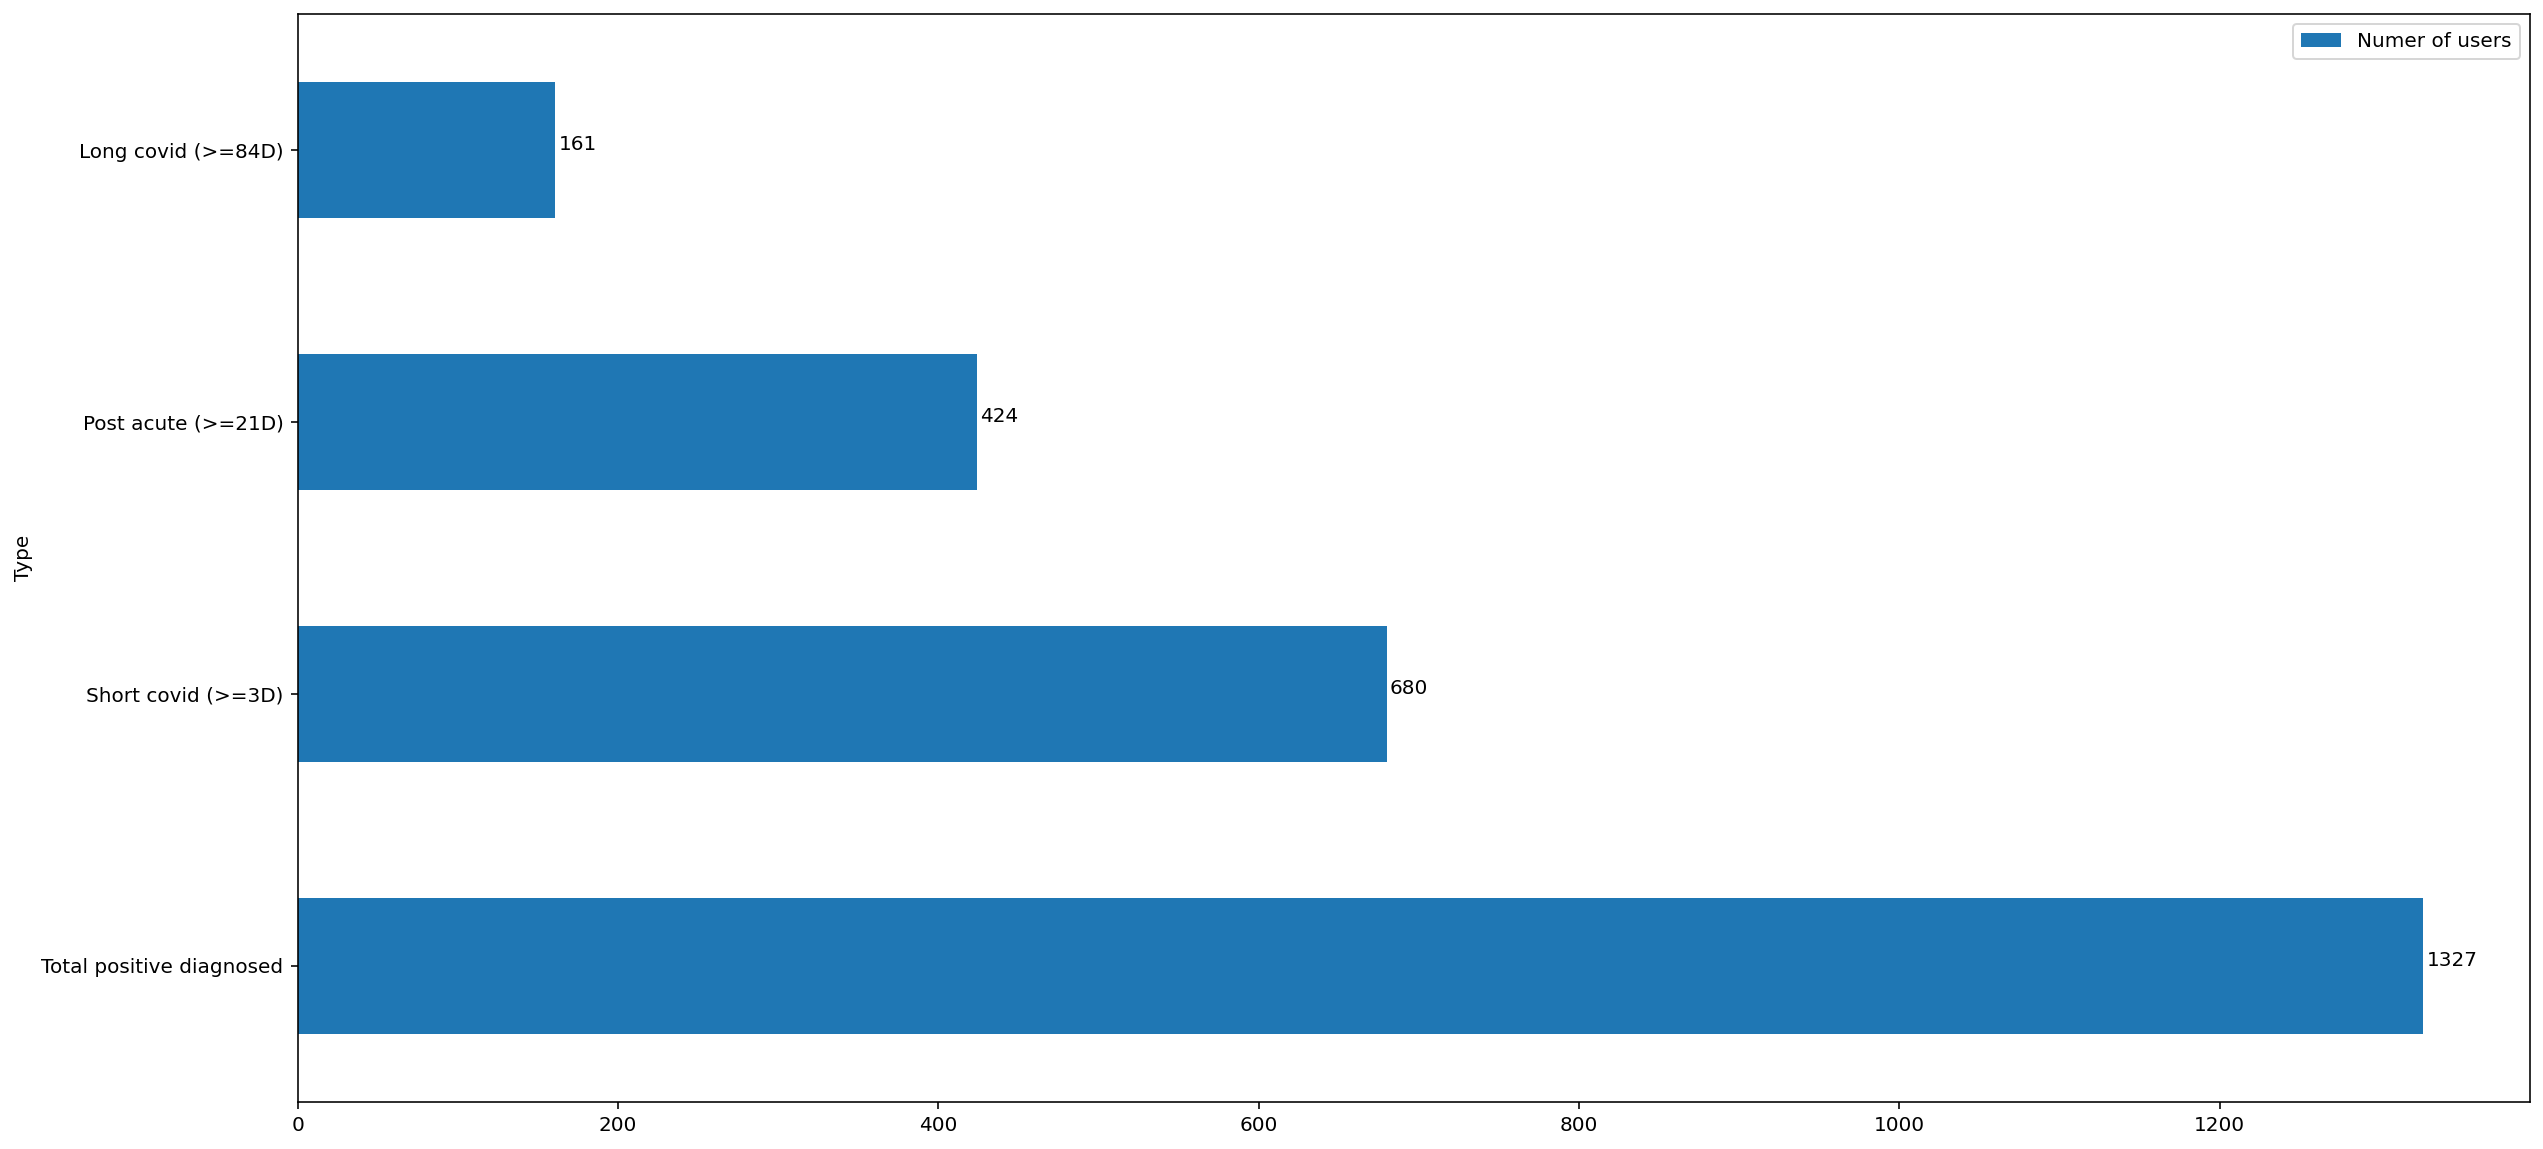

In [58]:
plot_bar_df = pd.DataFrame({
    'Type': ['Total positive diagnosed', 'Short covid (>=3D)', 'Post acute (>=21D)', 'Long covid (>=84D)'],
    'Numer of users': [len(symptoms_with_diag_filtered['id'].unique()), len(short_covid_ids), len(post_acute_ids), len(lcovid_ids)]
})
plot_bar_df = plot_bar_df.set_index('Type')
ax = plot_bar_df.plot.barh(figsize=(20,10))

for i, v in enumerate(plot_bar_df['Numer of users']):
    ax.text(v + 2, i , str(round(v, 2)), color='black')

In [964]:
len(combined_short_covid_ids)

1104

In [963]:
# Latest % of Lcovid in the cohort
combined_short_covid_percent = len(combined_short_covid_ids) / len(symptoms_with_diag_filtered['id'].unique()) * 100
combined_short_covid_percent

83.19517709118311

## Cohort 4: Healthy cohort -- No covid diagnosis and No persistent symptoms (<2 weeks of symptoms with severity less than 5 per week)

# Important Naming for Short covid + Post acute covid

In [719]:
combined_short_covid_ids = post_acute_ids.append(short_covid_ids)

# Save the cohorts data

In [144]:
save_df = symptoms_with_diag_filtered.copy()

In [145]:
save_df = save_df.drop(columns=['name', 'time', 'time_received', 'time_start'] + list(save_df.filter(regex='.*_time_start').columns) + list(save_df.filter(regex='.*_time_end').columns))

In [146]:
save_df.columns = [c.replace('task_mood_value_', '').replace('task_symptoms_value_', '').replace('task_lcovid_symptoms_value_', 'lcovid_') for c in save_df.columns]

In [224]:
save_df

id  valence  \
time                                                                      
2021-07-16 08:59:36.848000+00:00  00a9SPtBFkYF8KmWTvPPU0y69Xo1    -0.50   
2021-07-16 08:50:42.455000+00:00  00a9SPtBFkYF8KmWTvPPU0y69Xo1    -0.75   
2021-06-29 08:48:24.291000+00:00  00a9SPtBFkYF8KmWTvPPU0y69Xo1    -0.50   
2021-08-28 14:47:38.855000+00:00  01dWPpgq7Nenmdej73ONXdNDjaH2     0.00   
2020-11-03 12:25:24.380000+00:00  02KIBYpUG9QJ9yL0w7fU1oHUysu1     0.50   
...                                                        ...      ...   
2021-05-23 18:51:15.194999+00:00  zxSQFV06pzSr3eOw5sZ5ETv2NaD2     0.00   
2021-01-25 00:37:05.466000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   
2021-01-22 10:00:53.205000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   
2021-01-21 22:56:12.777000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   
2021-01-23 13:12:17.625000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   

                                  arousal  Fever  Difficulties breathing  \
time                                                                       
2021-07-16 08:59:36.848000+00:00    -0.50    0.0                     0.0   
2021-07-16 08:50:42.455000+00:00    -0.75    0.0                     0.0   
2021-06-29 08:48:24.291000+00:00    -0.50    0.0                     0.0   
2021-08-28 14:47:38.855000+00:00     0.00    0.0                     0.0   
2020-11-03 12:25:24.380000+00:00     0.50    0.0                     1.0   
...                                   ...    ...                     ...   
2021-05-23 18:51:15.194999+00:00    -0.50    0.0                     1.0   
2021-01-25 00:37:05.466000+00:00     0.00    0.0                     1.0   
2021-01-22 10:00:53.205000+00:00     0.00    0.0                     2.0   
2021-01-21 22:56:12.777000+00:00     0.00    0.0                     2.0   
2021-01-23 13:12:17.625000+00:00     0.00    0.0                     1.0   

                                  Loss of sense of smell (anosmia)  Cough  \
time                                                                        
2021-07-16 08:59:36.848000+00:00                               0.0    0.0   
2021-07-16 08:50:42.455000+00:00                               0.0    0.0   
2021-06-29 08:48:24.291000+00:00                               0.0    2.0   
2021-08-28 14:47:38.855000+00:00                               0.0    1.0   
2020-11-03 12:25:24.380000+00:00                               0.0    0.0   
...                                                            ...    ...   
2021-05-23 18:51:15.194999+00:00                               0.0    0.0   
2021-01-25 00:37:05.466000+00:00                               3.0    0.0   
2021-01-22 10:00:53.205000+00:00                               0.0    1.0   
2021-01-21 22:56:12.777000+00:00                               0.0    1.0   
2021-01-23 13:12:17.625000+00:00                               3.0    0.0   

                                  lcovid_Fatigue  \
time                                               
2021-07-16 08:59:36.848000+00:00             2.0   
2021-07-16 08:50:42.455000+00:00             2.0   
2021-06-29 08:48:24.291000+00:00             2.0   
2021-08-28 14:47:38.855000+00:00             1.0   
2020-11-03 12:25:24.380000+00:00             0.0   
...                                          ...   
2021-05-23 18:51:15.194999+00:00             0.0   
2021-01-25 00:37:05.466000+00:00             0.0   
2021-01-22 10:00:53.205000+00:00             0.0   
2021-01-21 22:56:12.777000+00:00             0.0   
2021-01-23 13:12:17.625000+00:00             0.0   

                                  lcovid_Difficulty sleeping (insomnia)  \
time                                                                      
2021-07-16 08:59:36.848000+00:00                                    3.0   
2021-07-16 08:50:42.455000+00:00                                    3.0   
2021-06-29 08:48:24.291000+00:00                                    2.0   
2021-08-28 14:47:38.855000+00:00         

In [147]:
import pickle

In [148]:
lcovid_df = save_df[save_df['id'].isin(lcovid_ids)]
lcovid_df
with open('long_covid_symptoms_df', 'wb') as f:
    pickle.dump(lcovid_df, f)

id  valence  \
time                                                                      
2020-11-03 12:25:24.380000+00:00  02KIBYpUG9QJ9yL0w7fU1oHUysu1     0.50   
2020-10-28 17:07:54.955000+00:00  02KIBYpUG9QJ9yL0w7fU1oHUysu1     0.50   
2020-11-20 10:15:34.082000+00:00  02KIBYpUG9QJ9yL0w7fU1oHUysu1     0.50   
2021-06-26 20:28:32.073000+00:00  02KIBYpUG9QJ9yL0w7fU1oHUysu1     0.25   
2020-12-15 15:49:38.397000+00:00  02KIBYpUG9QJ9yL0w7fU1oHUysu1     0.25   
...                                                        ...      ...   
2021-04-27 09:17:56.947000+00:00  zxSQFV06pzSr3eOw5sZ5ETv2NaD2     0.50   
2021-02-16 18:41:04.832000+00:00  zxSQFV06pzSr3eOw5sZ5ETv2NaD2     0.25   
2021-04-13 09:06:25.426000+00:00  zxSQFV06pzSr3eOw5sZ5ETv2NaD2     0.25   
2021-03-05 10:12:53.190000+00:00  zxSQFV06pzSr3eOw5sZ5ETv2NaD2     0.25   
2021-05-23 18:51:15.194999+00:00  zxSQFV06pzSr3eOw5sZ5ETv2NaD2     0.00   

                                  arousal  Fever  Difficulties breathing  \
time                                                                       
2020-11-03 12:25:24.380000+00:00     0.50    0.0                     1.0   
2020-10-28 17:07:54.955000+00:00     0.25    0.0                     1.0   
2020-11-20 10:15:34.082000+00:00     0.25    0.0                     1.0   
2021-06-26 20:28:32.073000+00:00     0.25    0.0                     1.0   
2020-12-15 15:49:38.397000+00:00     0.25    0.0                     1.0   
...                                   ...    ...                     ...   
2021-04-27 09:17:56.947000+00:00    -0.25    0.0                     1.0   
2021-02-16 18:41:04.832000+00:00     0.25    0.0                     0.0   
2021-04-13 09:06:25.426000+00:00     0.25    0.0                     1.0   
2021-03-05 10:12:53.190000+00:00     0.50    0.0                     0.0   
2021-05-23 18:51:15.194999+00:00    -0.50    0.0                     1.0   

                                  Loss of sense of smell (anosmia)  Cough  \
time                                                                        
2020-11-03 12:25:24.380000+00:00                               0.0    0.0   
2020-10-28 17:07:54.955000+00:00                               0.0    0.0   
2020-11-20 10:15:34.082000+00:00                               0.0    0.0   
2021-06-26 20:28:32.073000+00:00                               0.0    0.0   
2020-12-15 15:49:38.397000+00:00                               0.0    0.0   
...                                                            ...    ...   
2021-04-27 09:17:56.947000+00:00                               0.0    0.0   
2021-02-16 18:41:04.832000+00:00                               0.0    0.0   
2021-04-13 09:06:25.426000+00:00                               0.0    0.0   
2021-03-05 10:12:53.190000+00:00                               0.0    0.0   
2021-05-23 18:51:15.194999+00:00                               0.0    0.0   

                                  lcovid_Fatigue  \
time                                               
2020-11-03 12:25:24.380000+00:00             0.0   
2020-10-28 17:07:54.955000+00:00             0.0   
2020-11-20 10:15:34.082000+00:00             0.0   
2021-06-26 20:28:32.073000+00:00             1.0   
2020-12-15 15:49:38.397000+00:00             0.0   
...                                          ...   
2021-04-27 09:17:56.947000+00:00             0.0   
2021-02-16 18:41:04.832000+00:00             0.0   
2021-04-13 09:06:25.426000+00:00             0.0   
2021-03-05 10:12:53.190000+00:00             0.0   
2021-05-23 18:51:15.194999+00:00             0.0   

                                  lcovid_Difficulty sleeping (insomnia)  \
time                                                                      
2020-11-03 12:25:24.380000+00:00                                    0.0   
2020-10-28 17:07:54.955000+00:00                                    0.0   
2020-11-20 10:15:34.082000+00:00                                    0.0   
2021-06-26 20:28:32.073000+00:00         

In [149]:
pacovid_df = save_df[save_df['id'].isin(post_acute_ids)]
pacovid_df
with open('post_acute_covid_symptoms_df', 'wb') as f:
    pickle.dump(pacovid_df, f)

id  valence  \
time                                                                      
2021-07-02 09:12:31.269000+00:00  03PCkZSgsRg3lgPAu37srPG1VGG3    -0.25   
2020-11-20 10:09:45.751000+00:00  03PCkZSgsRg3lgPAu37srPG1VGG3    -0.75   
2021-07-01 09:35:28.548000+00:00  03PCkZSgsRg3lgPAu37srPG1VGG3    -0.75   
2020-11-16 21:01:36.036000+00:00  03PCkZSgsRg3lgPAu37srPG1VGG3     0.25   
2021-11-19 10:00:56.623000+00:00  03PCkZSgsRg3lgPAu37srPG1VGG3    -0.50   
...                                                        ...      ...   
2021-01-25 08:48:16.538000+00:00  zwpspvv3nVXN9Q1H3abS4VqdGVH2     0.00   
2021-01-25 00:37:05.466000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   
2021-01-22 10:00:53.205000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   
2021-01-21 22:56:12.777000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   
2021-01-23 13:12:17.625000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   

                                  arousal  Fever  Difficulties breathing  \
time                                                                       
2021-07-02 09:12:31.269000+00:00    -0.75    0.0                     1.0   
2020-11-20 10:09:45.751000+00:00    -0.50    0.0                     1.0   
2021-07-01 09:35:28.548000+00:00    -0.75    0.0                     1.0   
2020-11-16 21:01:36.036000+00:00    -0.75    0.0                     1.0   
2021-11-19 10:00:56.623000+00:00    -1.00    1.0                     1.0   
...                                   ...    ...                     ...   
2021-01-25 08:48:16.538000+00:00     0.00    0.0                     1.0   
2021-01-25 00:37:05.466000+00:00     0.00    0.0                     1.0   
2021-01-22 10:00:53.205000+00:00     0.00    0.0                     2.0   
2021-01-21 22:56:12.777000+00:00     0.00    0.0                     2.0   
2021-01-23 13:12:17.625000+00:00     0.00    0.0                     1.0   

                                  Loss of sense of smell (anosmia)  Cough  \
time                                                                        
2021-07-02 09:12:31.269000+00:00                               0.0    0.0   
2020-11-20 10:09:45.751000+00:00                               0.0    1.0   
2021-07-01 09:35:28.548000+00:00                               0.0    0.0   
2020-11-16 21:01:36.036000+00:00                               0.0    1.0   
2021-11-19 10:00:56.623000+00:00                               0.0    0.0   
...                                                            ...    ...   
2021-01-25 08:48:16.538000+00:00                               3.0    1.0   
2021-01-25 00:37:05.466000+00:00                               3.0    0.0   
2021-01-22 10:00:53.205000+00:00                               0.0    1.0   
2021-01-21 22:56:12.777000+00:00                               0.0    1.0   
2021-01-23 13:12:17.625000+00:00                               3.0    0.0   

                                  lcovid_Fatigue  \
time                                               
2021-07-02 09:12:31.269000+00:00             1.0   
2020-11-20 10:09:45.751000+00:00             0.0   
2021-07-01 09:35:28.548000+00:00             1.0   
2020-11-16 21:01:36.036000+00:00             0.0   
2021-11-19 10:00:56.623000+00:00             2.0   
...                                          ...   
2021-01-25 08:48:16.538000+00:00             0.0   
2021-01-25 00:37:05.466000+00:00             0.0   
2021-01-22 10:00:53.205000+00:00             0.0   
2021-01-21 22:56:12.777000+00:00             0.0   
2021-01-23 13:12:17.625000+00:00             0.0   

                                  lcovid_Difficulty sleeping (insomnia)  \
time                                                                      
2021-07-02 09:12:31.269000+00:00                                    1.0   
2020-11-20 10:09:45.751000+00:00                                    0.0   
2021-07-01 09:35:28.548000+00:00                                    1.0   
2020-11-16 21:01:36.036000+00:00         

In [150]:
scovid_df = save_df[save_df['id'].isin(short_covid_ids)]
scovid_df
with open('short_covid_symptoms_df', 'wb') as f:
    pickle.dump(scovid_df, f)

id  valence  \
time                                                                      
2021-07-16 08:59:36.848000+00:00  00a9SPtBFkYF8KmWTvPPU0y69Xo1    -0.50   
2021-07-16 08:50:42.455000+00:00  00a9SPtBFkYF8KmWTvPPU0y69Xo1    -0.75   
2021-06-29 08:48:24.291000+00:00  00a9SPtBFkYF8KmWTvPPU0y69Xo1    -0.50   
2021-08-28 14:47:38.855000+00:00  01dWPpgq7Nenmdej73ONXdNDjaH2     0.00   
2021-01-06 06:47:54.367000+00:00  0QJ0Gi285wbL6AEHgMmhcC0TTOw2     0.75   
...                                                        ...      ...   
2021-09-08 19:37:52.662000+00:00  z9sZNwRTzdYxVdmy9w9CihGZX2X2     0.00   
2021-06-29 11:29:25.828000+00:00  z9sZNwRTzdYxVdmy9w9CihGZX2X2     0.00   
2022-01-02 18:49:01.616000+00:00  zQtBM94XNtdNhJxgOTYc3eiXW8U2    -0.50   
2020-12-13 21:16:16.917000+00:00  zRXXUmU2I9hbNMi1Ry2tg2CACax1    -0.25   
2020-12-15 10:02:51.188999+00:00  zRXXUmU2I9hbNMi1Ry2tg2CACax1     0.00   

                                  arousal  Fever  Difficulties breathing  \
time                                                                       
2021-07-16 08:59:36.848000+00:00    -0.50    0.0                     0.0   
2021-07-16 08:50:42.455000+00:00    -0.75    0.0                     0.0   
2021-06-29 08:48:24.291000+00:00    -0.50    0.0                     0.0   
2021-08-28 14:47:38.855000+00:00     0.00    0.0                     0.0   
2021-01-06 06:47:54.367000+00:00     0.75    0.0                     0.0   
...                                   ...    ...                     ...   
2021-09-08 19:37:52.662000+00:00    -0.75    1.0                     0.0   
2021-06-29 11:29:25.828000+00:00    -0.50    0.0                     0.0   
2022-01-02 18:49:01.616000+00:00    -0.50    0.0                     0.0   
2020-12-13 21:16:16.917000+00:00     0.00    0.0                     1.0   
2020-12-15 10:02:51.188999+00:00     0.25    1.0                     1.0   

                                  Loss of sense of smell (anosmia)  Cough  \
time                                                                        
2021-07-16 08:59:36.848000+00:00                               0.0    0.0   
2021-07-16 08:50:42.455000+00:00                               0.0    0.0   
2021-06-29 08:48:24.291000+00:00                               0.0    2.0   
2021-08-28 14:47:38.855000+00:00                               0.0    1.0   
2021-01-06 06:47:54.367000+00:00                               0.0    1.0   
...                                                            ...    ...   
2021-09-08 19:37:52.662000+00:00                               3.0    1.0   
2021-06-29 11:29:25.828000+00:00                               0.0    1.0   
2022-01-02 18:49:01.616000+00:00                               0.0    0.0   
2020-12-13 21:16:16.917000+00:00                               0.0    1.0   
2020-12-15 10:02:51.188999+00:00                               1.0    0.0   

                                  lcovid_Fatigue  \
time                                               
2021-07-16 08:59:36.848000+00:00             2.0   
2021-07-16 08:50:42.455000+00:00             2.0   
2021-06-29 08:48:24.291000+00:00             2.0   
2021-08-28 14:47:38.855000+00:00             1.0   
2021-01-06 06:47:54.367000+00:00             0.0   
...                                          ...   
2021-09-08 19:37:52.662000+00:00             3.0   
2021-06-29 11:29:25.828000+00:00             1.0   
2022-01-02 18:49:01.616000+00:00             2.0   
2020-12-13 21:16:16.917000+00:00             0.0   
2020-12-15 10:02:51.188999+00:00             0.0   

                                  lcovid_Difficulty sleeping (insomnia)  \
time                                                                      
2021-07-16 08:59:36.848000+00:00                                    3.0   
2021-07-16 08:50:42.455000+00:00                                    3.0   
2021-06-29 08:48:24.291000+00:00                                    2.0   
2021-08-28 14:47:38.855000+00:00         

In [151]:
combined_scovid_df = save_df[save_df['id'].isin(combined_short_covid_ids)]
combined_scovid_df
with open('combined_short_covid_symptoms_df', 'wb') as f:
    pickle.dump(combined_scovid_df, f)

id  valence  \
time                                                                      
2021-07-16 08:59:36.848000+00:00  00a9SPtBFkYF8KmWTvPPU0y69Xo1    -0.50   
2021-07-16 08:50:42.455000+00:00  00a9SPtBFkYF8KmWTvPPU0y69Xo1    -0.75   
2021-06-29 08:48:24.291000+00:00  00a9SPtBFkYF8KmWTvPPU0y69Xo1    -0.50   
2021-08-28 14:47:38.855000+00:00  01dWPpgq7Nenmdej73ONXdNDjaH2     0.00   
2021-07-02 09:12:31.269000+00:00  03PCkZSgsRg3lgPAu37srPG1VGG3    -0.25   
...                                                        ...      ...   
2021-01-25 08:48:16.538000+00:00  zwpspvv3nVXN9Q1H3abS4VqdGVH2     0.00   
2021-01-25 00:37:05.466000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   
2021-01-22 10:00:53.205000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   
2021-01-21 22:56:12.777000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   
2021-01-23 13:12:17.625000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   

                                  arousal  Fever  Difficulties breathing  \
time                                                                       
2021-07-16 08:59:36.848000+00:00    -0.50    0.0                     0.0   
2021-07-16 08:50:42.455000+00:00    -0.75    0.0                     0.0   
2021-06-29 08:48:24.291000+00:00    -0.50    0.0                     0.0   
2021-08-28 14:47:38.855000+00:00     0.00    0.0                     0.0   
2021-07-02 09:12:31.269000+00:00    -0.75    0.0                     1.0   
...                                   ...    ...                     ...   
2021-01-25 08:48:16.538000+00:00     0.00    0.0                     1.0   
2021-01-25 00:37:05.466000+00:00     0.00    0.0                     1.0   
2021-01-22 10:00:53.205000+00:00     0.00    0.0                     2.0   
2021-01-21 22:56:12.777000+00:00     0.00    0.0                     2.0   
2021-01-23 13:12:17.625000+00:00     0.00    0.0                     1.0   

                                  Loss of sense of smell (anosmia)  Cough  \
time                                                                        
2021-07-16 08:59:36.848000+00:00                               0.0    0.0   
2021-07-16 08:50:42.455000+00:00                               0.0    0.0   
2021-06-29 08:48:24.291000+00:00                               0.0    2.0   
2021-08-28 14:47:38.855000+00:00                               0.0    1.0   
2021-07-02 09:12:31.269000+00:00                               0.0    0.0   
...                                                            ...    ...   
2021-01-25 08:48:16.538000+00:00                               3.0    1.0   
2021-01-25 00:37:05.466000+00:00                               3.0    0.0   
2021-01-22 10:00:53.205000+00:00                               0.0    1.0   
2021-01-21 22:56:12.777000+00:00                               0.0    1.0   
2021-01-23 13:12:17.625000+00:00                               3.0    0.0   

                                  lcovid_Fatigue  \
time                                               
2021-07-16 08:59:36.848000+00:00             2.0   
2021-07-16 08:50:42.455000+00:00             2.0   
2021-06-29 08:48:24.291000+00:00             2.0   
2021-08-28 14:47:38.855000+00:00             1.0   
2021-07-02 09:12:31.269000+00:00             1.0   
...                                          ...   
2021-01-25 08:48:16.538000+00:00             0.0   
2021-01-25 00:37:05.466000+00:00             0.0   
2021-01-22 10:00:53.205000+00:00             0.0   
2021-01-21 22:56:12.777000+00:00             0.0   
2021-01-23 13:12:17.625000+00:00             0.0   

                                  lcovid_Difficulty sleeping (insomnia)  \
time                                                                      
2021-07-16 08:59:36.848000+00:00                                    3.0   
2021-07-16 08:50:42.455000+00:00                                    3.0   
2021-06-29 08:48:24.291000+00:00                                    2.0   
2021-08-28 14:47:38.855000+00:00         

In [152]:
lcovid_df.describe()
pacovid_df.describe()
scovid_df.describe()
combined_scovid_df.describe()

valence      arousal        Fever  Difficulties breathing  \
count  7776.000000  7776.000000  7776.000000             7776.000000   
mean      0.060635    -0.085262     0.089635                0.588477   
std       0.455606     0.512681     0.341083                0.714852   
min      -1.000000    -1.000000     0.000000                0.000000   
25%      -0.250000    -0.500000     0.000000                0.000000   
50%       0.000000     0.000000     0.000000                0.000000   
75%       0.250000     0.250000     0.000000                1.000000   
max       1.000000     1.000000     3.000000                3.000000   

       Loss of sense of smell (anosmia)        Cough  lcovid_Fatigue  \
count                       7776.000000  7776.000000     7776.000000   
mean                           0.431199     0.476466        0.233925   
std                            0.817273     0.646901        0.599624   
min                            0.000000     0.000000        0.000000   
25%                            0.000000     0.000000        0.000000   
50%                            0.000000     0.000000        0.000000   
75%                            1.000000     1.000000        0.000000   
max                            3.000000     3.000000        3.000000   

       lcovid_Difficulty sleeping (insomnia)  \
count                            7776.000000   
mean                                0.186214   
std                                 0.542989   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 3.000000   

       lcovid_Difficulty thinking (brain fog)   Congestion  ...  \
count                             7776.000000  7776.000000  ...   
mean                                 0.165509     0.150849  ...   
std                                  0.498227     0.465125  ...   
min                                  0.000000     0.000000  ...   
25%                                  0.000000     0.000000  ...   
50%                                  0.000000     0.000000  ...   
75%                                  0.000000     0.000000  ...   
max                                  3.000000     3.000000  ...   

       lcovid_Bloating and gas  lcovid_Despair  lcovid_irritability  \
count                   7776.0          7776.0               7776.0   
mean                       0.0             0.0                  0.0   
std                        0.0             0.0                  0.0   
min                        0.0             0.0                  0.0   
25%                        0.0             0.0                  0.0   
50%                        0.0             0.0                  0.0   
75%                        0.0             0.0                  0.0   
max                        0.0             0.0                  0.0   

       lcovid_Lack of interest in things  lcovid_Cognitive disfunction  \
count                             7776.0                        7776.0   
mean                                 0.0                           0.0   
std                                  0.0                           0.0   
min                                  0.0                           0.0   
25%                                  0.0                           0.0   
50%                                  0.0                           0.0   
75%                                  0.0                           0.0   
max                                  0.0                           0.0   

       lcovid_Stomach pain  secondary_symptom_score  main_symptom_score  \
count               7776.0              7776.000000         7776.000000   
mean                   0.0                 1.636060            1.585777   
std                    0.0                 2.698006            1.476190   
min                    0.0                 0.000000            0.0000

valence      arousal        Fever  Difficulties breathing  \
count  3902.000000  3902.000000  3902.000000             3902.000000   
mean      0.000577    -0.164147     0.164787                0.438237   
std       0.457166     0.499805     0.475237                0.653234   
min      -1.000000    -1.000000     0.000000                0.000000   
25%      -0.250000    -0.500000     0.000000                0.000000   
50%       0.000000    -0.250000     0.000000                0.000000   
75%       0.250000     0.000000     0.000000                1.000000   
max       1.000000     1.000000     3.000000                3.000000   

       Loss of sense of smell (anosmia)        Cough  lcovid_Fatigue  \
count                       3902.000000  3902.000000     3902.000000   
mean                           0.555613     0.660431        0.246284   
std                            0.912393     0.698457        0.617675   
min                            0.000000     0.000000        0.000000   
25%                            0.000000     0.000000        0.000000   
50%                            0.000000     1.000000        0.000000   
75%                            1.000000     1.000000        0.000000   
max                            3.000000     3.000000        3.000000   

       lcovid_Difficulty sleeping (insomnia)  \
count                            3902.000000   
mean                                0.214505   
std                                 0.603217   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 3.000000   

       lcovid_Difficulty thinking (brain fog)   Congestion  ...  \
count                             3902.000000  3902.000000  ...   
mean                                 0.166325     0.114813  ...   
std                                  0.502507     0.410876  ...   
min                                  0.000000     0.000000  ...   
25%                                  0.000000     0.000000  ...   
50%                                  0.000000     0.000000  ...   
75%                                  0.000000     0.000000  ...   
max                                  3.000000     3.000000  ...   

       lcovid_Bloating and gas  lcovid_Despair  lcovid_irritability  \
count                   3902.0          3902.0               3902.0   
mean                       0.0             0.0                  0.0   
std                        0.0             0.0                  0.0   
min                        0.0             0.0                  0.0   
25%                        0.0             0.0                  0.0   
50%                        0.0             0.0                  0.0   
75%                        0.0             0.0                  0.0   
max                        0.0             0.0                  0.0   

       lcovid_Lack of interest in things  lcovid_Cognitive disfunction  \
count                             3902.0                        3902.0   
mean                                 0.0                           0.0   
std                                  0.0                           0.0   
min                                  0.0                           0.0   
25%                                  0.0                           0.0   
50%                                  0.0                           0.0   
75%                                  0.0                           0.0   
max                                  0.0                           0.0   

       lcovid_Stomach pain  secondary_symptom_score  main_symptom_score  \
count               3902.0              3902.000000         3902.000000   
mean                   0.0                 1.295233            1.819067   
std                    0.0                 2.534049            1.689592   
min                    0.0                 0.000000            0.0000

valence      arousal        Fever  Difficulties breathing  \
count  1945.000000  1945.000000  1945.000000             1945.000000   
mean      0.008869    -0.163625     0.249357                0.435476   
std       0.421978     0.497480     0.580044                0.646354   
min      -1.000000    -1.000000     0.000000                0.000000   
25%      -0.250000    -0.500000     0.000000                0.000000   
50%       0.000000     0.000000     0.000000                0.000000   
75%       0.250000     0.000000     0.000000                1.000000   
max       1.000000     1.000000     3.000000                3.000000   

       Loss of sense of smell (anosmia)        Cough  lcovid_Fatigue  \
count                       1945.000000  1945.000000     1945.000000   
mean                           0.517738     0.666324        0.302828   
std                            0.952482     0.707995        0.688170   
min                            0.000000     0.000000        0.000000   
25%                            0.000000     0.000000        0.000000   
50%                            0.000000     1.000000        0.000000   
75%                            1.000000     1.000000        0.000000   
max                            3.000000     3.000000        3.000000   

       lcovid_Difficulty sleeping (insomnia)  \
count                            1945.000000   
mean                                0.198458   
std                                 0.533543   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 3.000000   

       lcovid_Difficulty thinking (brain fog)   Congestion  ...  \
count                             1945.000000  1945.000000  ...   
mean                                 0.190746     0.091517  ...   
std                                  0.526183     0.392647  ...   
min                                  0.000000     0.000000  ...   
25%                                  0.000000     0.000000  ...   
50%                                  0.000000     0.000000  ...   
75%                                  0.000000     0.000000  ...   
max                                  3.000000     3.000000  ...   

       lcovid_Bloating and gas  lcovid_Despair  lcovid_irritability  \
count                   1945.0          1945.0               1945.0   
mean                       0.0             0.0                  0.0   
std                        0.0             0.0                  0.0   
min                        0.0             0.0                  0.0   
25%                        0.0             0.0                  0.0   
50%                        0.0             0.0                  0.0   
75%                        0.0             0.0                  0.0   
max                        0.0             0.0                  0.0   

       lcovid_Lack of interest in things  lcovid_Cognitive disfunction  \
count                             1945.0                        1945.0   
mean                                 0.0                           0.0   
std                                  0.0                           0.0   
min                                  0.0                           0.0   
25%                                  0.0                           0.0   
50%                                  0.0                           0.0   
75%                                  0.0                           0.0   
max                                  0.0                           0.0   

       lcovid_Stomach pain  secondary_symptom_score  main_symptom_score  \
count               1945.0              1945.000000         1945.000000   
mean                   0.0                 0.658098            1.868895   
std                    0.0                 1.876544            1.862502   
min                    0.0                 0.000000            0.0000

valence      arousal        Fever  Difficulties breathing  \
count  5847.000000  5847.000000  5847.000000             5847.000000   
mean      0.003335    -0.163973     0.192919                0.437318   
std       0.445750     0.498990     0.513983                0.650900   
min      -1.000000    -1.000000     0.000000                0.000000   
25%      -0.250000    -0.500000     0.000000                0.000000   
50%       0.000000    -0.250000     0.000000                0.000000   
75%       0.250000     0.000000     0.000000                1.000000   
max       1.000000     1.000000     3.000000                3.000000   

       Loss of sense of smell (anosmia)        Cough  lcovid_Fatigue  \
count                       5847.000000  5847.000000     5847.000000   
mean                           0.543014     0.662391        0.265093   
std                            0.926012     0.701589        0.642479   
min                            0.000000     0.000000        0.000000   
25%                            0.000000     0.000000        0.000000   
50%                            0.000000     1.000000        0.000000   
75%                            1.000000     1.000000        0.000000   
max                            3.000000     3.000000        3.000000   

       lcovid_Difficulty sleeping (insomnia)  \
count                            5847.000000   
mean                                0.209167   
std                                 0.580972   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 3.000000   

       lcovid_Difficulty thinking (brain fog)   Congestion  ...  \
count                             5847.000000  5847.000000  ...   
mean                                 0.174448     0.107063  ...   
std                                  0.510590     0.405019  ...   
min                                  0.000000     0.000000  ...   
25%                                  0.000000     0.000000  ...   
50%                                  0.000000     0.000000  ...   
75%                                  0.000000     0.000000  ...   
max                                  3.000000     3.000000  ...   

       lcovid_Bloating and gas  lcovid_Despair  lcovid_irritability  \
count                   5847.0          5847.0               5847.0   
mean                       0.0             0.0                  0.0   
std                        0.0             0.0                  0.0   
min                        0.0             0.0                  0.0   
25%                        0.0             0.0                  0.0   
50%                        0.0             0.0                  0.0   
75%                        0.0             0.0                  0.0   
max                        0.0             0.0                  0.0   

       lcovid_Lack of interest in things  lcovid_Cognitive disfunction  \
count                             5847.0                        5847.0   
mean                                 0.0                           0.0   
std                                  0.0                           0.0   
min                                  0.0                           0.0   
25%                                  0.0                           0.0   
50%                                  0.0                           0.0   
75%                                  0.0                           0.0   
max                                  0.0                           0.0   

       lcovid_Stomach pain  secondary_symptom_score  main_symptom_score  \
count               5847.0              5847.000000         5847.000000   
mean                   0.0                 1.083291            1.835642   
std                    0.0                 2.355014            1.749006   
min                    0.0                 0.000000            0.0000

## Create Merged Data sets

In [ ]:
# get data from firebase

In [838]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

In [839]:
cred = credentials.Certificate('mind-course-firebase-adminsdk.json')
firebase_admin.initialize_app(cred)

In [840]:
db = firestore.client()

In [841]:
root_ref = db.collection(u'data')

In [850]:
def unnest_tasks(curr_dict):
    if not isinstance(curr_dict['tasks'], list):
        return curr_dict
    
    for task in curr_dict['tasks']:
        curr_dict[f"task_{task['id']}_time_start"] = task['time_start']
        curr_dict[f"task_{task['id']}_time_end"] = task['time_end']
        if isinstance(task['value'], dict):
            for k,v in task['value'].items():
                curr_dict[f"task_{task['id']}_value_{k}"] = v
        elif isinstance(task['value'], list):
            for idx, item in enumerate(task['value']):
                curr_dict[f"task_{task['id']}_value_{idx}"] = item
        else:
            curr_dict[f"task_{task['id']}_value"] = task['value']
    curr_dict.pop('tasks', None)
    return curr_dict

In [856]:
list_demo = list()
list_phq8 = list()
list_gad7 = list()

count = 0
for uid in root_ref.list_documents():
    if count % 100 == 0:
        print(f'progress: {count}', end='\x1b[1K\r')
    for survey in db.collection(u'data').document(u'%s' % uid.id).collection(u'surveys').where(u'pid', u'==', u'socdemo').stream():
        curr_dict = survey.to_dict()
        curr_dict['id'] = uid.id
        curr_dict = unnest_tasks(curr_dict)
        list_demo.append(curr_dict)
        count += 1;
    for survey in db.collection(u'data').document(u'%s' % uid.id).collection(u'surveys').where(u'pid', u'==', u'phq8').stream():
        curr_dict = survey.to_dict()
        curr_dict['id'] = uid.id
        curr_dict = unnest_tasks(curr_dict)
        list_phq8.append(curr_dict)
        count += 1;
    for survey in db.collection(u'data').document(u'%s' % uid.id).collection(u'surveys').where(u'pid', u'==', u'gad7').stream():
        curr_dict = survey.to_dict()
        curr_dict['id'] = uid.id
        curr_dict = unnest_tasks(curr_dict)
        list_gad7.append(curr_dict)
        count += 1;
print(f'Total added: {count}')

Total added: 191199K


In [1134]:
list_profile = list()

root_ref_profile = db.collection(u'profiles')
count = 0
for uid in root_ref.list_documents():
    if count % 100 == 0:
        print(f'progress: {count}', end='\x1b[1K\r')
    survey = db.collection(u'profiles').document(u'%s' % uid.id).get()
    if survey.exists:
        curr_dict = survey.to_dict()
        curr_dict['id'] = uid.id
        list_profile.append(curr_dict)
        count += 1;
print(f'Total added: {count}')

Total added: 17852K


In [857]:
len(list_demo)

8521

In [858]:
len(list_phq8)

90995

In [859]:
len(list_gad7)

91683

In [1135]:
len(list_profile)

17852

In [860]:
# save the results

import pandas as pd
df = pd.DataFrame(list_demo)
df.to_csv('demo_survey_dump.csv')

df = pd.DataFrame(list_phq8)
df.to_csv('phq8_survey_dump.csv')

df = pd.DataFrame(list_profile)
df.to_csv('gad7_survey_dump.csv')

In [1157]:
df = pd.DataFrame(list_profile)
df.to_csv('profile_dump.csv')

In [65]:
def common_pre_process(df):
    df = df[df['id'].isin(diagnosis_filtered['id'].unique())]
    df = df.set_index(pd.to_datetime(df['time'], infer_datetime_format=True))
    df = df.drop(['Unnamed: 0', 'time_scheduled', 'time_start', 'pid', 'version', 'time_scheduled', 'name','time', 'time_received'], axis=1)
    df.drop(columns=df.filter(regex=".*_time_start").columns, inplace=True)
    df.drop(columns=df.filter(regex=".*_time_end").columns, inplace=True)
    df.columns = [x.replace('task_', '').replace('task_', '') for x in df.columns]
    
    return df

#### Merge demographics, PHQ8 and GAD7

In [60]:
# load data
import pandas as pd
demo_df = pd.read_csv('demo_survey_dump.csv')

In [61]:
phq8_df = pd.read_csv('phq8_survey_dump.csv')

In [62]:
gad7_df = pd.read_csv('gad7_survey_dump.csv')

In [63]:
demo_df.columns

Index(['Unnamed: 0', 'time_received', 'time_start', 'name', 'time', 'version',
       'pid', 'time_scheduled', 'id', 'task_title_page_time_start',
       'task_title_page_time_end', 'task_ethnicity_time_start',
       'task_ethnicity_time_end', 'task_ethnicity_value_0',
       'task_employment_time_start', 'task_employment_time_end',
       'task_employment_value_0', 'task_employment_change_time_start',
       'task_employment_change_time_end', 'task_employment_change_value_0',
       'task_marital_status_time_start', 'task_marital_status_time_end',
       'task_marital_status_value', 'task_children_time_start',
       'task_children_time_end', 'task_children_value',
       'task_living_situ_time_start', 'task_living_situ_time_end',
       'task_living_situ_value_0', 'task_height_weight_time_start',
       'task_height_weight_time_end', 'task_height_weight_value_weight',
       'task_height_weight_value_height', 'task_health_physical_time_start',
       'task_health_physical_time_end',

In [66]:
demo_pro_df = common_pre_process(demo_df.copy())

In [67]:
demo_pro_df = demo_pro_df.reset_index().set_index(['id', 'time'])

In [68]:
len(demo_pro_df.index.levels[0].unique())

701

In [69]:
# Short covid ids with demographics info
len(short_covid_ids & list(demo_pro_df.index.levels[0]))

230

In [70]:
# Post acute covid ids with demographics info
len(post_acute_ids & list(demo_pro_df.index.levels[0]))

208

In [71]:
# Long covid ids with demographics info
len(lcovid_ids & list(demo_pro_df.index.levels[0]))

131

In [72]:
plot_bar_df['Numer of users with demographics'] =  [len(demo_pro_df.index.levels[0].unique()), len(short_covid_ids & list(demo_pro_df.index.levels[0])), len(post_acute_ids & list(demo_pro_df.index.levels[0])), len(lcovid_ids & list(demo_pro_df.index.levels[0]))]

In [73]:
plot_bar_df['Percent of users with demographics']  = plot_bar_df['Numer of users with demographics'] / plot_bar_df['Numer of users'] * 100

Text(54.82592313489073, 0.1, '52.83')

Text(35.82352941176471, 1.1, '33.82')

Text(51.056603773584904, 2.1, '49.06')

Text(83.36645962732919, 3.1, '81.37')

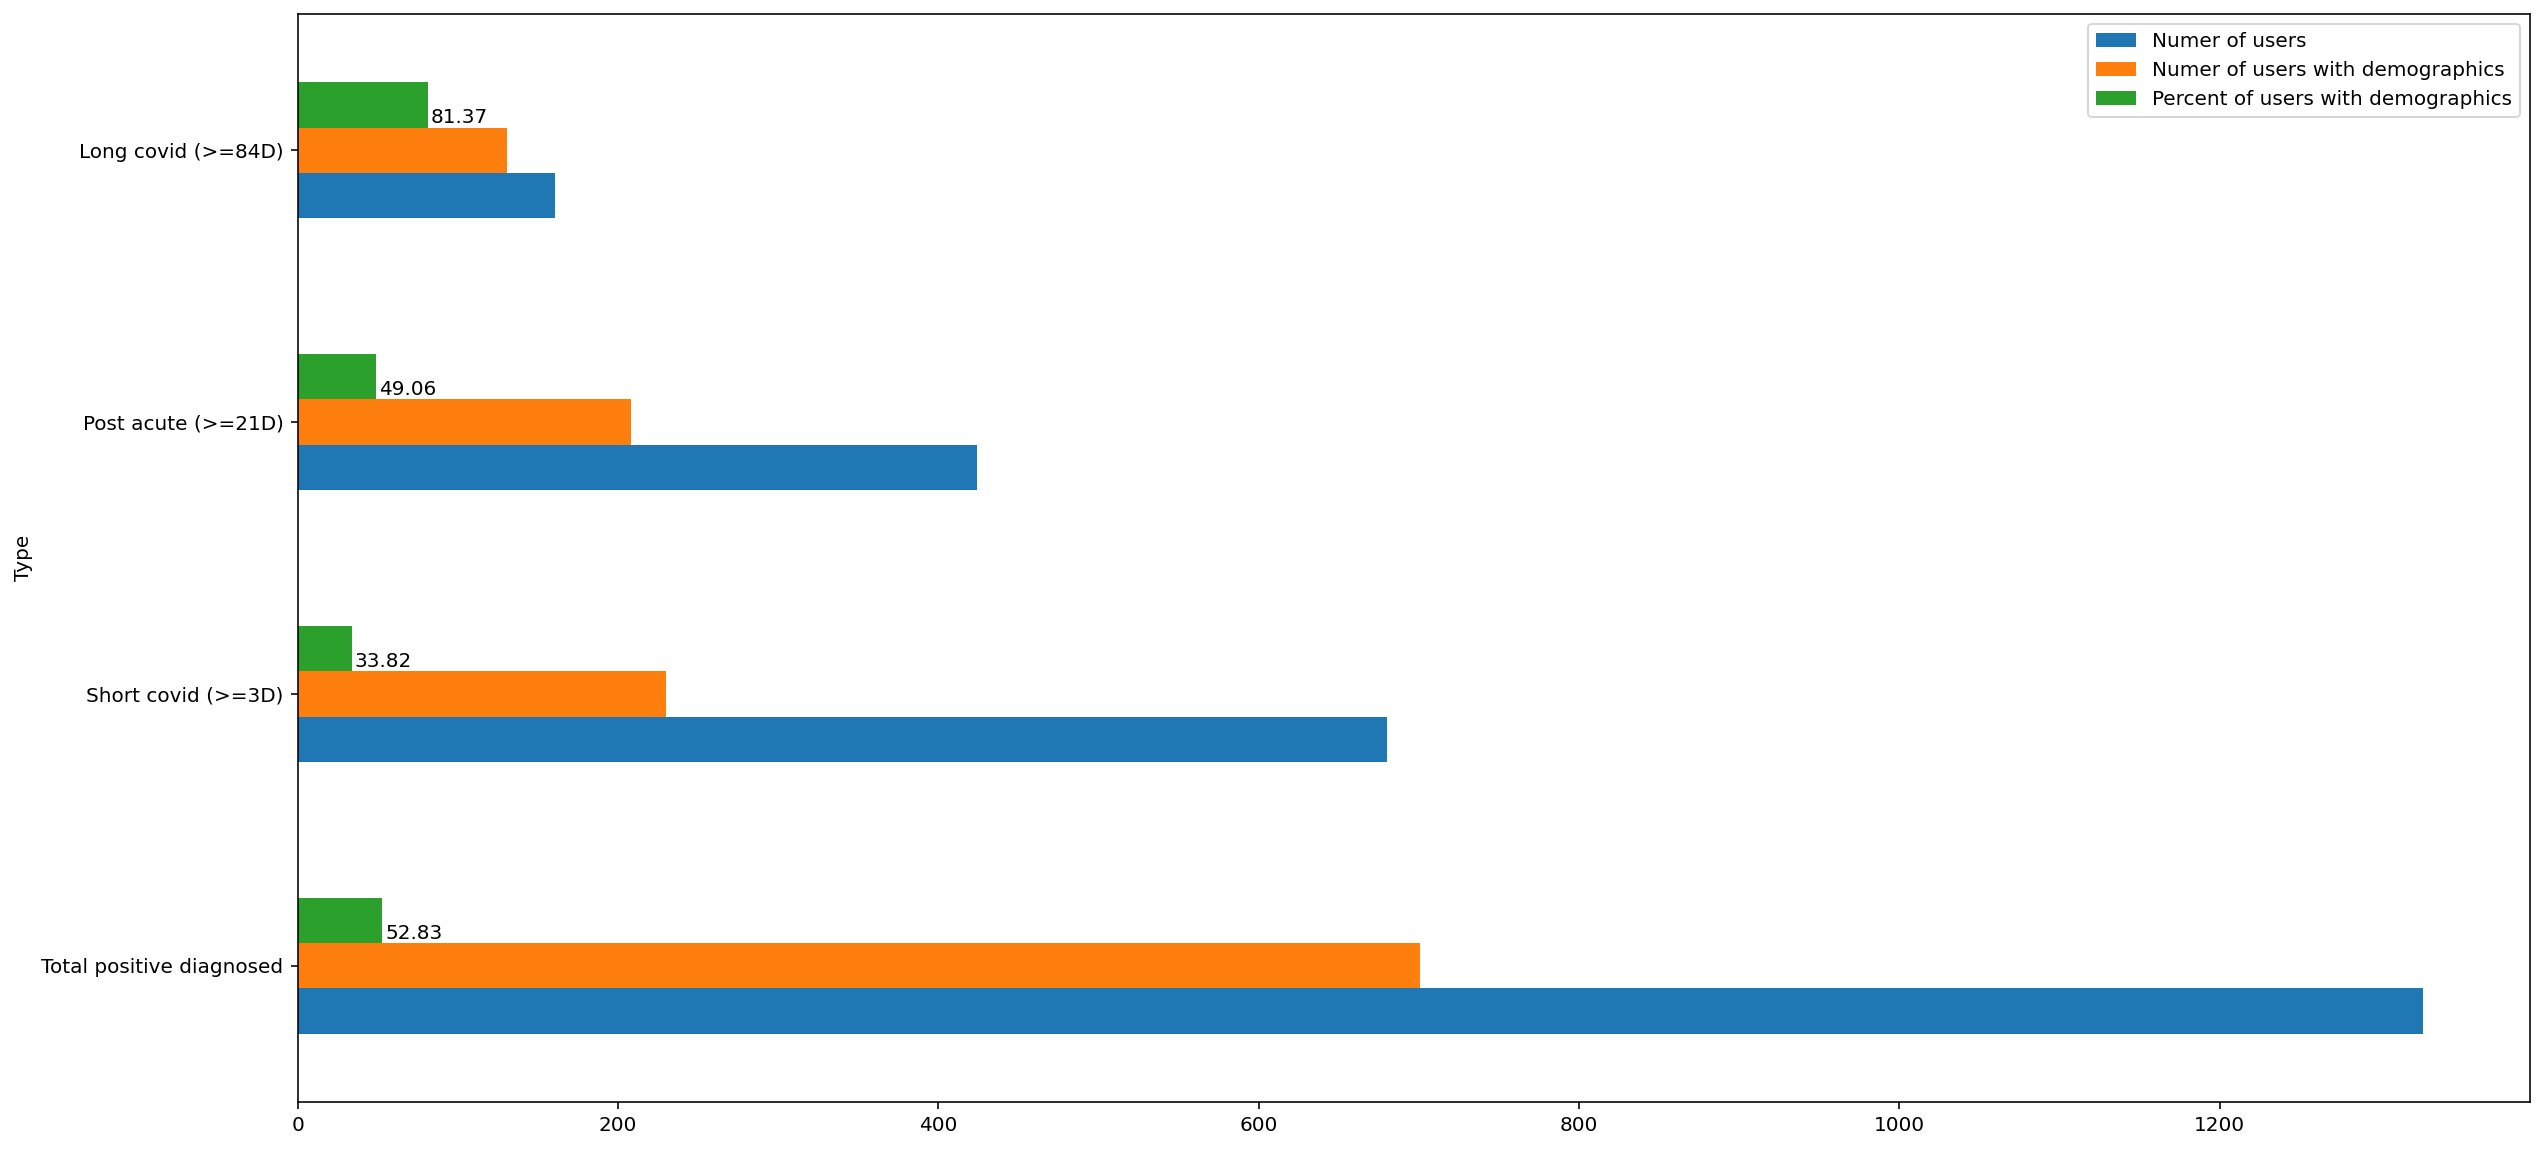

In [74]:
ax = plot_bar_df.plot.barh(figsize=(20, 10))

for i, v in enumerate(plot_bar_df['Percent of users with demographics']):
    ax.text(v + 2, i + 0.1 , str(round(v, 2)), color='black')

In [67]:
demo_pro_df['ethnicity_value'].dropna().unique()

array([], dtype=float64)

In [75]:
valid_mental_health_issue_cols = ['health_mental_value_' + str(n) for n in range(0,8)]

In [76]:
invalid_mental_health_issue_cols = ['health_mental_value_' + str(n) for n in range(8,15)]

In [77]:
valid_physical_health_issue_cols = ['health_physical_value_' + str(n) for n in range(0,8)]

In [78]:
invalid_physical_health_issue_cols = ['health_physical_value_' + str(n) for n in range(8,17)]

In [79]:
# currently only consider single ethnicity (for multiple will be marked as mixed, but not going into details of mixed.)
invalid_ethnicity_cols = ['ethnicity_value', 'ethnicity_value_3', 'ethnicity_value_4', 'ethnicity_value_2', 'ethnicity_value_1']

In [80]:
valid_employment_cols = ['employment_value_1', 'employment_value_2', 'employment_value_3']

In [81]:
invalid_employment_cols = ['employment_value_4', 'employment_value_5', 'employment_value_6']

In [82]:
valid_employment_change_cols = ['employment_value_1', 'employment_value_2', 'employment_value_3', 'employment_value_4']

In [83]:
invalid_employment_change_cols = ['employment_value_5', 'employment_value_6']

In [84]:
demo_pro_df.drop(columns= invalid_mental_health_issue_cols + invalid_physical_health_issue_cols + invalid_ethnicity_cols + invalid_employment_cols + invalid_employment_change_cols, inplace=True)

In [85]:
demo_pro_df = demo_pro_df.rename(columns={'ethnicity_value_0': 'ethnicity_value'})

In [86]:
## BMI
demo_pro_df['bmi'] = demo_pro_df['height_weight_value_weight'] / (demo_pro_df['height_weight_value_height']/100)**2

In [87]:
profile_df = pd.read_csv('profile_dump.csv')

In [88]:
profile_df = profile_df.drop(columns = list(profile_df.filter(regex='accept_.*').columns) + ['Unnamed: 0', 'gender_other', 'link_id', 'fcm_token', 'consent', 'first_name', 'last_name'])

In [89]:
profile_df.columns

Index(['sex', 'gender', 'age', 'smoker', 'id'], dtype='object')

In [90]:
demo_pro_df.columns

Index(['ethnicity_value', 'employment_value_0', 'employment_change_value_0',
       'marital_status_value', 'children_value', 'living_situ_value_0',
       'height_weight_value_weight', 'height_weight_value_height',
       'employment_change_value_1', 'employment_change_value_2',
       'living_situ_value_1', 'health_physical_value_0',
       'health_mental_value_0', 'employment_change_value',
       'health_mental_value_1', 'living_situ_value_2',
       'health_physical_value_1', 'health_mental_value_2',
       'health_mental_value_3', 'health_mental_value_4',
       'employment_change_value_3', 'employment_value_1',
       'health_physical_value_2', 'health_physical_value_3',
       'health_physical_value_4', 'employment_value_2',
       'health_mental_value_5', 'living_situ_value_3',
       'employment_change_value_4', 'health_mental_value_6',
       'employment_value_3', 'employment_change_value_5',
       'employment_change_value_6', 'health_physical_value_5',
       'health_physi

In [91]:
demo_pro_df.groupby('health_mental_value_0').count()['ethnicity_value'].nlargest(5)

health_mental_value_0
Depression                                          198
Anxiety, nerves, or generalised anxiety disorder     79
Don't know                                           52
no                                                   20
Prefer not to say                                    17
Name: ethnicity_value, dtype: int64

In [92]:
demo_pro_df.groupby('health_physical_value_0').count()['ethnicity_value'].nlargest(5)

health_physical_value_0
Asthma                                 187
Hypertension or high blood pressure     65
Obesity                                 38
Diabetes (Type 2)                       37
Cancer                                  27
Name: ethnicity_value, dtype: int64

In [93]:
# Do not include ethnicity as mostly white cohort
demo_pro_df.groupby('ethnicity_value')['ethnicity_value'].count()

ethnicity_value
Arab                           2
Black                         14
Black other                    1
Caucasian                      1
Central Asian                  2
East African Asian             1
East Asian                     4
Latin American and Jewish      1
Latinx                         2
Mixed                          1
Prefer not to say              7
South American                 1
South Asian                   14
South-east Asian               4
White                        913
White English                  2
british                        1
indian                         1
mixed                          1
welsh                          1
white                          6
white British                  1
white uk                       1
Name: ethnicity_value, dtype: int64

**To include in the table**
- [X] 'employment_change_value_0' -- only unchanged and unemployed
- [X] 'employment_value_0'
- [X] Top 5 'health_mental_value_0'
- [X] Top 5 'health_physical_value_0'
- [X] 'marital_status_value'
- [X] 'children_value'
- [X] 'height_weight_value_weight'
- [X] 'height_weight_value_height'
- [X] age
- [X] gender
- [X] smoker
- [X] Symptom serverity for main and secondary symptoms
- [ ] Average BMI increase - (only consider from just before to after diagnosis) -- From fitbit data
- [ ] Average BMI reduction - (only consider from just before to after diagnosis) -- From fitbit data
- [X] Mental health - average Phq8 and Gad7 scores

In [94]:
ids_map = {
    'lcovid': lcovid_ids,
    'post_acute_covid': post_acute_ids,
    'short_covid': short_covid_ids,
    'combined_short_covid': combined_short_covid_ids
}

In [95]:
# For categorical variables

variable = 'sex'
df = profile_df # or demo_pro_df

list(profile_df.groupby('sex')['id'].count().nlargest(2) / len(profile_df) * 100)

for k, v in ids_map.items():
    print(k)
    df[df['id'].isin(v)].groupby(variable)['id'].count().nlargest(5) / len(df[df['id'].isin(v)]) * 100
    print('\n\n')

[70.38427066995294, 28.73067443423706]

lcovid


sex
f    75.15528
m    24.84472
Name: id, dtype: float64




post_acute_covid


sex
f    79.432624
m    20.330969
Name: id, dtype: float64




short_covid


sex
f    74.217586
m    24.739195
Name: id, dtype: float64




combined_short_covid


sex
f    76.234004
m    23.034735
Name: id, dtype: float64

In [96]:
## For numerical variables
variables = ['height_weight_value_weight', 'height_weight_value_height', 'bmi']

In [97]:
temp_df = demo_pro_df.copy()

for var in variables:
    temp_df = temp_df[temp_df[var] < temp_df[var].quantile(q=0.95)]

for k, v in ids_map.items():
    print(k)
    df = temp_df[temp_df['id'].isin(v)]
    df[variables].describe()
    print('\n\n')

lcovid


KeyError: 'id'

In [946]:
## Box plots for numerical data
temp_df = demo_pro_df.reset_index().copy()

for var in variables:
    temp_df = temp_df[temp_df[var] < temp_df[var].quantile(q=0.95)]

dfs = []
for k, v in ids_map.items():
    df = temp_df[temp_df['id'].isin(v)][variables]
    df.columns = [c.replace('height_weight_value_', '') for c in df.columns]
    df = pd.melt(df)
    df['type'] = k
    dfs.append(df)
    
df_to_plot = pd.concat(dfs)


In [947]:
## for age
temp_df = profile_df.copy()

for var in ['age']:
    temp_df = temp_df[temp_df[var] < temp_df[var].quantile(q=0.98)]


dfs = []
for k, v in ids_map.items():
    df = pd.melt(temp_df[temp_df['id'].isin(v)][['age']])
    df['type'] = k
    dfs.append(df)
    
df2_to_plot = pd.concat(dfs)

In [948]:
plot_df = pd.concat([df_to_plot, df2_to_plot])
plot_df.groupby(['variable','type']).describe()

value                                     \
                                count        mean        std         min   
variable type                                                              
age      combined_short_covid  1084.0   43.854244  12.523329   18.000000   
         lcovid                 158.0   49.506329  10.472133   25.000000   
         post_acute_covid       421.0   45.581948  12.088210   20.000000   
         short_covid            663.0   42.757164  12.679163   18.000000   
bmi      combined_short_covid   448.0   27.263740   4.841616   17.432851   
         lcovid                 184.0   28.289001   5.481529    5.059875   
         post_acute_covid       220.0   27.470464   4.923769   18.209877   
         short_covid            228.0   27.064269   4.763313   17.432851   
height   combined_short_covid   448.0  167.913817   8.499160  135.000000   
         lcovid                 184.0  167.559783   8.423018  144.000000   
         post_acute_covid       220.0  167.153409   8.139448  148.000000   
         short_covid            228.0  168.647544   8.787889  135.000000   
weight   combined_short_covid   448.0   76.891748  14.791914   46.000000   
         lcovid                 184.0   79.521739  16.513600   12.000000   
         post_acute_covid       220.0   76.843195  15.275814   48.000000   
         short_covid            228.0   76.938596  14.343050   46.000000   

                                                                               
                                      25%         50%         75%         max  
variable type                                                                  
age      combined_short_covid   34.000000   44.000000   53.000000   73.000000  
         lcovid                 41.250000   51.000000   57.750000   73.000000  
         post_acute_covid       36.000000   46.000000   55.000000   73.000000  
         short_covid            32.000000   43.000000   52.000000   73.000000  
bmi      combined_short_covid   23.530128   26.726400   30.859433   39.628105  
         lcovid                 24.304618   27.360898   32.885495   39.411065  
         post_acute_covid       23.701697   27.260485   30.860290   39.628105  
         short_covid            23.510204   26.015279   30.854809   38.866027  
height   combined_short_covid  162.000000  167.000000  175.000000  185.000000  
         lcovid                162.000000  167.000000  174.000000  185.000000  
         post_acute_covid      162.000000  166.000000  173.000000  185.000000  
         short_covid           162.750000  168.000000  175.000000  185.000000  
weight   combined_short_covid   65.000000   75.500000   88.000000  121.000000  
         lcovid                 68.750000   79.000000   91.250000  120.000000  
         post_acute_covid       64.000000   75.000000   87.250000  121.000000  
         short_covid            65.750000   76.000000   89.000000  113.000000

In [949]:
plot_df

variable  value                  type
0      weight   95.0                lcovid
1      weight   95.0                lcovid
2      weight   64.0                lcovid
3      weight   80.0                lcovid
4      weight   80.0                lcovid
...       ...    ...                   ...
1079      age   32.0  combined_short_covid
1080      age   28.0  combined_short_covid
1081      age   31.0  combined_short_covid
1082      age   26.0  combined_short_covid
1083      age   25.0  combined_short_covid

[5566 rows x 3 columns]

[Text(0.5, 0, '')]

[Text(0.5, 0, '')]

[Text(0.5, 0, '')]

[Text(0.5, 0, '')]

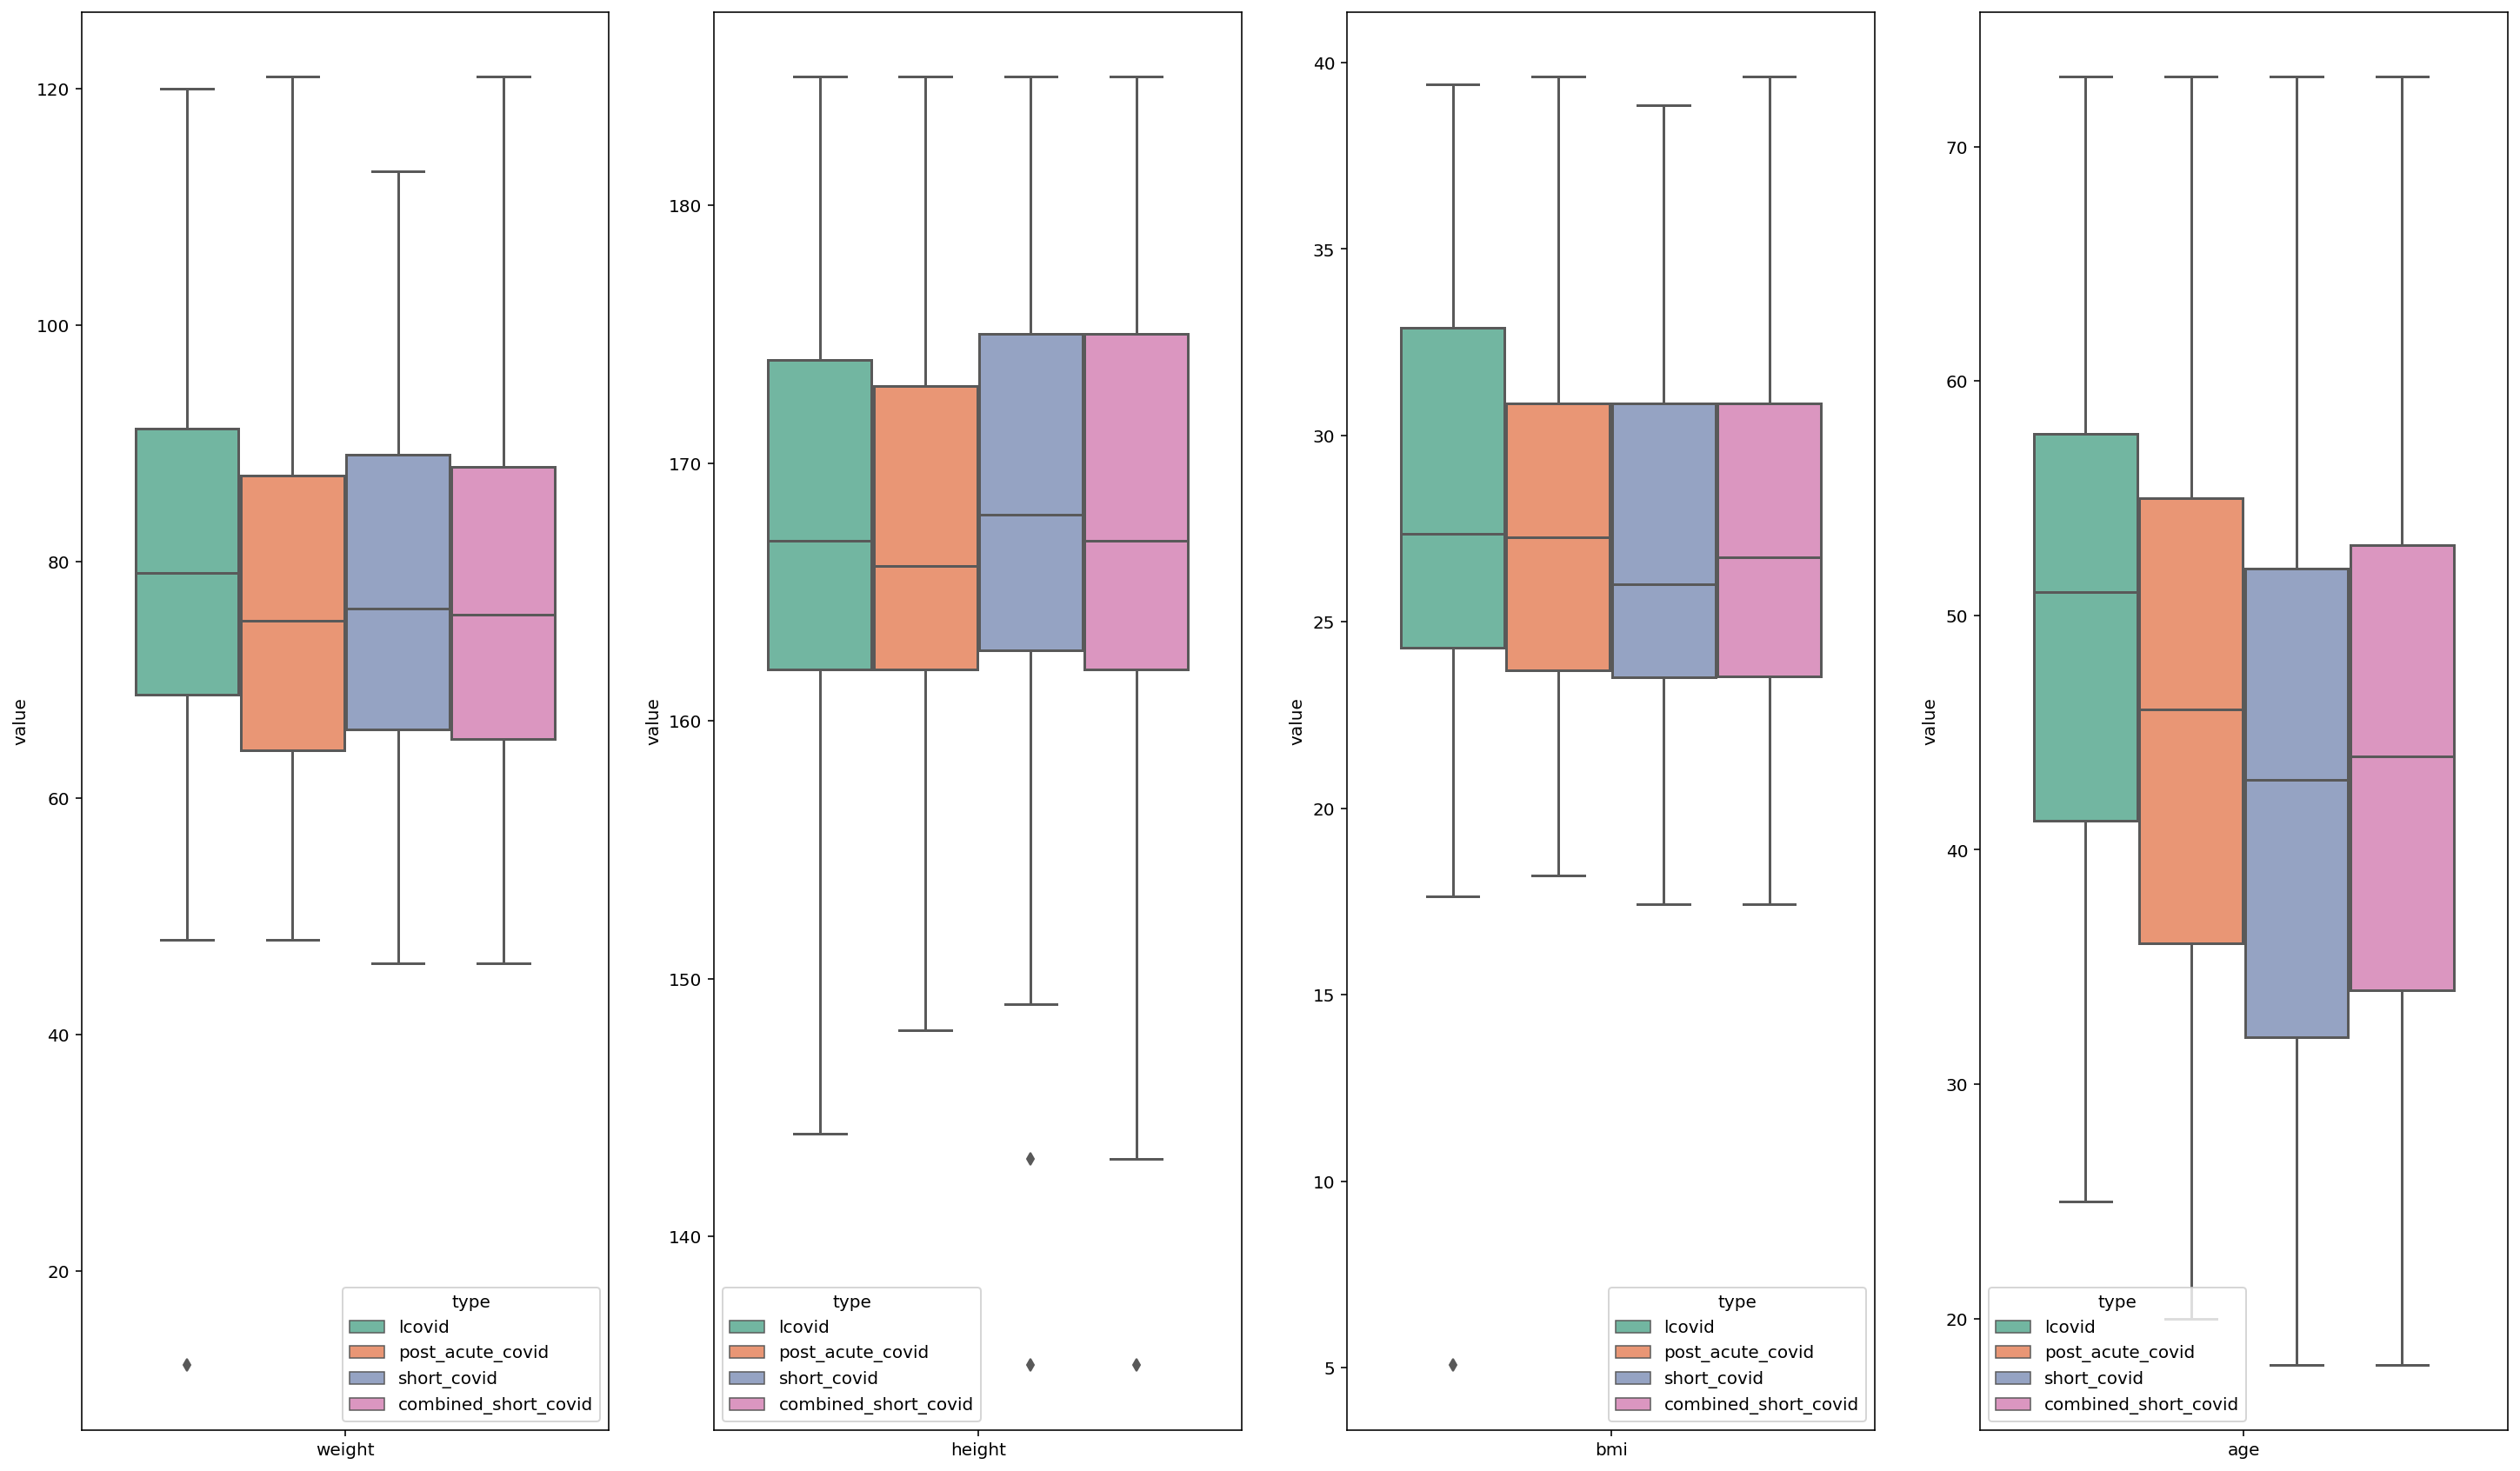

In [101]:
## plot
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 4, figsize=(25,15))

for i, v in enumerate(plot_df['variable'].unique()):
    axis = sns.boxplot(ax=ax[i], y="value", x="variable", orient="v", hue='type', data=plot_df[plot_df['variable'] == v], palette="Set2")
    axis.set(xlabel='')

plt.show()

[Text(0.5, 0, '')]

[Text(0, 0.5, 'weight')]

[[Text(0, 0, '')]]

[Text(0.5, 0, '')]

[Text(0, 0.5, 'height')]

[[Text(0, 0, '')]]

[Text(0.5, 0, '')]

[Text(0, 0.5, 'bmi')]

[[Text(0, 0, '')]]

[Text(0.5, 0, '')]

[Text(0, 0.5, 'age')]

[[Text(0, 0, '')]]

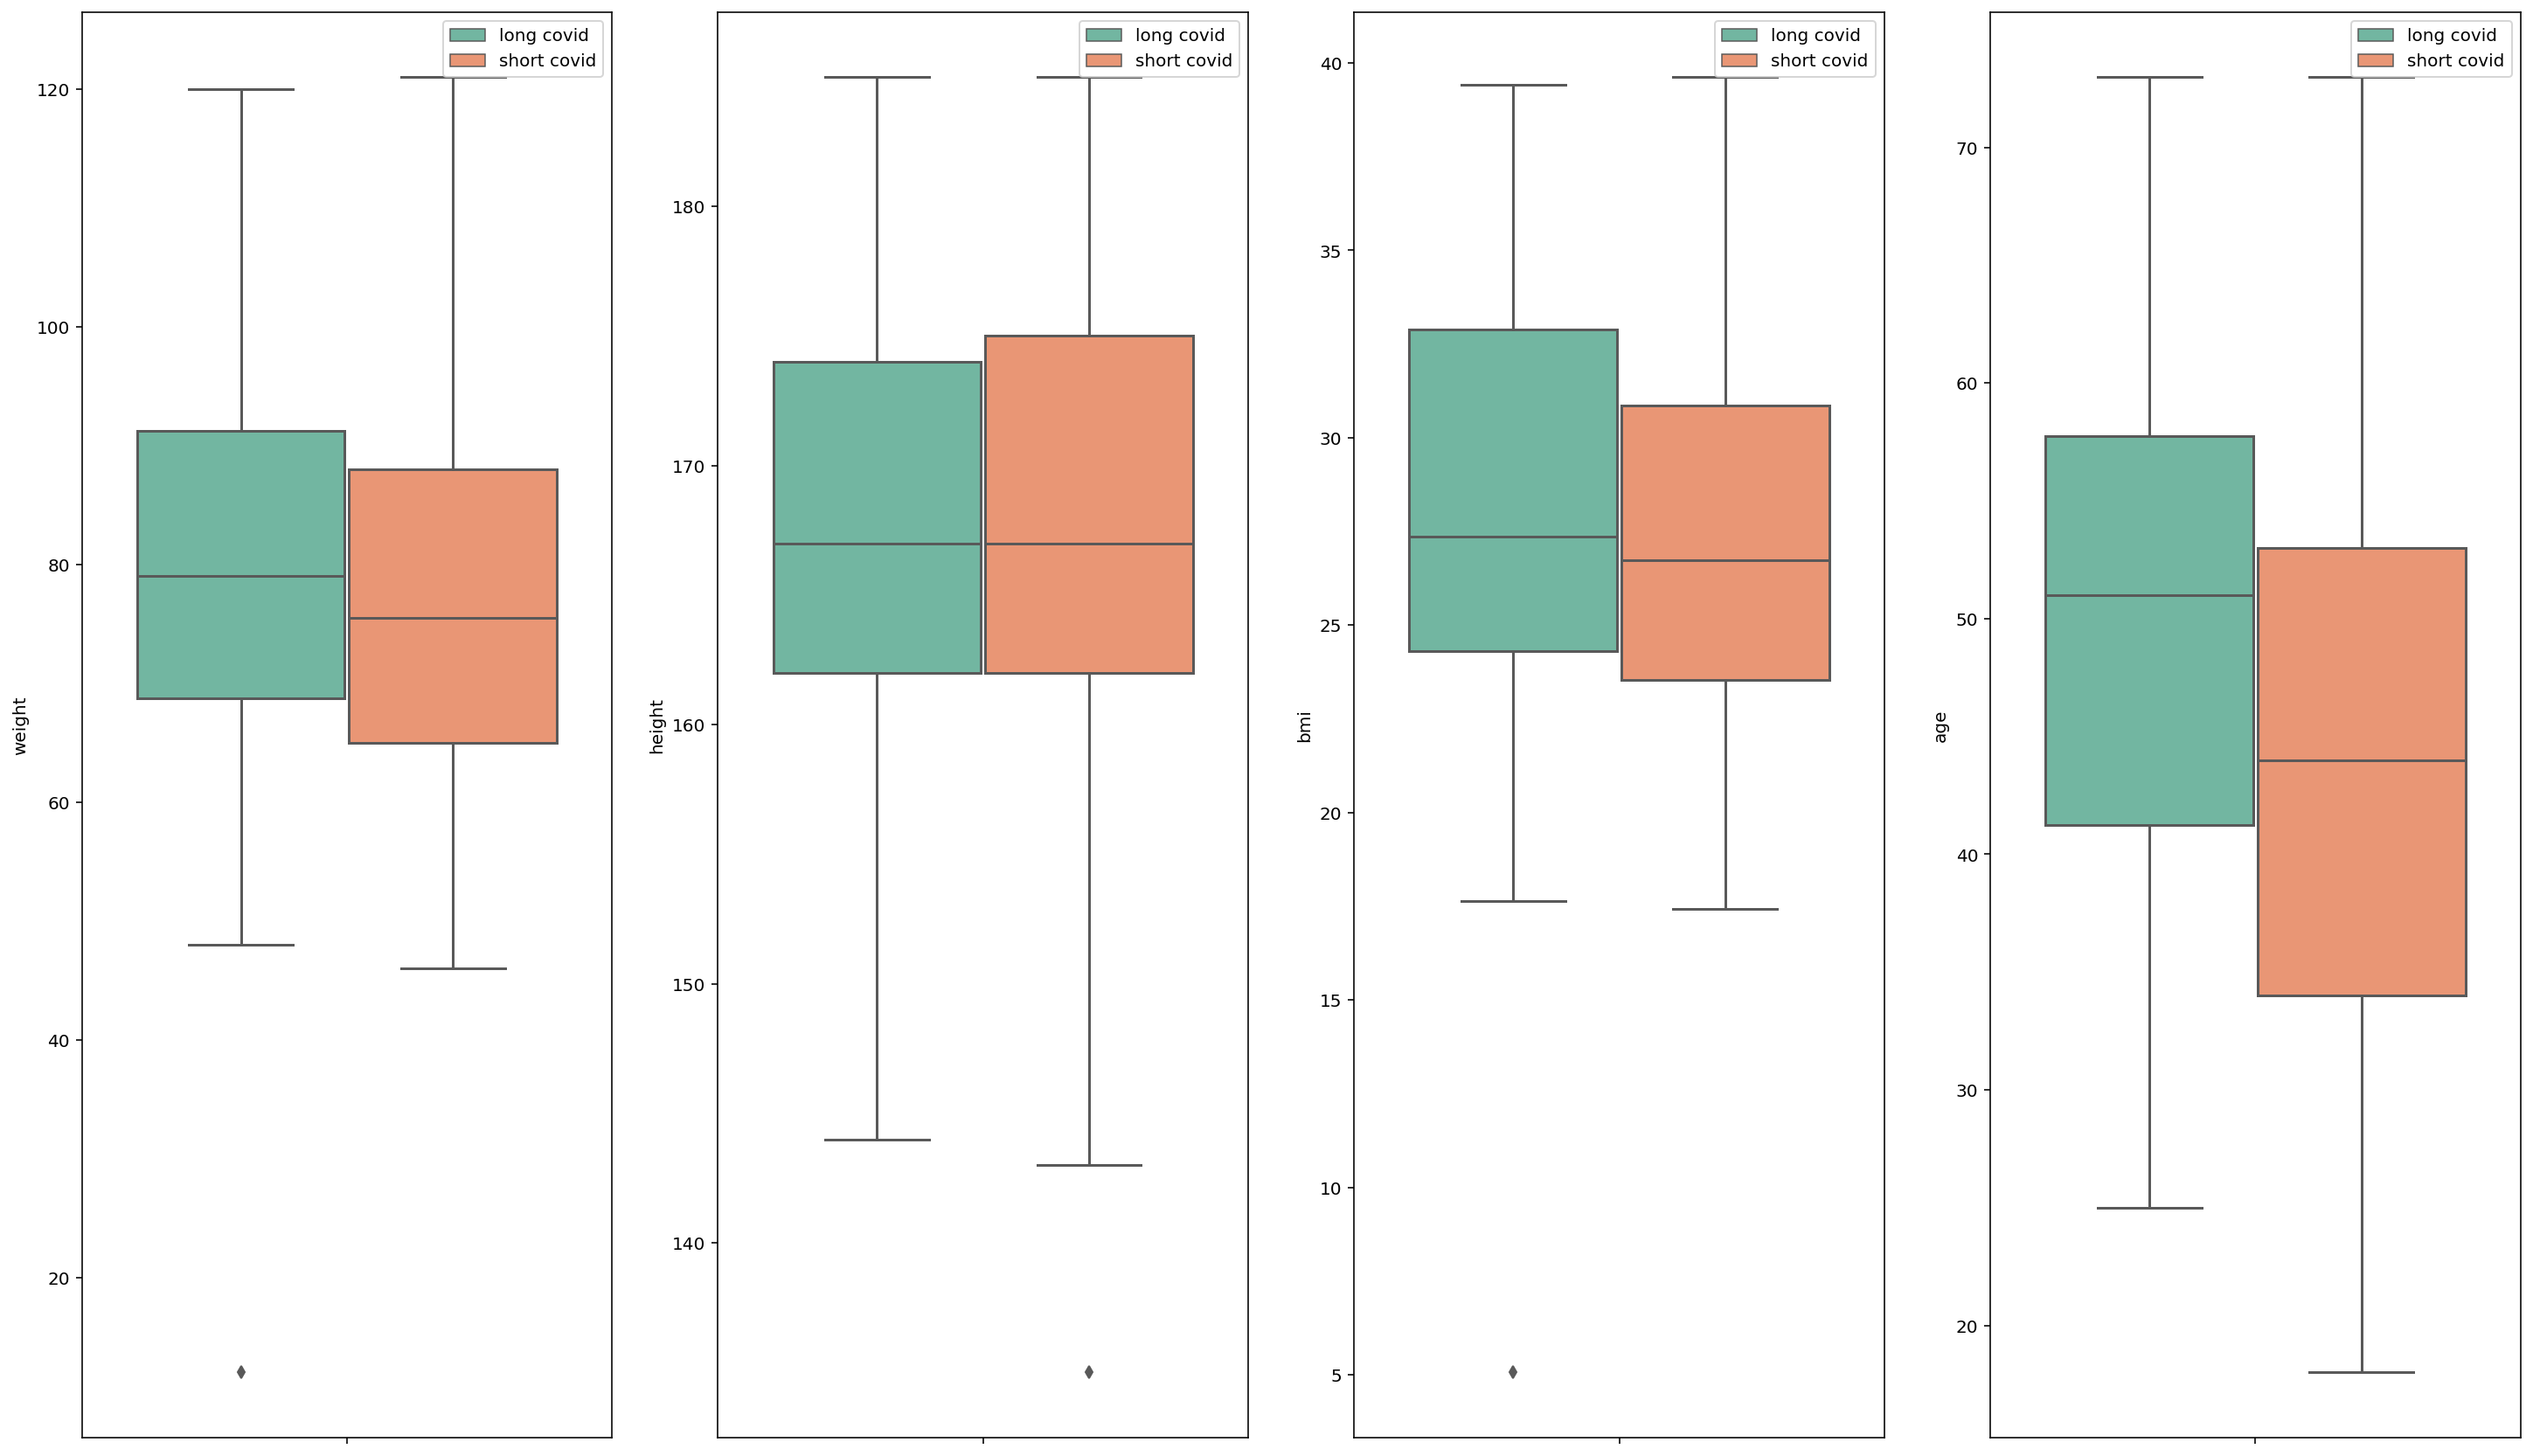

In [958]:
fig, ax = plt.subplots(1, 4, figsize=(25,15))

for i, v in enumerate(plot_df['variable'].unique()):
    data = plot_df[plot_df['variable'] == v]
    data = data[(data['type'] == 'lcovid') | (data['type'] == 'combined_short_covid')]
    axis = sns.boxplot(ax=ax[i], y="value", x="variable", orient="v", hue='type', data=data, palette="Set2")
    axis.set(xlabel=None) 
    axis.set(ylabel=v)
    axis.set(xticklabels=[])
    handles, _ = axis.get_legend_handles_labels()   
    axis.legend(handles, ['long covid', 'short covid'], loc="best")

plt.show()

In [104]:
phq8_pro_df = common_pre_process(phq8_df.copy().fillna(0))

In [105]:
phq8_pro_df['phq8_score'] = phq8_pro_df['phq8_1_value'] + phq8_pro_df['phq8_2_value'] + phq8_pro_df['phq8_3_value'] + phq8_pro_df['phq8_4_value'] + phq8_pro_df['phq8_5_value'] + phq8_pro_df['phq8_6_value'] + phq8_pro_df['phq8_7_value'] + phq8_pro_df['phq8_8_value']

In [106]:
gad7_pro_df = common_pre_process(gad7_df.copy().fillna(0))

In [107]:
gad7_pro_df['gad7_score'] = gad7_pro_df['gad7_1_value'] + gad7_pro_df['gad7_2_value'] + gad7_pro_df['gad7_3_value'] + gad7_pro_df['gad7_4_value'] + gad7_pro_df['gad7_5_value'] + gad7_pro_df['gad7_6_value'] + gad7_pro_df['gad7_7_value']

In [108]:
import pandas as pd
import glob
import json

#### Merge RHR 

In [109]:
list_ids_to_pull = list(lcovid_ids) + list(post_acute_ids) + list(short_covid_ids)
filenames = ['/mnt/pool0/covid_collab/fitbit_raw/covid-collab/activities-heart/' + i for i in list_ids_to_pull]

In [110]:
filenames[0:5]

['/mnt/pool0/covid_collab/fitbit_raw/covid-collab/activities-heart/02KIBYpUG9QJ9yL0w7fU1oHUysu1',
 '/mnt/pool0/covid_collab/fitbit_raw/covid-collab/activities-heart/02R0diCwLLR9agcvXyBsluR2GoW2',
 '/mnt/pool0/covid_collab/fitbit_raw/covid-collab/activities-heart/0NYueclxhpVxzXhfAhpAUsR0H1C2',
 '/mnt/pool0/covid_collab/fitbit_raw/covid-collab/activities-heart/1EDK902lN8dvyySIO1WVfCjxm5F3',
 '/mnt/pool0/covid_collab/fitbit_raw/covid-collab/activities-heart/1zkuBfW7XOTuwWC85dFACkRlcnC3']

In [111]:
# Write the list of filenames to pull from server and pull using rsync with --from-file option 
with open('filenames_rhr.txt', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(filenames))

118909

In [246]:
# !rsync -a -r --files-from=filenames_rhr.txt --no-relative --stats yranjan@radar-base-nas.brc.iop.kcl.ac.uk:/ data/rhr/

/bin/bash: rsync: command not found


In [112]:
# Load RHR data

path = 'data/rhr/' # use your path
all_files = glob.glob(path + "/*/*.json")

li = []

for filename in all_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    df['id'] = filename.split(path)[1].split('/')[0]
    li.append(df)

rhr_df = pd.concat(li, axis=0)

In [113]:
len(rhr_df['id'].unique())

910

In [114]:
rhr_df.iloc[188]['value.heartRateZones']

[{'max': 88, 'min': 30, 'name': 'Out of Range'},
 {'max': 123, 'min': 88, 'name': 'Fat Burn'},
 {'max': 149, 'min': 123, 'name': 'Cardio'},
 {'max': 220, 'min': 149, 'name': 'Peak'}]

In [115]:
rhr_df

dateTime value.customHeartRateZones  \
0    2021-06-13                         []   
1    2021-06-14                         []   
2    2021-06-15                         []   
3    2021-06-16                         []   
4    2021-06-17                         []   
..          ...                        ...   
188  2022-01-13                         []   
189  2022-01-14                         []   
190  2022-01-15                         []   
191  2022-01-16                         []   
192  2022-01-17                         []   

                                  value.heartRateZones  \
0    [{'max': 88, 'min': 30, 'name': 'Out of Range'...   
1    [{'max': 88, 'min': 30, 'name': 'Out of Range'...   
2    [{'max': 88, 'min': 30, 'name': 'Out of Range'...   
3    [{'max': 88, 'min': 30, 'name': 'Out of Range'...   
4    [{'max': 88, 'min': 30, 'name': 'Out of Range'...   
..                                                 ...   
188  [{'caloriesOut': 1896.13182, 'max': 100, 'min'...   
189  [{'caloriesOut': 1901.72454, 'max': 100, 'min'...   
190  [{'caloriesOut': 1886.5443, 'max': 100, 'min':...   
191  [{'caloriesOut': 2168.47731, 'max': 101, 'min'...   
192  [{'caloriesOut': 1549.9824, 'max': 103, 'min':...   

                               id  value.restingHeartRate  
0    1b5o8VxiADN5vZjFYWQ4llWbnJ53                     NaN  
1    1b5o8VxiADN5vZjFYWQ4llWbnJ53                     NaN  
2    1b5o8VxiADN5vZjFYWQ4llWbnJ53                     NaN  
3    1b5o8VxiADN5vZjFYWQ4llWbnJ53                     NaN  
4    1b5o8VxiADN5vZjFYWQ4llWbnJ53                     NaN  
..                            ...                     ...  
188  k6AhwfVqldclpR9DiwYJGv3pfIq1                    57.0  
189  k6AhwfVqldclpR9DiwYJGv3pfIq1                    57.0  
190  k6AhwfVqldclpR9DiwYJGv3pfIq1                    57.0  
191  k6AhwfVqldclpR9DiwYJGv3pfIq1                    59.0  
192  k6AhwfVqldclpR9DiwYJGv3pfIq1                    61.0  

[1386381 rows x 5 columns]

In [116]:
rhr_df_indexed = rhr_df.set_index(pd.to_datetime(rhr_df['dateTime'], infer_datetime_format=True))

#### Merge Sleep 

In [117]:
list_ids_to_pull = list(lcovid_ids) + list(post_acute_ids) + list(short_covid_ids)
filenames = ['/mnt/pool0/covid_collab/fitbit_raw/covid-collab/sleep/' + i for i in list_ids_to_pull]

In [118]:
filenames[0:5]

['/mnt/pool0/covid_collab/fitbit_raw/covid-collab/sleep/02KIBYpUG9QJ9yL0w7fU1oHUysu1',
 '/mnt/pool0/covid_collab/fitbit_raw/covid-collab/sleep/02R0diCwLLR9agcvXyBsluR2GoW2',
 '/mnt/pool0/covid_collab/fitbit_raw/covid-collab/sleep/0NYueclxhpVxzXhfAhpAUsR0H1C2',
 '/mnt/pool0/covid_collab/fitbit_raw/covid-collab/sleep/1EDK902lN8dvyySIO1WVfCjxm5F3',
 '/mnt/pool0/covid_collab/fitbit_raw/covid-collab/sleep/1zkuBfW7XOTuwWC85dFACkRlcnC3']

In [119]:
# Write the list of filenames to pull from server and pull using rsync with --from-file option 
with open('filenames_sleep.txt', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(filenames))

104994

In [246]:
# !rsync -a -r --files-from=filenames_sleep.txt --no-relative --stats yranjan@radar-base-nas.brc.iop.kcl.ac.uk:/ data/sleep/

/bin/bash: rsync: command not found


In [127]:
# Load Sleep data

path = 'data/sleep/' # use your path
all_files = glob.glob(path + "/*/*.json")

li = []

for filename in all_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    df['id'] = filename.split(path)[1].split('/')[0]
    li.append(df)

sleep_df = pd.concat(li, axis=0)


In [128]:
len(sleep_df['id'].unique())

905

In [129]:
sleep_df = sleep_df.drop(columns=['infoCode', 'logId', 'minuteData', 'endTime', 'startTime', 'type'] + list(sleep_df.filter(regex='levels.*').columns))

In [130]:
sleep_df

dateOfSleep    duration  efficiency isMainSleep  minutesAfterWakeup  \
0   2019-06-14  30600000.0       100.0        True                 0.0   
1   2019-06-17  24300000.0       100.0        True                 0.0   
2   2019-06-20  28800000.0       100.0        True                 0.0   
3   2019-07-05  27720000.0        99.0        True                 0.0   
4   2019-07-06  35580000.0        97.0        True                 0.0   
..         ...         ...         ...         ...                 ...   
95  2021-12-06   3660000.0        48.0         NaN                 0.0   
96  2021-12-07  31260000.0        60.0         NaN                 0.0   
97  2021-12-08  25380000.0        60.0         NaN                 0.0   
98  2021-12-09  22260000.0        63.0         NaN                12.0   
99  2021-12-10  25560000.0        53.0         NaN                 6.0   

    minutesAsleep  minutesAwake  minutesToFallAsleep  timeInBed  \
0           510.0           0.0                  0.0      510.0   
1           405.0           0.0                  0.0      405.0   
2           458.0           0.0                 22.0      480.0   
3           440.0           6.0                 16.0      462.0   
4           568.0          19.0                  6.0      593.0   
..            ...           ...                  ...        ...   
95           29.0          32.0                  0.0       61.0   
96          298.0         201.0                  0.0      521.0   
97          254.0         169.0                  0.0      423.0   
98          225.0         134.0                  0.0      371.0   
99          222.0         198.0                  0.0      426.0   

                              id  awakeCount  awakeDuration  awakeningsCount  \
0   1b5o8VxiADN5vZjFYWQ4llWbnJ53         NaN            NaN              NaN   
1   1b5o8VxiADN5vZjFYWQ4llWbnJ53         NaN            NaN              NaN   
2   1b5o8VxiADN5vZjFYWQ4llWbnJ53         NaN            NaN              NaN   
3   1b5o8VxiADN5vZjFYWQ4llWbnJ53         NaN            NaN              NaN   
4   1b5o8VxiADN5vZjFYWQ4llWbnJ53         NaN            NaN              NaN   
..                           ...         ...            ...              ...   
95  k6AhwfVqldclpR9DiwYJGv3pfIq1         1.0            2.0              3.0   
96  k6AhwfVqldclpR9DiwYJGv3pfIq1         3.0            9.0             19.0   
97  k6AhwfVqldclpR9DiwYJGv3pfIq1         2.0            8.0             17.0   
98  k6AhwfVqldclpR9DiwYJGv3pfIq1         2.0            2.0             16.0   
99  k6AhwfVqldclpR9DiwYJGv3pfIq1         3.0            7.0             18.0   

    restlessCount  restlessDuration  
0             NaN               NaN  
1             NaN               NaN  
2             NaN               NaN  
3             NaN               NaN  
4             NaN               NaN  
..            ...               ...  
95            2.0              30.0  
96           16.0             157.0  
97           15.0             161.0  
98           14.0             144.0  
99           15.0             197.0  

[620634 rows x 15 columns]

In [250]:
sleep_df_indexed = sleep_df.set_index(pd.to_datetime(sleep_df['dateOfSleep'], infer_datetime_format=True))

#### Merge Steps 

In [120]:
list_ids_to_pull = list(lcovid_ids) + list(post_acute_ids) + list(short_covid_ids)
filenames = ['/mnt/pool0/covid_collab/fitbit_raw/covid-collab/activities-steps/' + i for i in list_ids_to_pull]

In [121]:
filenames[0:5]

['/mnt/pool0/covid_collab/fitbit_raw/covid-collab/activities-steps/02KIBYpUG9QJ9yL0w7fU1oHUysu1',
 '/mnt/pool0/covid_collab/fitbit_raw/covid-collab/activities-steps/02R0diCwLLR9agcvXyBsluR2GoW2',
 '/mnt/pool0/covid_collab/fitbit_raw/covid-collab/activities-steps/0NYueclxhpVxzXhfAhpAUsR0H1C2',
 '/mnt/pool0/covid_collab/fitbit_raw/covid-collab/activities-steps/1EDK902lN8dvyySIO1WVfCjxm5F3',
 '/mnt/pool0/covid_collab/fitbit_raw/covid-collab/activities-steps/1zkuBfW7XOTuwWC85dFACkRlcnC3']

In [122]:
# Write the list of filenames to pull from server and pull using rsync with --from-file option 
with open('filenames_steps.txt', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(filenames))

118909

In [246]:
# !rsync -a -r --files-from=filenames_steps.txt --no-relative --stats yranjan@radar-base-nas.brc.iop.kcl.ac.uk:/ data/steps/

/bin/bash: rsync: command not found


In [132]:
# Load Steps data

path = 'data/steps/' # use your path
all_files = glob.glob(path + "/*/*.json")

li = []

for filename in all_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    df['id'] = filename.split(path)[1].split('/')[0]
    li.append(df)

step_df = pd.concat(li, axis=0)

In [133]:
step_df

dateTime  value                            id
0    2019-06-14   2026  1b5o8VxiADN5vZjFYWQ4llWbnJ53
1    2019-06-15   5831  1b5o8VxiADN5vZjFYWQ4llWbnJ53
2    2019-06-16   3281  1b5o8VxiADN5vZjFYWQ4llWbnJ53
3    2019-06-17   1907  1b5o8VxiADN5vZjFYWQ4llWbnJ53
4    2019-06-18   6876  1b5o8VxiADN5vZjFYWQ4llWbnJ53
..          ...    ...                           ...
179  2021-07-05   2631  k6AhwfVqldclpR9DiwYJGv3pfIq1
180  2021-07-06  11001  k6AhwfVqldclpR9DiwYJGv3pfIq1
181  2021-07-07   1376  k6AhwfVqldclpR9DiwYJGv3pfIq1
182  2021-07-08  11493  k6AhwfVqldclpR9DiwYJGv3pfIq1
183  2021-07-09   5356  k6AhwfVqldclpR9DiwYJGv3pfIq1

[1423546 rows x 3 columns]

In [134]:
len(step_df['id'].unique())

910

In [135]:
step_df_indexed = step_df.set_index(pd.to_datetime(step_df['dateTime'], infer_datetime_format=True))

#### Merge activity

In [ ]:
list_ids_to_pull = list(lcovid_ids) + list(post_acute_ids) + list(short_covid_ids)
filenames = ['/mnt/pool0/covid_collab/fitbit_raw/covid-collab/activities/' + i for i in list_ids_to_pull]

In [ ]:
filenames[0:5]

In [125]:
# Write the list of filenames to pull from server and pull using rsync with --from-file option 
with open('filenames_activities.txt', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(filenames))

111319

In [246]:
# !rsync -a -r --files-from=filenames_activities.txt --no-relative --stats yranjan@radar-base-nas.brc.iop.kcl.ac.uk:/ data/activities/

/bin/bash: rsync: command not found


In [136]:
# Load Activity data

path = 'data/activities/' # use your path
all_files = glob.glob(path + "/*/*.json")

li = []

for filename in all_files:
    with open(filename) as data_file:    
        data = json.load(data_file)
    df = pd.json_normalize(data)
    df['id'] = filename.split(path)[1].split('/')[0]
    li.append(df)

activities = pd.concat(li, axis=0)

In [137]:
activities = activities.drop(columns=['caloriesLink', 'activityLevel', 'hasActiveZoneMinutes', 'pace', 'logType', 'poolLength', 'poolLengthUnit', 'swimLengths', 'activeZoneMinutes.minutesInHeartRateZones', 'activeZoneMinutes.totalMinutes',	'externalId', 'intervalWorkoutData.intervalSummaries', 'intervalWorkoutData.numRepeats', 'customHeartRateZones', 'heartRateLink', 'heartRateZones', 'lastModified', 'logId', 'originalDuration', 'originalStartTime', 'tcxLink', 'manualValuesSpecified.calories', 'manualValuesSpecified.distance',
                                      'manualValuesSpecified.steps', 'distance', 'distanceUnit', 'speed' ] + list(activities.filter(regex='source.*').columns))

In [138]:
len(activities['id'].unique())

906

In [139]:
activities

activeDuration     activityName  activityTypeId  averageHeartRate  \
0        4302000.0             Walk         90013.0             101.0   
1        1435000.0  Aerobic Workout          3001.0             124.0   
2        1076000.0             Walk         90013.0             113.0   
3        4609000.0             Walk         90013.0             112.0   
4        6658000.0             Walk         90013.0             112.0   
..             ...              ...             ...               ...   
95        974000.0             Walk         90013.0              97.0   
96       1947000.0             Walk         90013.0              91.0   
97       2872000.0             Walk         90013.0              84.0   
98       1536000.0             Walk         90013.0              97.0   
99       1074000.0             Walk         90013.0              95.0   

    calories   duration  elevationGain                      startTime   steps  \
0      438.0  4302000.0        146.304  2021-06-01T18:07:07.000+01:00  5129.0   
1      203.0  1435000.0            NaN  2021-07-21T17:22:32.000+01:00  1641.0   
2      132.0  1076000.0         42.672  2021-07-21T18:27:25.000+01:00  1375.0   
3      547.0  4609000.0        218.440  2021-07-29T12:03:51.000+01:00  4402.0   
4      754.0  6658000.0        143.256  2021-07-29T13:42:00.000+01:00  7834.0   
..       ...        ...            ...                            ...     ...   
95      91.0   974000.0         25.450       2021-12-25T19:14:07.000Z  1335.0   
96     152.0  1947000.0          3.048       2021-12-26T11:16:18.000Z  2254.0   
97     233.0  2872000.0         18.288       2021-12-27T14:04:03.000Z  3737.0   
98     129.0  1536000.0         21.336       2021-12-30T08:13:29.000Z  1826.0   
99      95.0  1074000.0         12.192       2022-01-01T12:10:34.000Z  1416.0   

                              id  
0   1b5o8VxiADN5vZjFYWQ4llWbnJ53  
1   1b5o8VxiADN5vZjFYWQ4llWbnJ53  
2   1b5o8VxiADN5vZjFYWQ4llWbnJ53  
3   1b5o8VxiADN5vZjFYWQ4llWbnJ53  
4   1b5o8VxiADN5vZjFYWQ4llWbnJ53  
..                           ...  
95  k6AhwfVqldclpR9DiwYJGv3pfIq1  
96  k6AhwfVqldclpR9DiwYJGv3pfIq1  
97  k6AhwfVqldclpR9DiwYJGv3pfIq1  
98  k6AhwfVqldclpR9DiwYJGv3pfIq1  
99  k6AhwfVqldclpR9DiwYJGv3pfIq1  

[778444 rows x 10 columns]

In [290]:
pd.DatetimeIndex(pd.to_datetime(activities['startTime'], utc=True))

DatetimeIndex(['2021-06-01 17:07:07+00:00', '2021-07-21 16:22:32+00:00',
               '2021-07-21 17:27:25+00:00', '2021-07-29 11:03:51+00:00',
               '2021-07-29 12:42:00+00:00', '2021-07-30 19:29:51+00:00',
               '2021-12-05 15:42:38+00:00', '2019-06-14 08:30:00+00:00',
               '2019-06-19 08:30:00+00:00', '2019-06-21 08:30:00+00:00',
               ...
               '2021-12-20 10:05:21+00:00', '2021-12-20 19:04:51+00:00',
               '2021-12-21 09:22:29+00:00', '2021-12-21 18:21:47+00:00',
               '2021-12-24 14:05:52+00:00', '2021-12-25 19:14:07+00:00',
               '2021-12-26 11:16:18+00:00', '2021-12-27 14:04:03+00:00',
               '2021-12-30 08:13:29+00:00', '2022-01-01 12:10:34+00:00'],
              dtype='datetime64[ns, UTC]', name='startTime', length=778444, freq=None)

In [291]:
activities_df_indexed = activities.set_index(pd.to_datetime(activities['startTime'], utc=True))

In [292]:
activities_df_indexed.index

DatetimeIndex(['2021-06-01 17:07:07+00:00', '2021-07-21 16:22:32+00:00',
               '2021-07-21 17:27:25+00:00', '2021-07-29 11:03:51+00:00',
               '2021-07-29 12:42:00+00:00', '2021-07-30 19:29:51+00:00',
               '2021-12-05 15:42:38+00:00', '2019-06-14 08:30:00+00:00',
               '2019-06-19 08:30:00+00:00', '2019-06-21 08:30:00+00:00',
               ...
               '2021-12-20 10:05:21+00:00', '2021-12-20 19:04:51+00:00',
               '2021-12-21 09:22:29+00:00', '2021-12-21 18:21:47+00:00',
               '2021-12-24 14:05:52+00:00', '2021-12-25 19:14:07+00:00',
               '2021-12-26 11:16:18+00:00', '2021-12-27 14:04:03+00:00',
               '2021-12-30 08:13:29+00:00', '2022-01-01 12:10:34+00:00'],
              dtype='datetime64[ns, UTC]', name='startTime', length=778444, freq=None)

#### Come up with a new metric for daily activeness based on steps and activity (more weight on activity based on intensity, look into using mets)

In [141]:
step_df[step_df['id'].isin(lcovid_ids)]['value'].astype(int).describe()

count    225563.000000
mean       6691.527657
std        5992.555889
min           0.000000
25%           7.000000
50%        6064.000000
75%       10568.500000
max      105918.000000
Name: value, dtype: float64

In [142]:
rhr_df

dateTime value.customHeartRateZones  \
0    2021-06-13                         []   
1    2021-06-14                         []   
2    2021-06-15                         []   
3    2021-06-16                         []   
4    2021-06-17                         []   
..          ...                        ...   
188  2022-01-13                         []   
189  2022-01-14                         []   
190  2022-01-15                         []   
191  2022-01-16                         []   
192  2022-01-17                         []   

                                  value.heartRateZones  \
0    [{'max': 88, 'min': 30, 'name': 'Out of Range'...   
1    [{'max': 88, 'min': 30, 'name': 'Out of Range'...   
2    [{'max': 88, 'min': 30, 'name': 'Out of Range'...   
3    [{'max': 88, 'min': 30, 'name': 'Out of Range'...   
4    [{'max': 88, 'min': 30, 'name': 'Out of Range'...   
..                                                 ...   
188  [{'caloriesOut': 1896.13182, 'max': 100, 'min'...   
189  [{'caloriesOut': 1901.72454, 'max': 100, 'min'...   
190  [{'caloriesOut': 1886.5443, 'max': 100, 'min':...   
191  [{'caloriesOut': 2168.47731, 'max': 101, 'min'...   
192  [{'caloriesOut': 1549.9824, 'max': 103, 'min':...   

                               id  value.restingHeartRate  
0    1b5o8VxiADN5vZjFYWQ4llWbnJ53                     NaN  
1    1b5o8VxiADN5vZjFYWQ4llWbnJ53                     NaN  
2    1b5o8VxiADN5vZjFYWQ4llWbnJ53                     NaN  
3    1b5o8VxiADN5vZjFYWQ4llWbnJ53                     NaN  
4    1b5o8VxiADN5vZjFYWQ4llWbnJ53                     NaN  
..                            ...                     ...  
188  k6AhwfVqldclpR9DiwYJGv3pfIq1                    57.0  
189  k6AhwfVqldclpR9DiwYJGv3pfIq1                    57.0  
190  k6AhwfVqldclpR9DiwYJGv3pfIq1                    57.0  
191  k6AhwfVqldclpR9DiwYJGv3pfIq1                    59.0  
192  k6AhwfVqldclpR9DiwYJGv3pfIq1                    61.0  

[1386381 rows x 5 columns]

## Symptom Stratification Table

In [155]:
def calculate_mean_around_diagnosis(df, diagnosis_df, variable_name, no_of_days=7, method='after', user_ids=[]):
    df1 = df[df['id'].isin(user_ids)]
    user_data = {}
    averages = []
    for grp, grp_df in df1.groupby('id'):

        # get diagnosis date so can filter for only dates after diagnosis for each user
        start = diagnosis_df[diagnosis_df['id'] == grp]

        temp_df = grp_df.copy()

        #         if len(start) > 1:
        #             # currently ignore people with more than 1 diagnosis (since it can have adverse effects on Lcovid assumptions)
        #             print("More than 1 diagnosis, skipping")
        #             continue

        if pd.notnull(start.iloc[0]['task_date_illness_value']):
            index = pd.to_datetime(start.iloc[0]['task_date_illness_value'], infer_datetime_format=True).floor(freq='D').tz_localize(None)
        #         elif pd.notnull(start.iloc[0]['task_date_diagnosed_value']):
        #             index = pd.to_datetime(start.iloc[0]['task_date_diagnosed_value'], infer_datetime_format=True)
        else:
            index = start.index[0].floor(freq='D').tz_localize(None)
        try:
            if method == 'after':
                data = temp_df[index : index + pd.Timedelta(f'{no_of_days}D')]
            elif method == 'before':
                data = temp_df[index - pd.Timedelta(f'{no_of_days}D') : index]
            else:
                raise 'Method not supported'
        except KeyError as e:
            #print(f'The Data was not present for this user {grp}')
            continue

        fil_data = data[variable_name].dropna()
        if len(fil_data) == 0:
            continue

        avg = fil_data.mean()
        averages.append(avg)
        
        user_data[grp] = data
    
    return averages, user_data
    

In [154]:
# Only for a single variable
def calculate_change_from_baseline(df, diagnosis_df, variable_name, baseline_days=365, no_of_days=7, method='after', user_ids=[], completion_ratio=0.6):
    df1 = df[df['id'].isin(user_ids)]
    user_data = {}
    baseline_user_data = {}
    for grp, grp_df in df1.groupby('id'):

        # get diagnosis date so can filter for only dates after diagnosis for each user
        start = diagnosis_df[diagnosis_df['id'] == grp]

        temp_df = grp_df.copy()

        #         if len(start) > 1:
        #             # currently ignore people with more than 1 diagnosis (since it can have adverse effects on Lcovid assumptions)
        #             print("More than 1 diagnosis, skipping")
        #             continue

        if pd.notnull(start.iloc[0]['task_date_illness_value']):
            index = pd.to_datetime(start.iloc[0]['task_date_illness_value'], infer_datetime_format=True).floor(freq='D').tz_localize(None)
        #         elif pd.notnull(start.iloc[0]['task_date_diagnosed_value']):
        #             index = pd.to_datetime(start.iloc[0]['task_date_diagnosed_value'], infer_datetime_format=True)
        else:
            index = start.index[0].floor(freq='D').tz_localize(None)
        try:
            if method == 'after':
                data = temp_df[index : index + pd.Timedelta(f'{no_of_days}D')]
            elif method == 'before':
                data = temp_df[index - pd.Timedelta(f'{no_of_days}D') : index]
            else:
                raise 'Method not supported'
        except KeyError as e:
            # print(f'The Data was not present for this user {grp}')
            continue
            
        try:
            baseline_data = temp_df[index - pd.Timedelta(f'{baseline_days}D') : index]
        except KeyError as e:
            # print(f'The Data was not present for this user {grp}')
            continue
        
        
        
        
        fil_data = data[[variable_name]].dropna()
        if len(fil_data) == 0:
            continue
        
        if len(fil_data)/no_of_days < completion_ratio:
            # Not enough complete baseline data
            continue

        fil_base_data = baseline_data[variable_name].dropna()
        if len(fil_base_data) <= 0:
            continue
            
        if len(fil_base_data)/baseline_days < completion_ratio:
            # Not enough complete baseline data
            continue
            
        avg_baseline = fil_base_data.mean()
        std_baseline = fil_base_data.std()
        if std_baseline != 0:
            fil_data['z_score'] = (fil_data[variable_name] - avg_baseline) / std_baseline
        else:
            continue
        
        user_data[grp] = fil_data
        baseline_user_data[grp] = fil_base_data
    
    return pd.concat(user_data.values())['z_score'].mean(), user_data, baseline_user_data
    

In [405]:
averages, user_data = calculate_mean_around_diagnosis(save_df, diagnosis_filtered, variable_name = 'total_symptom_score', no_of_days=7, method='after', user_ids=lcovid_ids)

In [406]:
user_data

{}

In [153]:
len(lcovid_df['id'].unique())

161

In [960]:
# Generate markdown table
print('| Variable          | Short Covid (>3d)          | Long Covid (>84d)          |')
print('|-------------------|----------------------------|----------------------------------|')


print('| <h3> General demographics </h3> | | | |')

# Gender
df = profile_df
variable='sex'

overall_gender = list((df.groupby(variable)['id'].count().nlargest(2) / len(df) * 100).round(2))
gender_dict = {}

for k, v in ids_map.items():
    gender_dict[k] = list((df[df['id'].isin(v)].groupby(variable)['id'].count().nlargest(2) / len(df[df['id'].isin(v)]) * 100).round(2))

print(f"| Gender [%F, %M], Overall - {overall_gender} | {gender_dict['combined_short_covid']} | {gender_dict['lcovid']} |")

# Numerical stats - Age, BMI, weight, height
numerical_stat = plot_df.groupby(['variable','type']).describe()

for index in numerical_stat.index.levels[0]:
    scovid_stats = list(numerical_stat.loc[(index, 'combined_short_covid'), [('value', 'mean') ,('value', 'std'), ('value', '25%') ,('value', '75%')]].round(2))
    #pacovid_stats = list(numerical_stat.loc[(index, 'post_acute_covid'), [('value', 'mean') ,('value', 'std'), ('value', '25%') ,('value', '75%')]].round(2))
    lcovid_stats = list(numerical_stat.loc[(index, 'lcovid'), [('value', 'mean') ,('value', 'std'), ('value', '25%') ,('value', '75%')]].round(2))
    print(f'| {(str(index).title())} (Mean, std, IQR) | {scovid_stats} | {lcovid_stats} |')

print('| <h3> Reported Symptoms </h3> | | | |')
    
# Symptoms
lcovid_df_desc =  lcovid_df.describe().round(2)
#pacovid_df_desc = pacovid_df.describe().round(2)
scovid_df_desc = combined_scovid_df.describe().round(2)

print(f"| Main Symptoms Severity (Mean, std) | {list(scovid_df_desc.loc[['mean', 'std'], 'main_symptom_score'])} | {list(lcovid_df_desc.loc[['mean', 'std'], 'main_symptom_score'])} |")
print(f"| Secondary Symptoms Severity (Mean, std) | {list(scovid_df_desc.loc[['mean', 'std'], 'secondary_symptom_score'])} | {list(lcovid_df_desc.loc[['mean', 'std'], 'secondary_symptom_score'])} |")

print('| <h3> Mental Health </h3> | | | |')

# Mental Health
phq_dict = {}
gad_dict = {}

for k, v in ids_map.items():
    phq_dict[k] = list(phq8_pro_df[phq8_pro_df['id'].isin(v)]['phq8_score'].agg(['mean', 'std']).round(2))
    gad_dict[k] = list(gad7_pro_df[gad7_pro_df['id'].isin(v)]['gad7_score'].agg(['mean', 'std']).round(2))


print(f"| PHQ8 score [Mean, std] | {phq_dict['combined_short_covid']} | {phq_dict['lcovid']} |")
print(f"| GAD7 score [Mean, std] | {gad_dict['combined_short_covid']} | {gad_dict['lcovid']} |")

df = demo_pro_df.reset_index()

for index, value in df.groupby('health_mental_value_0').count()['ethnicity_value'].nlargest(5).iteritems():
    lcov_phy_val = round(df[df['id'].isin(lcovid_ids)].groupby('health_mental_value_0').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(lcovid_ids)]) * 100, 2)
    #pacov_phy_val = round(df[df['id'].isin(post_acute_ids)].groupby('health_mental_value_0').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(post_acute_ids)]) * 100, 2)
    scov_phy_val = round(df[df['id'].isin(combined_short_covid_ids)].groupby('health_mental_value_0').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(combined_short_covid_ids)]) * 100, 2)
    print(f"| {index} (%) | {scov_phy_val} | {lcov_phy_val} |")



print('| <h3> Physical Health </h3> | | | |')

# Physical health
df = demo_pro_df.reset_index()

for index, value in df.groupby('health_physical_value_0').count()['ethnicity_value'].nlargest(5).iteritems():
    lcov_phy_val = round(df[df['id'].isin(lcovid_ids)].groupby('health_physical_value_0').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(lcovid_ids)]) * 100, 2)
    #pacov_phy_val = round(df[df['id'].isin(post_acute_ids)].groupby('health_physical_value_0').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(post_acute_ids)]) * 100, 2)
    scov_phy_val = round(df[df['id'].isin(combined_short_covid_ids)].groupby('health_physical_value_0').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(combined_short_covid_ids)]) * 100, 2)
    print(f"| {index} (%) | {scov_phy_val} | {lcov_phy_val} |")

print('| <h3> Employment </h3> | | | |')
    
# Employment
df = demo_pro_df.reset_index()

for index, value in df.groupby('employment_value_0').count()['ethnicity_value'].nlargest(6).iteritems():
    lcov_phy_val = round(df[df['id'].isin(lcovid_ids)].groupby('employment_value_0').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(lcovid_ids)]) * 100, 2)
    #pacov_phy_val = round(df[df['id'].isin(post_acute_ids)].groupby('employment_value_0').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(post_acute_ids)]) * 100, 2)
    scov_phy_val = round(df[df['id'].isin(combined_short_covid_ids)].groupby('employment_value_0').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(combined_short_covid_ids)]) * 100, 2)
    print(f"| Initial employment - {index} (%) | {scov_phy_val} | {lcov_phy_val} |")
    
for index, value in df.groupby('employment_change_value_0').count()['ethnicity_value'].nlargest(6).iteritems():
    lcov_phy_val = round(df[df['id'].isin(lcovid_ids)].groupby('employment_change_value_0').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(lcovid_ids)]) * 100, 2)
    #pacov_phy_val = round(df[df['id'].isin(post_acute_ids)].groupby('employment_change_value_0').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(post_acute_ids)]) * 100, 2)
    scov_phy_val = round(df[df['id'].isin(combined_short_covid_ids)].groupby('employment_change_value_0').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(combined_short_covid_ids)]) * 100, 2)
    print(f"| Change in employment - {index} (%) | {scov_phy_val} | {lcov_phy_val} |")

print('| <h3> Marriage and children </h3> | | | |')
    
# Marital status
for index, value in df.groupby('marital_status_value').count()['ethnicity_value'].nlargest(6).iteritems():
    lcov_phy_val = round(df[df['id'].isin(lcovid_ids)].groupby('marital_status_value').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(lcovid_ids)]) * 100, 2)
    #pacov_phy_val = round(df[df['id'].isin(post_acute_ids)].groupby('marital_status_value').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(post_acute_ids)]) * 100, 2)
    scov_phy_val = round(df[df['id'].isin(combined_short_covid_ids)].groupby('marital_status_value').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(combined_short_covid_ids)]) * 100, 2)
    print(f"| {index} (%) | {scov_phy_val} | {lcov_phy_val} |")


# Children 
for index, value in df.groupby('children_value').count()['ethnicity_value'].nlargest(6).iteritems():
    lcov_phy_val = round(df[df['id'].isin(lcovid_ids)].groupby('children_value').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(lcovid_ids)]) * 100, 2)
    #pacov_phy_val = round(df[df['id'].isin(post_acute_ids)].groupby('children_value').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(post_acute_ids)]) * 100, 2)
    scov_phy_val = round(df[df['id'].isin(combined_short_covid_ids)].groupby('children_value').count()['ethnicity_value'].loc[index] / len(df[df['id'].isin(combined_short_covid_ids)]) * 100, 2)
    print(f"| Children - {index} (%) | {scov_phy_val} | {lcov_phy_val} |")
    
print('| <h3> Smoking </h3> | | | |')

# Smoking
df = profile_df
for index, value in df.groupby('smoker').count()['id'].nlargest(6).iteritems():
    lcov_phy_val = round(df[df['id'].isin(lcovid_ids)].groupby('smoker').count()['id'].loc[index] / len(df[df['id'].isin(lcovid_ids)]) * 100, 2)
    #pacov_phy_val = round(df[df['id'].isin(post_acute_ids)].groupby('smoker').count()['id'].loc[index] / len(df[df['id'].isin(post_acute_ids)]) * 100, 2)
    scov_phy_val = round(df[df['id'].isin(combined_short_covid_ids)].groupby('smoker').count()['id'].loc[index] / len(df[df['id'].isin(combined_short_covid_ids)]) * 100, 2)
    print(f"| Smoker - {index} (%) | {scov_phy_val} | {lcov_phy_val} |")

    
# Passive Data
print('| <h3> Passive Data </h3> | | | |')

print('| <h4> Resting Heart Rate </h4> | | | |')


lcov_rhr = list(rhr_df[rhr_df['id'].isin(lcovid_ids)]['value.restingHeartRate'].describe()[['mean', 'std', '25%', '75%']].round(2))
#pacov_rhr = list(rhr_df[rhr_df['id'].isin(post_acute_ids)]['value.restingHeartRate'].describe()[['mean', 'std', '25%', '75%']].round(2))
scov_rhr = list(rhr_df[rhr_df['id'].isin(combined_short_covid_ids)]['value.restingHeartRate'].describe()[['mean', 'std', '25%', '75%']].round(2))

print(f"| Resting Heart Rate (RHR) (Mean, Std, IQR) | {scov_rhr} | {lcov_rhr} |")

averages, user_data = calculate_mean_around_diagnosis(rhr_df_indexed, diagnosis_filtered, variable_name = 'value.restingHeartRate', no_of_days=7, method='after', user_ids=lcovid_ids)
lcov_rhr_7d_after = list(pd.concat(user_data.values())['value.restingHeartRate'].describe()[['mean', 'std', '25%', '75%']].round(2))

# averages, user_data = calculate_mean_around_diagnosis(rhr_df_indexed, diagnosis_filtered, variable_names = ['value.restingHeartRate'], no_of_days=7, method='after', user_ids=post_acute_ids)
# pacov_rhr_7d_after = list(pd.concat(user_data.values())['value.restingHeartRate'].describe()[['mean', 'std', '25%', '75%']].round(2))

averages, user_data = calculate_mean_around_diagnosis(rhr_df_indexed, diagnosis_filtered, variable_name = 'value.restingHeartRate', no_of_days=7, method='after', user_ids=combined_short_covid_ids)
scov_rhr_7d_after = list(pd.concat(user_data.values())['value.restingHeartRate'].describe()[['mean', 'std', '25%', '75%']].round(2))

print(f"| Resting Heart Rate (RHR) first 7D of infection (Mean, Std, IQR) | {scov_rhr_7d_after} | {lcov_rhr_7d_after} |")

averages, user_data = calculate_mean_around_diagnosis(rhr_df_indexed, diagnosis_filtered, variable_name = 'value.restingHeartRate', no_of_days=365, method='before', user_ids=lcovid_ids)
lcov_rhr_365d_before = list(pd.concat(user_data.values())['value.restingHeartRate'].describe()[['mean', 'std', '25%', '75%']].round(2))

# averages, user_data = calculate_mean_around_diagnosis(rhr_df_indexed, diagnosis_filtered, variable_names = ['value.restingHeartRate'], no_of_days=365, method='before', user_ids=post_acute_ids)
# pacov_rhr_365d_before = list(pd.concat(user_data.values())['value.restingHeartRate'].describe()[['mean', 'std', '25%', '75%']].round(2))

averages, user_data = calculate_mean_around_diagnosis(rhr_df_indexed, diagnosis_filtered, variable_name = 'value.restingHeartRate', no_of_days=365, method='before', user_ids=combined_short_covid_ids)
scov_rhr_365d_before = list(pd.concat(user_data.values())['value.restingHeartRate'].describe()[['mean', 'std', '25%', '75%']].round(2))

print(f"| Historic Resting Heart Rate (RHR) 365D before diagnosis (Mean, Std, IQR) | {scov_rhr_365d_before} | {lcov_rhr_365d_before} |")

lcov_z_score, lcov_data, _ = calculate_change_from_baseline(rhr_df_indexed, diagnosis_filtered, 'value.restingHeartRate', baseline_days=365, no_of_days=14, method='after', user_ids=lcovid_ids)
scov_z_score, scov_data, _ = calculate_change_from_baseline(rhr_df_indexed, diagnosis_filtered, 'value.restingHeartRate', baseline_days=365, no_of_days=14, method='after', user_ids=combined_short_covid_ids)

print(f"| Mean RHR change from 365D baseline in first 14 days of infection (z-score) | {scov_z_score} | {lcov_z_score} |")
print(f"| Users with complete RHR data (Number, Percent) | [{len(scov_data.keys())}, {round(len(scov_data.keys())/len(combined_short_covid_ids) * 100, 2)}] | [{len(lcov_data.keys())}, {round(len(lcov_data.keys())/len(lcovid_ids) * 100, 2)}] |")

print('| <h4> Steps and Activity </h4> | | | |')

lcov_step = list(step_df[step_df['id'].isin(lcovid_ids)]['value'].astype(int).describe()[['mean', 'std', '25%', '75%']].round(2))
#pacov_step = list(step_df[step_df['id'].isin(post_acute_ids)]['value'].astype(int).describe()[['mean', 'std', '25%', '75%']].round(2))
scov_step = list(step_df[step_df['id'].isin(combined_short_covid_ids)]['value'].astype(int).describe()[['mean', 'std', '25%', '75%']].round(2))

print(f"| Steps - All time (Mean, Std, IQR) | {scov_step} | {lcov_step} |")


averages, user_data = calculate_mean_around_diagnosis(step_df_indexed, diagnosis_filtered, variable_name = 'value', no_of_days=365, method='before', user_ids=lcovid_ids)
lcov_step_365d_before = list(pd.concat(user_data.values())['value'].astype(int).describe()[['mean', 'std', '25%', '75%']].round(2))
#pacov_step = list(step_df[step_df['id'].isin(post_acute_ids)]['value'].astype(int).describe()[['mean', 'std', '25%', '75%']].round(2))
averages, user_data = calculate_mean_around_diagnosis(step_df_indexed, diagnosis_filtered, variable_name = 'value', no_of_days=365, method='before', user_ids=combined_short_covid_ids)
scov_step_365d_before = list(pd.concat(user_data.values())['value'].astype(int).describe()[['mean', 'std', '25%', '75%']].round(2))

print(f"| Steps in 365D before infection (Mean, Std, IQR) | {scov_step_365d_before} | {lcov_step_365d_before} |")


averages, user_data = calculate_mean_around_diagnosis(step_df_indexed, diagnosis_filtered, variable_name = 'value', no_of_days=14, method='after', user_ids=lcovid_ids)
lcov_step_7d_after = list(pd.concat(user_data.values())['value'].astype(int).describe()[['mean', 'std', '25%', '75%']].round(2))
#pacov_step = list(step_df[step_df['id'].isin(post_acute_ids)]['value'].astype(int).describe()[['mean', 'std', '25%', '75%']].round(2))
averages, user_data = calculate_mean_around_diagnosis(step_df_indexed, diagnosis_filtered, variable_name = 'value', no_of_days=14, method='after', user_ids=combined_short_covid_ids)
scov_step_7d_after = list(pd.concat(user_data.values())['value'].astype(int).describe()[['mean', 'std', '25%', '75%']].round(2))

print(f"| Steps in first 14D of infection (Mean, Std, IQR) | {scov_step_7d_after} | {lcov_step_7d_after} |")



| Variable          | Short Covid (>3d)          | Long Covid (>84d)          |
|-------------------|----------------------------|----------------------------------|
| <h3> General demographics </h3> | | | |
| Gender [%F, %M], Overall - [70.38, 28.73] | [76.23, 23.03] | [75.16, 24.84] |
| Age (Mean, std, IQR) | [43.85, 12.52, 34.0, 53.0] | [49.51, 10.47, 41.25, 57.75] |
| Bmi (Mean, std, IQR) | [27.26, 4.84, 23.53, 30.86] | [28.29, 5.48, 24.3, 32.89] |
| Height (Mean, std, IQR) | [167.91, 8.5, 162.0, 175.0] | [167.56, 8.42, 162.0, 174.0] |
| Weight (Mean, std, IQR) | [76.89, 14.79, 65.0, 88.0] | [79.52, 16.51, 68.75, 91.25] |
| <h3> Reported Symptoms </h3> | | | |
| Main Symptoms Severity (Mean, std) | [1.84, 1.75] | [1.59, 1.48] |
| Secondary Symptoms Severity (Mean, std) | [1.08, 2.36] | [1.64, 2.7] |
| <h3> Mental Health </h3> | | | |
| PHQ8 score [Mean, std] | [5.56, 5.77] | [7.05, 6.16] |
| GAD7 score [Mean, std] | [4.4, 5.12] | [5.41, 5.66] |
| Depression (%) | 19.87 | 25.66 |
| 

| Variable          | Short Covid (>3d)          | Long Covid (>84d)          |
|-------------------|----------------------------|----------------------------------|
| <h3> General demographics </h3> | | | |
| Gender [%F, %M], Overall - [70.38, 28.73] | [76.23, 23.03] | [75.16, 24.84] |
| Age (Mean, std, IQR) | [43.85, 12.52, 34.0, 53.0] | [49.51, 10.47, 41.25, 57.75] |
| Bmi (Mean, std, IQR) | [27.26, 4.84, 23.53, 30.86] | [28.29, 5.48, 24.3, 32.89] |
| Height (Mean, std, IQR) | [167.91, 8.5, 162.0, 175.0] | [167.56, 8.42, 162.0, 174.0] |
| Weight (Mean, std, IQR) | [76.89, 14.79, 65.0, 88.0] | [79.52, 16.51, 68.75, 91.25] |
| <h3> Reported Symptoms </h3> | | | |
| Main Symptoms Severity (Mean, std) | [1.84, 1.75] | [1.59, 1.48] |
| Secondary Symptoms Severity (Mean, std) | [1.08, 2.36] | [1.64, 2.7] |
| <h3> Mental Health </h3> | | | |
| PHQ8 score [Mean, std] | [5.56, 5.77] | [7.05, 6.16] |
| GAD7 score [Mean, std] | [4.4, 5.12] | [5.41, 5.66] |
| Depression (%) | 19.87 | 25.66 |
| Anxiety, nerves, or generalised anxiety disorder (%) | 8.27 | 6.64 |
| Don't know (%) | 4.45 | 8.41 |
| no (%) | 2.07 | 1.33 |
| Prefer not to say (%) | 1.75 | 0.88 |
| <h3> Physical Health </h3> | | | |
| Asthma (%) | 17.01 | 23.45 |
| Hypertension or high blood pressure (%) | 6.04 | 8.41 |
| Obesity (%) | 3.66 | 3.98 |
| Diabetes (Type 2) (%) | 2.86 | 4.87 |
| Cancer (%) | 3.66 | 0.44 |
| <h3> Employment </h3> | | | |
| Initial employment - full_time (%) | 54.21 | 47.79 |
| Initial employment - part_time (%) | 12.08 | 19.03 |
| Initial employment - retired (%) | 9.54 | 15.49 |
| Initial employment - self_employed (%) | 5.88 | 7.08 |
| Initial employment - at_home_carer (%) | 2.54 | 3.54 |
| Initial employment - unemployed (%) | 2.23 | 2.21 |
| Change in employment - unchanged (%) | 48.01 | 42.04 |
| Change in employment - furlough (%) | 5.25 | 8.41 |
| Change in employment - hours_reduced (%) | 4.29 | 2.65 |
| Change in employment - change_job (%) | 5.25 | 1.77 |
| Change in employment - hours_increased (%) | 2.7 | 6.64 |
| Change in employment - unemployed (%) | 2.54 | 2.21 |
| <h3> Marriage and children </h3> | | | |
| married (%) | 53.42 | 61.06 |
| single (%) | 13.67 | 17.7 |
| relationship_living (%) | 13.99 | 10.62 |
| divorced (%) | 3.82 | 2.21 |
| relationship_apart (%) | 3.34 | 3.1 |
| separated (%) | 3.18 | 1.77 |
| Children - y (%) | 63.59 | 74.34 |
| Children - n (%) | 28.46 | 22.12 |
| <h3> Smoking </h3> | | | |
| Smoker - never (%) | 55.03 | 56.52 |
| Smoker - ex (%) | 30.44 | 31.06 |
| Smoker - 1-10 (%) | 2.93 | 2.48 |
| Smoker - ecig (%) | 3.02 | 2.48 |
| Smoker - 11-20 (%) | 1.46 | 1.86 |
| Smoker - >1 (%) | 1.74 | 0.62 |
| <h3> Passive Data </h3> | | | |
| <h4> Resting Heart Rate </h4> | | | |
| Resting Heart Rate (RHR) (Mean, Std, IQR) | [63.95, 7.74, 59.0, 69.0] | [64.85, 7.24, 60.0, 69.0] |
| Resting Heart Rate (RHR) first 7D of infection (Mean, Std, IQR) | [65.62, 7.97, 60.0, 70.0] | [67.22, 7.56, 61.0, 74.0] |
| Historic Resting Heart Rate (RHR) 365D before diagnosis (Mean, Std, IQR) | [63.57, 7.4, 59.0, 68.0] | [66.2, 7.59, 60.0, 72.0] |
| Mean RHR change from 365D baseline in first 14 days of infection (z-score) | 0.16632093214721325 | 0.29087521642051756 |
| Users with complete RHR data (Number, Percent) | [153, 13.86] | [33, 20.5] |
| <h4> Steps and Activity </h4> | | | |
| Steps - All time (Mean, Std, IQR) | [8142.94, 1963743.77, 0.0, 10214.0] | [6691.53, 5992.56, 7.0, 10568.5] |
| Steps in 365D before infection (Mean, Std, IQR) | [6235.18, 6342.47, 0.0, 10056.0] | [6731.91, 5857.09, 1115.0, 10652.75] |
| Steps in first 14D of infection (Mean, Std, IQR) | [4781.6, 5710.76, 0.0, 8177.75] | [5997.31, 5263.48, 1498.0, 9421.0] |

| Variable          | Short Covid (>3d)          | Long Covid (>84d)          |
|-------------------|----------------------------|----------------------------------|
| <h3> General demographics </h3> | | | |
| Gender [%F, %M], Overall - [70.38, 28.73] | [77.85, 21.69] | [77.86, 22.14] |
| Age (Mean, std, IQR) | [43.5, 12.54, 34.0, 53.0] | [49.67, 10.41, 42.0, 57.0] |
| Bmi (Mean, std, IQR) | [27.2, 4.79, 23.36, 31.02] | [28.09, 5.42, 24.31, 32.63] |
| Height (Mean, std, IQR) | [167.24, 8.2, 162.0, 173.25] | [167.14, 8.55, 162.0, 173.0] |
| Weight (Mean, std, IQR) | [76.04, 14.07, 64.0, 87.0] | [78.65, 16.62, 68.0, 90.75] |
| <h3> Reported Symptoms </h3> | | | |
| Main Symptoms Severity (Mean, std) | [1.95, 1.77] | [1.58, 1.48] |
| Secondary Symptoms Severity (Mean, std) | [0.95, 2.19] | [1.67, 2.78] |
| <h3> Mental Health </h3> | | | |
| PHQ8 score [Mean, std] | [5.71, 5.77] | [6.9, 6.26] |
| GAD7 score [Mean, std] | [4.51, 5.15] | [5.15, 5.53] |
| Depression (%) | 21.84 | 26.92 |
| Anxiety, nerves, or generalised anxiety disorder (%) | 8.02 | 4.4 |
| Don't know (%) | 4.81 | 3.85 |
| Prefer not to say (%) | 2.2 | 1.1 |
| Sleep apnea (%) | 1.4 | 0.55 |
| <h3> Physical Health </h3> | | | |
| Asthma (%) | 17.23 | 23.63 |
| Hypertension or high blood pressure (%) | 5.41 | 8.79 |
| Obesity (%) | 4.61 | 3.85 |
| Diabetes (Type 2) (%) | 3.01 | 6.04 |
| Cancer (%) | 3.81 | 0.55 |
| <h3> Employment </h3> | | | |
| Initial employment - full_time (%) | 55.31 | 51.1 |
| Initial employment - part_time (%) | 12.83 | 12.64 |
| Initial employment - retired (%) | 9.02 | 17.03 |
| Initial employment - self_employed (%) | 5.81 | 6.04 |
| Initial employment - at_home_carer (%) | 2.81 | 4.4 |
| Initial employment - unemployed (%) | 2.0 | 2.2 |
| Change in employment - unchanged (%) | 50.3 | 42.86 |
| Change in employment - furlough (%) | 5.41 | 6.59 |
| Change in employment - change_job (%) | 5.61 | 2.2 |
| Change in employment - hours_increased (%) | 2.2 | 5.49 |
| Change in employment - hours_reduced (%) | 4.41 | 0.0 |
| Change in employment - unemployed (%) | 1.8 | 2.2 |
| <h3> Marriage and children </h3> | | | |
| married (%) | 53.51 | 57.14 |
| single (%) | 13.63 | 17.58 |
| relationship_living (%) | 13.03 | 13.19 |
| divorced (%) | 4.21 | 2.75 |
| relationship_apart (%) | 3.41 | 2.2 |
| separated (%) | 4.01 | 2.2 |
| Children - y (%) | 65.53 | 73.63 |
| Children - n (%) | 26.85 | 21.43 |
| <h3> Smoking </h3> | | | |
| Smoker - never (%) | 56.16 | 55.73 |
| Smoker - ex (%) | 29.72 | 32.06 |
| Smoker - 1-10 (%) | 2.6 | 1.53 |
| Smoker - ecig (%) | 3.05 | 2.29 |
| Smoker - 11-20 (%) | 1.47 | 1.53 |
| Smoker - >1 (%) | 1.92 | 0.76 |
| <h3> Passive Data </h3> | | | |
| <h4> Resting Heart Rate </h4> | | | |
| Resting Heart Rate (RHR) (Mean, Std, IQR) | [64.21, 7.75, 59.0, 69.0] | [64.99, 7.27, 60.0, 69.0] |
| Resting Heart Rate (RHR) first 7D of infection (Mean, Std, IQR) | [65.91, 8.07, 60.0, 71.0] | [67.46, 7.63, 62.0, 75.0] |
| Historic Resting Heart Rate (RHR) 365D before diagnosis (Mean, Std, IQR) | [63.52, 7.25, 59.0, 68.0] | [66.13, 7.98, 60.0, 73.0] |
| Mean RHR change from 365D baseline in first 14 days of infection (z-score) | 0.1952188072905868 | 0.45599485059692824 |
| Users with complete RHR data (Number, Percent) | [123, 13.77] | [28, 21.37] |
| <h4> Steps and Activity </h4> | | | |
| Steps - All time (Mean, Std, IQR) | [8550.5, 2195929.32, 0.0, 10164.0] | [6686.91, 6141.57, 0.0, 10651.0] |
| Steps in 365D before infection (Mean, Std, IQR) | [6234.18, 6388.99, 0.0, 10093.0] | [6405.48, 5842.02, 0.0, 10243.0] |
| Steps in first 14D of infection (Mean, Std, IQR) | [4610.04, 5701.15, 0.0, 8004.0] | [5948.21, 5377.99, 1342.5, 9408.25] |

# Logistic Regression

### Create df for features and labels

In [1235]:
logreg_data = pd.DataFrame(columns=[ 
                                    'Asthama',
                                    'Hypertension',
                                    'Diabetes',
                                    'Gender',
                                    'Age',
                                    'Bmi',
                                    'Smoker',
                                    'Baseline steps',
                                    'Change in steps from baseline to acute phase',
                                    'Acute phase steps',
                                    'Baseline resting heart rate',
                                    'Change in resting heart rate from baseline to acute phase',
                                    'Acute phase resting heart rate',
                                    'Baseline activity minutes',
                                    'Change in activity minutes from baseline to acute phase',
                                    'Acute phase activity minutes',
                                    'Baseline sleep minutes',
                                    'Change in sleep minutes from baseline to acute phase',
                                    'Acute phase sleep minutes',
                                    'Baseline sleep efficiency',
                                    'Change in sleep efficiency from baseline to acute phase',
                                    'Acute phase sleep efficiency',
                                    'Baseline PHQ8 score',
                                    'Change in PHQ8 score from baseline to acute phase',
                                    'Acute phase PHQ8 score',
                                    'Baseline GAD7 score',
                                    'Change in GAD7 score from baseline to acute phase',
                                    'Acute phase GAD7 score',
                                    'Baseline symptom severity',
                                    'Change in symptom severity from baseline to acute phase',
                                    'Acute phase symptom severity',
                                    'type_covid'
                                   ],
                          index=['userId'])

In [1236]:
acute_duration = 14
baseline_duration = 365
completion_ratio = 0.6
compute_z_score=False

count = 0
for covid_type, df in [('long_covid', lcovid_df), ('short_covid', combined_scovid_df)]:

    for grp, grp_df in df.groupby('id'):

        diagnosis_df = diagnosis_filtered[diagnosis_filtered['id'] == grp]
        row = diagnosis_df.iloc[0, :]

        diagnosis_date = pd.to_datetime(row['time'], infer_datetime_format=True).floor(freq='D').tz_localize(None)

        if pd.notnull(row['task_date_illness_value']):
            diagnosis_date = pd.to_datetime(row['task_date_illness_value'], infer_datetime_format=True).floor(freq='D').tz_localize(None)
            #         elif pd.notnull(start.iloc[0]['task_date_diagnosed_value']):
            #             index = pd.to_datetime(start.iloc[0]['task_date_diagnosed_value'], infer_datetime_format=True)

        acute_phase_start = diagnosis_date.strftime('%Y-%m-%d')
        acute_phase_end = (diagnosis_date + pd.to_timedelta(acute_duration, unit='D')).strftime('%Y-%m-%d')


        baseline_start = (diagnosis_date - pd.to_timedelta(baseline_duration, unit='D')).strftime('%Y-%m-%d')
        baseline_end = diagnosis_date.strftime('%Y-%m-%d')

        steps_df_user = step_df_indexed[step_df_indexed['id'] == grp].loc[baseline_start:baseline_end, 'value'].astype(int) / 1000
        
        if len(steps_df_user) / baseline_duration >= completion_ratio:
            baseline_steps = steps_df_user.mean() if len(steps_df_user) > 0 else np.nan
            baseline_steps_std = steps_df_user.std() if len(steps_df_user) > 0 else np.nan
            
            steps_df_user = step_df_indexed[step_df_indexed['id'] == grp].loc[acute_phase_start:acute_phase_end, 'value'].astype(int) / 1000

            if len(steps_df_user) / acute_duration >= completion_ratio and baseline_steps_std != 0:
                if compute_z_score:
                    zscore_change_steps = ((steps_df_user - baseline_steps) / baseline_steps_std).mean() if len(steps_df_user) > 0 else np.nan
                else:
                    zscore_change_steps = (steps_df_user - baseline_steps).mean() if len(steps_df_user) > 0 else np.nan
                acute_phase_steps = steps_df_user.mean() if len(steps_df_user) > 0 else np.nan
            else:
                continue
        else:
            continue
        
        rhr_user_df = rhr_df_indexed[rhr_df_indexed['id'] == grp].loc[baseline_start:baseline_end, 'value.restingHeartRate'].dropna().astype(float)
        
        if len(rhr_user_df) / baseline_duration >= completion_ratio:
            baseline_rhr = rhr_user_df.mean()
            baseline_rhr_std = rhr_user_df.std()
        
            rhr_user_df = rhr_df_indexed[rhr_df_indexed['id'] == grp].loc[acute_phase_start:acute_phase_end, 'value.restingHeartRate'].dropna().astype(float)

            if baseline_rhr_std != 0 and len(rhr_user_df) / acute_duration >= completion_ratio:
                if compute_z_score:
                    zscore_change_rhr = ((rhr_user_df - baseline_rhr) / baseline_rhr_std).mean()
                else:
                    zscore_change_rhr = (rhr_user_df - baseline_rhr).mean()
                acute_phase_rhr = rhr_user_df.mean()
            else:
                continue
        else:
            continue

        if grp in demo_pro_df.index:
            demo_df_user = demo_pro_df.loc[grp, ['health_physical_value_0', 'health_mental_value_0', 'bmi']]

            asthama = len(demo_df_user[demo_df_user['health_physical_value_0'] == 'Asthma']) > 0
            hypertension = len(demo_df_user[demo_df_user['health_physical_value_0'] == 'Hypertension or high blood pressure']) > 0
            diabetes = len(demo_df_user[demo_df_user['health_physical_value_0'] == 'Asthma']) > 0
            bmi = demo_df_user['bmi'].iloc[0]
        else:
            
            # TODO: Maybe continue as BMI is important parameter
            asthama, hypertension, diabetes = np.nan, np.nan, np.nan
            
            
        baseline_phq8_score = phq8_pro_df[phq8_pro_df['id'] == grp].loc[baseline_start:baseline_end, 'phq8_score'].dropna().astype(float).mean()
        baseline_phq8_score_std = phq8_pro_df[phq8_pro_df['id'] == grp].loc[baseline_start:baseline_end, 'phq8_score'].dropna().astype(float).std()
        if compute_z_score:
            zcore_change_phq8_score = ((phq8_pro_df[phq8_pro_df['id'] == grp].loc[acute_phase_start:acute_phase_end, 'phq8_score'].dropna().astype(float) - baseline_phq8_score) / baseline_phq8_score_std).mean()
        else:
            zcore_change_phq8_score = (phq8_pro_df[phq8_pro_df['id'] == grp].loc[acute_phase_start:acute_phase_end, 'phq8_score'].dropna().astype(float) - baseline_phq8_score).mean()
        acute_phase_phq8_score = phq8_pro_df[phq8_pro_df['id'] == grp].loc[acute_phase_start:acute_phase_end, 'phq8_score'].dropna().astype(float).mean()

        baseline_gad7_score = gad7_pro_df[gad7_pro_df['id'] == grp].loc[baseline_start:baseline_end, 'gad7_score'].dropna().astype(float).mean()
        baseline_gad7_std = gad7_pro_df[gad7_pro_df['id'] == grp].loc[baseline_start:baseline_end, 'gad7_score'].dropna().astype(float).std()
        if compute_z_score:
            zcore_change_gad7_score = ((gad7_pro_df[gad7_pro_df['id'] == grp].loc[acute_phase_start:acute_phase_end, 'gad7_score'].dropna().astype(float) - baseline_gad7_score) / baseline_gad7_std).mean()
        else:
            zcore_change_gad7_score = (gad7_pro_df[gad7_pro_df['id'] == grp].loc[acute_phase_start:acute_phase_end, 'gad7_score'].dropna().astype(float) - baseline_gad7_score).mean()
        acute_phase_gad7_score = gad7_pro_df[gad7_pro_df['id'] == grp].loc[acute_phase_start:acute_phase_end, 'gad7_score'].dropna().astype(float).mean()

        main_symp_user_df = symptoms_with_diag_filtered[['id'] + ['total_symptom_score']]
        main_symp_user_df = main_symp_user_df[main_symp_user_df['id'] == grp]
        
        baseline_main_symptom_severity = main_symp_user_df.loc[baseline_start:baseline_end].mean().mean()
        baseline_main_symptom_severity_std = main_symp_user_df.loc[baseline_start:baseline_end].std().mean()
        if compute_z_score:
            zcore_change_main_symptom_severity = ((main_symp_user_df.loc[acute_phase_start:acute_phase_end].mean() - baseline_main_symptom_severity) / baseline_main_symptom_severity_std).mean()
        else:
            zcore_change_main_symptom_severity = (main_symp_user_df.loc[acute_phase_start:acute_phase_end].mean() - baseline_main_symptom_severity).mean()
        acute_phase_main_symptom_severity = main_symp_user_df.loc[acute_phase_start:acute_phase_end].mean().mean()

        if len(profile_df[profile_df['id'] == grp]) > 0:
            gender = profile_df[profile_df['id'] == grp]['gender'].iloc[0]
            age = profile_df[profile_df['id'] == grp]['age'].iloc[0]
            smoker = profile_df[profile_df['id'] == grp]['smoker'].iloc[0]
        else:
            # Need this as these are important confounders
            continue
        
        activity_user_df = activities_df_indexed[activities_df_indexed['id'] == grp]
        activity_user_df['activeDurationMinutes'] = activity_user_df['activeDuration'] / 1000 / 60 # convert ms to min
        
        baseline_activity_minutes = activity_user_df.loc[baseline_start:baseline_end, 'activeDurationMinutes'].mean()
        baseline_activity_minutes_std = activity_user_df.loc[baseline_start:baseline_end, 'activeDurationMinutes'].std()
        if compute_z_score:
            zcore_change_activity_minutes = ((activity_user_df.loc[acute_phase_start:acute_phase_end, 'activeDurationMinutes'] - baseline_activity_minutes) / baseline_activity_minutes_std).mean()
        else:
            zcore_change_activity_minutes = (activity_user_df.loc[acute_phase_start:acute_phase_end, 'activeDurationMinutes'] - baseline_activity_minutes).mean()
        acute_phase_activity_minutes = activity_user_df.loc[acute_phase_start:acute_phase_end, 'activeDurationMinutes'].mean()

        sleep_user_df = sleep_df_indexed[sleep_df_indexed['id'] == grp]
        sleep_user_df['durationMinutes'] = sleep_user_df['duration'] / 1000 / 60 # convert ms to hours
        
        baseline_sleep_minutes = sleep_user_df.loc[baseline_start:baseline_end, 'durationMinutes'].mean()
        baseline_sleep_minutes_std = sleep_user_df.loc[baseline_start:baseline_end, 'durationMinutes'].std()
        if compute_z_score:
            zcore_change_sleep_minutes = ((sleep_user_df.loc[acute_phase_start:acute_phase_end, 'durationMinutes'] - baseline_sleep_minutes) / baseline_sleep_minutes_std).mean()
        else:
            zcore_change_sleep_minutes = (sleep_user_df.loc[acute_phase_start:acute_phase_end, 'durationMinutes'] - baseline_sleep_minutes).mean()
        acute_phase_sleep_minutes = sleep_user_df.loc[acute_phase_start:acute_phase_end, 'durationMinutes'].mean()
        
        
        sleep_user_df['efficiency'] = sleep_user_df['efficiency'] # scale to [0,1]
        baseline_sleep_efficiency = sleep_user_df.loc[baseline_start:baseline_end, 'efficiency'].mean()
        baseline_sleep_efficiency_std = sleep_user_df.loc[baseline_start:baseline_end, 'efficiency'].std()
        if compute_z_score:
            zcore_change_sleep_efficiency = ((sleep_user_df.loc[acute_phase_start:acute_phase_end, 'efficiency'] - baseline_sleep_efficiency) / baseline_sleep_efficiency_std).mean()
        else:
            zcore_change_sleep_efficiency = (sleep_user_df.loc[acute_phase_start:acute_phase_end, 'efficiency'] - baseline_sleep_efficiency).mean()
        acute_phase_sleep_efficiency = sleep_user_df.loc[acute_phase_start:acute_phase_end, 'efficiency'].mean()
        
        type_covid = covid_type

        logreg_data.loc[grp, :] = asthama, hypertension, diabetes,gender, age, bmi, smoker, baseline_steps, zscore_change_steps, acute_phase_steps, baseline_rhr, \
        zscore_change_rhr, acute_phase_rhr, baseline_activity_minutes, zcore_change_activity_minutes, acute_phase_activity_minutes, baseline_sleep_minutes, \
        zcore_change_sleep_minutes, acute_phase_sleep_minutes, baseline_sleep_efficiency, zcore_change_sleep_efficiency, acute_phase_sleep_efficiency, \
        baseline_phq8_score, zcore_change_phq8_score, acute_phase_phq8_score, \
        baseline_gad7_score, zcore_change_gad7_score, acute_phase_gad7_score, baseline_main_symptom_severity, zcore_change_main_symptom_severity, \
        acute_phase_main_symptom_severity, type_covid
        
        count = count+1
        print(f'progress: {count}', end='\x1b[1K\r')

In [1035]:
# Save log reg data
with open('logreg_data', 'wb') as f:
    pickle.dump(logreg_data, f)

In [915]:
# load log reg data
with open('logreg_data', 'rb') as f:
    logreg_data = pickle.load(f)

In [1237]:
logreg_data = logreg_data.iloc[1:]

In [1190]:
logreg_data['Baseline activity minutes']

02KIBYpUG9QJ9yL0w7fU1oHUysu1    46.6014
0NYueclxhpVxzXhfAhpAUsR0H1C2    85.9158
1EDK902lN8dvyySIO1WVfCjxm5F3    27.8965
1zkuBfW7XOTuwWC85dFACkRlcnC3    57.2163
24N0DS429CeGFy5p7Dg4JZ0zBGa2    28.3939
                                 ...   
yNKqo5V4JKMqfhPmh98ESgtdrtL2    59.8874
yT1nQPa3SzdhbkQEHC4l7uWkdtb2    36.8117
ylfxyfHhU6X211ma3qT2vmlTr112    43.1529
yygwu2SkzhbItf73vKUIuT7FR613    27.0396
zPbKbS6RRybcL4z35aIZYbWNpOK2    61.1013
Name: Baseline activity minutes, Length: 442, dtype: object

In [1193]:
logreg_data['Bmi'].astype(float).nlargest(10)

FEcxecNwGyf1PTJ9zS7ddxP0xFW2    5621.301775
FIpBz85651VfYuTHqsaQLi8ZKg03    5621.301775
FZQTiVfSaGPmeM3TZjkPoIY9E3I2    5621.301775
FhKdHzHdgGVSZpqus1Bimavn68H3    5621.301775
Fspj7O8QjGYkTEYq0sk29uOLjwM2    5621.301775
GMKCD81gbCUShM3Jq5dX0IlvI3J3    5621.301775
qW5N3pLWa5chMRFFIN1VfYNqiUf1      68.498638
qnO9rU0CiZUKlQEHBvWhKWn7AkD2      68.498638
rADSBj83gsMEcVKDFIJAU2cEhyM2      68.498638
rIF942TQEkRGXYR9c6cSpgll3uu1      68.498638
Name: Bmi, dtype: float64

In [1194]:
logreg_data['Bmi'].astype(float).nsmallest(10)

a3KkDQeuYOWQgnZvBPO0bjLQ9Df2     0.002265
aGmXz209eMYLXSHRLCbZN4qeAav2     0.002265
42orEOHqCaPdtD7XJC3inHNgZWR2     0.246154
r1vJtmJ6XnYc3Vg7ajNqv5m2OVs1     2.885680
r47SMNv0yzQCK2Wo2iMbvmkwzqm1     2.885680
7DeWL7mGEWMWE27X2Be3Jk8j6rt1    17.432851
zv7BUkCSS9eatY96QyEc1wKlqJE3    18.066167
zxSQFV06pzSr3eOw5sZ5ETv2NaD2    18.066167
9CpPjTJCGGbV8aLoiE3sRM9Mw193    18.209877
9n88bKJVBNSlOCXmyj3DngUxAOb2    18.209877
Name: Bmi, dtype: float64

In [1195]:
logreg_data['Age'].astype(float).nlargest(1)

sjBDBIkpiNSWVB07tOe01Oe9o7p2    1981.0
Name: Age, dtype: float64

In [1238]:
logreg_data = logreg_data.drop(labels=[logreg_data['Age'].astype(float).nlargest(1).index[0]] + list(logreg_data['Bmi'].astype(float).nlargest(6).index))

In [1239]:
logreg_data = logreg_data.drop(labels=logreg_data['Bmi'].astype(float).nsmallest(5).index)

In [922]:
n_to_remove = 4
logreg_data.count().nsmallest(n_to_remove)

zscore_change_secondary_symptoms_severity     79
zscore_change_main_symptom_severity          122
zscore_change_gad7_score                     128
zscore_change_phq8_score                     144
dtype: int64

In [635]:
logreg_data = logreg_data.drop(columns=logreg_data.count().nsmallest(n_to_remove).index)

In [1233]:
logreg_data.groupby('y').mean()['Acute phase resting heart rate']

y
0.0    64.310986
1.0    65.192552
Name: Acute phase resting heart rate, dtype: float64

In [857]:
print(len(logreg_data), len(logreg_data.dropna()))

515 16


### Convert categorical to numerical

In [1240]:
logreg_data['y'] = logreg_data['type_covid'].replace(['short_covid', 'long_covid'], [0, 1])

In [1241]:
logreg_data.drop(columns=['type_covid'], inplace=True)

In [1242]:
logreg_data['Asthama'] = logreg_data['Asthama'].replace([False, True], [0, 1])

In [1243]:
logreg_data['Hypertension'] = logreg_data['Hypertension'].replace([False, True], [0, 1])

In [1244]:
logreg_data['Diabetes'] = logreg_data['Diabetes'].replace([False, True], [0, 1])

In [1245]:
logreg_data['Gender'] = logreg_data['Gender'].replace(['f', 'm', 'n', 'o'], [0, 1, 2, 3])

In [1246]:
logreg_data['Smoker'] = logreg_data['Smoker'].replace(['na', 'never', 'ex', '>1', 'ecig', '1-10', '11-20', '21+'], [0, 1, 2, 3, 4, 5, 6, 7])

In [1247]:
logreg_data['Gender'].unique()

array([ 1.,  2.,  0., nan])

In [1018]:
logreg_data.columns

Index(['Asthama', 'Hypertension', 'Diabetes', 'Gender', 'Age', 'Bmi', 'Smoker',
       'Baseline steps', 'Change in steps from baseline to acute phase',
       'Acute phase steps', 'Baseline resting heart rate',
       'Change in resting heart rate from baseline to acute phase',
       'Acute phase resting heart rate', 'Baseline activity minutes',
       'Change in activity minutes from baseline to acute phase',
       'Acute phase activity minutes', 'Baseline sleep minutes',
       'Change in sleep minutes from baseline to acute phase',
       'Acute phase sleep minutes', 'Baseline sleep efficiency',
       'Change in sleep efficiency from baseline to acute phase',
       'Acute phase sleep efficiency', 'Baseline PHQ8 score',
       'Change in PHQ8 score from baseline to acute phase',
       'Acute phase PHQ8 score', 'Baseline GAD7 score',
       'Change in GAD7 score from baseline to acute phase',
       'Acute phase GAD7 score', 'Baseline symptom severity',
       'Change in symptom

In [1021]:
logreg_data

Asthama  Hypertension  Diabetes  Gender   Age  \
0NYueclxhpVxzXhfAhpAUsR0H1C2      1.0           0.0       1.0     0.0  68.0   
1EDK902lN8dvyySIO1WVfCjxm5F3      0.0           0.0       0.0     2.0  44.0   
1zkuBfW7XOTuwWC85dFACkRlcnC3      NaN           NaN       NaN     1.0  52.0   
24N0DS429CeGFy5p7Dg4JZ0zBGa2      0.0           0.0       0.0     1.0  56.0   
2IFG9qThxkWQKxoGAeocMa0Nb2h1      NaN           NaN       NaN     1.0  35.0   
...                               ...           ...       ...     ...   ...   
yTrQa9rl4LdB8JRLc5J2MZRA6YY2      0.0           0.0       0.0     0.0  27.0   
yYjPAV541aNrjJ0GDJjHiAXXLPg1      0.0           0.0       0.0     1.0  27.0   
ylfxyfHhU6X211ma3qT2vmlTr112      0.0           0.0       0.0     1.0  41.0   
yygwu2SkzhbItf73vKUIuT7FR613      NaN           NaN       NaN     1.0  22.0   
zPbKbS6RRybcL4z35aIZYbWNpOK2      0.0           0.0       0.0     1.0  32.0   

                                    Bmi  Smoker  Baseline steps  \
0NYueclxhpVxzXhfAhpAUsR0H1C2  23.268698     0.0    12689.764706   
1EDK902lN8dvyySIO1WVfCjxm5F3  23.888441     0.0     4582.176471   
1zkuBfW7XOTuwWC85dFACkRlcnC3  23.888441     0.0     9115.823529   
24N0DS429CeGFy5p7Dg4JZ0zBGa2  20.324438     1.0     4109.847059   
2IFG9qThxkWQKxoGAeocMa0Nb2h1  20.324438     0.0    10396.588235   
...                                 ...     ...             ...   
yTrQa9rl4LdB8JRLc5J2MZRA6YY2  23.836735     4.0     9197.811594   
yYjPAV541aNrjJ0GDJjHiAXXLPg1  22.640865     0.0     6561.776471   
ylfxyfHhU6X211ma3qT2vmlTr112  31.487889     0.0     3891.223529   
yygwu2SkzhbItf73vKUIuT7FR613  31.487889     0.0     6047.788235   
zPbKbS6RRybcL4z35aIZYbWNpOK2  26.533759     0.0     7476.069767   

                                   Change in steps from baseline to acute phase  \
0NYueclxhpVxzXhfAhpAUsR0H1C2  dateTime
2020-11-23     707.235294
2020-11-24 ...   
1EDK902lN8dvyySIO1WVfCjxm5F3  dateTime
2020-12-11   -2560.176471
2020-12-12 ...   
1zkuBfW7XOTuwWC85dFACkRlcnC3  dateTime
2020-10-21   -6992.823529
2020-10-22 ...   
24N0DS429CeGFy5p7Dg4JZ0zBGa2  dateTime
2021-02-15     610.152941
2021-02-16 ...   
2IFG9qThxkWQKxoGAeocMa0Nb2h1  dateTime
2020-11-01   -2040.588235
2020-11-02 ...   
...                                                                         ...   
yTrQa9rl4LdB8JRLc5J2MZRA6YY2  dateTime
2021-06-14    -6704.811594
2021-06-15...   
yYjPAV541aNrjJ0GDJjHiAXXLPg1  dateTime
2021-05-23       37.223529
2021-05-24...   
ylfxyfHhU6X211ma3qT2vmlTr112  dateTime
2021-01-20   -1659.223529
2021-01-21 ...   
yygwu2SkzhbItf73vKUIuT7FR613  dateTime
2021-02-08   -4066.788235
2021-02-09 ...   
zPbKbS6RRybcL4z35aIZYbWNpOK2  dateTime
2021-07-13     5588.930233
2021-07-14...   

                             Acute phase steps  ... Baseline PHQ8 score  \
0NYueclxhpVxzXhfAhpAUsR0H1C2           13689.3  ...                   2   
1EDK902lN8dvyySIO1WVfCjxm5F3           2848.93  ...                  10   
1zkuBfW7XOTuwWC85dFACkRlcnC3           6841.76  ...                10.5   
24N0DS429CeGFy5p7Dg4JZ0zBGa2           4003.83  ...                 NaN   
2IFG9qThxkWQKxoGAeocMa0Nb2h1           9443.76  ...                   7   
...                                        ...  ...                 ...   
yTrQa9rl4LdB8JRLc5J2MZRA6YY2            5713.8  ...                   6   
yYjPAV541aNrjJ0GDJjHiAXXLPg1           8346.21  ...                  11   
ylfxyfHhU6X211ma3qT2vmlTr112           3010.52  ...                   6   
yygwu2SkzhbItf73vKUIuT7FR613           7423.34  ...                 NaN   
zPbKbS6RRybcL4z35aIZYbWNpOK2           6166.48  ...                 NaN   

                              Change in PHQ8 score from baseline to acute phase  \
0NYueclxhpVxzXhfAhpAUsR0H1C2  time
2020-12-08 16:46:29.974999+00:00    0.0
2...   
1EDK902lN8dvyySIO1WVfCjxm5F3  time
2020-12-27 10:33:14.277000+00:00    2.0
2...   
1zkuBfW7XOTuwWC85dFACkRlcnC3  time
2020-11-03 10:53:04.940000+00:00   -0.5
N...   
24N0DS429CeGFy5p7Dg4JZ0zBGa2  time
2021-02-19 

In [1248]:
for c in logreg_data.columns:
    print(c)
    logreg_data[c] = logreg_data[c].astype('float64')
    

Asthama
Hypertension
Diabetes
Gender
Age
Bmi
Smoker
Baseline steps
Change in steps from baseline to acute phase
Acute phase steps
Baseline resting heart rate
Change in resting heart rate from baseline to acute phase
Acute phase resting heart rate
Baseline activity minutes
Change in activity minutes from baseline to acute phase
Acute phase activity minutes
Baseline sleep minutes
Change in sleep minutes from baseline to acute phase
Acute phase sleep minutes
Baseline sleep efficiency
Change in sleep efficiency from baseline to acute phase
Acute phase sleep efficiency
Baseline PHQ8 score
Change in PHQ8 score from baseline to acute phase
Acute phase PHQ8 score
Baseline GAD7 score
Change in GAD7 score from baseline to acute phase
Acute phase GAD7 score
Baseline symptom severity
Change in symptom severity from baseline to acute phase
Acute phase symptom severity
y


In [933]:
col_name = logreg_data.columns.to_series()[np.isinf(logreg_data).any()]

for col in col_name:
    logreg_data.loc[~np.isfinite(logreg_data[col]), col] = np.nan

In [1249]:
min(np.ndarray.flatten(logreg_data.values))

-430.06666666666666

In [1179]:
logreg_data['Change in sleep efficiency from baseline to acute phase'].describe()

count    423.000000
mean      -0.010494
std        0.054479
min       -0.456519
25%       -0.013303
50%       -0.003586
75%        0.006299
max        0.241717
Name: Change in sleep efficiency from baseline to acute phase, dtype: float64

### Data Imputation

In [598]:
len(logreg_imputed[0])

35

In [649]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, missing_values=np.nan)
logreg_imputed = imputer.fit_transform(logreg_data.values)

In [650]:
np.unique(logreg_imputed[:, ])

array([-2.63121378e+01, -1.09696551e+01, -6.56161325e+00, ...,
        2.09345294e+04,  2.24838605e+04,  2.78623647e+04])

In [652]:
logreg_imputed_df = pd.DataFrame(columns=[ 
                                    'baseline_steps',
                                    'zscore_change_steps',
                                    'acute_phase_steps',
                                    'baseline_rhr',
                                    'zscore_change_rhr',
                                    'acute_phase_rhr',
                                    'asthama',
                                    'hypertension',
                                    'diabetes',
                                    'baseline_phq8_score',
                                    'acute_phase_phq8_score',
                                    'baseline_gad7_score',
                                    'acute_phase_gad7_score',
                                    'baseline_main_symptom_severity',
                                    'acute_phase_main_symptom_severity',
                                    'baseline_secondary_symptoms_severity',
                                    'acute_phase_secondary_symptoms_severity',
                                    'gender',
                                    'age',
                                    'bmi',
                                    'smoker',
                                    'baseline_activity_minutes',
                                    'zcore_change_activity_minutes',
                                    'acute_phase_activity_minutes',
                                    'baseline_sleep_minutes',
                                    'zcore_change_sleep_minutes',
                                    'acute_phase_sleep_minutes',
                                    'baseline_sleep_efficiency',
                                    'zcore_change_sleep_efficiency',
                                    'acute_phase_sleep_efficiency',
                                    'y'
                                   ], data=logreg_imputed)

In [653]:
logreg_imputed_df

baseline_steps  zscore_change_steps  acute_phase_steps  baseline_rhr  \
0      12689.764706             0.357461       13773.733333     69.152941   
1       4582.176471            -0.679512        2640.933333     61.823529   
2       9115.823529            -1.049926        5111.133333     62.329268   
3       4109.847059            -0.194956        3887.533333     83.388235   
4      10396.588235            -0.297447        9329.600000     68.988235   
..              ...                  ...                ...           ...   
509     9197.811594            -0.738945        4446.133333     51.838235   
510     6561.776471             0.014619        6669.266667     78.519481   
511     3891.223529            -0.482935        2348.466667     85.272727   
512     6047.788235             0.425270        7134.533333     64.127907   
513     7476.069767            -0.450794        5497.133333     62.313253   

     zscore_change_rhr  acute_phase_rhr  asthama  hypertension  diabetes  \
0             0.280589        69.466667      1.0           0.0       1.0   
1            -0.244686        61.133333      0.0           0.0       0.0   
2             1.505390        65.666667      0.0           0.0       0.0   
3             0.535016        84.750000      0.0           0.0       0.0   
4             0.115637        69.266667      0.0           0.0       0.0   
..                 ...              ...      ...           ...       ...   
509           2.233285        54.266667      0.0           0.0       0.0   
510          -2.817887        69.133333      0.0           0.0       0.0   
511          -0.663072        82.928571      0.0           0.0       0.0   
512          -1.829053        58.933333      0.0           0.0       0.0   
513          -0.673970        60.133333      0.0           0.0       0.0   

     baseline_phq8_score  ...  baseline_activity_minutes  \
0               2.000000  ...                  82.052033   
1              10.000000  ...                  23.325000   
2              10.500000  ...                  48.789766   
3              16.000000  ...                  29.644178   
4               7.000000  ...                  30.155385   
..                   ...  ...                        ...   
509             6.000000  ...                  41.019349   
510            11.000000  ...                  38.170333   
511             6.000000  ...                  27.693750   
512             7.333333  ...                  30.980000   
513            10.666667  ...                  40.817273   

     zcore_change_activity_minutes  acute_phase_activity_minutes  \
0                        -0.000504                     82.032051   
1                        -0.171305                     22.475000   
2                         0.134979                     57.996970   
3                         0.182606                     33.078333   
4                        -0.142141                     27.091667   
..                             ...                           ...   
509                      -0.138232                     34.652778   
510                       0.399185                     48.425000   
511                       0.283643                     37.551852   
512                      -0.159442                     29.866667   
513                       2.244423                     78.343333   

     baseline_sleep_minutes  zcore_change_sleep_minutes  \
0                483.338462                    0.177885   
1                362.470085                   -0.054999   
2                472.987013                   -0.650637   
3                438.481928                   -0.289853   
4                354.310000                    0.314313   
..                      ...                         ...   
509              453.750000                   -0.040419   
510              523.119403                   -0.189333   
511              325.586207                   -0.077153   
512              465.511364            

### Re-balance the data using SMOTE (since long covid cohort is unbalanced)

In [324]:
!pip install imblearn

     |████████████████████████████████| 199 kB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 57.3 MB/s eta 0:00:01
     |████████████████████████████████| 31.2 MB 130 kB/s  eta 0:00:01███▉                 | 14.4 MB 68.9 MB/s eta 0:00:01�████████▍           | 19.9 MB 68.9 MB/s eta 0:00:01s eta 0:00:01/s eta 0:00:01     |█████████████████████████████▏  | 28.4 MB 68.9 MB/s eta 0:00:01ta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 0.16.0
    Uninstalling joblib-0.16.0:
      Successfully uninstalled joblib-0.16.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [518]:
from imblearn.over_sampling import SMOTE

https://arxiv.org/pdf/1106.1813.pdf

In [661]:
logreg_data[logreg_data['y'] == 0]['zscore_change_rhr'].mean()

0.15691071644101337

In [660]:
X = logreg_imputed_df.loc[:, logreg_imputed_df.columns != 'y']
Y = logreg_imputed_df.loc[:, logreg_imputed_df.columns == 'y']

In [662]:
Y[~Y.isna()]

y
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
..   ...
509  0.0
510  0.0
511  0.0
512  0.0
513  0.0

[514 rows x 1 columns]

In [664]:
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  598
Number of no subscription in oversampled data 299
Number of subscription 299
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


### Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [523]:
import sklearn
print(sklearn.__version__)

1.1.1


In [665]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20, step=1)
rfe = rfe.fit(X, Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True False False False False  True False
 False  True False  True  True  True]
[ 9  1 10  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1 11  2  4  8  1  7
  6  1  5  1  1  1]


In [525]:
X = os_data_X.loc[:, rfe.support_]
y = os_data_y['y']

In [658]:
X = X.loc[:, rfe.support_]
Y = Y

### Run Logistic Regression

In [681]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692980
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  514
Model:                          Logit   Df Residuals:                      513
Method:                           MLE   Df Model:                            0
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                 -0.5240
Time:                        14:12:31   Log-Likelihood:                -356.19
converged:                       True   LL-Null:                       -233.72
Covariance Type:            nonrobust   LLR p-value:                       nan
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
zscore_change_rhr    -0.0273      0.066     -0.414      0.679      -0.156       0.102
zscore_c

In [468]:
# Drop cols that are p > 0.05 or nan

X = X.drop(columns=['baseline_sleep_efficiency', 'zcore_change_sleep_efficiency', 'acute_phase_sleep_efficiency', 'zcore_change_activity_minutes', 'diabetes', 'asthama', 'acute_phase_rhr', 'baseline_rhr'])

In [471]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.613182
         Iterations 7
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.115     
Dependent Variable:         y                        AIC:                      1902.7910 
Date:                       2022-07-12 17:53         BIC:                      1966.8029 
No. Observations:           1532                     Log-Likelihood:           -939.40   
Df Model:                   11                       LL-Null:                  -1061.9   
Df Residuals:               1520                     LLR p-value:              3.0923e-46
Converged:                  1.0000                   Scale:                    1.0000    
No. Iterations:             7.0000                                                       
-----------------------------------------------------------------------------------------
                                    

In [481]:
logreg_data.columns

Index(['baseline_steps', 'zscore_change_steps', 'acute_phase_steps',
       'baseline_rhr', 'zscore_change_rhr', 'acute_phase_rhr', 'asthama',
       'hypertension', 'diabetes', 'baseline_phq8_score',
       'zcore_change_phq8_score', 'acute_phase_phq8_score',
       'baseline_gad7_score', 'zcore_change_gad7_score',
       'acute_phase_gad7_score', 'baseline_main_symptom_severity',
       'zcore_change_main_symptom_severity',
       'acute_phase_main_symptom_severity',
       'baseline_secondary_symptoms_severity',
       'zscore_change_secondary_symptoms_severity',
       'acute_phase_secondary_symptoms_severity', 'gender', 'age', 'bmi',
       'smoker', 'baseline_activity_minutes', 'zcore_change_activity_minutes',
       'acute_phase_activity_minutes', 'baseline_sleep_minutes',
       'zcore_change_sleep_minutes', 'acute_phase_sleep_minutes',
       'baseline_sleep_efficiency', 'zcore_change_sleep_efficiency',
       'acute_phase_sleep_efficiency', 'y'],
      dtype='object')

In [484]:
z_rhr_logreg_data = logreg_data[['baseline_rhr', 'age', 'y']].dropna()

In [485]:
X = z_rhr_logreg_data.loc[:, z_rhr_logreg_data.columns != 'y']
y = z_rhr_logreg_data.loc[:, z_rhr_logreg_data.columns == 'y']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.424480
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.008  
Dependent Variable: y                AIC:              715.4293
Date:               2022-07-12 18:01 BIC:              724.8913
No. Observations:   838              Log-Likelihood:   -355.71 
Df Model:           1                LL-Null:          -353.01 
Df Residuals:       836              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
baseline_rhr   -0.0268   0.0017 -15.3252 0.0000 -0.0302 -0.0234
age             0.0003   0.0012   0.2317 0.8167 -0.0021  0.0027



In [823]:
logreg_data_selected = logreg_data[['age', 'gender','zscore_change_rhr', 'y']] # 'gender', 'age', 'bmi', 'smoker', 

In [824]:
len(logreg_data_selected), len(logreg_data_selected.dropna())

(514, 506)

In [825]:
X = logreg_data_selected.dropna().loc[:, logreg_data_selected.dropna().columns != 'y']
Y = logreg_data_selected.dropna().loc[:, logreg_data_selected.dropna().columns == 'y']

In [826]:
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
display(col)
print(result.summary())
print(result.pvalues)
print(''.join(['-'] * 50))

Optimization terminated successfully.
         Current function value: 0.473926
         Iterations 6


'activityDuration'

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                -0.03971
Time:                        17:57:35   Log-Likelihood:                -239.81
converged:                       True   LL-Null:                       -230.65
Covariance Type:            nonrobust   LLR p-value:                     1.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -0.0226      0.004     -5.393      0.000      -0.031      -0.014
gender               -0.6616      0.221     -2.998      0.003      -1.094      -0.229
zscore_change_rhr     0.

In [1224]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

enable_upsampling = False

confounders = ['Age', 'Gender', 'Bmi']

log_result = pd.DataFrame(columns=['OR', 'p-value', 'p-value *', '2.5%', '97.5%', 'significant?'])

for col in logreg_data.columns:
    if col == 'y':
        continue
    display(col)
    if col in confounders:
        log_df = logreg_data[[col, 'y']]
        X = log_df.dropna().loc[:, [col]]
        Y = log_df.dropna().loc[:, ['y']]
    else:
        log_df = logreg_data[[col, 'y'] + confounders]
        X = log_df.dropna().loc[:, [col] + confounders]
        Y = log_df.dropna().loc[:, ['y']]
    
    if enable_upsampling:
        os = SMOTE(random_state=0)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
        columns = X_train.columns

        os_data_X,os_data_y=os.fit_resample(X_train, y_train)
        X = pd.DataFrame(data=os_data_X,columns=columns)
        Y= pd.DataFrame(data=os_data_y,columns=['y'])

    
    logit_model=sm.Logit(Y,X)
    result=logit_model.fit()
#     print(result.summary2())
#     print(result.pvalues)
#     print(result.params)
#     print(result.llf)
#     print(f'Odds Ratio {np.exp(result.params)}')
#     print(''.join(['=_=_'] * 25))
    
    model_odds = pd.DataFrame(np.exp(result.params), columns= ['OR'])
    model_odds['p-value']= result.pvalues
    model_odds['p-value *'] = [f'{pval} *' if pval <= 0.05 else f'{pval}' for pval in result.pvalues]
    model_odds[['2.5%', '97.5%']] = np.exp(result.conf_int())
    model_odds['significant?'] = ['significant' if pval <= 0.05 else 'not significant' for pval in result.pvalues]
    
    
    display(model_odds.loc[col])
    
    log_result.loc[col, :] = model_odds.loc[col]
    
#     fig, axR = plt.subplots(1, figsize=(15, 15))
#     plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 400)")


#     # Deviance Residuals
#     sns.regplot(result.fittedvalues, result.resid_dev, ax= axL,
#                 color="black", scatter_kws={"s": 5},
#                 line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

#     axL.set_title("Deviance Residuals \n against Fitted Values")
#     axL.set_xlabel("Linear Predictor Values")
#     axL.set_ylabel("Deviance Residuals")

#     # Studentized Pearson Residuals
#     sns.regplot(result.fittedvalues, result.resid_pearson, ax= axR,
#                 color="black", scatter_kws={"s": 5},
#                 line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

#     axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
#     axR.set_xlabel("Linear Predictor Values")
#     axR.set_ylabel("Studentized Pearson Residuals")

#     plt.show()

'Asthama'

Optimization terminated successfully.
         Current function value: 0.581360
         Iterations 5


OR                          1.61921
p-value                    0.201386
p-value *       0.20138639041280415
2.5%                       0.773062
97.5%                       3.39151
significant?        not significant
Name: Asthama, dtype: object

'Hypertension'

Optimization terminated successfully.
         Current function value: 0.583932
         Iterations 5


OR                           1.5013
p-value                    0.489665
p-value *       0.48966468302985544
2.5%                       0.474045
97.5%                       4.75459
significant?        not significant
Name: Hypertension, dtype: object

'Diabetes'

Optimization terminated successfully.
         Current function value: 0.581360
         Iterations 5


OR                          1.61921
p-value                    0.201386
p-value *       0.20138639041280415
2.5%                       0.773062
97.5%                       3.39151
significant?        not significant
Name: Diabetes, dtype: object

'Gender'

Optimization terminated successfully.
         Current function value: 0.524961
         Iterations 5


OR                              0.22051
p-value                     1.56312e-25
p-value *       1.563118957633856e-25 *
2.5%                            0.16604
97.5%                           0.29285
significant?                significant
Name: Gender, dtype: object

'Age'

Optimization terminated successfully.
         Current function value: 0.504115
         Iterations 5


OR                             0.971117
p-value                     6.36694e-29
p-value *       6.366940137333584e-29 *
2.5%                           0.966131
97.5%                          0.976128
significant?                significant
Name: Age, dtype: object

'Bmi'

Optimization terminated successfully.
         Current function value: 0.478244
         Iterations 5


OR                                0.9482
p-value                      3.33922e-29
p-value *       3.3392167076576405e-29 *
2.5%                            0.939429
97.5%                           0.957053
significant?                 significant
Name: Bmi, dtype: object

'Smoker'

Optimization terminated successfully.
         Current function value: 0.476711
         Iterations 6


OR                       0.966139
p-value                  0.741537
p-value *       0.741537043206633
2.5%                     0.787293
97.5%                     1.18561
significant?      not significant
Name: Smoker, dtype: object

'Baseline steps'

Optimization terminated successfully.
         Current function value: 0.473874
         Iterations 6


OR                         0.993474
p-value                   0.0896386
p-value *       0.08963861857341293
2.5%                       0.985991
97.5%                       1.00101
significant?        not significant
Name: Baseline steps, dtype: object

'Change in steps from baseline to acute phase'

Optimization terminated successfully.
         Current function value: 0.472503
         Iterations 6


OR                           0.990971
p-value                     0.0463064
p-value *       0.04630638909894867 *
2.5%                         0.982169
97.5%                        0.999851
significant?              significant
Name: Change in steps from baseline to acute phase, dtype: object

'Acute phase steps'

Optimization terminated successfully.
         Current function value: 0.462238
         Iterations 6


OR                             0.985915
p-value                     0.000912892
p-value *       0.0009128917724185747 *
2.5%                           0.977684
97.5%                          0.994216
significant?                significant
Name: Acute phase steps, dtype: object

'Baseline resting heart rate'

Optimization terminated successfully.
         Current function value: 0.471728
         Iterations 6


OR                            0.976616
p-value                      0.0303658
p-value *       0.030365805144100776 *
2.5%                          0.955921
97.5%                         0.997759
significant?               significant
Name: Baseline resting heart rate, dtype: object

'Change in resting heart rate from baseline to acute phase'

Optimization terminated successfully.
         Current function value: 0.477162
         Iterations 6


OR                         1.02166
p-value                   0.566069
p-value *       0.5660690372431213
2.5%                      0.949567
97.5%                      1.09922
significant?       not significant
Name: Change in resting heart rate from baseline to acute phase, dtype: object

'Acute phase resting heart rate'

Optimization terminated successfully.
         Current function value: 0.472973
         Iterations 6


OR                         0.980028
p-value                   0.0543751
p-value *       0.05437506729815858
2.5%                       0.960092
97.5%                       1.00038
significant?        not significant
Name: Acute phase resting heart rate, dtype: object

'Baseline activity minutes'

Optimization terminated successfully.
         Current function value: 0.476190
         Iterations 6


OR                        0.987852
p-value                    0.19813
p-value *       0.1981302020410266
2.5%                      0.969633
97.5%                      1.00641
significant?       not significant
Name: Baseline activity minutes, dtype: object

'Change in activity minutes from baseline to acute phase'

Optimization terminated successfully.
         Current function value: 0.464332
         Iterations 6


OR                         0.99423
p-value                    0.44366
p-value *       0.4436603506135367
2.5%                      0.979617
97.5%                      1.00906
significant?       not significant
Name: Change in activity minutes from baseline to acute phase, dtype: object

'Acute phase activity minutes'

Optimization terminated successfully.
         Current function value: 0.461843
         Iterations 6


OR                         0.988278
p-value                    0.146839
p-value *       0.14683939490957013
2.5%                       0.972659
97.5%                       1.00415
significant?        not significant
Name: Acute phase activity minutes, dtype: object

'Baseline sleep minutes'

Optimization terminated successfully.
         Current function value: 0.472436
         Iterations 6


OR                            0.997057
p-value                      0.0136929
p-value *       0.013692895873140199 *
2.5%                          0.994723
97.5%                         0.999396
significant?               significant
Name: Baseline sleep minutes, dtype: object

'Change in sleep minutes from baseline to acute phase'

Optimization terminated successfully.
         Current function value: 0.477695
         Iterations 6


OR                         0.996331
p-value                   0.0879221
p-value *       0.08792210047008815
2.5%                       0.992133
97.5%                       1.00055
significant?        not significant
Name: Change in sleep minutes from baseline to acute phase, dtype: object

'Acute phase sleep minutes'

Optimization terminated successfully.
         Current function value: 0.468807
         Iterations 6


OR                            0.996772
p-value                     0.00203697
p-value *       0.002036968291145281 *
2.5%                          0.994727
97.5%                         0.998822
significant?               significant
Name: Acute phase sleep minutes, dtype: object

'Baseline sleep efficiency'

Optimization terminated successfully.
         Current function value: 0.471142
         Iterations 6


OR                            0.982622
p-value                     0.00774158
p-value *       0.007741575624967322 *
2.5%                          0.970025
97.5%                         0.995382
significant?               significant
Name: Baseline sleep efficiency, dtype: object

'Change in sleep efficiency from baseline to acute phase'

Optimization terminated successfully.
         Current function value: 0.476703
         Iterations 6


OR                          1.05573
p-value                   0.0705486
p-value *       0.07054860159407275
2.5%                       0.995464
97.5%                       1.11965
significant?        not significant
Name: Change in sleep efficiency from baseline to acute phase, dtype: object

'Acute phase sleep efficiency'

Optimization terminated successfully.
         Current function value: 0.475020
         Iterations 6


OR                            0.986269
p-value                      0.0314822
p-value *       0.031482224623122196 *
2.5%                          0.973922
97.5%                         0.998773
significant?               significant
Name: Acute phase sleep efficiency, dtype: object

'Baseline PHQ8 score'

Optimization terminated successfully.
         Current function value: 0.455078
         Iterations 6


OR                         1.01632
p-value                   0.554499
p-value *       0.5544993111831671
2.5%                      0.963207
97.5%                      1.07236
significant?       not significant
Name: Baseline PHQ8 score, dtype: object

'Change in PHQ8 score from baseline to acute phase'

Optimization terminated successfully.
         Current function value: 0.465797
         Iterations 6


OR                              1.18385
p-value                       0.0050544
p-value *       0.0050544031160843095 *
2.5%                            1.05209
97.5%                           1.33211
significant?                significant
Name: Change in PHQ8 score from baseline to acute phase, dtype: object

'Acute phase PHQ8 score'

Optimization terminated successfully.
         Current function value: 0.487136
         Iterations 6


OR                         1.04386
p-value                  0.0938475
p-value *       0.0938475099064311
2.5%                      0.992736
97.5%                      1.09762
significant?       not significant
Name: Acute phase PHQ8 score, dtype: object

'Baseline GAD7 score'

Optimization terminated successfully.
         Current function value: 0.456280
         Iterations 6


OR                         1.00038
p-value                   0.990802
p-value *       0.9908023364391424
2.5%                      0.938165
97.5%                      1.06672
significant?       not significant
Name: Baseline GAD7 score, dtype: object

'Change in GAD7 score from baseline to acute phase'

Optimization terminated successfully.
         Current function value: 0.462553
         Iterations 6


OR                              1.23538
p-value                      0.00268086
p-value *       0.0026808558030472687 *
2.5%                            1.07614
97.5%                           1.41819
significant?                significant
Name: Change in GAD7 score from baseline to acute phase, dtype: object

'Acute phase GAD7 score'

Optimization terminated successfully.
         Current function value: 0.494159
         Iterations 6


OR                          1.04603
p-value                    0.109389
p-value *       0.10938890347728104
2.5%                       0.989958
97.5%                       1.10529
significant?        not significant
Name: Acute phase GAD7 score, dtype: object

'Baseline symptom severity'

Optimization terminated successfully.
         Current function value: 0.471957
         Iterations 6


OR                         1.0264
p-value                   0.59529
p-value *       0.595290477459673
2.5%                     0.932305
97.5%                        1.13
significant?      not significant
Name: Baseline symptom severity, dtype: object

'Change in symptom severity from baseline to acute phase'

Optimization terminated successfully.
         Current function value: 0.478450
         Iterations 6


OR                          1.0053
p-value                   0.925756
p-value *       0.9257564954745007
2.5%                       0.89953
97.5%                      1.12351
significant?       not significant
Name: Change in symptom severity from baseline to acute phase, dtype: object

'Acute phase symptom severity'

Optimization terminated successfully.
         Current function value: 0.485768
         Iterations 6


OR                         1.01626
p-value                   0.727386
p-value *       0.7273859701148906
2.5%                      0.928146
97.5%                      1.11274
significant?       not significant
Name: Acute phase symptom severity, dtype: object

In [1225]:
log_result

OR      p-value  \
Asthama                                              1.61921     0.201386   
Hypertension                                          1.5013     0.489665   
Diabetes                                             1.61921     0.201386   
Gender                                               0.22051  1.56312e-25   
Age                                                 0.971117  6.36694e-29   
Bmi                                                   0.9482  3.33922e-29   
Smoker                                              0.966139     0.741537   
Baseline steps                                      0.993474    0.0896386   
Change in steps from baseline to acute phase        0.990971    0.0463064   
Acute phase steps                                   0.985915  0.000912892   
Baseline resting heart rate                         0.976616    0.0303658   
Change in resting heart rate from baseline to a...   1.02166     0.566069   
Acute phase resting heart rate                      0.980028    0.0543751   
Baseline activity minutes                           0.987852      0.19813   
Change in activity minutes from baseline to acu...   0.99423      0.44366   
Acute phase activity minutes                        0.988278     0.146839   
Baseline sleep minutes                              0.997057    0.0136929   
Change in sleep minutes from baseline to acute ...  0.996331    0.0879221   
Acute phase sleep minutes                           0.996772   0.00203697   
Baseline sleep efficiency                           0.982622   0.00774158   
Change in sleep efficiency from baseline to acu...   1.05573    0.0705486   
Acute phase sleep efficiency                        0.986269    0.0314822   
Baseline PHQ8 score                                  1.01632     0.554499   
Change in PHQ8 score from baseline to acute phase    1.18385    0.0050544   
Acute phase PHQ8 score                               1.04386    0.0938475   
Baseline GAD7 score                                  1.00038     0.990802   
Change in GAD7 score from baseline to acute phase    1.23538   0.00268086   
Acute phase GAD7 score                               1.04603     0.109389   
Baseline symptom severity                             1.0264      0.59529   
Change in symptom severity from baseline to acu...    1.0053     0.925756   
Acute phase symptom severity                         1.01626     0.727386   

                                                                   p-value *  \
Asthama                                                  0.20138639041280415   
Hypertension                                             0.48966468302985544   
Diabetes                                                 0.20138639041280415   
Gender                                               1.563118957633856e-25 *   
Age                                                  6.366940137333584e-29 *   
Bmi                                                 3.3392167076576405e-29 *   
Smoker                                                     0.741537043206633   
Baseline steps                                           0.08963861857341293   
Change in steps from baseline to acute phase           0.04630638909894867 *   
Acute phase steps                                    0.0009128917724185747 *   
Baseline resting heart rate                           0.030365805144100776 *   
Change in resting heart rate from baseline to a...        0.5660690372431213   
Acute phase resting heart rate                           0.05437506729815858   
Baseline activity minutes                                 0.1981302020410266   
Change in activity minutes from baseline to acu...        0.4436603506135367   
Acute phase activity minutes                             0.14683939490957013   
Baseline sleep minutes                                0.013692895873140199 *   
Change in sleep minutes from baseline to acute ...       0.08792210047008815   
Acute phase sleep minutes                             0.00203696829114528

<Figure size 900x600 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'Odds Ratio and 95% Confidence Interval')

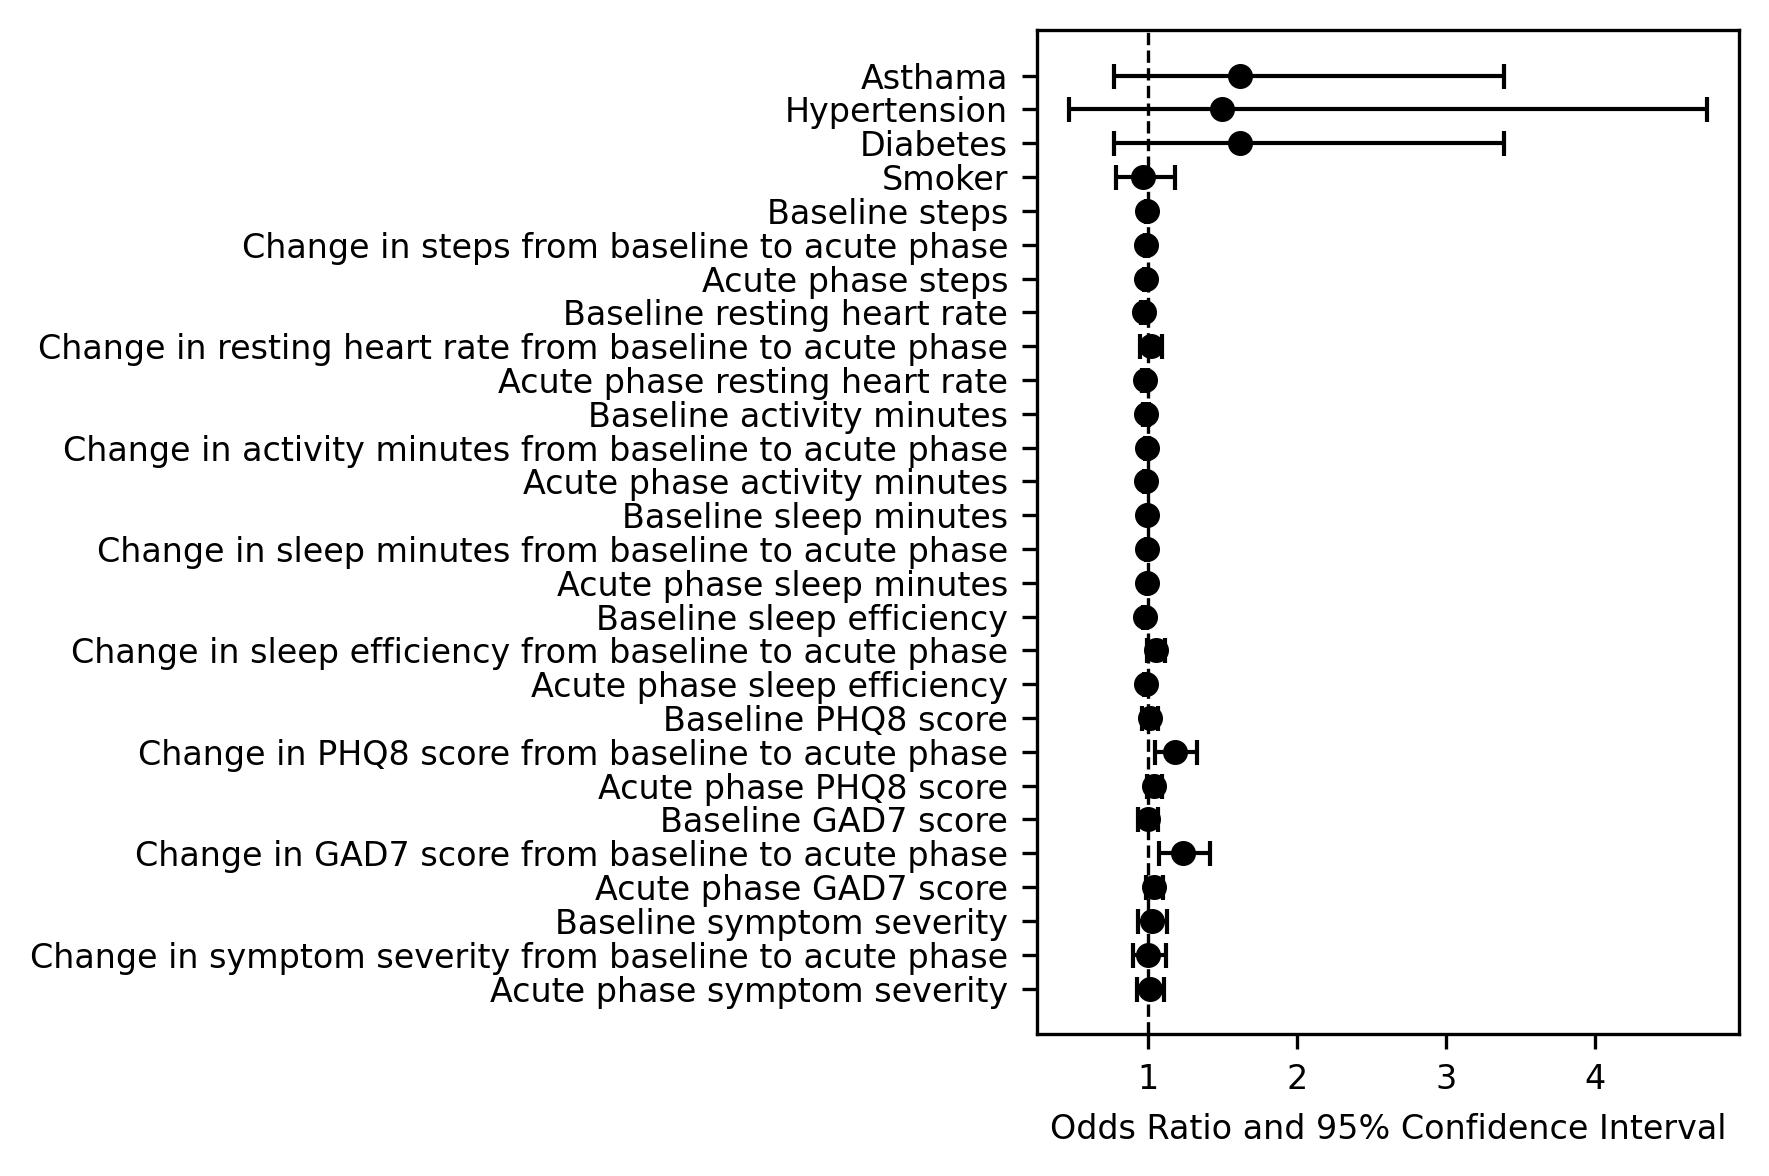

In [1222]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4), dpi=150)
ci = [log_result.iloc[::-1]['OR'] - log_result.iloc[::-1]['2.5%'].values, log_result.iloc[::-1]['97.5%'].values - log_result.iloc[::-1]['OR']]
plt.errorbar(x=log_result.iloc[::-1]['OR'], y=log_result.iloc[::-1].index.values, xerr=ci,
            color='black',  capsize=3, linestyle='None', linewidth=1,
            marker="o", markersize=5, mfc="black", mec="black")
plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=8)
plt.tight_layout()
# plt.savefig('raw_forest_plot.png')
plt.show()

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'Odds Ratio and 95% Confidence Interval')

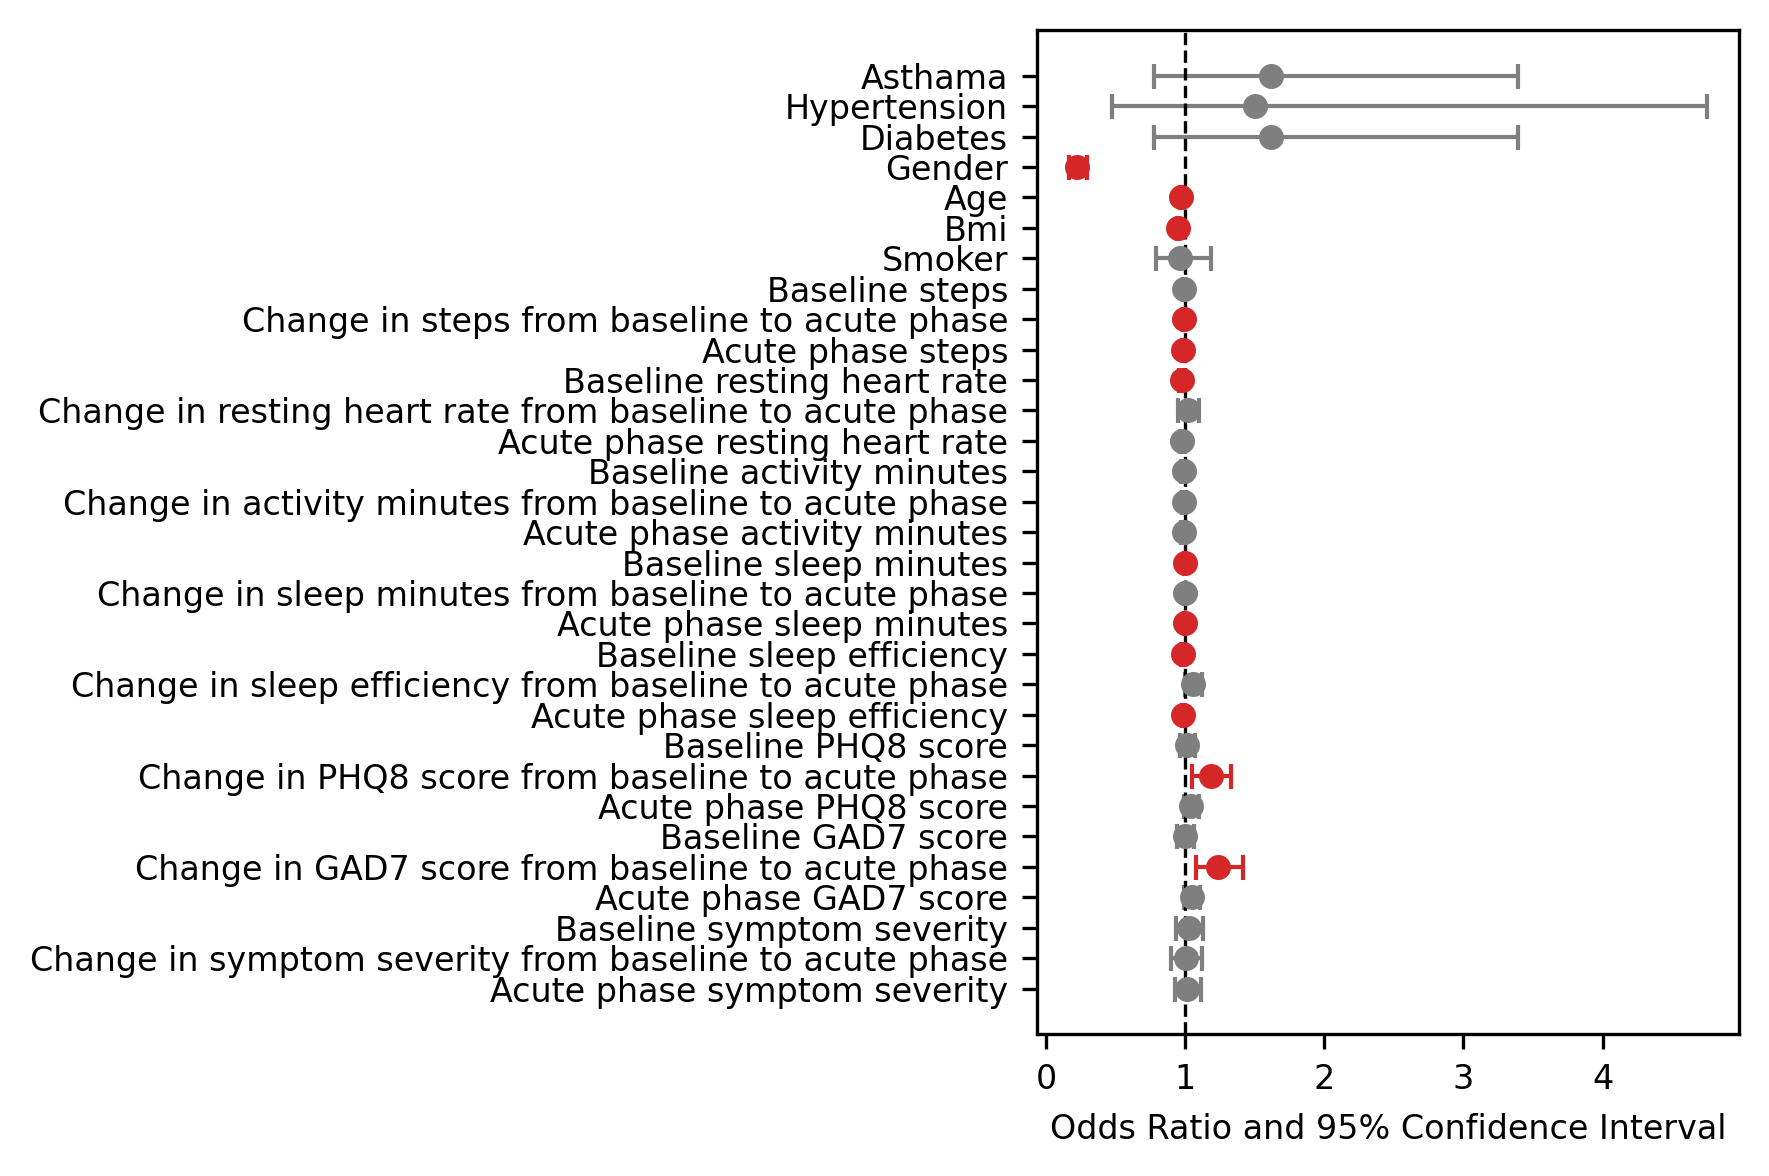

In [1226]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(6, 4), dpi=150)
for idx, row in log_result.iloc[::-1].iterrows():
    ci = [[row['OR'] - row[::-1]['2.5%']], [row['97.5%'] - row['OR']]]
    if row['significant?'] == 'significant':
        plt.errorbar(x=[row['OR']], y=[row.name], xerr=ci,
            ecolor='tab:red', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="tab:red", mec="tab:red")
    else:
        plt.errorbar(x=[row['OR']], y=[row.name], xerr=ci,
            ecolor='tab:gray', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="tab:gray", mec="tab:gray")
plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=8)
plt.tight_layout()
plt.savefig('forest_plot.png')
plt.show()

In [969]:
log_result['p-value']

baseline_steps                                 0.0030318
zscore_change_steps                             0.973415
acute_phase_steps                             0.00324636
baseline_rhr                                  3.2832e-09
zscore_change_rhr                              0.0625371
acute_phase_rhr                              7.37492e-09
asthama                                         0.759079
hypertension                                    0.634993
diabetes                                        0.759079
baseline_phq8_score                             0.969613
zscore_change_phq8_score                        0.215083
acute_phase_phq8_score                          0.766231
baseline_gad7_score                             0.129393
zscore_change_gad7_score                       0.0180753
acute_phase_gad7_score                          0.722338
baseline_main_symptom_severity                0.00128408
zscore_change_main_symptom_severity             0.350285
acute_phase_main_symptom_severi

In [1213]:
# Correction of p-values
from statsmodels.stats.multitest import fdrcorrection

reject, pvals_corr = fdrcorrection(log_result['p-value'])

print(reject, pvals_corr)

[False False False  True False False False  True  True False  True False
 False False  True False  True  True  True False False False False  True
 False False False False] [0.6707651545923012 0.6714127595682796 0.6707651545923012
 0.004668315898393593 0.6543720287751078 0.06179737045706392
 0.6543720287751078 0.008361698014139291 0.0006951396682870969
 0.7672506248423259 0.0008656713959605087 0.08272664343045777
 0.6543720287751078 0.08272664343045777 0.0008656713959605087
 0.1196050869341276 0.0004864402269239565 0.0006951396682870969
 0.001986068072035428 0.9911538323447582 0.06781965473742324
 0.6707651545923012 0.6320642276759232 0.012271225998178379
 0.6714127595682796 0.7418530569167624 0.7672506248423259
 0.6264645139494285]


In [1214]:
log_result['p-value-corrected'] = pvals_corr

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'Odds Ratio and 95% Confidence Interval')

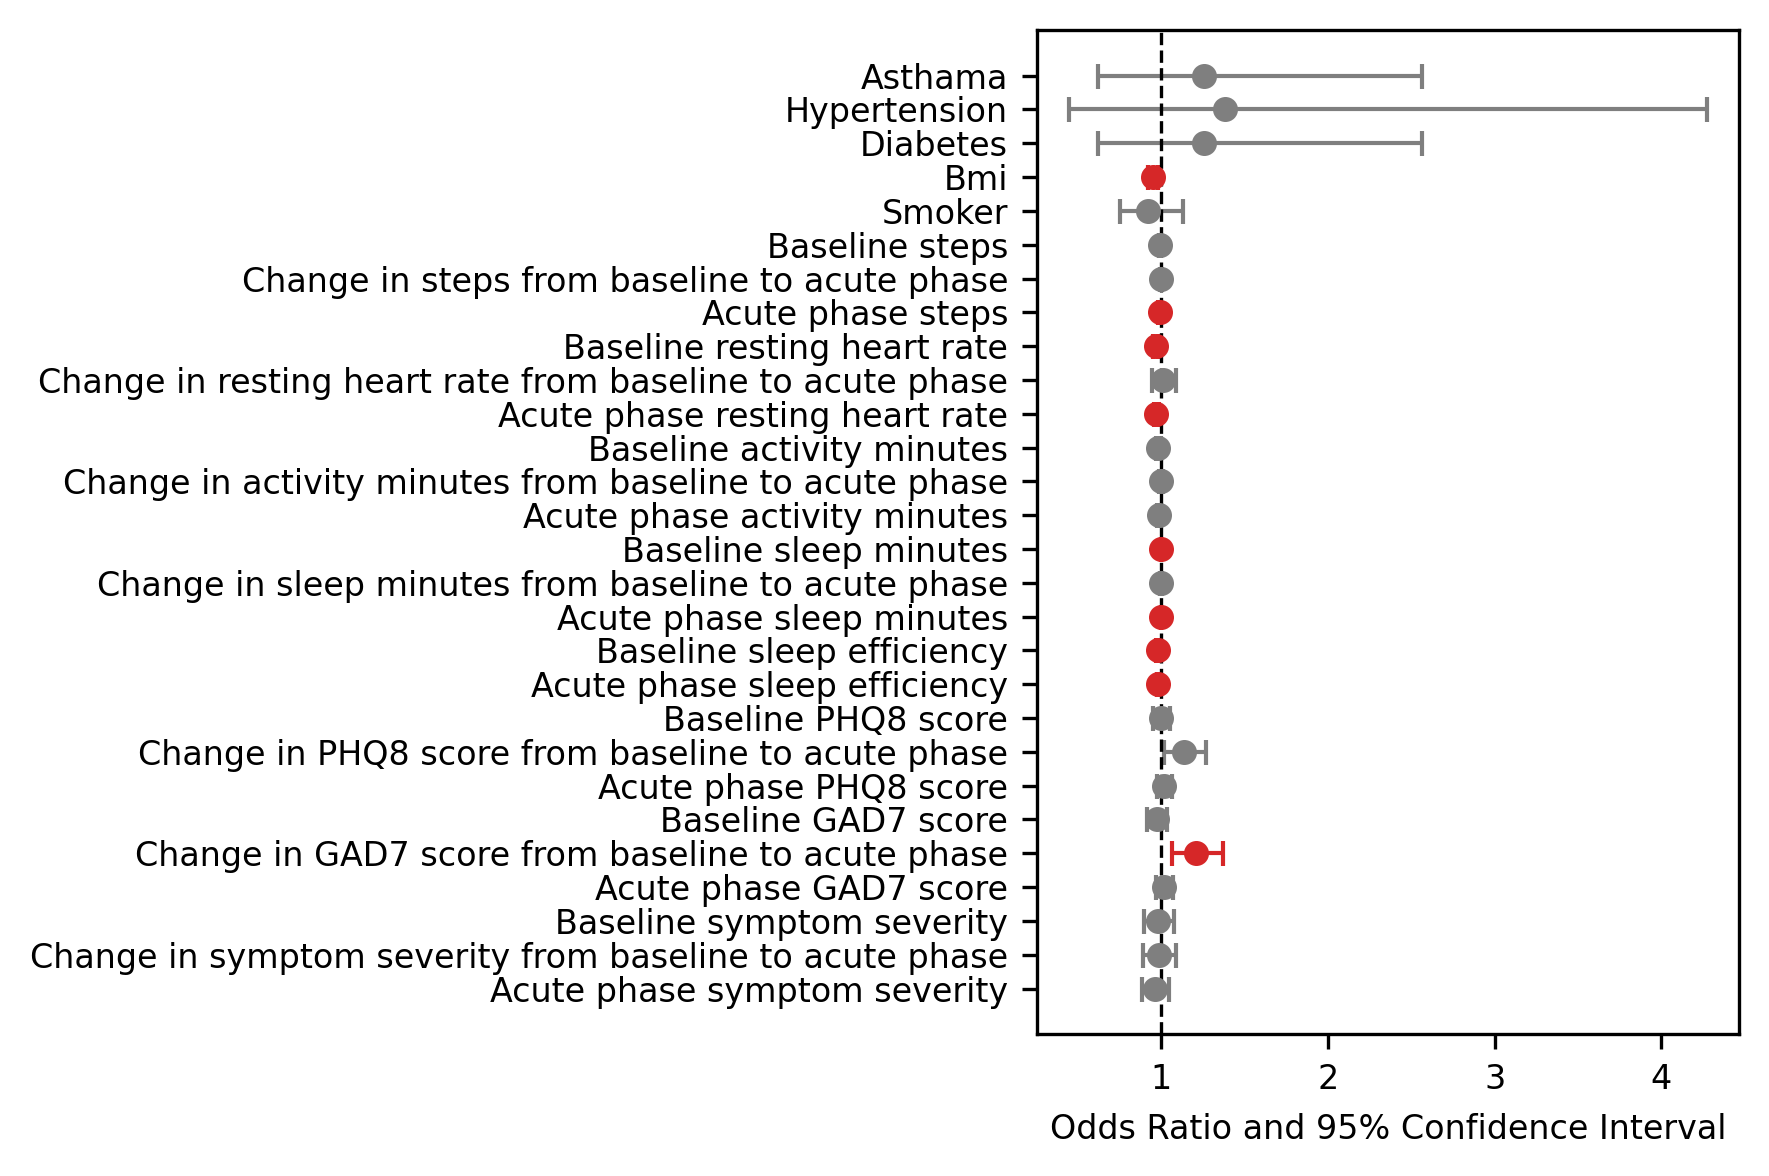

In [1215]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(6, 4), dpi=150)
for idx, row in log_result.iloc[::-1].iterrows():
    ci = [[row['OR'] - row[::-1]['2.5%']], [row['97.5%'] - row['OR']]]
    if row['p-value-corrected'] <= 0.05:
        plt.errorbar(x=[row['OR']], y=[row.name], xerr=ci,
            ecolor='tab:red', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="tab:red", mec="tab:red")
    else:
        plt.errorbar(x=[row['OR']], y=[row.name], xerr=ci,
            ecolor='tab:gray', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="tab:gray", mec="tab:gray")
plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=8)
plt.tight_layout()
plt.show()

## Plot passive data around diagnosis dates for lcovid and scovid cohorts

In [ ]:
dfs_to_plot = {}

step_df_indexed_updated = step_df_indexed.copy()
step_df_indexed_updated.columns = [c.replace('value', 'value.steps') for c in step_df_indexed_updated.columns]
step_df_indexed_updated['value.steps'] = step_df_indexed_updated['value.steps'].astype(int)
step_df_indexed_updated = step_df_indexed_updated.drop(columns=['dateTime'])

sleep_df_indexed_updated = sleep_df_indexed.copy()
sleep_df_indexed_updated.columns = [c.replace('duration', 'sleepDuration').replace('efficiency', 'sleepEfficiency') for c in sleep_df_indexed_updated.columns]

activities_df_indexed_updated = activities_df_indexed.copy()
activities_df_indexed_updated.columns = [c.replace('duration', 'activityDuration') for c in activities_df_indexed_updated.columns]

main_symp_df = symptoms_with_diag_filtered[['id', 'main_symptom_score']]
secondary_symp_df = symptoms_with_diag_filtered[['id', 'secondary_symptom_score']]

for df, col, time_col in [
    (rhr_df_indexed, 'value.restingHeartRate', 'dateTime'),
    (step_df_indexed_updated, 'value.steps', 'dateTime'),
    (sleep_df_indexed_updated, 'sleepDuration', 'dateOfSleep'),
    (sleep_df_indexed_updated, 'sleepEfficiency', 'dateOfSleep'),
    (activities_df_indexed_updated, 'activityDuration', 'startTime'),
    (main_symp_df, 'main_symptom_score', 'time'),
    (secondary_symp_df, 'secondary_symptom_score', 'time')
]:
    print(col)
    df_processed = df[['id', col]]

    df_processed_grouped = df_processed.reset_index().groupby(['id', time_col]).mean()

    user_dfs = []
    for grp, grp_df in df_processed_grouped.groupby(level=0):
        diag_df = diagnosis_filtered[diagnosis_filtered['id'] == grp]
        if len(diag_df) <= 0 or len(grp_df) <= 0:
            continue
        row = diag_df.iloc[0, :]
        index = diag_df.index[0]

        if pd.notnull(row['task_date_illness_value']):
            index = pd.to_datetime(row['task_date_illness_value'], infer_datetime_format=True)

        if grp in lcovid_ids:
            type_covid = 'long_covid'
        elif grp in combined_short_covid_ids:
            type_covid = 'short_covid'
        else:
            continue

        grp_df['days_from_diagnosis'] = (pd.to_datetime(grp_df.reset_index(level=0).index, utc=True) - index).days  
        grp_df['type_covid'] = type_covid
        user_dfs.append(grp_df)
    #     display(grp_df)
    #     break

    final_df = pd.concat(user_dfs)
    dfs_to_plot[col] = final_df

In [938]:
# save the dfs

# Save log reg data
with open('dfs_to_plot', 'wb') as f:
    pickle.dump(dfs_to_plot, f)

dict_keys(['value.restingHeartRate', 'value.steps', 'sleepDuration', 'sleepEfficiency', 'activityDuration', 'main_symptom_score', 'secondary_symptom_score'])

In [833]:
import matplotlib.pyplot as plt
import matplotlib

Text(0.5, 0, '')

Text(0.5, 1.0, '')

Text(0, 0.5, 'value.restingHeartRate')

Text(0.0, 1.0, 'a)')

Text(0.5, 0, 'Days from Diagnosis')

Text(0.5, 0, '')

Text(0.5, 1.0, '')

Text(0, 0.5, 'value.steps')

Text(0.0, 1.0, 'b)')

Text(0.5, 0, 'Days from Diagnosis')

Text(0.5, 0, '')

Text(0.5, 1.0, '')

Text(0, 0.5, 'sleepDuration')

Text(0.0, 1.0, 'c)')

Text(0.5, 0, 'Days from Diagnosis')

Text(0.5, 0, '')

Text(0.5, 1.0, '')

Text(0, 0.5, 'sleepEfficiency')

Text(0.0, 1.0, 'a)')

Text(0.5, 0, 'Days from Diagnosis')

Text(0.5, 0, '')

Text(0.5, 1.0, '')

Text(0, 0.5, 'activityDuration')

Text(0.0, 1.0, 'b)')

Text(0.5, 0, 'Days from Diagnosis')

Text(0.5, 0, '')

Text(0.5, 1.0, '')

Text(0, 0.5, 'main_symptom_score')

Text(0.0, 1.0, 'c)')

Text(0.5, 0, 'Days from Diagnosis')

Text(0.5, 0, '')

Text(0.5, 1.0, '')

Text(0, 0.5, 'secondary_symptom_score')

Text(0.0, 1.0, 'a)')

Text(0.5, 0, 'Days from Diagnosis')

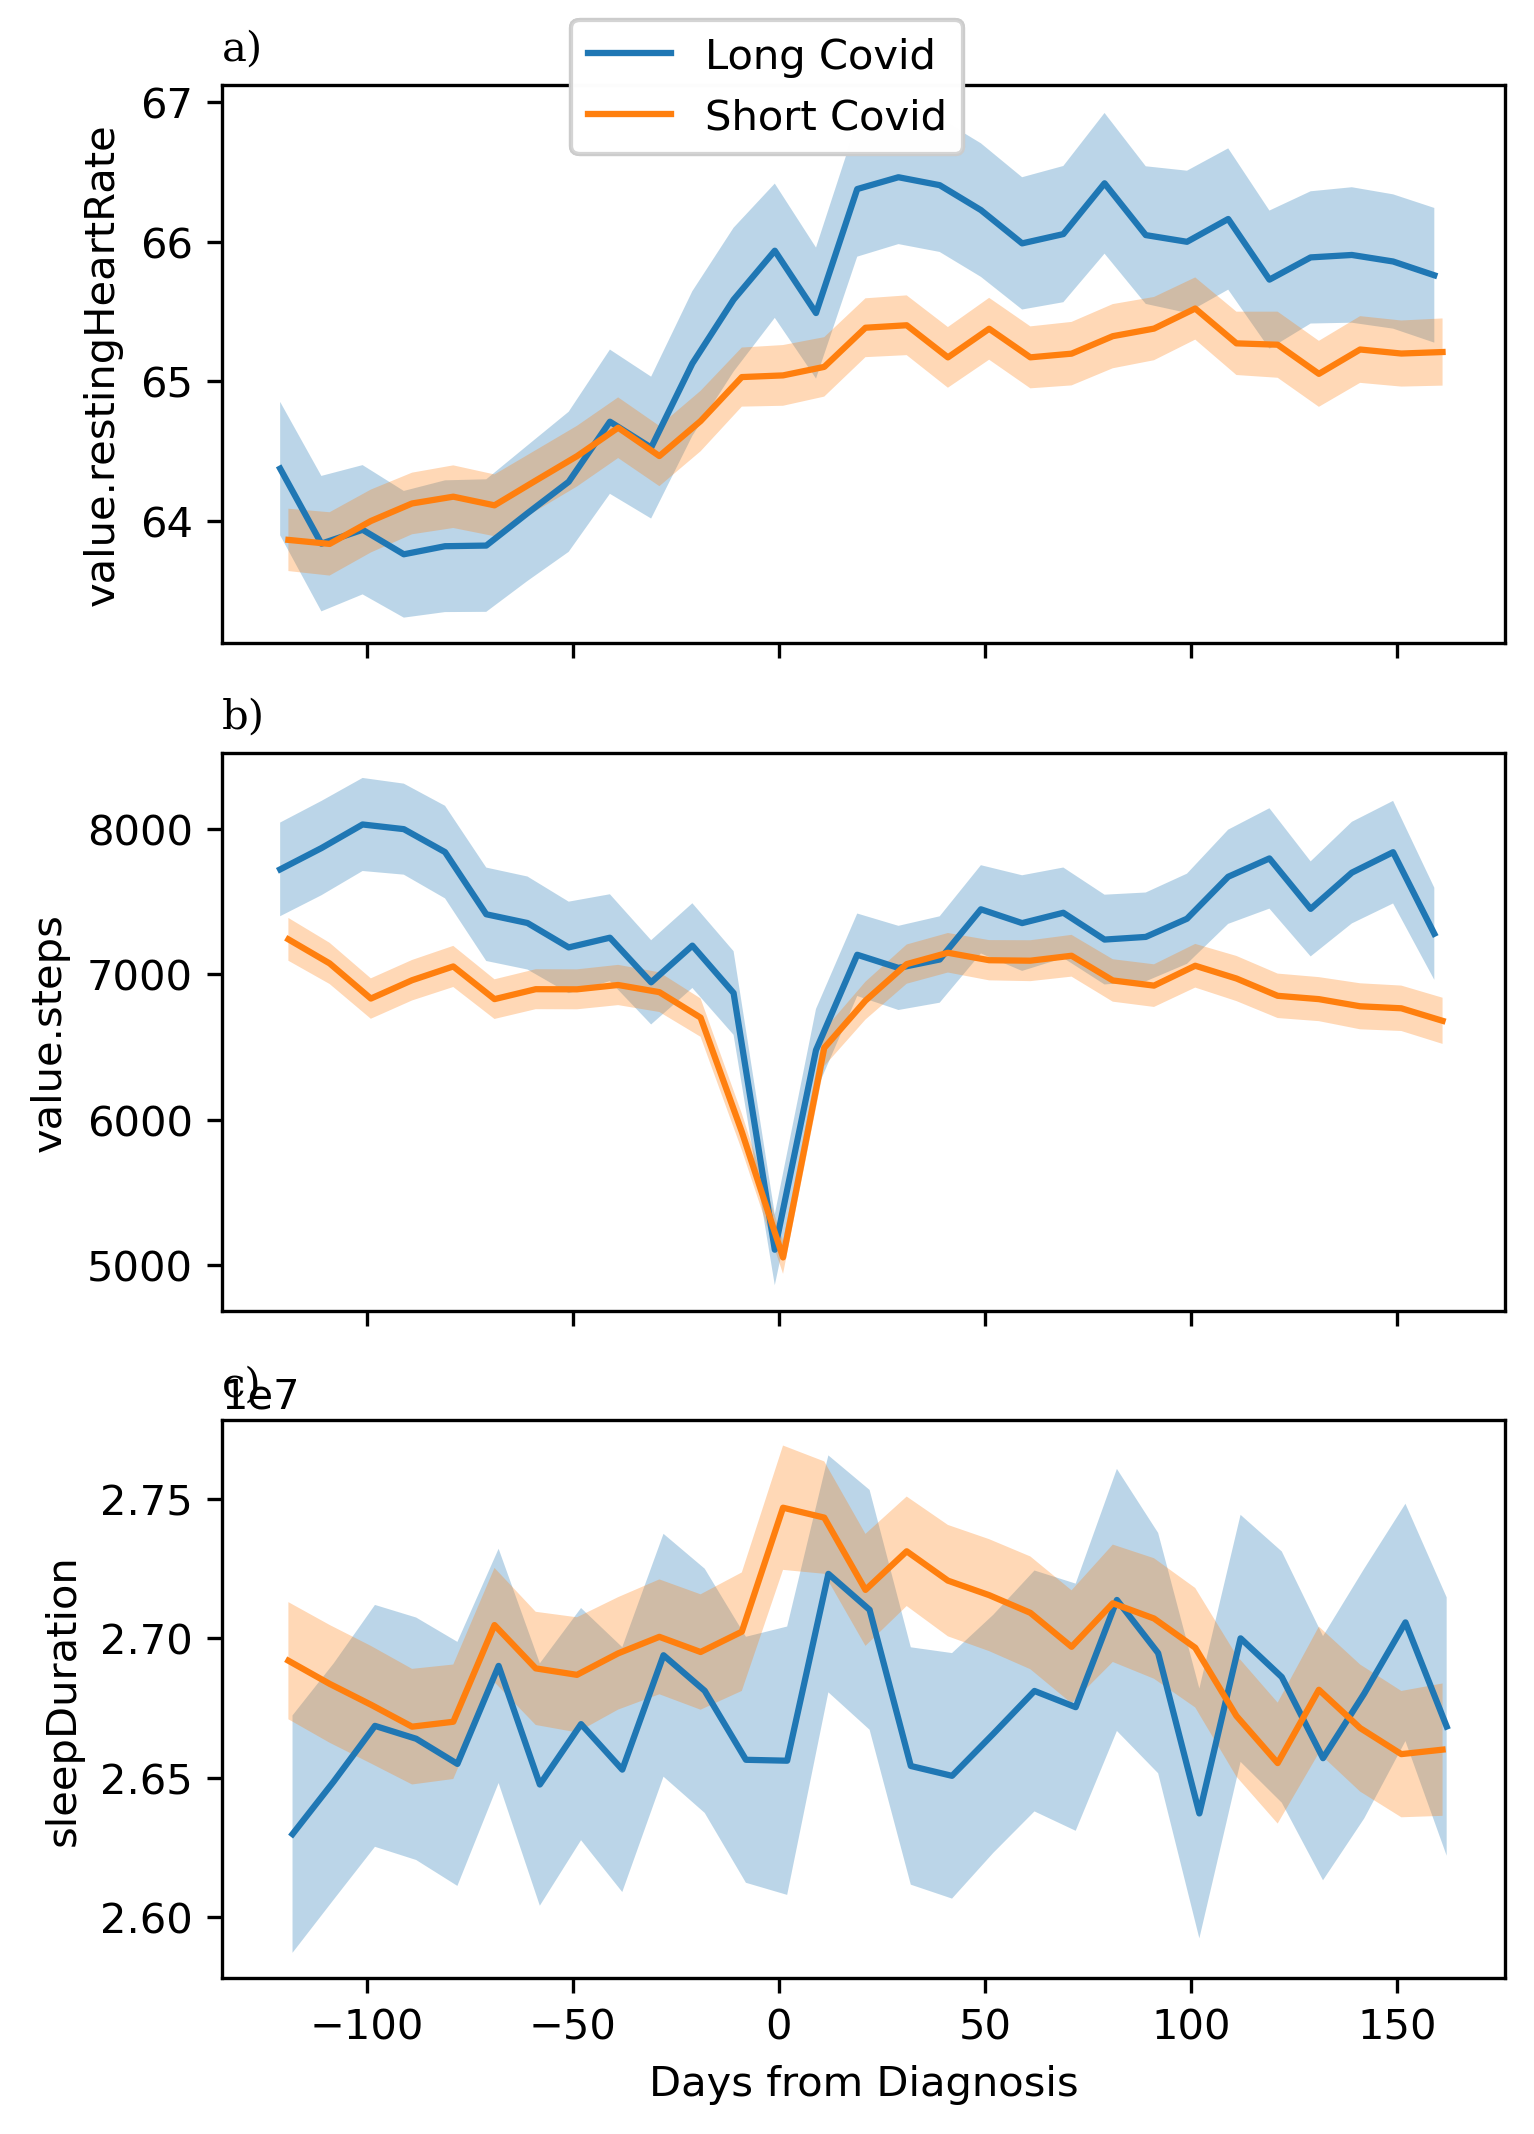

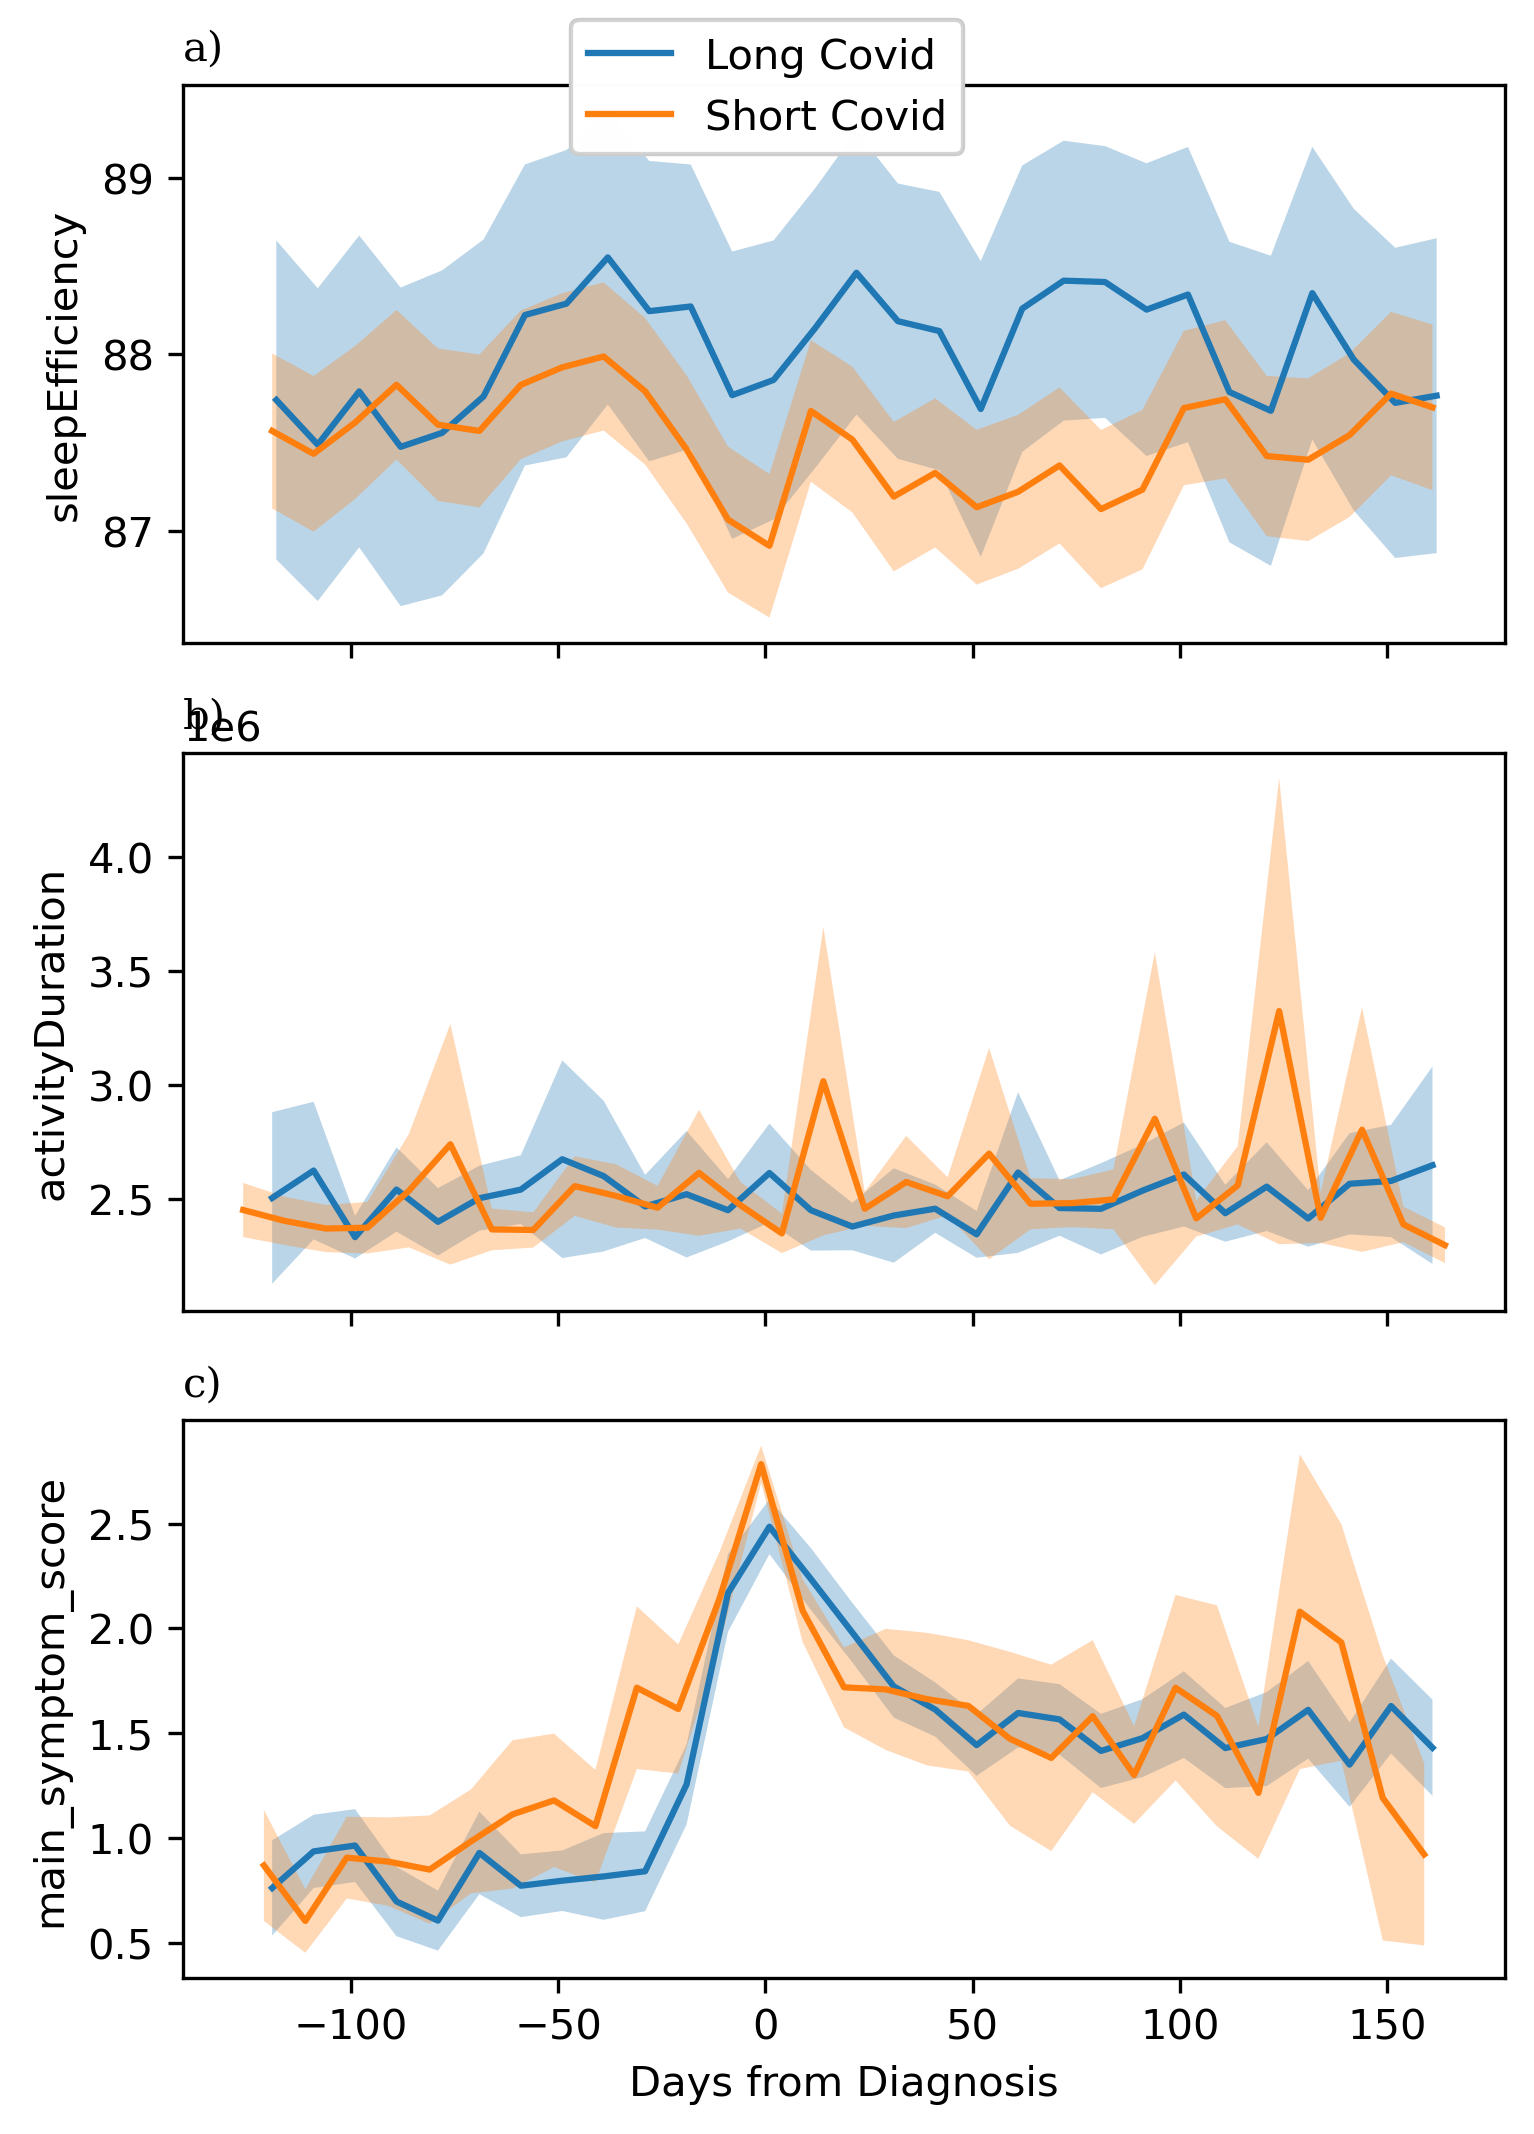

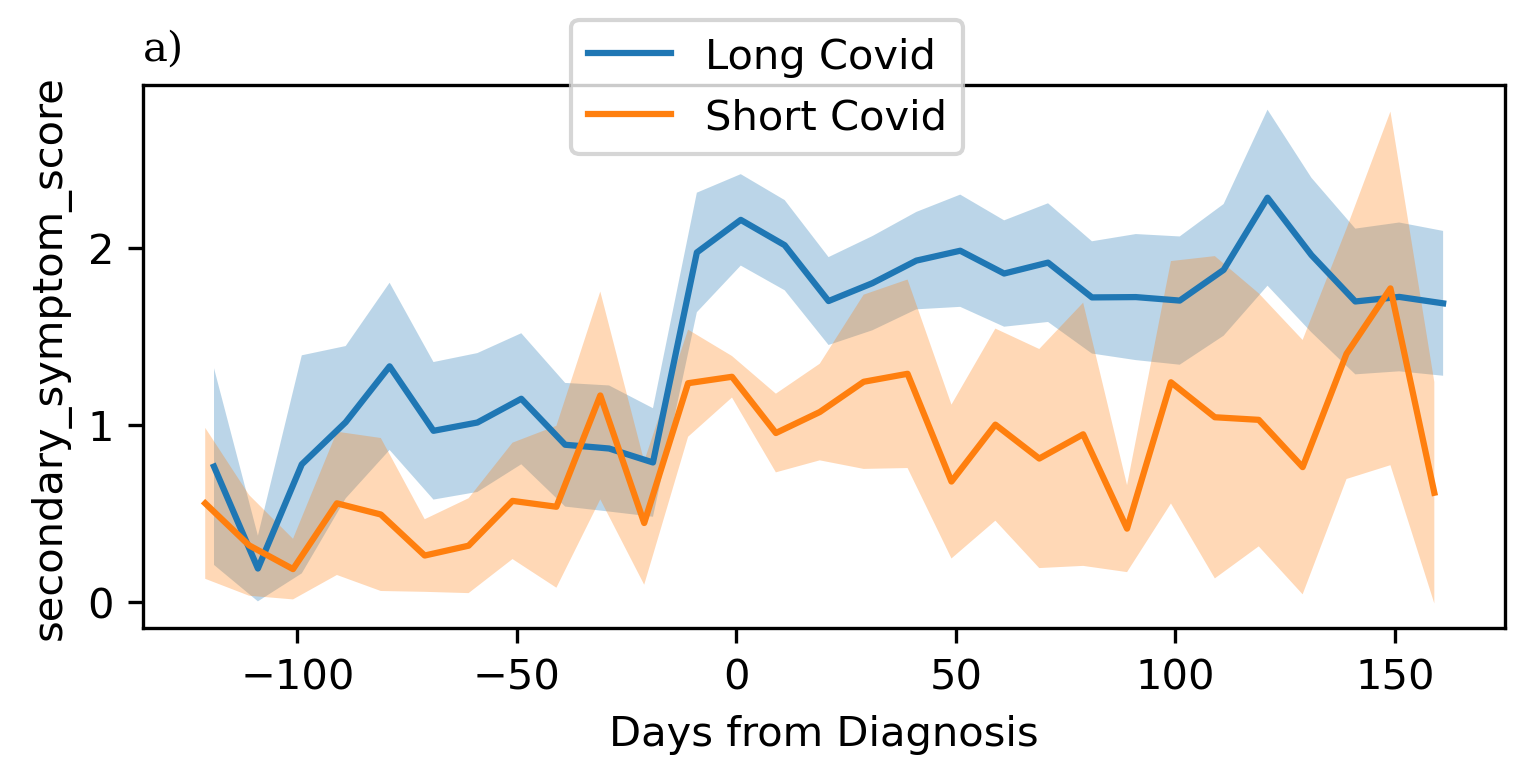

In [843]:
i = 0
resample_freq = '10D'

for col, df in dfs_to_plot.items():
    
    final_rhr_df_grouped = df.reset_index()
    final_rhr_df_grouped['days_from_diagnosis'] = pd.to_timedelta(final_rhr_df_grouped['days_from_diagnosis'], unit='D')

    days_before = pd.to_timedelta(-126, unit='D')
    days_after = pd.to_timedelta(168, unit='D')
    
    final_rhr_df_grouped_lcov = final_rhr_df_grouped[final_rhr_df_grouped['type_covid'] == 'long_covid'].resample(resample_freq, on='days_from_diagnosis')
    
    mean_lcov = final_rhr_df_grouped_lcov.mean().loc[days_before: days_after]
    std_lcov = final_rhr_df_grouped_lcov.std().loc[days_before: days_after]
    count_lcov = final_rhr_df_grouped_lcov.count().loc[days_before: days_after]
    ci_lcov = 1.96 * std_lcov / (count_lcov ** .5)


    final_rhr_df_grouped_scov = final_rhr_df_grouped[final_rhr_df_grouped['type_covid'] == 'short_covid'].resample(resample_freq, on='days_from_diagnosis')

    mean_scov = final_rhr_df_grouped_scov.mean().loc[days_before: days_after]
    std_scov = final_rhr_df_grouped_scov.std().loc[days_before: days_after]
    count_scov = final_rhr_df_grouped_scov.count().loc[days_before: days_after]
    ci_scov = 1.96 * std_scov / (count_scov ** .5)
    
    if i%3==0:
        remaining = len(dfs_to_plot) - i
        if remaining < 3:
            fig, ax = plt.subplots(remaining, 1, sharex=True, constrained_layout=True, figsize=(5, 2.5), dpi=150)
            if remaining == 1:
                axes = [ax]
        else:
            fig, axes = plt.subplots(3, 1, sharex=True, constrained_layout=True, figsize=(5, 7), dpi=150)
            

    ax = axes[i%3]

    ax.plot(mean_lcov.index.days, mean_lcov[col], label="Long Covid") # * diagnosis_symptom_agg['id'])
    #ax.bar(diagnosis_symptom_agg.index, diagnosis_symptom_agg[count_col])
    ax.plot(mean_scov.index.days, mean_scov[col], label="Short Covid")

    ax.fill_between(mean_lcov.index.days, (mean_lcov[col]-ci_lcov[col]), (mean_lcov[col]+ci_lcov[col]), alpha=0.3)
    ax.fill_between(mean_scov.index.days, (mean_scov[col]-ci_scov[col]), (mean_scov[col]+ci_scov[col]), alpha=0.3)

    ax.set_xlabel('')
    ax.set_title('')
    ax.set_ylabel(col)
    ax.set_title(['a)','b)','c)'][i%3], fontfamily='serif', loc='left', fontsize='medium')
    plt.xlabel('Days from Diagnosis')
    fig.legend(labels = ['Long Covid','Short Covid'], loc='upper center')
    i += 1

### Plot bradycardia



Text(0.5, 0, '')

Text(0.5, 1.0, '')

Text(0, 0.5, 'value.restingHeartRate')

Text(0.0, 1.0, 'a)')

Text(0.5, 0, 'Days from Diagnosis')

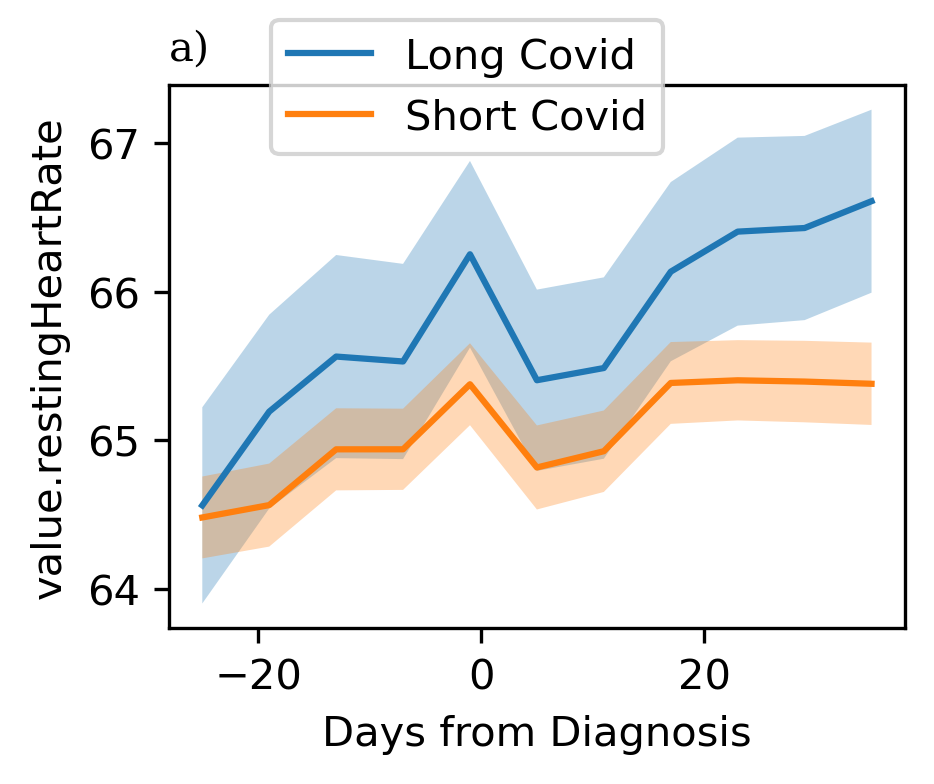

In [913]:
i = 0
resample_freq = '6D'

for col, df in dfs_to_plot.items():
    
    final_rhr_df_grouped = df.reset_index()
    final_rhr_df_grouped['days_from_diagnosis'] = pd.to_timedelta(final_rhr_df_grouped['days_from_diagnosis'], unit='D')

    days_before = pd.to_timedelta(-30, unit='D')
    days_after = pd.to_timedelta(40, unit='D')
    
    final_rhr_df_grouped_lcov = final_rhr_df_grouped[final_rhr_df_grouped['type_covid'] == 'long_covid'].resample(resample_freq, on='days_from_diagnosis')
    
    mean_lcov = final_rhr_df_grouped_lcov.mean().loc[days_before: days_after]
    std_lcov = final_rhr_df_grouped_lcov.std().loc[days_before: days_after]
    count_lcov = final_rhr_df_grouped_lcov.count().loc[days_before: days_after]
    ci_lcov = 1.96 * std_lcov / (count_lcov ** .5)


    final_rhr_df_grouped_scov = final_rhr_df_grouped[final_rhr_df_grouped['type_covid'] == 'short_covid'].resample(resample_freq, on='days_from_diagnosis')

    mean_scov = final_rhr_df_grouped_scov.mean().loc[days_before: days_after]
    std_scov = final_rhr_df_grouped_scov.std().loc[days_before: days_after]
    count_scov = final_rhr_df_grouped_scov.count().loc[days_before: days_after]
    ci_scov = 1.96 * std_scov / (count_scov ** .5)
    
#     if i%3==0:
#         remaining = len(dfs_to_plot) - i
#         if remaining < 3:
#             fig, ax = plt.subplots(remaining, 1, sharex=True, constrained_layout=True, figsize=(5, 2.5), dpi=150)
#             if remaining == 1:
#                 axes = [ax]
#         else:
#             fig, axes = plt.subplots(3, 1, sharex=True, constrained_layout=True, figsize=(5, 7), dpi=150)
            

#     ax = axes[i%3]
    
    fig, ax = plt.subplots(1, 1, sharex=True, constrained_layout=True, figsize=(3, 2.5), dpi=150)

    ax.plot(mean_lcov.index.days, mean_lcov[col], label="Long Covid") # * diagnosis_symptom_agg['id'])
    #ax.bar(diagnosis_symptom_agg.index, diagnosis_symptom_agg[count_col])
    ax.plot(mean_scov.index.days, mean_scov[col], label="Short Covid")

    ax.fill_between(mean_lcov.index.days, (mean_lcov[col]-ci_lcov[col]), (mean_lcov[col]+ci_lcov[col]), alpha=0.3)
    ax.fill_between(mean_scov.index.days, (mean_scov[col]-ci_scov[col]), (mean_scov[col]+ci_scov[col]), alpha=0.3)

    ax.set_xlabel('')
    ax.set_title('')
    ax.set_ylabel(col)
    ax.set_title(['a)','b)','c)'][i%3], fontfamily='serif', loc='left', fontsize='medium')
    plt.xlabel('Days from Diagnosis')
    fig.legend(labels = ['Long Covid','Short Covid'], loc='upper center')
    i += 1
    break

### Research latest relationship between smoking and covid in literature

## Symptoms Durations

#### TODO: Convert to MERGED dataset once available

#### Common code for all cohorts

In [362]:
symptom_durations_df =  symptoms_with_diag_filtered.copy()

In [363]:
symptom_durations_df.drop(columns=['name','time', 'time_received', 'time_start'], inplace=True)

In [364]:
symptom_durations_df.drop(columns=symptom_durations_df.filter(regex=".*_time_start").columns, inplace=True)
symptom_durations_df.drop(columns=symptom_durations_df.filter(regex=".*_time_end").columns, inplace=True)

In [365]:
symptom_durations_df.drop(columns=symptom_durations_df.filter(regex="task_lcovid_symptoms_value_.*").columns, inplace=True)

In [355]:
symptom_durations_df.columns = [x.replace('task_symptoms_value_', '').replace('task_mood_value_', '') for x in symptom_durations_df.columns]

NameError: name 'symptom_durations_df' is not defined

In [367]:
## Currently only working for n=1. Need to fix

def top_n_durations(df, col, n=2):
    durations=[]
    for _ in range(0, n):
        
        df = df.sort_values(by='time').reset_index(drop=True)
        end_loc = df[df[f'{col}_count'] == df[f'{col}_count'].max()].index[0]
        start_loc = end_loc- df[f'{col}_count'].max()
        
        if start_loc < df.index.min():
            start_loc=df.index.min()
            
        #display(f'{end_loc}, {start_loc}')
        
        duration = {
            'duration': df.loc[end_loc]['time'] - df.loc[start_loc]['time'],
            'start_time': df.loc[start_loc]['time'],
            'end_time': df.loc[end_loc]['time']
        }
        durations.append(duration)
        df = df.drop(index=range(start_loc, end_loc+1))
        
        
    return durations

In [424]:
def calculate_duration(final_df, time_threshold='7 days', type_covid='lcovid'):
    duration_agg=[]
    count=0

    for grp, grp_df in final_df.groupby('id'):

        # get diagnosis date so can filter for only dates after diagnosis for each user
        start = diagnosis_filtered[diagnosis_filtered['id'] == grp]

        user_agg={
            'id': grp,
            'type': type_covid
        }

        temp_df = grp_df.copy()

#         if len(start) > 1:
#             # currently ignore people with more than 1 diagnosis (since it can have adverse effects on Lcovid assumptions)
#             print("More than 1 diagnosis, skipping")
#             continue
        
        if pd.notnull(start.iloc[0]['task_date_illness_value']):
            index = pd.to_datetime(start.iloc[0]['task_date_illness_value'], infer_datetime_format=True)
#         elif pd.notnull(start.iloc[0]['task_date_diagnosed_value']):
#             index = pd.to_datetime(start.iloc[0]['task_date_diagnosed_value'], infer_datetime_format=True)
        else:
            index = start.index[0]

        for col in grp_df.columns:

            if col=='time' or col=='id':
                continue

            mean_col = temp_df[temp_df['time'] < index][col].mean()
            try:
                if col=='valence' or col=='arousal':
                    df = temp_df[temp_df[col] < mean_col].sort_values(by='time')
                    #display(mean_col)
                else:
                    df = temp_df[temp_df[col] >= 1].sort_values(by='time')
            except Exception as e:
                display(temp_df, col)
                display(e)
                assert(False)

            df = df[index - pd.Timedelta('7D') < df['time']]

            temp_df[f'{col}_Delta'] = df[['time']].apply(lambda x: x-x.shift(1))

            if len(temp_df[temp_df[f'{col}_Delta'].notnull()]) < 1:
                # all deltas are null, no valid durations
                continue


            temp_df[f'{col}_count'] = temp_df[[f'{col}_Delta']].apply(lambda x : x.le(pd.Timedelta(time_threshold)).cumsum())
            temp_df = temp_df.sort_values(by='time')


            durations=top_n_durations(temp_df.copy(), col, n=1)


            n_reports = temp_df[f'{col}_count'].max()

            user_agg[f'{col} Baseline Mean'] = mean_col
            user_agg[f'{col} Top Duration'] = durations[0]
            user_agg[f'{col} Max Reports in top duration'] = n_reports

        duration_agg.append(user_agg)
        
        count+=1
        print(f'progress: {count}', end='\x1b[1K\r')
        
#         if count==3:
#             break
        
    print(f'Total added: {count}')
    return duration_agg

#### L-covid

In [686]:
lcovid_durations_df = symptom_durations_df[symptom_durations_df['id'].isin(lcovid_ids)]

In [687]:
lcovid_durations_df

id  valence  \
time                                                                      
2020-11-03 12:25:24.380000+00:00  02KIBYpUG9QJ9yL0w7fU1oHUysu1     0.50   
2020-10-28 17:07:54.955000+00:00  02KIBYpUG9QJ9yL0w7fU1oHUysu1     0.50   
2020-11-20 10:15:34.082000+00:00  02KIBYpUG9QJ9yL0w7fU1oHUysu1     0.50   
2021-06-26 20:28:32.073000+00:00  02KIBYpUG9QJ9yL0w7fU1oHUysu1     0.25   
2020-12-15 15:49:38.397000+00:00  02KIBYpUG9QJ9yL0w7fU1oHUysu1     0.25   
...                                                        ...      ...   
2021-04-27 09:17:56.947000+00:00  zxSQFV06pzSr3eOw5sZ5ETv2NaD2     0.50   
2021-02-16 18:41:04.832000+00:00  zxSQFV06pzSr3eOw5sZ5ETv2NaD2     0.25   
2021-04-13 09:06:25.426000+00:00  zxSQFV06pzSr3eOw5sZ5ETv2NaD2     0.25   
2021-03-05 10:12:53.190000+00:00  zxSQFV06pzSr3eOw5sZ5ETv2NaD2     0.25   
2021-05-23 18:51:15.194999+00:00  zxSQFV06pzSr3eOw5sZ5ETv2NaD2     0.00   

                                  arousal  Fever  Difficulties breathing  \
time                                                                       
2020-11-03 12:25:24.380000+00:00     0.50    0.0                     1.0   
2020-10-28 17:07:54.955000+00:00     0.25    0.0                     1.0   
2020-11-20 10:15:34.082000+00:00     0.25    0.0                     1.0   
2021-06-26 20:28:32.073000+00:00     0.25    0.0                     1.0   
2020-12-15 15:49:38.397000+00:00     0.25    0.0                     1.0   
...                                   ...    ...                     ...   
2021-04-27 09:17:56.947000+00:00    -0.25    0.0                     1.0   
2021-02-16 18:41:04.832000+00:00     0.25    0.0                     0.0   
2021-04-13 09:06:25.426000+00:00     0.25    0.0                     1.0   
2021-03-05 10:12:53.190000+00:00     0.50    0.0                     0.0   
2021-05-23 18:51:15.194999+00:00    -0.50    0.0                     1.0   

                                  Loss of sense of smell (anosmia)  Cough  \
time                                                                        
2020-11-03 12:25:24.380000+00:00                               0.0    0.0   
2020-10-28 17:07:54.955000+00:00                               0.0    0.0   
2020-11-20 10:15:34.082000+00:00                               0.0    0.0   
2021-06-26 20:28:32.073000+00:00                               0.0    0.0   
2020-12-15 15:49:38.397000+00:00                               0.0    0.0   
...                                                            ...    ...   
2021-04-27 09:17:56.947000+00:00                               0.0    0.0   
2021-02-16 18:41:04.832000+00:00                               0.0    0.0   
2021-04-13 09:06:25.426000+00:00                               0.0    0.0   
2021-03-05 10:12:53.190000+00:00                               0.0    0.0   
2021-05-23 18:51:15.194999+00:00                               0.0    0.0   

                                  Congestion  Fatigue  Muscle or joint pain  \
time                                                                          
2020-11-03 12:25:24.380000+00:00         0.0      0.0                   0.0   
2020-10-28 17:07:54.955000+00:00         0.0      0.0                   0.0   
2020-11-20 10:15:34.082000+00:00         0.0      0.0                   0.0   
2021-06-26 20:28:32.073000+00:00         0.0      0.0                   0.0   
2020-12-15 15:49:38.397000+00:00         0.0      0.0                   0.0   
...                                      ...      ...                   ...   
2021-04-27 09:17:56.947000+00:00         0.0      1.0                   0.0   
2021-02-16 18:41:04.832000+00:00         0.0      1.0                   0.0   
2021-04-13 09:06:25.426000+00:00         0.0      1.0                   0.0   
2021-03-05 10:12:53.190000+00:00         0.0      1.0                   0.0   
2021-05-23 18:51:15.194999+00:00         0.0      2.0                   0.0   

                                  ...  Brain fog  Coat hanger Pai

In [688]:
lcovid_durations_final_df = lcovid_durations_df.reset_index()

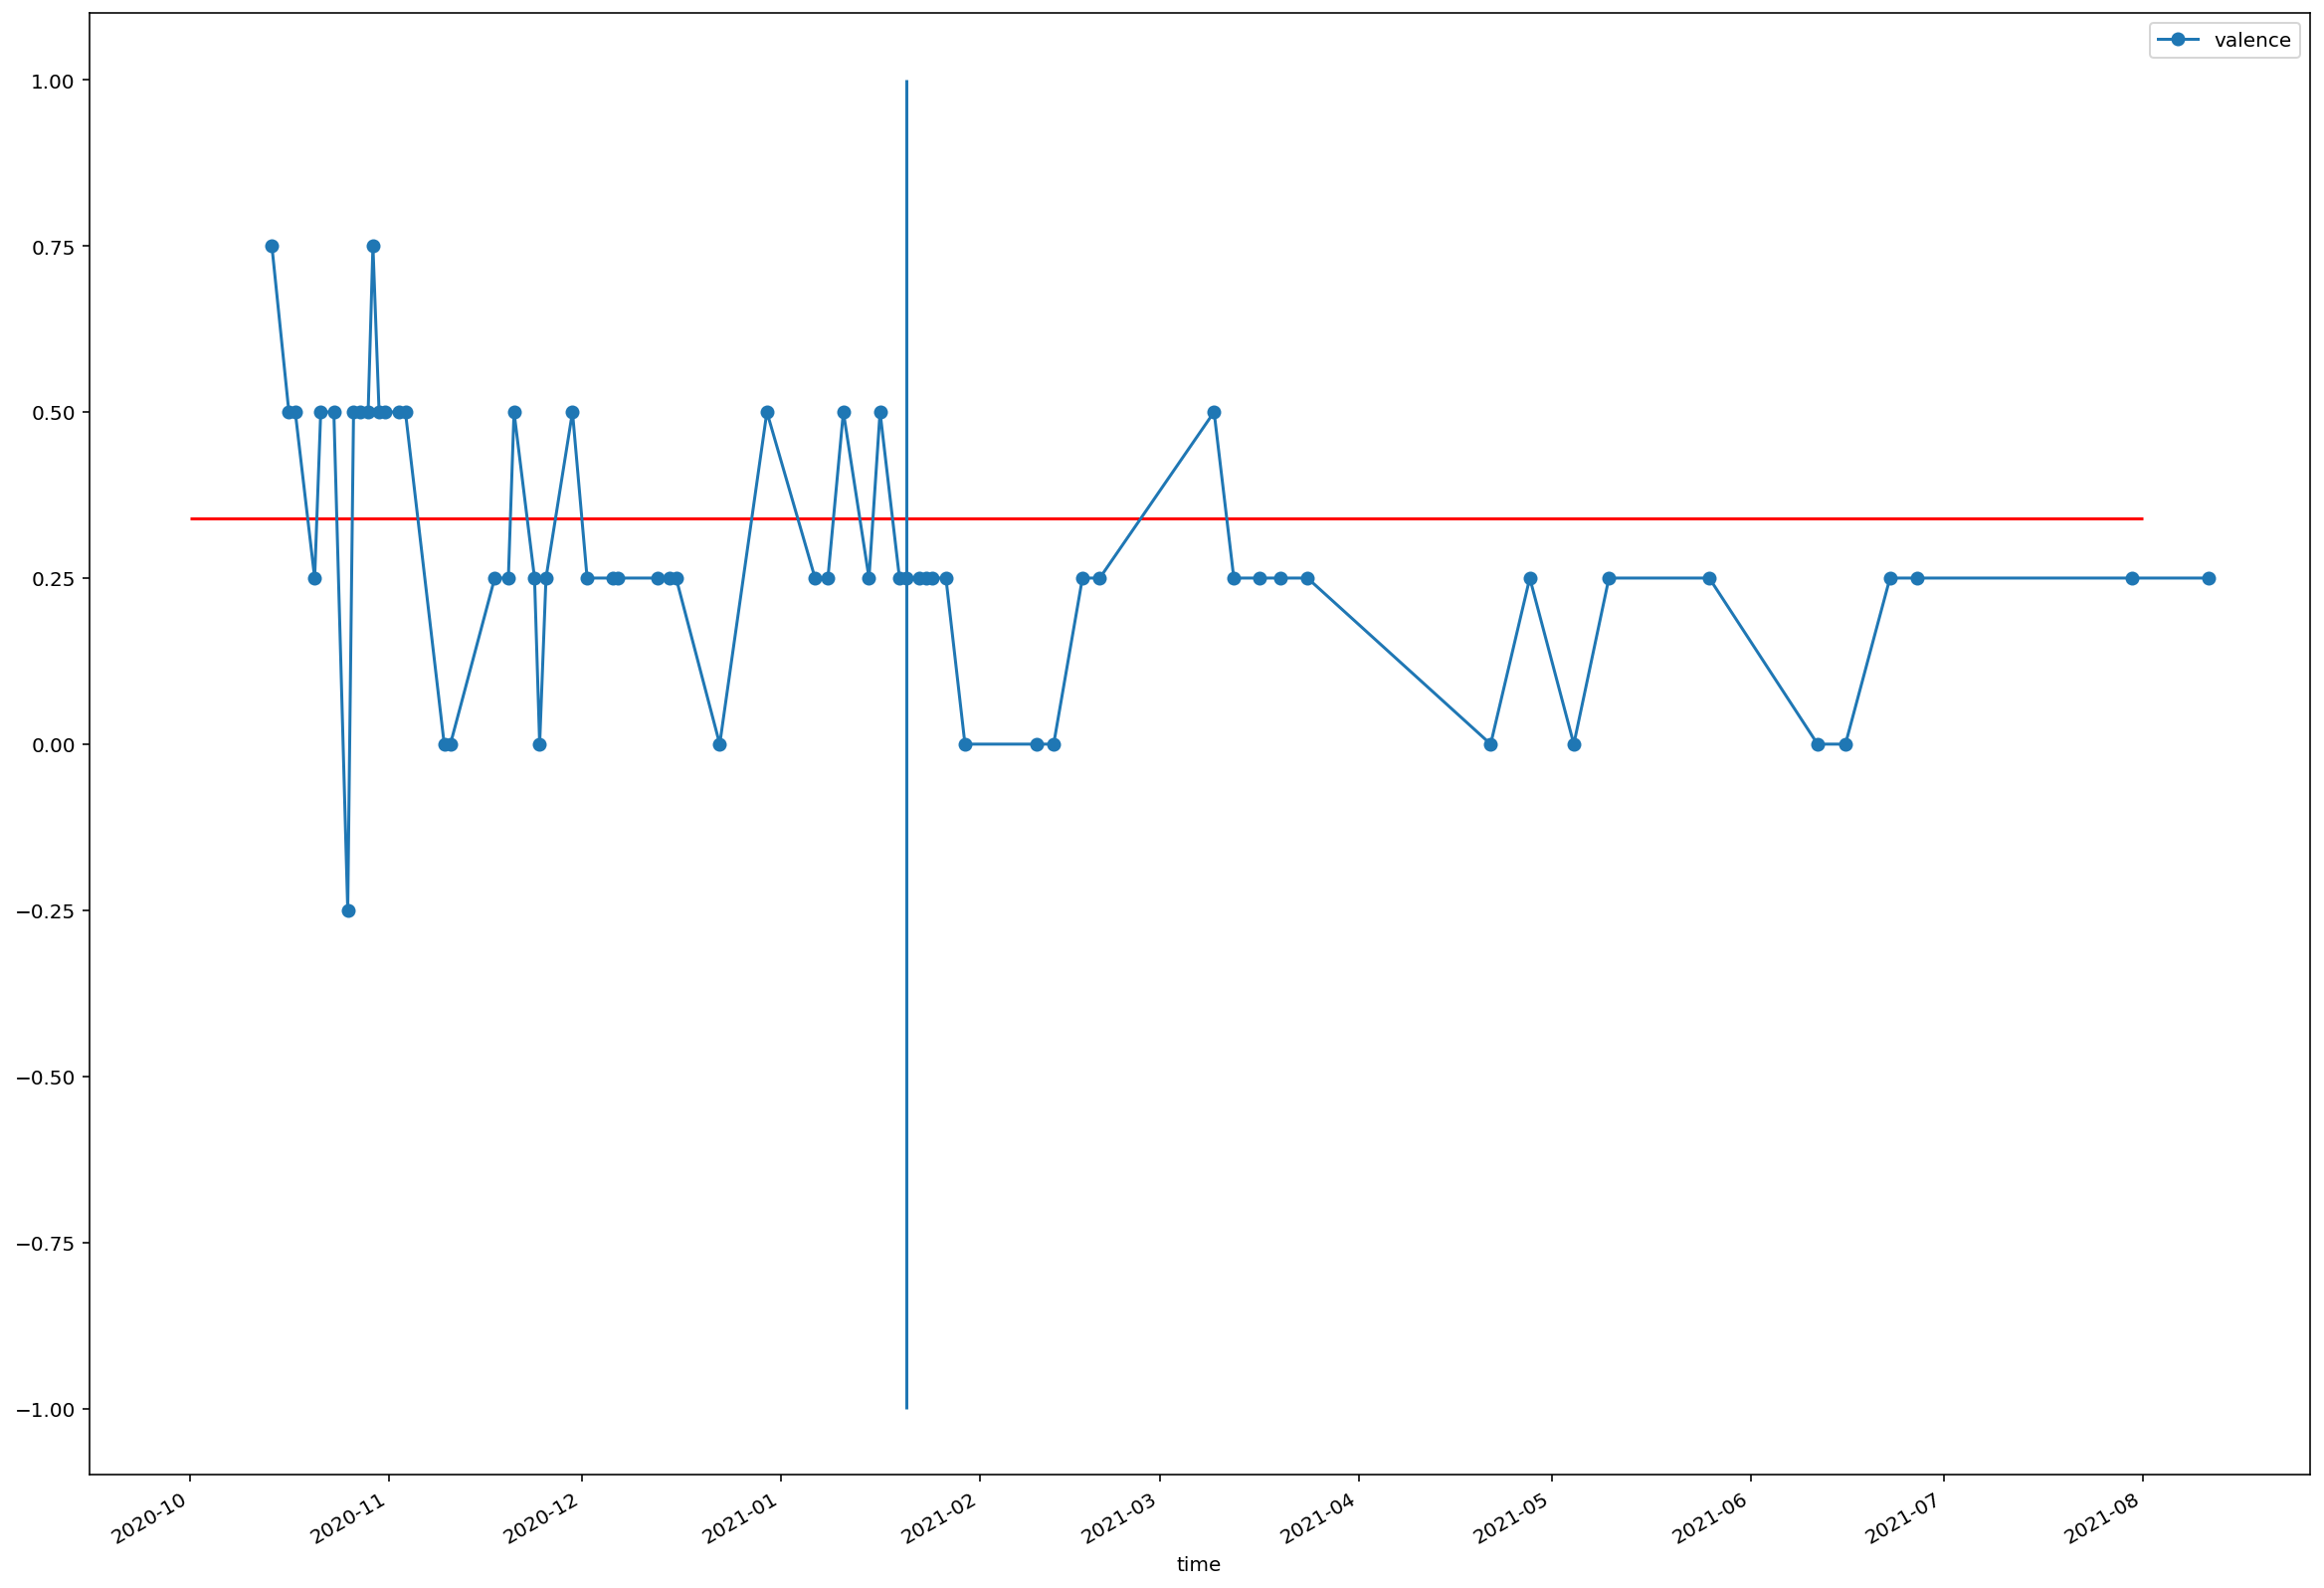

In [406]:
ax = lcovid_durations_final_df[lcovid_durations_final_df['id'] == '02KIBYpUG9QJ9yL0w7fU1oHUysu1'].plot(x='time', y='valence', style='-o', figsize=(20, 15))
ax.hlines(y=0.33974358974358976, xmin='2020-10', xmax='2021-08', color='r')
ax.vlines(diagnosis_filtered[diagnosis_filtered['id'] == '02KIBYpUG9QJ9yL0w7fU1oHUysu1']['task_date_diagnosed_value'], -1, 1)

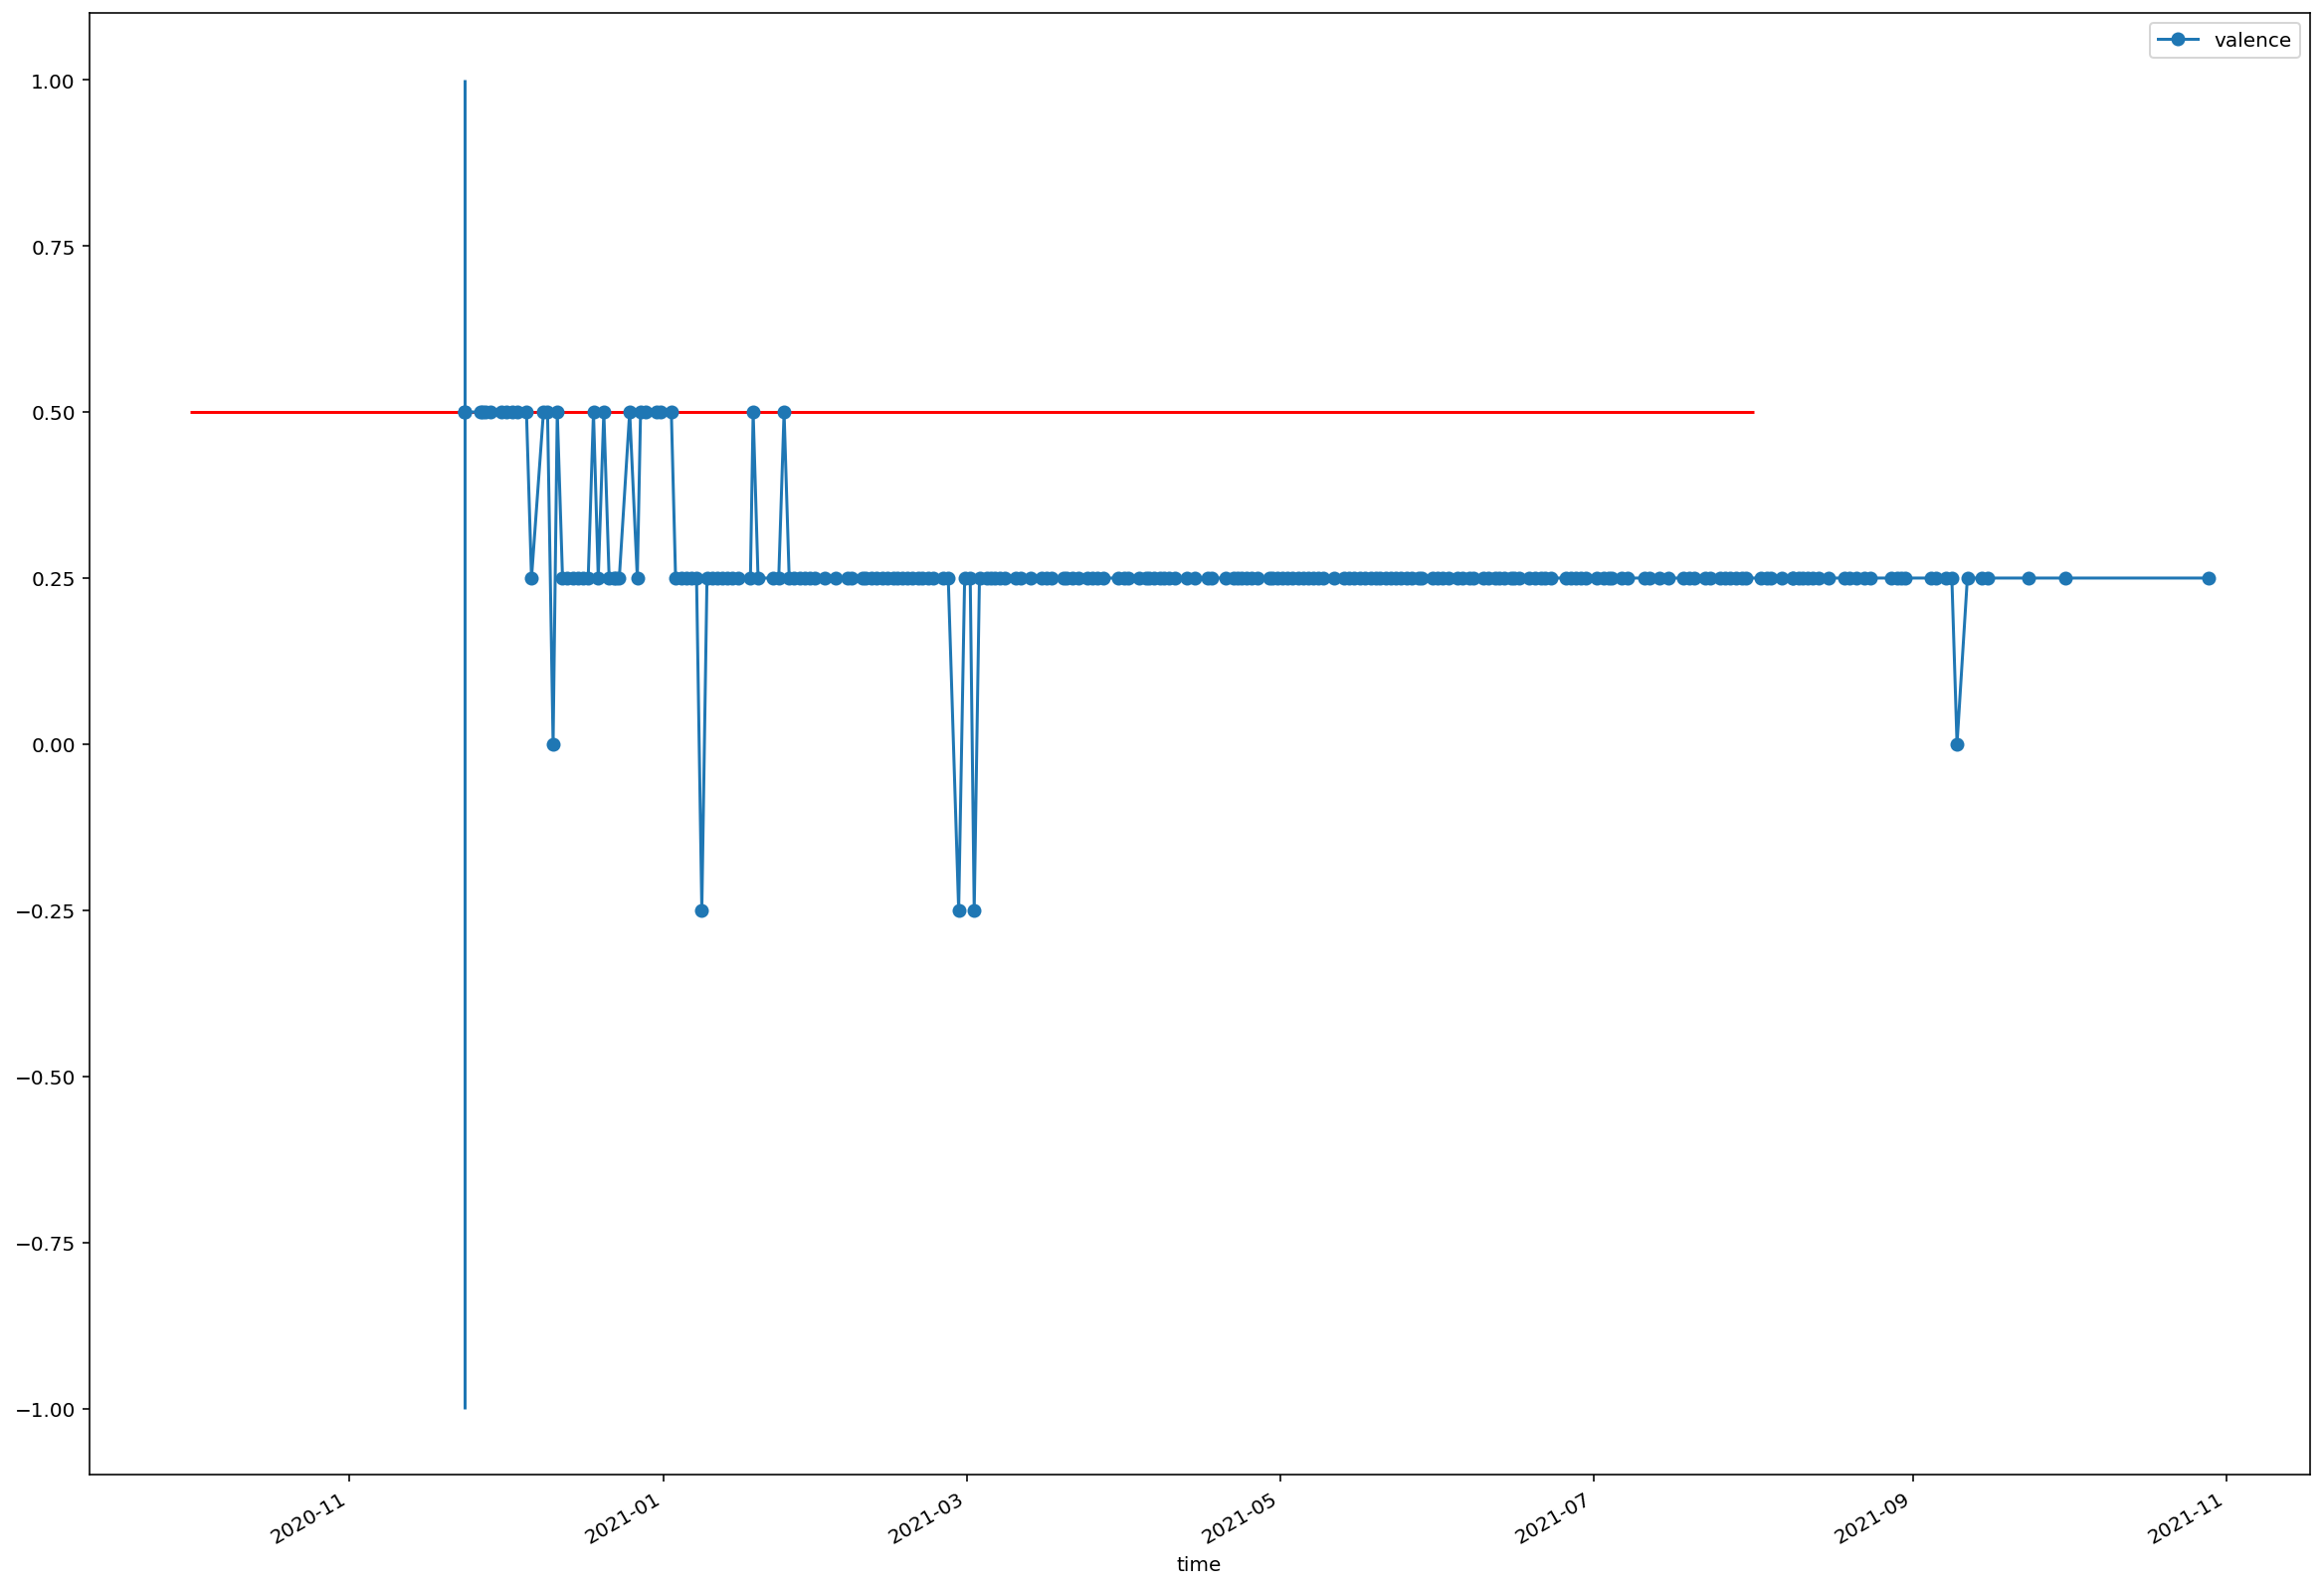

In [409]:
ax = lcovid_durations_final_df[lcovid_durations_final_df['id'] == '0NYueclxhpVxzXhfAhpAUsR0H1C2'].plot(x='time', y='valence', style='-o', figsize=(20, 15))
ax.hlines(y=0.500000, xmin='2020-10', xmax='2021-08', color='r')
ax.vlines(diagnosis_filtered[diagnosis_filtered['id'] == '0NYueclxhpVxzXhfAhpAUsR0H1C2'].index, -1, 1)

In [689]:
lcovid_agg_df = pd.DataFrame(calculate_duration(lcovid_durations_final_df))

Total added: 131K


In [690]:
lcovid_agg_df.columns

Index(['id', 'type', 'valence Baseline Mean', 'valence Top Duration',
       'valence Max Reports in top duration', 'arousal Baseline Mean',
       'arousal Top Duration', 'arousal Max Reports in top duration',
       'Difficulties breathing Baseline Mean',
       'Difficulties breathing Top Duration',
       'Difficulties breathing Max Reports in top duration',
       'Cough Baseline Mean', 'Cough Top Duration',
       'Cough Max Reports in top duration', 'main_symptom_score Baseline Mean',
       'main_symptom_score Top Duration',
       'main_symptom_score Max Reports in top duration',
       'lcovid_symptom_score Baseline Mean',
       'lcovid_symptom_score Top Duration',
       'lcovid_symptom_score Max Reports in top duration',
       'total_symptom_score Baseline Mean', 'total_symptom_score Top Duration',
       'total_symptom_score Max Reports in top duration',
       'Fever Baseline Mean', 'Fever Top Duration',
       'Fever Max Reports in top duration',
       'Loss of sense 

In [ ]:
# Load intermediate processed data from fs
import pickle
with open('lcovid_agg_df', 'rb') as f:
    lcovid_agg_df = pickle.load(f)

In [ ]:
# save intermediate processed data to fs so can be loaded later
import pickle
with open('lcovid_agg_df', 'wb+') as f:
    pickle.dump(lcovid_agg_df, f)

In [691]:
# Create df with the duration of all symptoms
lcovid_durations_to_plot = pd.DataFrame()

for col in lcovid_agg_df.filter(regex=".*Top Duration").columns:
    lcovid_durations_to_plot[col.replace('Top ', '')] = lcovid_agg_df[col].dropna().transform(lambda x: filter_dur(x))

In [692]:
lcovid_durations_to_plot = lcovid_durations_to_plot.drop(columns=['lcovid_symptom_score Duration', 'rash  Duration', 'rash Duration', 'Runny nose Duration', 'kidney pain Duration', 'main_symptom_score Duration', 'secondary_symptom_score Duration']) \
    .rename(columns={'total_symptom_score Duration': 'Any symptom Duration'})

In [693]:
index_sort = lcovid_durations_to_plot.mean().sort_values().index
index_sort

Index(['Chills Duration', 'Fever Duration', 'Nausea Duration',
       'Headache Duration', 'Congestion Duration', 'valence Duration',
       'Confusion Duration', 'Cough Duration', 'arousal Duration',
       'Muscle or joint pain Duration',
       'Loss of sense of smell (anosmia) Duration', 'Fatigue Duration',
       'Difficulties breathing Duration', 'Any symptom Duration'],
      dtype='object')

<AxesSubplot:>

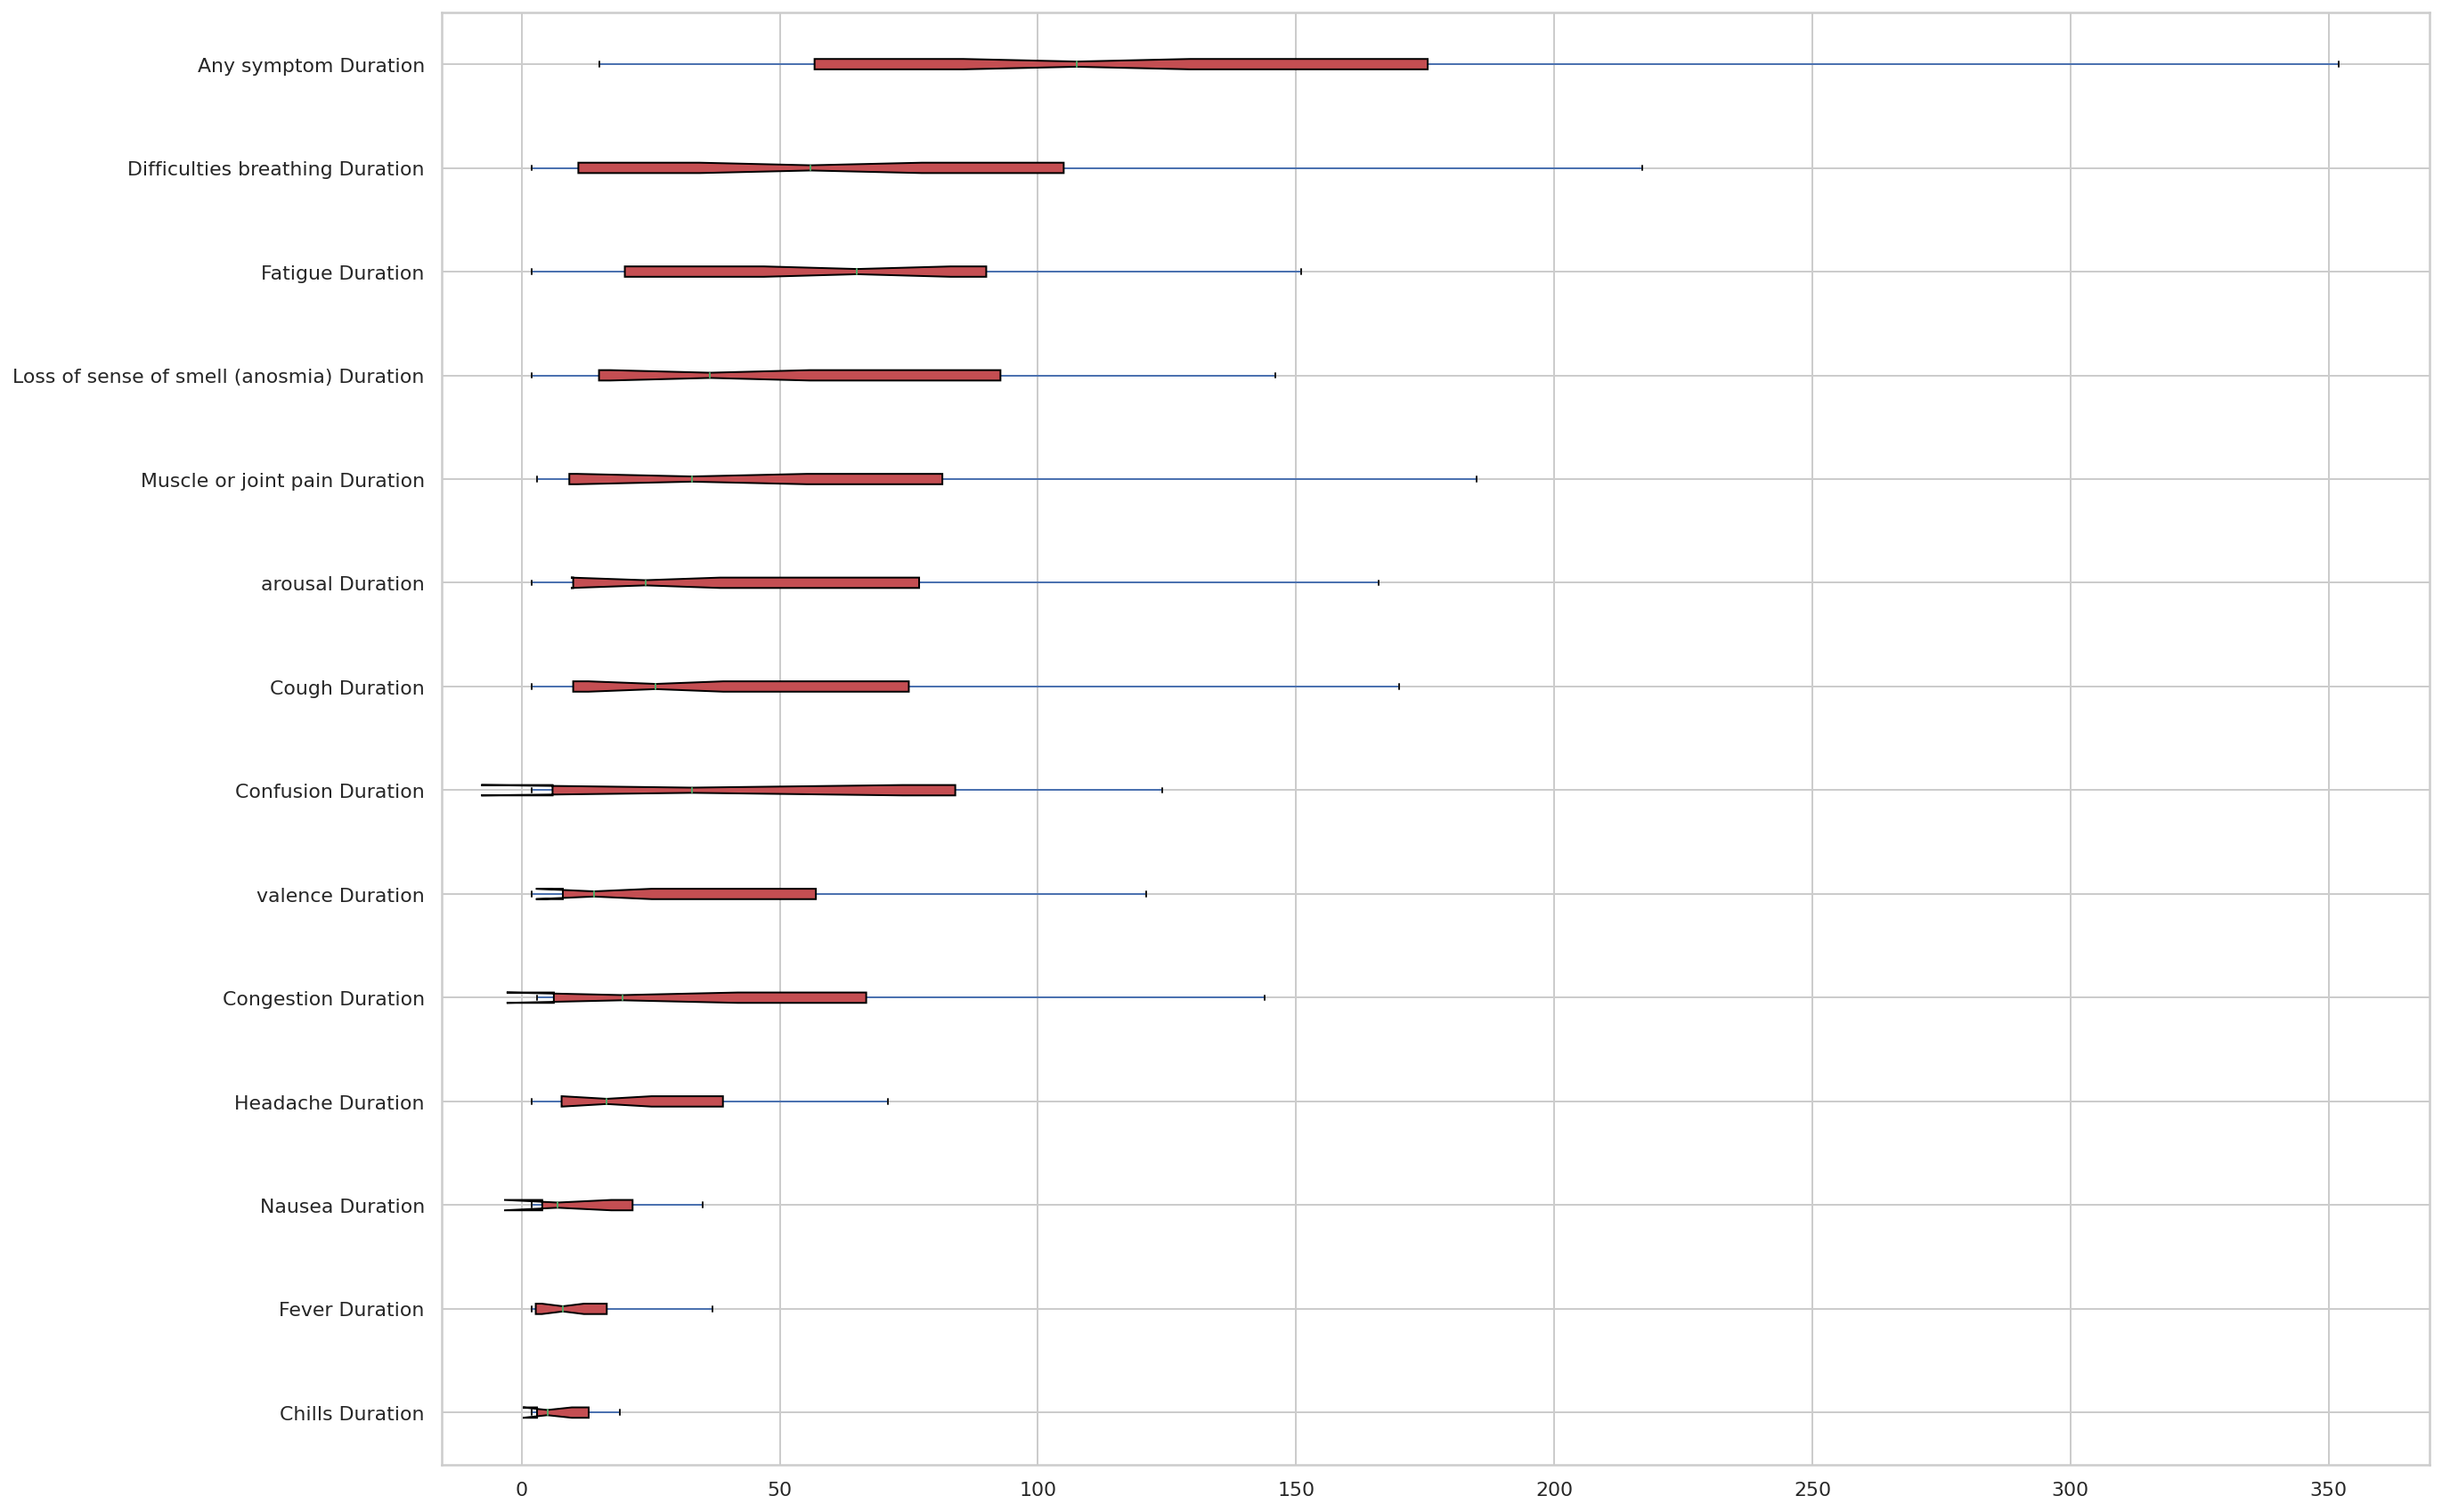

In [694]:
lcovid_durations_to_plot[index_sort].plot.box(sym='', vert=False, notch=True, widths=0.1, patch_artist=True, figsize=(20, 15), by='type', boxprops=dict(facecolor='r'))

In [ ]:
# plot the durations    
ax = lcovid_durations_to_plot[index_sort]['Any symptom Duration'].plot.box(sym='', positions=[14], labels=['Any symptom Duration'], vert=False, notch=True, widths=0.1, patch_artist=True, figsize=(20, 15), by='type', boxprops=dict(facecolor='r'))
i=list(index_sort)
i.remove('Any symptom Duration')

len(i)
lcovid_durations_to_plot[index_sort][i].plot.box(ax=ax, sym='', positions=range(1,14), labels=i, vert=False, notch=True, widths=0.1, patch_artist=True, figsize=(20, 15), by='type', boxprops=dict(facecolor='b'))

In [695]:
lcovid_sns_df = pd.melt(lcovid_durations_to_plot[index_sort])

In [696]:
lcovid_sns_df['type'] = 'long_covid'

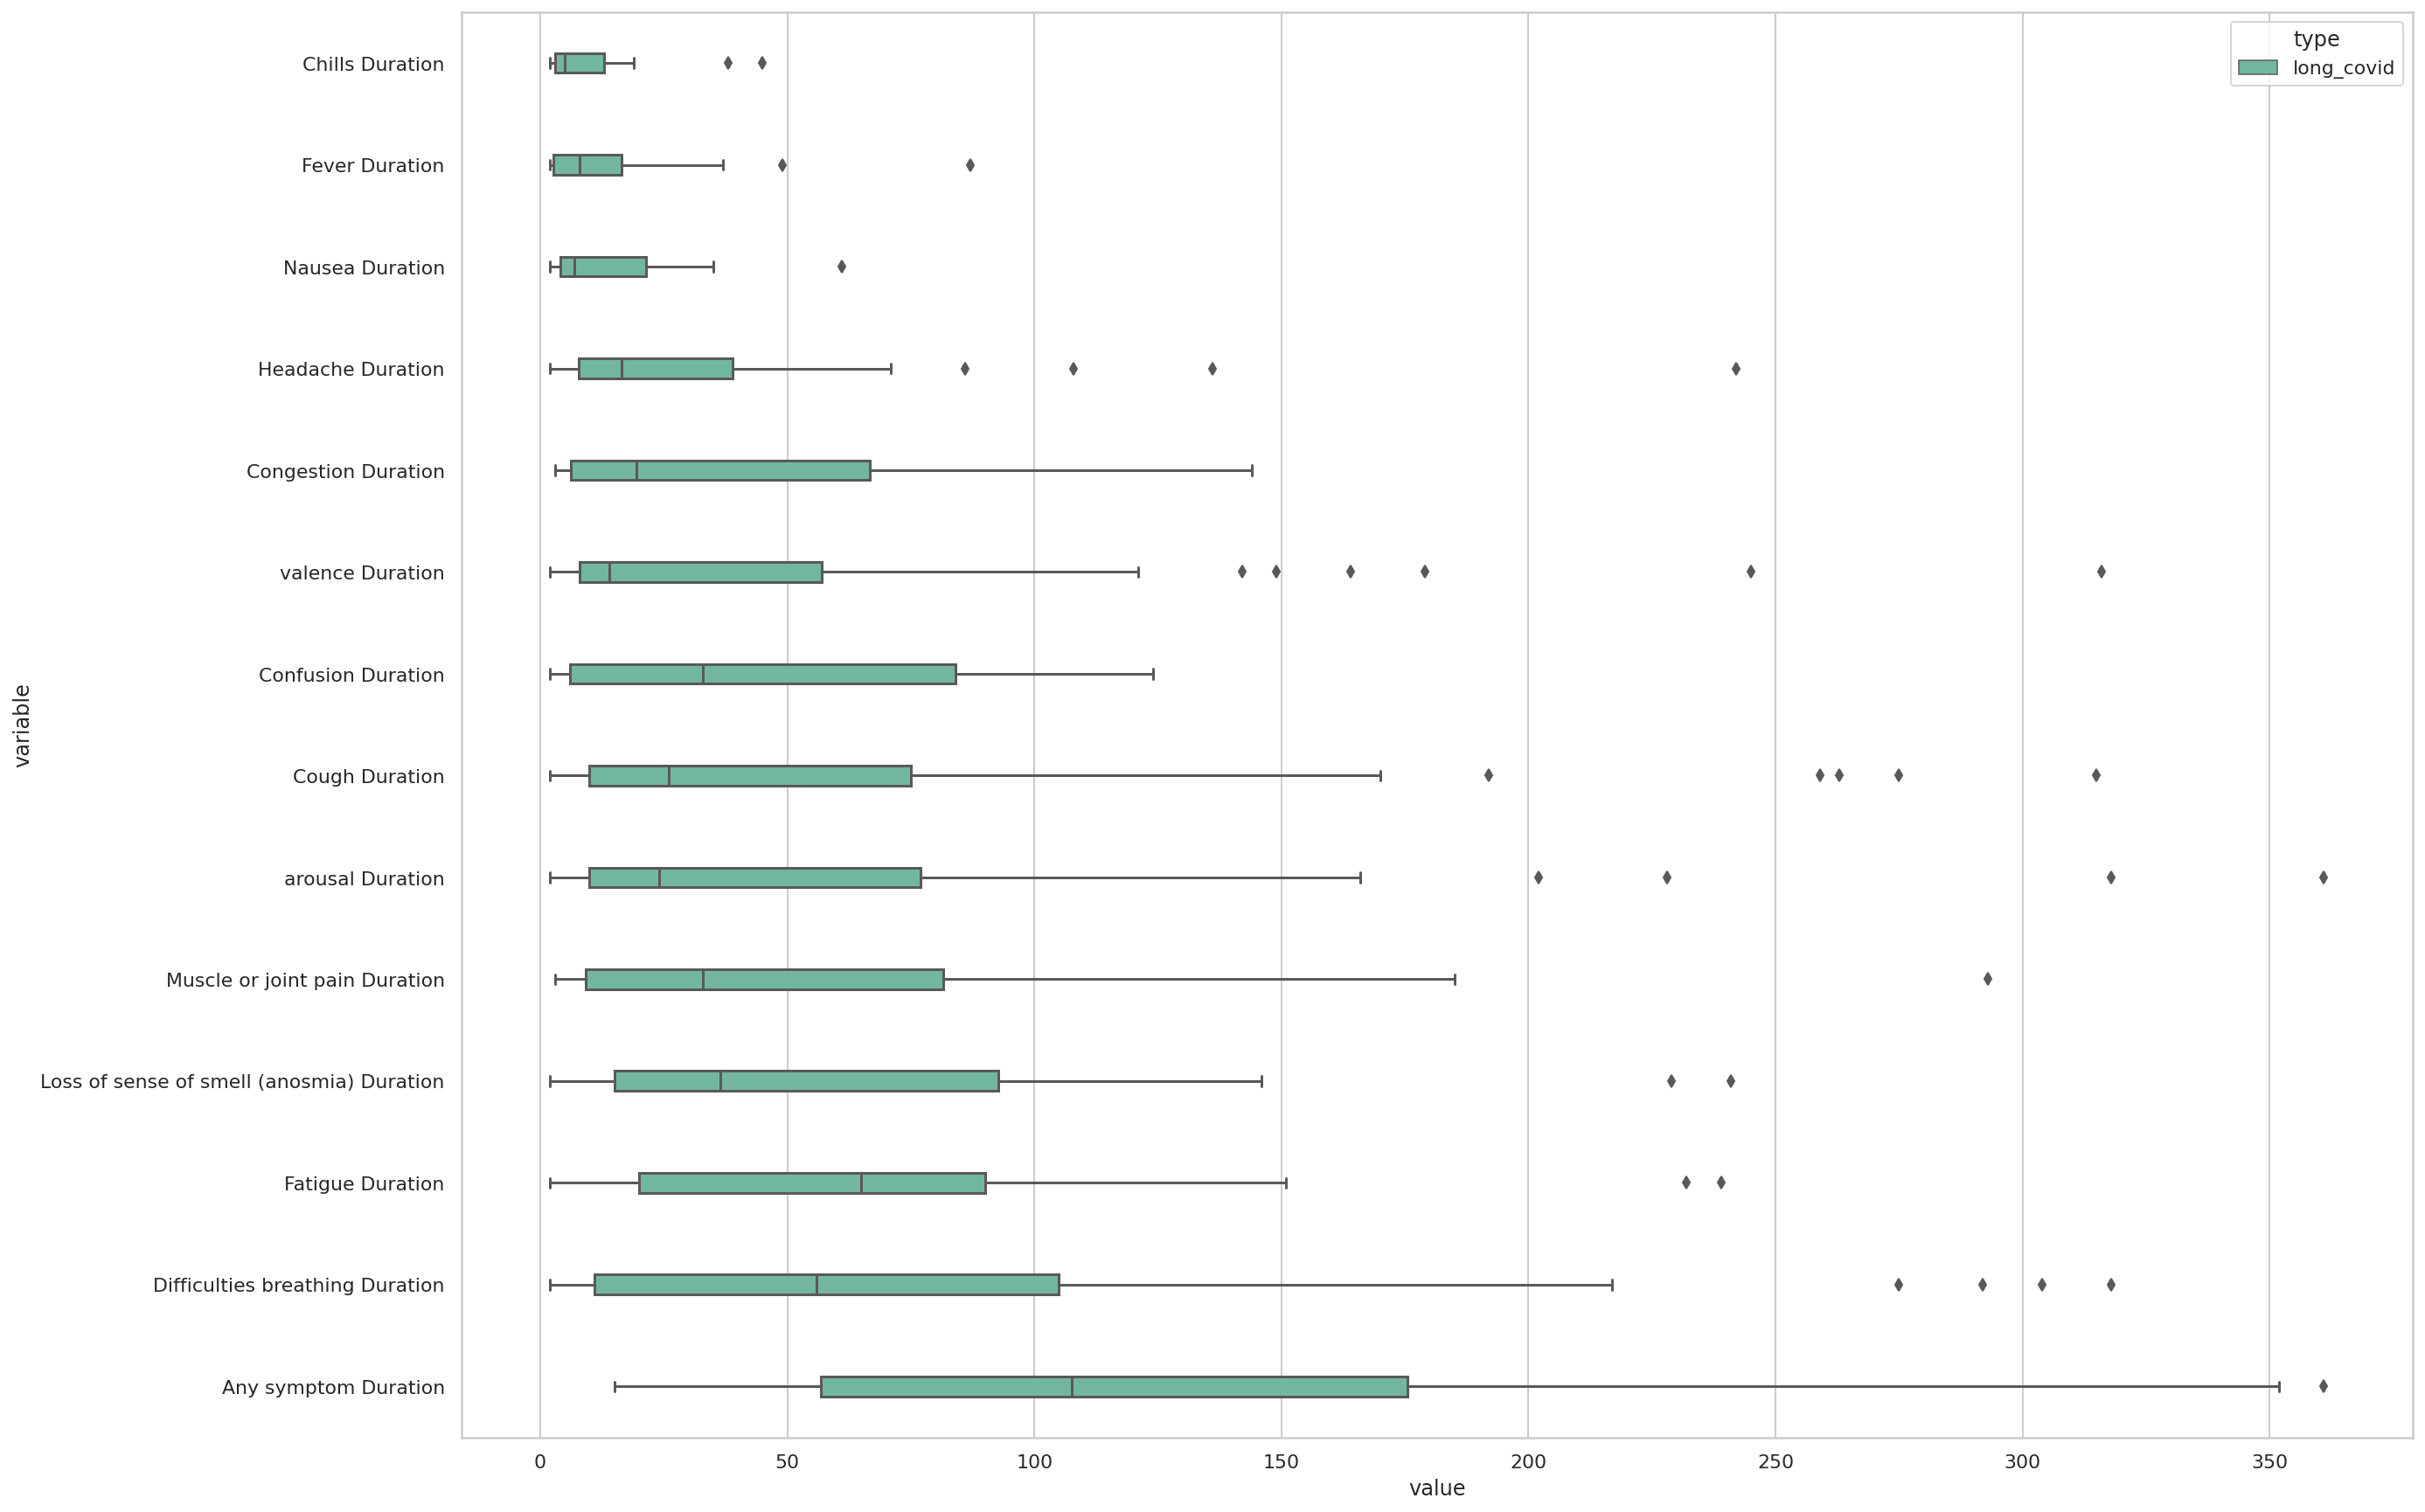

In [697]:
# using sns
import seaborn as sns

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.boxplot(ax=ax, x="value", y="variable", orient="h", hue='type', width=0.2, data=lcovid_sns_df, palette="Set2")
plt.show()

<AxesSubplot:xlabel='value', ylabel='variable'>

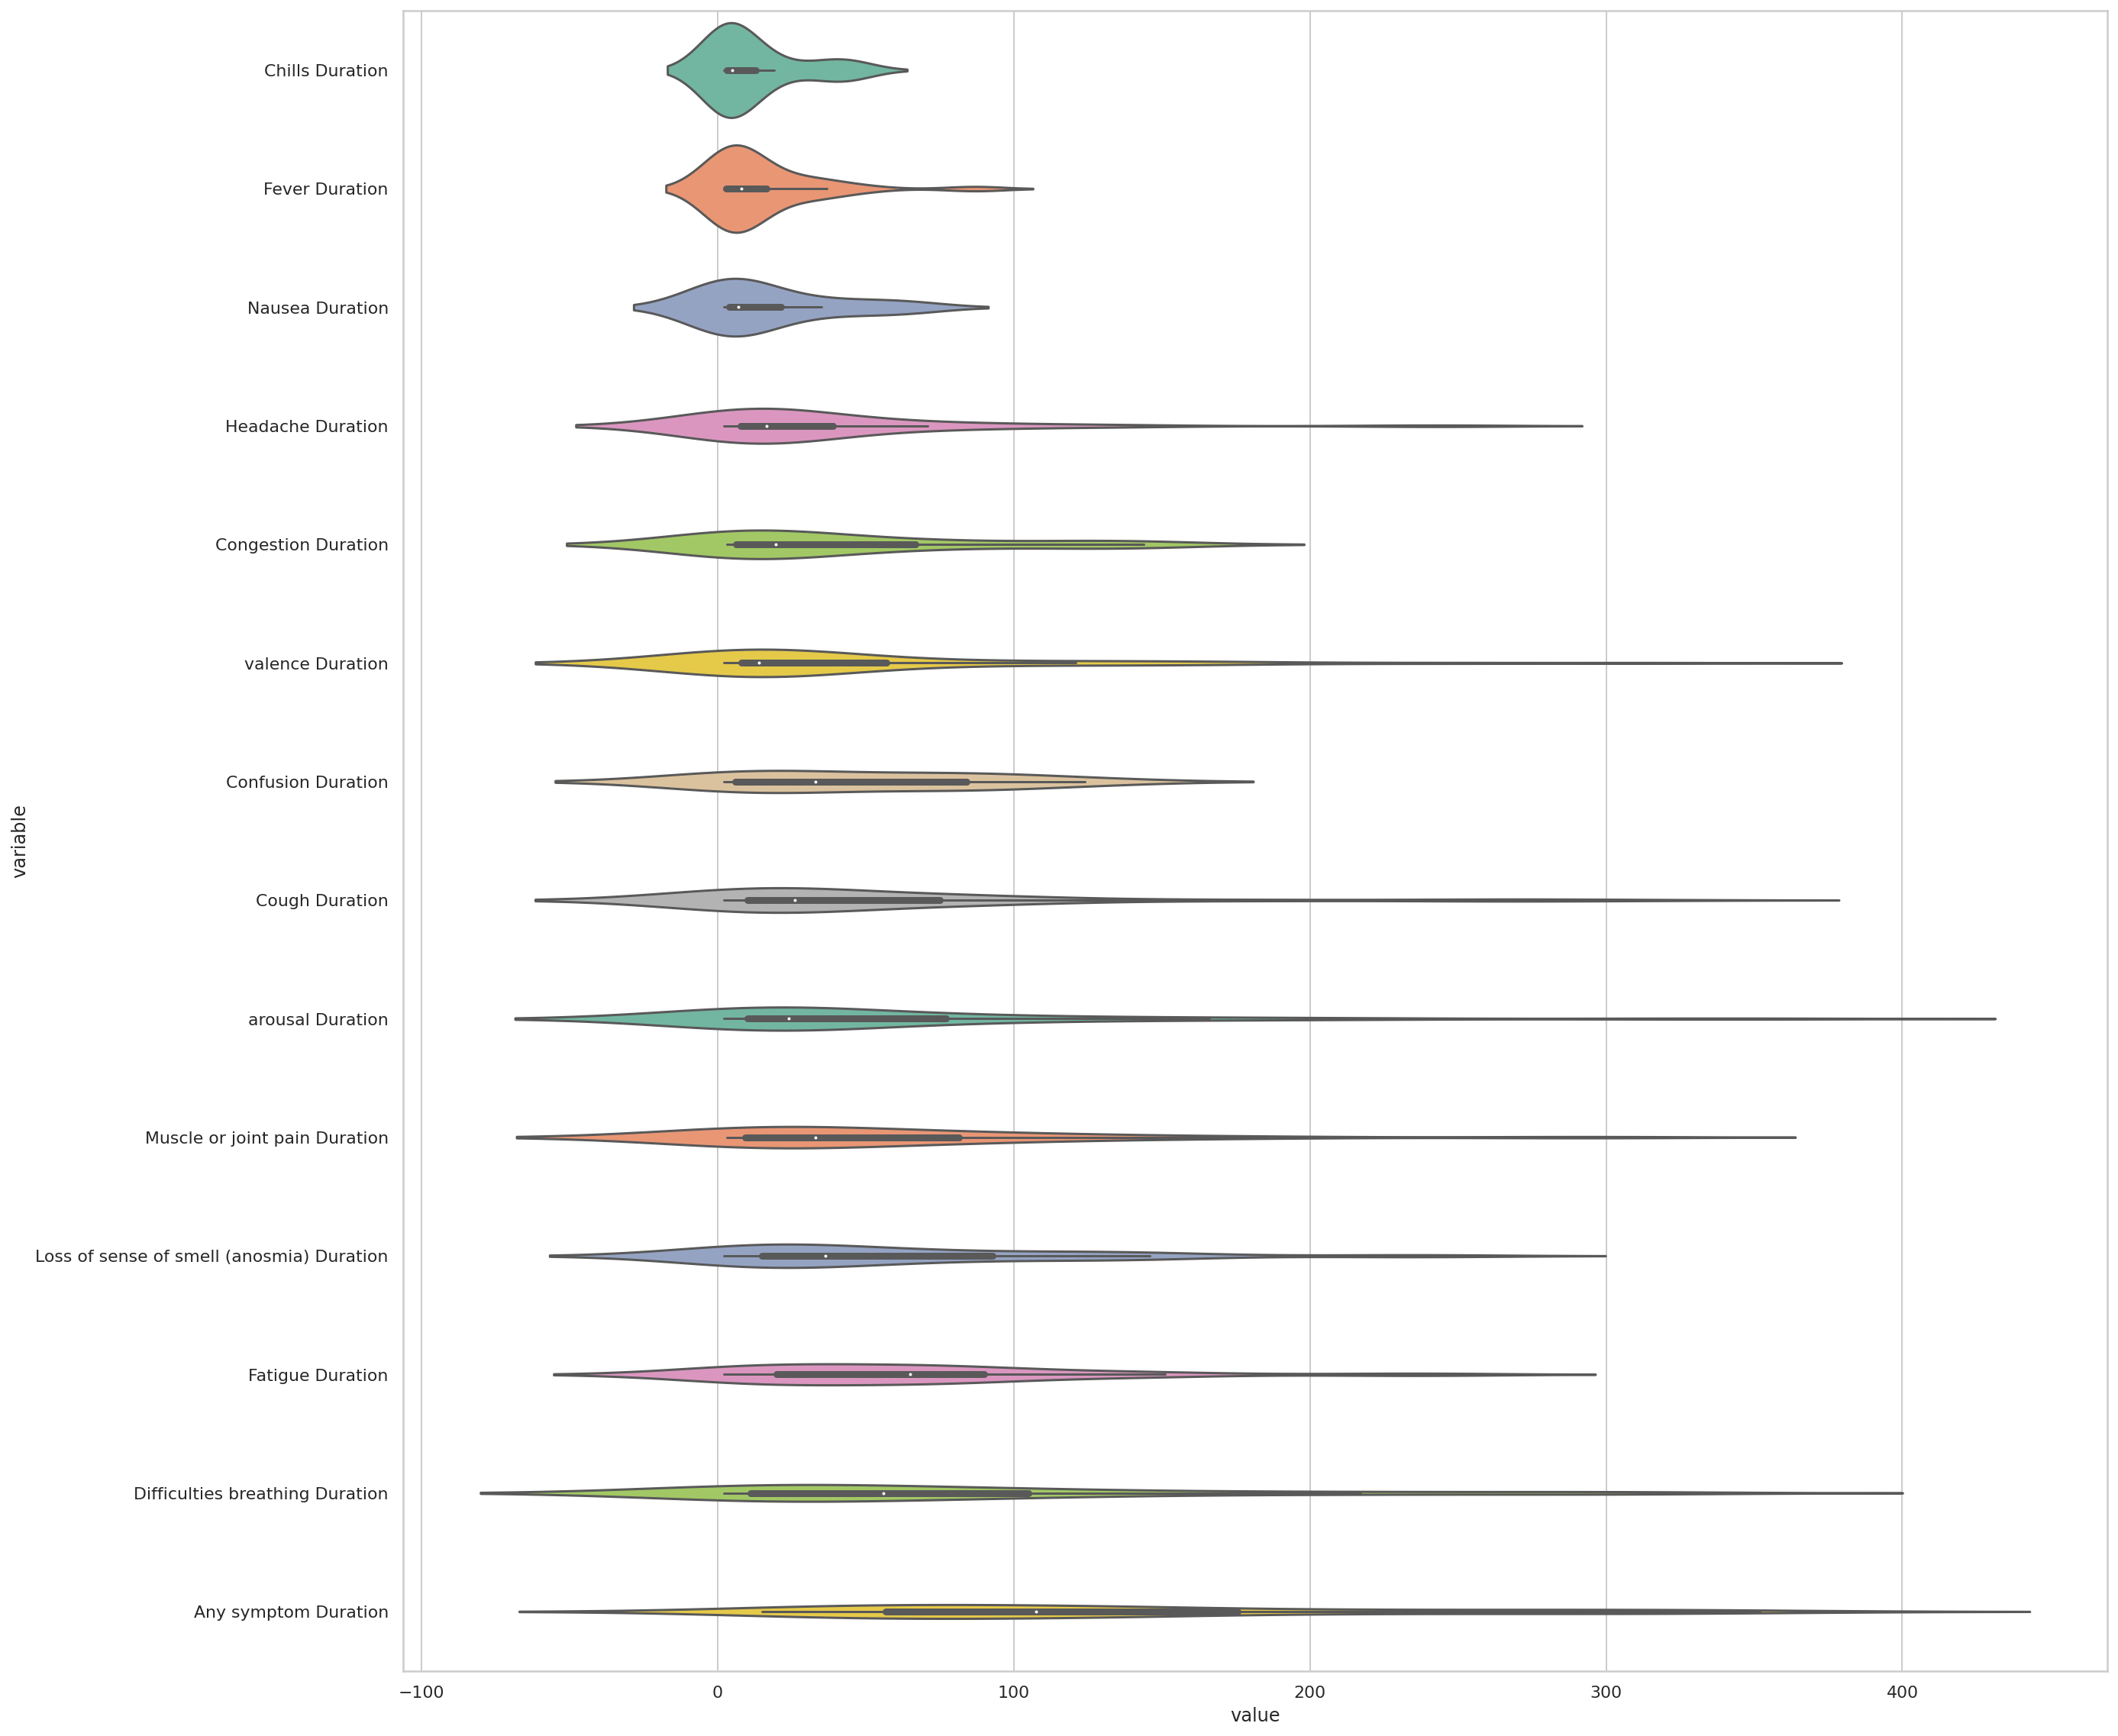

In [698]:
fig, ax = plt.subplots(figsize=(20,20))
sns.violinplot(ax=ax, x="value", y="variable", orient="h", data=lcovid_sns_df, palette="Set2")

plt.show()

#### Post acute 

In [564]:
post_acute_durations_df = symptom_durations_df[symptom_durations_df['id'].isin(post_acute_ids)]

In [565]:
post_acute_durations_df

id  valence  \
time                                                                      
2021-07-02 09:12:31.269000+00:00  03PCkZSgsRg3lgPAu37srPG1VGG3    -0.25   
2020-11-20 10:09:45.751000+00:00  03PCkZSgsRg3lgPAu37srPG1VGG3    -0.75   
2021-07-01 09:35:28.548000+00:00  03PCkZSgsRg3lgPAu37srPG1VGG3    -0.75   
2020-11-16 21:01:36.036000+00:00  03PCkZSgsRg3lgPAu37srPG1VGG3     0.25   
2021-11-19 10:00:56.623000+00:00  03PCkZSgsRg3lgPAu37srPG1VGG3    -0.50   
...                                                        ...      ...   
2021-01-08 10:06:26.569999+00:00  zfw4HoPjAkg42H0hq3waElGUoCo2    -0.75   
2021-01-25 00:37:05.466000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   
2021-01-22 10:00:53.205000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   
2021-01-21 22:56:12.777000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   
2021-01-23 13:12:17.625000+00:00  zzvksuOwiSNtBglkEr8z5nctTz53     0.00   

                                  arousal  Fever  Difficulties breathing  \
time                                                                       
2021-07-02 09:12:31.269000+00:00    -0.75    0.0                     1.0   
2020-11-20 10:09:45.751000+00:00    -0.50    0.0                     1.0   
2021-07-01 09:35:28.548000+00:00    -0.75    0.0                     1.0   
2020-11-16 21:01:36.036000+00:00    -0.75    0.0                     1.0   
2021-11-19 10:00:56.623000+00:00    -1.00    1.0                     1.0   
...                                   ...    ...                     ...   
2021-01-08 10:06:26.569999+00:00    -1.00    3.0                     1.0   
2021-01-25 00:37:05.466000+00:00     0.00    0.0                     1.0   
2021-01-22 10:00:53.205000+00:00     0.00    0.0                     2.0   
2021-01-21 22:56:12.777000+00:00     0.00    0.0                     2.0   
2021-01-23 13:12:17.625000+00:00     0.00    0.0                     1.0   

                                  Loss of sense of smell (anosmia)  Cough  \
time                                                                        
2021-07-02 09:12:31.269000+00:00                               0.0    0.0   
2020-11-20 10:09:45.751000+00:00                               0.0    1.0   
2021-07-01 09:35:28.548000+00:00                               0.0    0.0   
2020-11-16 21:01:36.036000+00:00                               0.0    1.0   
2021-11-19 10:00:56.623000+00:00                               0.0    0.0   
...                                                            ...    ...   
2021-01-08 10:06:26.569999+00:00                               2.0    2.0   
2021-01-25 00:37:05.466000+00:00                               3.0    0.0   
2021-01-22 10:00:53.205000+00:00                               0.0    1.0   
2021-01-21 22:56:12.777000+00:00                               0.0    1.0   
2021-01-23 13:12:17.625000+00:00                               3.0    0.0   

                                  Congestion  Fatigue  Muscle or joint pain  \
time                                                                          
2021-07-02 09:12:31.269000+00:00         0.0      0.0                   0.0   
2020-11-20 10:09:45.751000+00:00         0.0      0.0                   0.0   
2021-07-01 09:35:28.548000+00:00         0.0      0.0                   0.0   
2020-11-16 21:01:36.036000+00:00         0.0      0.0                   0.0   
2021-11-19 10:00:56.623000+00:00         0.0      0.0                   0.0   
...                                      ...      ...                   ...   
2021-01-08 10:06:26.569999+00:00         0.0      0.0                   0.0   
2021-01-25 00:37:05.466000+00:00         0.0      0.0                   0.0   
2021-01-22 10:00:53.205000+00:00         2.0      0.0                   3.0   
2021-01-21 22:56:12.777000+00:00         1.0      0.0                   2.0   
2021-01-23 13:12:17.625000+00:00         1.0      2.0                   0.0   

                                  ...  Brain fog  Coat hanger Pai

In [568]:
post_acute_durations_final_df = post_acute_durations_df.reset_index()

In [773]:
post_acute_agg_list = calculate_duration(post_acute_durations_final_df,time_threshold='7 days', type_covid='post_acute_covid')
post_acute_agg_df = pd.DataFrame(post_acute_agg_list)

Total added: 356K


In [1271]:
post_acute_agg_df

id              type  valence Baseline Mean  \
0    03PCkZSgsRg3lgPAu37srPG1VGG3  post_acute_covid              -0.250000   
1    05VumUnsTBgObCr6UwzpUM84urd2  post_acute_covid                    NaN   
2    06LZlNI9fhfoYMClmJ2xjeysr3T2  post_acute_covid                    NaN   
3    0Eswk2gdkrd2u3ljOydE8EmGkkO2  post_acute_covid                    NaN   
4    0GlyBokvwlVT8STbRVSvcWPY8u32  post_acute_covid                    NaN   
..                            ...               ...                    ...   
351  yygwu2SkzhbItf73vKUIuT7FR613  post_acute_covid                    NaN   
352  z2prKmRgiSQ5BRRLTIjs3VToDOB3  post_acute_covid                    NaN   
353  zSNi7h9gu3NFGBeoN8kTwIaLM0a2  post_acute_covid              -0.108974   
354  zfw4HoPjAkg42H0hq3waElGUoCo2  post_acute_covid                    NaN   
355  zzvksuOwiSNtBglkEr8z5nctTz53  post_acute_covid                    NaN   

                                  valence Top Duration  \
0    {'duration': 0 days 12:58:43.473000, 'start_ti...   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
351                                                NaN   
352                                                NaN   
353  {'duration': 32 days 00:09:16.439000, 'start_t...   
354                                                NaN   
355                                                NaN   

     valence Max Reports in top duration  arousal Baseline Mean  \
0                                    1.0              -0.625000   
1                                    NaN                    NaN   
2                                    NaN              -0.125000   
3                                    NaN                    NaN   
4                                    NaN                    NaN   
..                                   ...                    ...   
351                                  NaN                    NaN   
352                                  NaN              -0.388889   
353                                  3.0              -0.185897   
354                                  NaN              -0.750000   
355                                  NaN                    NaN   

                                  arousal Top Duration  \
0    {'duration': 3 days 23:59:40.671000, 'start_ti...   
1                                                  NaN   
2    {'duration': 0 days 00:00:00, 'start_time': 20...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
351                                                NaN   
352  {'duration': 2 days 09:16:45.243000, 'start_ti...   
353  {'duration': 40 days 11:06:39.987000, 'start_t...   
354  {'duration': 0 days 00:00:00, 'start_time': 20...   
355                                                NaN   

     arousal Max Reports in top duration  Fever Baseline Mean  \
0                                    1.0             0.000000   
1                                    NaN                  NaN   
2                                    2.0                  NaN   
3                                    NaN                  NaN   
4                                    NaN                  NaN   
..                                   ...                  ...   
351                                  NaN                  NaN   
352                                  1.0             0.666667   
353                                 11.0                  NaN   
354                                  1.0             2.500000   
355                                  NaN                  NaN   

                                    Fever Top Duration  ...  \
0    {'duration': 3 days 23:59:40.671000, 'start_ti

In [774]:
post_acute_agg_df.columns

Index(['id', 'type', 'valence Baseline Mean', 'valence Top Duration',
       'valence Max Reports in top duration', 'arousal Baseline Mean',
       'arousal Top Duration', 'arousal Max Reports in top duration',
       'Fever Baseline Mean', 'Fever Top Duration',
       'Fever Max Reports in top duration',
       'Difficulties breathing Baseline Mean',
       'Difficulties breathing Top Duration',
       'Difficulties breathing Max Reports in top duration',
       'Cough Baseline Mean', 'Cough Top Duration',
       'Cough Max Reports in top duration', 'main_symptom_score Baseline Mean',
       'main_symptom_score Top Duration',
       'main_symptom_score Max Reports in top duration',
       'lcovid_symptom_score Baseline Mean',
       'lcovid_symptom_score Top Duration',
       'lcovid_symptom_score Max Reports in top duration',
       'total_symptom_score Baseline Mean', 'total_symptom_score Top Duration',
       'total_symptom_score Max Reports in top duration',
       'Loss of sense 

In [775]:
# Create df with the duration of all symptoms
post_acute_durations_to_plot = pd.DataFrame()

for col in post_acute_agg_df.filter(regex=".*Top Duration").columns:
    new_col = col.replace('Top ', '')
    post_acute_durations_to_plot[new_col] = post_acute_agg_df[col].dropna().transform(lambda x: filter_dur(x))
    q = post_acute_durations_to_plot[new_col].quantile(q=0.99)
    # remove extreme outliers (above 90 percentile)
    post_acute_durations_to_plot[new_col] = post_acute_durations_to_plot[post_acute_durations_to_plot[new_col] < q]

In [776]:
post_acute_durations_to_plot.columns

Index(['valence Duration', 'arousal Duration', 'Fever Duration',
       'Difficulties breathing Duration', 'Cough Duration',
       'main_symptom_score Duration', 'lcovid_symptom_score Duration',
       'total_symptom_score Duration',
       'Loss of sense of smell (anosmia) Duration', 'Congestion Duration',
       'secondary_symptom_score Duration', 'Fatigue Duration',
       'Headache Duration', 'Muscle or joint pain Duration', 'Nausea Duration',
       'Chills Duration', 'Confusion Duration', 'hayfever Duration'],
      dtype='object')

In [777]:
post_acute_durations_to_plot = post_acute_durations_to_plot.drop(columns=['lcovid_symptom_score Duration', 'main_symptom_score Duration', 'secondary_symptom_score Duration']) \
    .rename(columns={'total_symptom_score Duration': 'Any symptom Duration'}) 

In [778]:
index_sort = post_acute_durations_to_plot.mean().sort_values().index
index_sort

Index(['Fatigue Duration', 'Congestion Duration', 'Headache Duration',
       'Muscle or joint pain Duration', 'Fever Duration', 'Nausea Duration',
       'Difficulties breathing Duration', 'Chills Duration',
       'Confusion Duration', 'arousal Duration', 'Cough Duration',
       'valence Duration', 'Any symptom Duration',
       'Loss of sense of smell (anosmia) Duration', 'hayfever Duration'],
      dtype='object')

<AxesSubplot:>

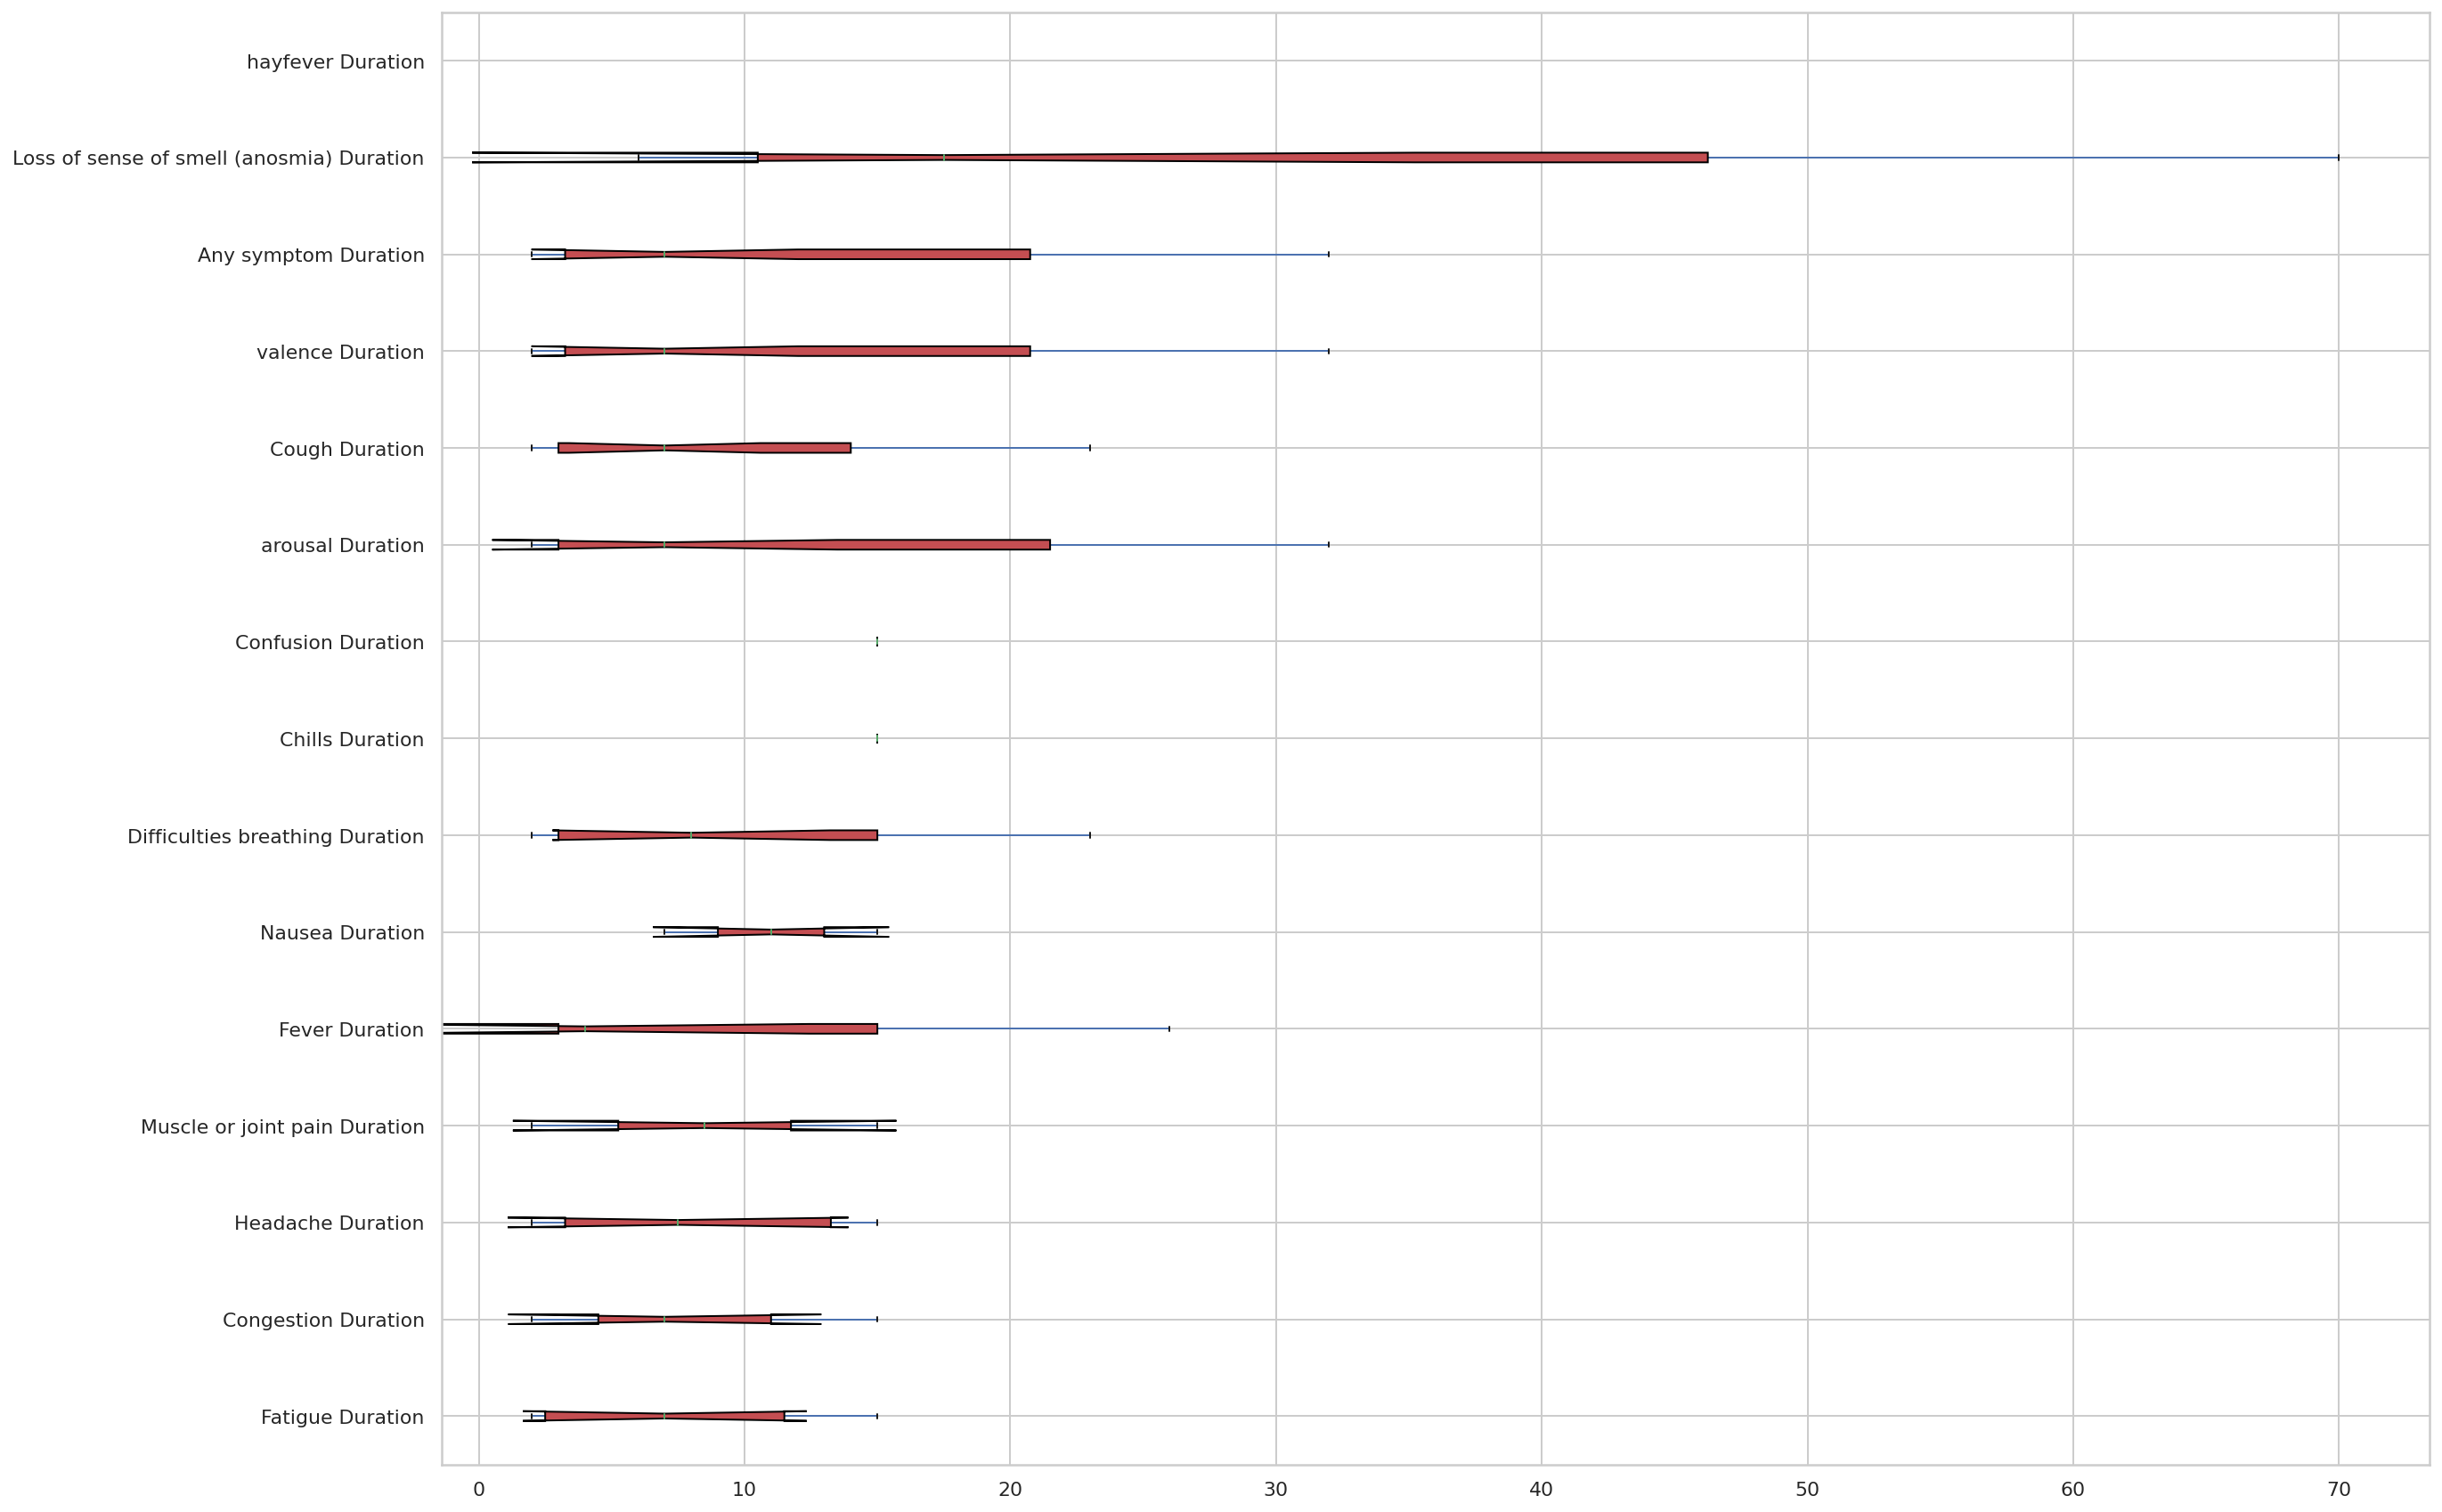

In [779]:
post_acute_durations_to_plot[index_sort].plot.box(sym='', vert=False, notch=True, widths=0.1, patch_artist=True, figsize=(20, 15), by='type', boxprops=dict(facecolor='r'))

In [780]:
post_acute_sns_df = pd.melt(post_acute_durations_to_plot[index_sort])

In [781]:
post_acute_sns_df['type'] = 'post_acute_covid'

In [782]:
post_acute_sns_df = post_acute_sns_df.dropna()
post_acute_sns_df['value']= pd.to_numeric(post_acute_sns_df['value'])

In [ ]:
# using sns
import seaborn as sns
sns.set_theme(style="whitegrid")

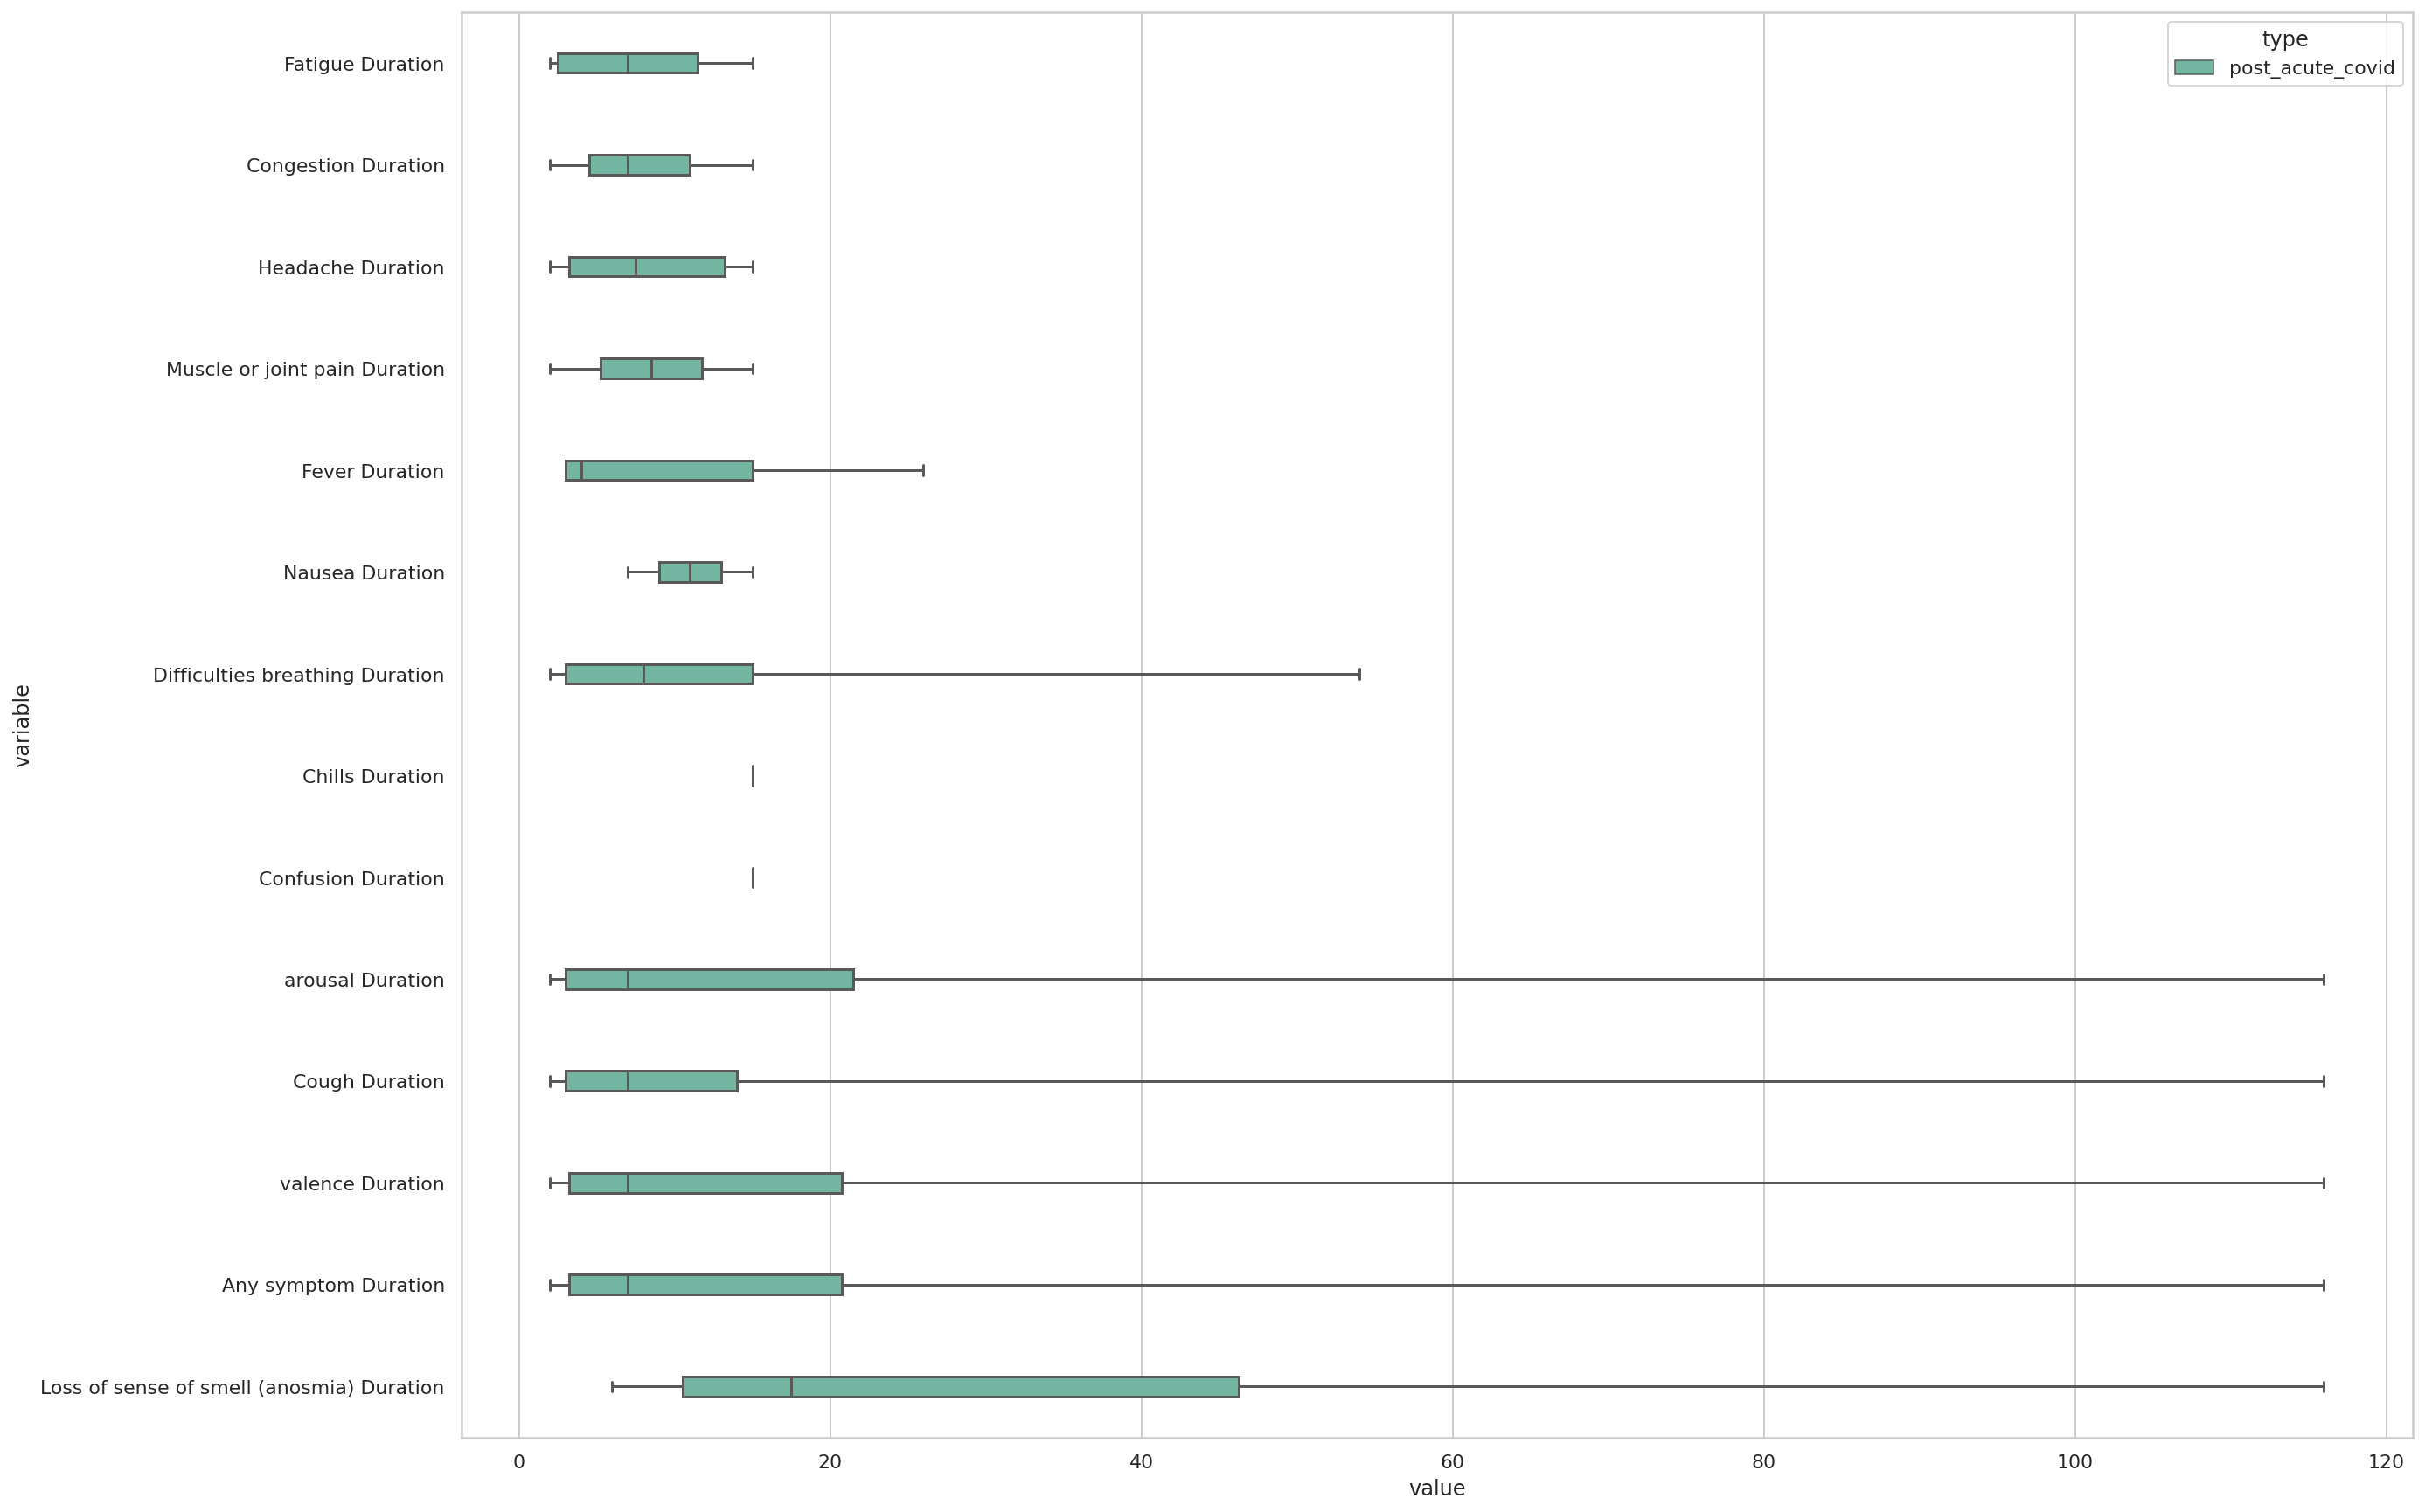

In [791]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.boxplot(ax=ax, x="value", y="variable", orient="h", hue='type', width=0.2, data=post_acute_sns_df, whis=(0,100), palette="Set2")
plt.show()

In [784]:
post_acute_sns_df[post_acute_sns_df['variable'] == 'Chills Duration']

variable  value              type
843  Chills Duration   15.0  post_acute_covid

<AxesSubplot:xlabel='value', ylabel='variable'>

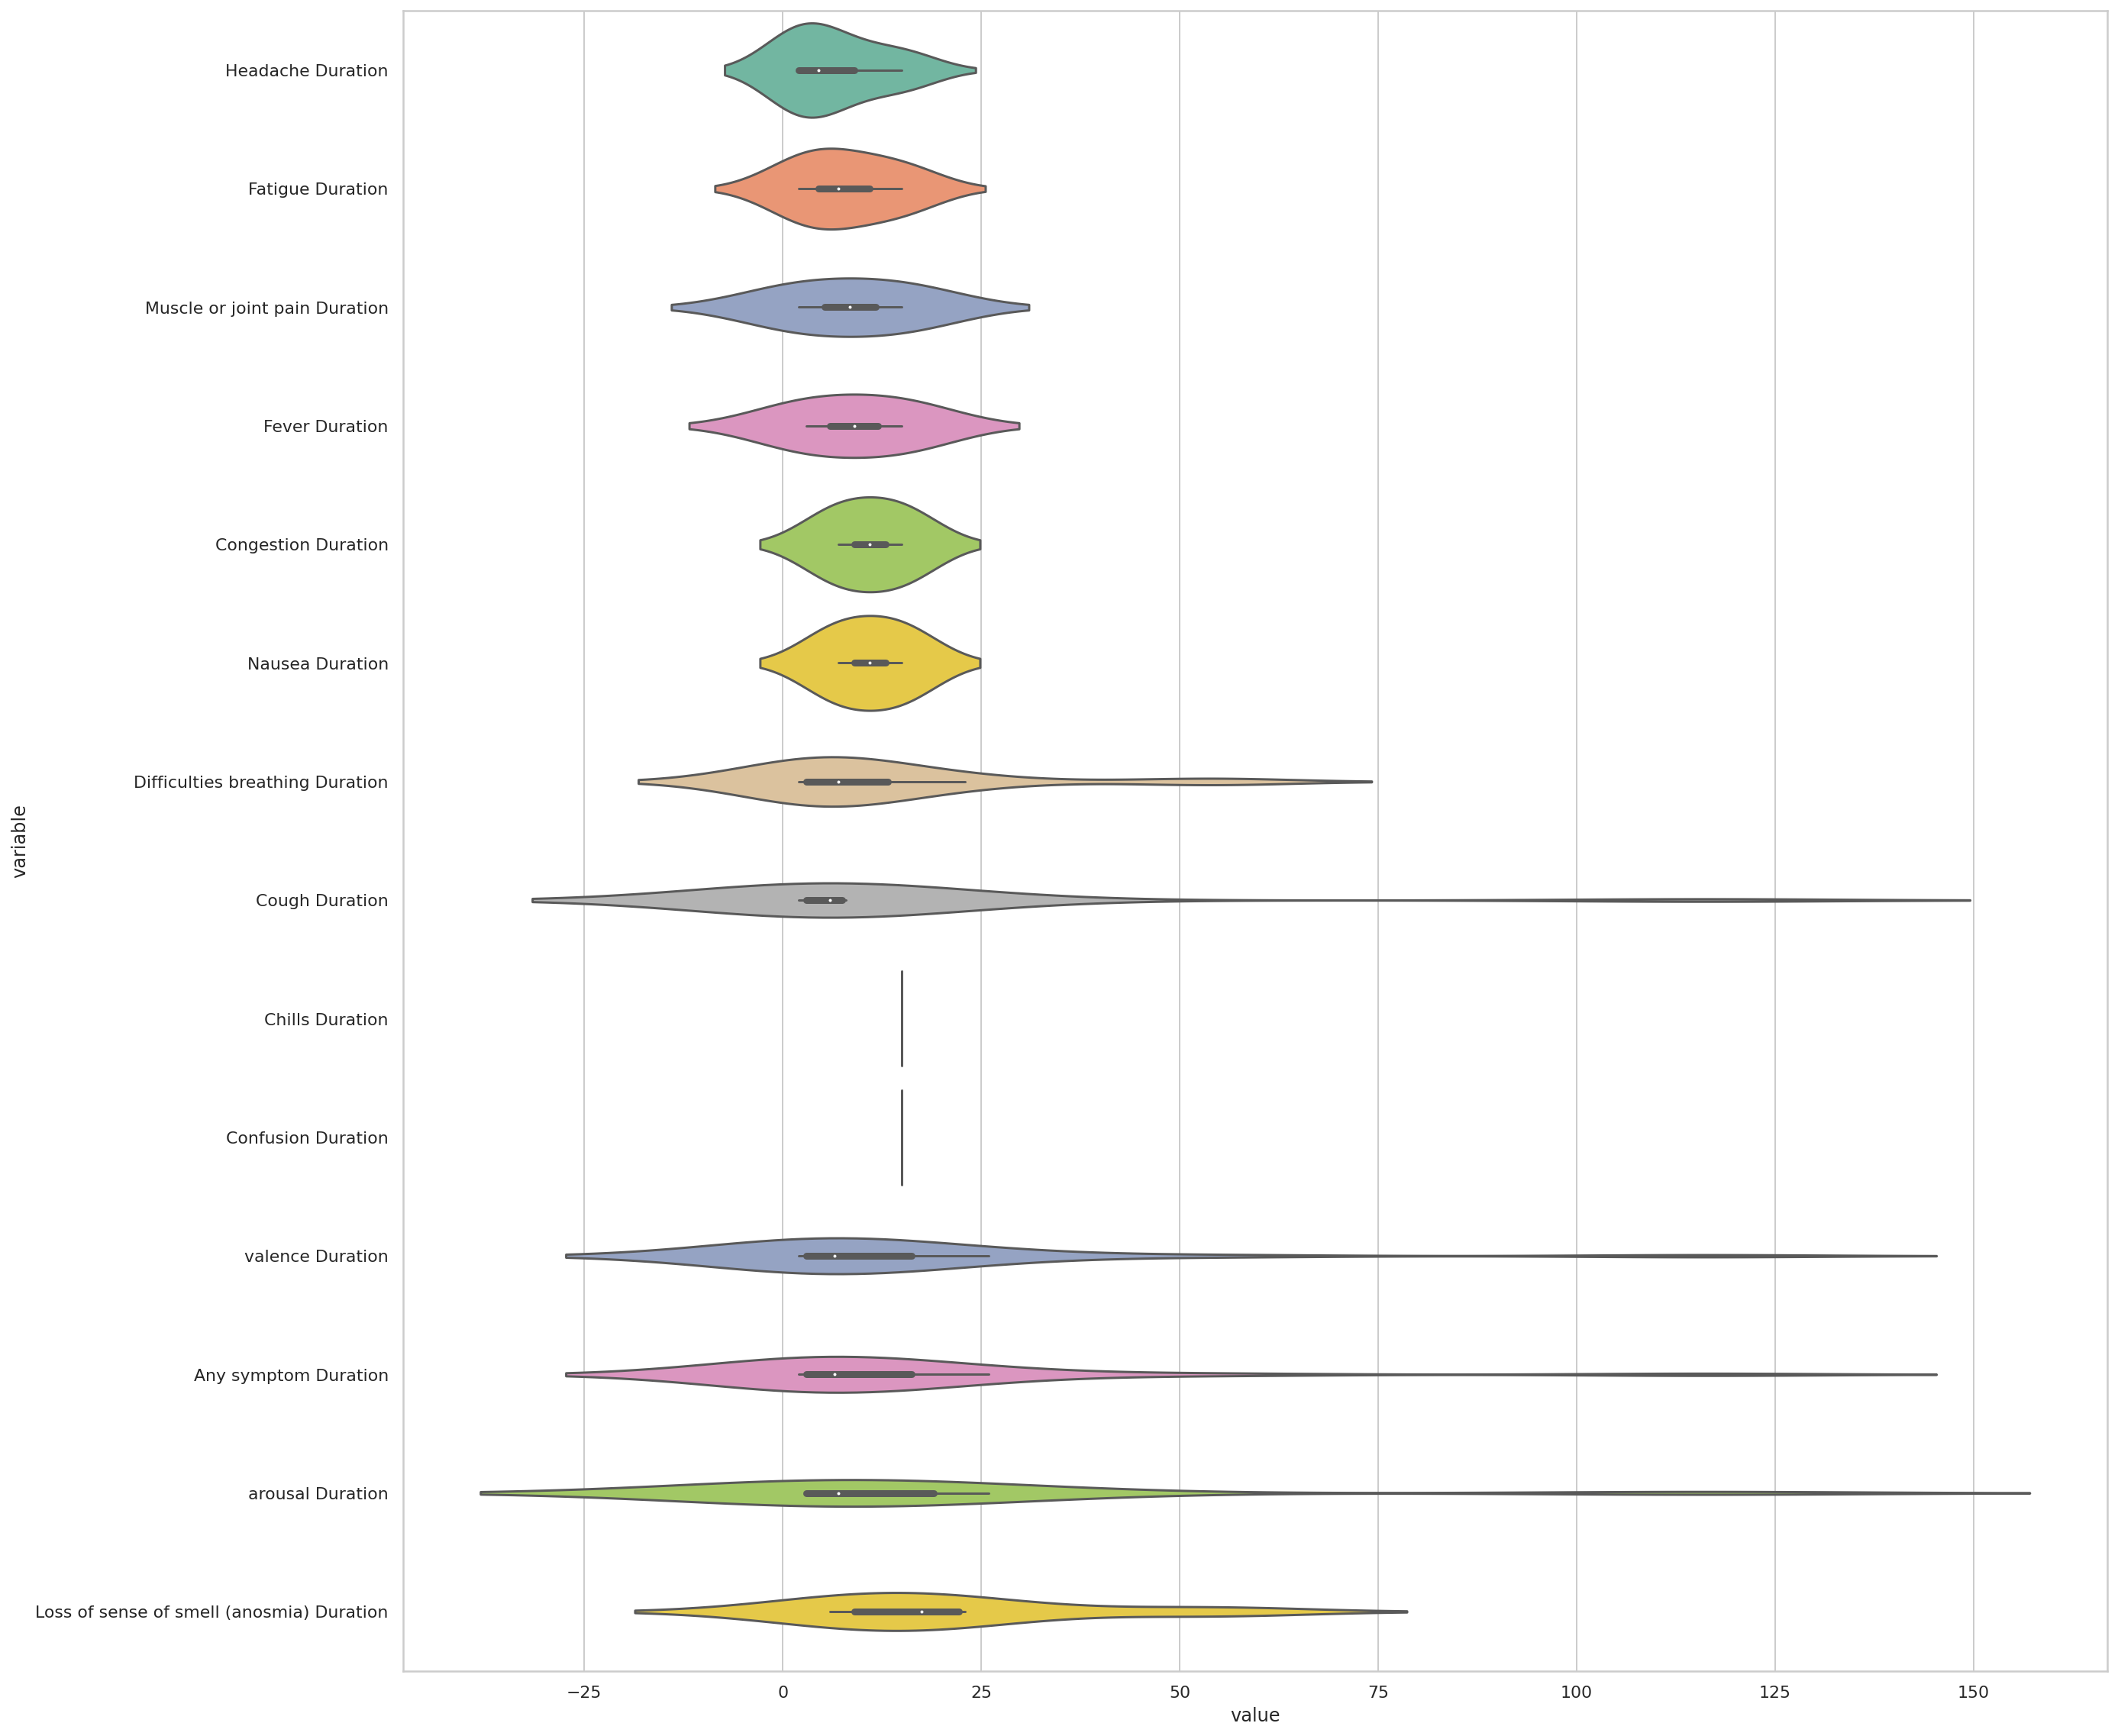

In [652]:
fig, ax = plt.subplots(figsize=(20,20))

sns.violinplot(ax=ax, x="value", y="variable", orient="h", data=post_acute_sns_df, palette="Set2")

plt.show()

#### Short covid

In [653]:
short_covid_durations_df = symptom_durations_df[symptom_durations_df['id'].isin(short_covid_ids)]

In [654]:
short_covid_durations_df

id  valence  \
time                                                                      
2021-07-16 08:59:36.848000+00:00  00a9SPtBFkYF8KmWTvPPU0y69Xo1    -0.50   
2021-07-16 08:50:42.455000+00:00  00a9SPtBFkYF8KmWTvPPU0y69Xo1    -0.75   
2021-06-29 08:48:24.291000+00:00  00a9SPtBFkYF8KmWTvPPU0y69Xo1    -0.50   
2021-08-28 14:47:38.855000+00:00  01dWPpgq7Nenmdej73ONXdNDjaH2     0.00   
2021-01-06 06:47:54.367000+00:00  0QJ0Gi285wbL6AEHgMmhcC0TTOw2     0.75   
...                                                        ...      ...   
2021-09-08 19:37:52.662000+00:00  z9sZNwRTzdYxVdmy9w9CihGZX2X2     0.00   
2021-06-29 11:29:25.828000+00:00  z9sZNwRTzdYxVdmy9w9CihGZX2X2     0.00   
2022-01-02 18:49:01.616000+00:00  zQtBM94XNtdNhJxgOTYc3eiXW8U2    -0.50   
2020-12-13 21:16:16.917000+00:00  zRXXUmU2I9hbNMi1Ry2tg2CACax1    -0.25   
2020-12-15 10:02:51.188999+00:00  zRXXUmU2I9hbNMi1Ry2tg2CACax1     0.00   

                                  arousal  Fever  Difficulties breathing  \
time                                                                       
2021-07-16 08:59:36.848000+00:00    -0.50    0.0                     0.0   
2021-07-16 08:50:42.455000+00:00    -0.75    0.0                     0.0   
2021-06-29 08:48:24.291000+00:00    -0.50    0.0                     0.0   
2021-08-28 14:47:38.855000+00:00     0.00    0.0                     0.0   
2021-01-06 06:47:54.367000+00:00     0.75    0.0                     0.0   
...                                   ...    ...                     ...   
2021-09-08 19:37:52.662000+00:00    -0.75    1.0                     0.0   
2021-06-29 11:29:25.828000+00:00    -0.50    0.0                     0.0   
2022-01-02 18:49:01.616000+00:00    -0.50    0.0                     0.0   
2020-12-13 21:16:16.917000+00:00     0.00    0.0                     1.0   
2020-12-15 10:02:51.188999+00:00     0.25    1.0                     1.0   

                                  Loss of sense of smell (anosmia)  Cough  \
time                                                                        
2021-07-16 08:59:36.848000+00:00                               0.0    0.0   
2021-07-16 08:50:42.455000+00:00                               0.0    0.0   
2021-06-29 08:48:24.291000+00:00                               0.0    2.0   
2021-08-28 14:47:38.855000+00:00                               0.0    1.0   
2021-01-06 06:47:54.367000+00:00                               0.0    1.0   
...                                                            ...    ...   
2021-09-08 19:37:52.662000+00:00                               3.0    1.0   
2021-06-29 11:29:25.828000+00:00                               0.0    1.0   
2022-01-02 18:49:01.616000+00:00                               0.0    0.0   
2020-12-13 21:16:16.917000+00:00                               0.0    1.0   
2020-12-15 10:02:51.188999+00:00                               1.0    0.0   

                                  Congestion  Fatigue  Muscle or joint pain  \
time                                                                          
2021-07-16 08:59:36.848000+00:00         0.0      0.0                   0.0   
2021-07-16 08:50:42.455000+00:00         0.0      0.0                   0.0   
2021-06-29 08:48:24.291000+00:00         3.0      2.0                   1.0   
2021-08-28 14:47:38.855000+00:00         0.0      0.0                   0.0   
2021-01-06 06:47:54.367000+00:00         0.0      0.0                   0.0   
...                                      ...      ...                   ...   
2021-09-08 19:37:52.662000+00:00         0.0      0.0                   0.0   
2021-06-29 11:29:25.828000+00:00         0.0      0.0                   0.0   
2022-01-02 18:49:01.616000+00:00         0.0      0.0                   0.0   
2020-12-13 21:16:16.917000+00:00         1.0      1.0                   2.0   
2020-12-15 10:02:51.188999+00:00         0.0      0.0                   0.0   

                                  ...  Brain fog  Coat hanger Pai

In [655]:
short_covid_durations_final_df = short_covid_durations_df.reset_index()

In [718]:
short_covid_agg_list = calculate_duration(short_covid_durations_final_df,time_threshold='10 days', type_covid='short_covid')
short_covid_agg_df = pd.DataFrame(short_covid_agg_list)

Total added: 537K


In [719]:
short_covid_agg_df.columns

Index(['id', 'type', 'lcovid_symptom_score Baseline Mean',
       'lcovid_symptom_score Top Duration',
       'lcovid_symptom_score Max Reports in top duration',
       'total_symptom_score Baseline Mean', 'total_symptom_score Top Duration',
       'total_symptom_score Max Reports in top duration',
       'valence Baseline Mean', 'valence Top Duration',
       'valence Max Reports in top duration',
       'Loss of sense of smell (anosmia) Baseline Mean',
       'Loss of sense of smell (anosmia) Top Duration',
       'Loss of sense of smell (anosmia) Max Reports in top duration',
       'main_symptom_score Baseline Mean', 'main_symptom_score Top Duration',
       'main_symptom_score Max Reports in top duration', 'Fever Baseline Mean',
       'Fever Top Duration', 'Fever Max Reports in top duration',
       'Difficulties breathing Baseline Mean',
       'Difficulties breathing Top Duration',
       'Difficulties breathing Max Reports in top duration',
       'Cough Baseline Mean', 'Cough

In [720]:
short_covid_agg_df

id         type  \
0    00a9SPtBFkYF8KmWTvPPU0y69Xo1  short_covid   
1    01dWPpgq7Nenmdej73ONXdNDjaH2  short_covid   
2    0QJ0Gi285wbL6AEHgMmhcC0TTOw2  short_covid   
3    0QQYPfuYJWSx5sh7xgZHzJDk14L2  short_covid   
4    0hJ3WiwD2SUE4ADoOf61P4Gg7ER2  short_covid   
..                            ...          ...   
532  yl8TAAVRgZNH0tmFfvD4bMGvwpR2  short_covid   
533  yqEXklYclXgugITaHQghQGx2rFv1  short_covid   
534  z9sZNwRTzdYxVdmy9w9CihGZX2X2  short_covid   
535  zQtBM94XNtdNhJxgOTYc3eiXW8U2  short_covid   
536  zRXXUmU2I9hbNMi1Ry2tg2CACax1  short_covid   

     lcovid_symptom_score Baseline Mean  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   
..                                  ...   
532                                 NaN   
533                                 NaN   
534                                 1.0   
535                                 NaN   
536                                 NaN   

                     lcovid_symptom_score Top Duration  \
0    {'duration': 0 days 00:00:00, 'start_time': 20...   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
532                                                NaN   
533                                                NaN   
534  {'duration': 1 days 15:23:00.615000, 'start_ti...   
535                                                NaN   
536                                                NaN   

     lcovid_symptom_score Max Reports in top duration  \
0                                                 1.0   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
..                                                ...   
532                                               NaN   
533                                               NaN   
534                                               1.0   
535                                               NaN   
536                                               NaN   

     total_symptom_score Baseline Mean  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                             2.000000   
..                                 ...   
532                                NaN   
533                           1.000000   
534                           1.333333   
535                                NaN   
536                                NaN   

                      total_symptom_score Top Duration  \
0    {'duration': 0 days 00:08:54.393000, 'start_ti...   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4    {'duration': 0 days 00:00:00, 'start_time': 20...   
..                                                 ...   
532                                                NaN   
533  {'duration': 2 days 23:41:50.812000, 'start_ti...   
534  {'duration': 1 days 15:23:00.615000, 'start_ti...   
535                                                NaN   
536  {'duration': 1 days 12:46:34.271999, 'start_ti...   

     total_symptom_score Max Reports in top duration  valence Baseline Mean  \
0                                                1.0                    NaN   
1                                                NaN                    NaN   
2                                                NaN                    NaN   
3            

In [721]:
# Create df with the duration of all symptoms
short_covid_durations_to_plot = pd.DataFrame()

for col in short_covid_agg_df.filter(regex=".*Top Duration").columns:
    new_col = col.replace('Top ', '')
    short_covid_durations_to_plot[new_col] = short_covid_agg_df[col].dropna().transform(lambda x: filter_dur(x))
    q = short_covid_durations_to_plot[new_col].quantile(q=0.99)
    # remove extreme outliers (above 90 percentile)
    short_covid_durations_to_plot[new_col] = short_covid_durations_to_plot[short_covid_durations_to_plot[new_col] < q]

In [722]:
short_covid_durations_to_plot.columns

Index(['lcovid_symptom_score Duration', 'total_symptom_score Duration',
       'valence Duration', 'Loss of sense of smell (anosmia) Duration',
       'main_symptom_score Duration', 'Fever Duration',
       'Difficulties breathing Duration', 'Cough Duration', 'arousal Duration',
       'Fatigue Duration', 'secondary_symptom_score Duration',
       'Muscle or joint pain Duration', 'Congestion Duration',
       'Headache Duration', 'Nausea Duration', 'Chills Duration',
       'Confusion Duration'],
      dtype='object')

In [723]:
short_covid_durations_to_plot = short_covid_durations_to_plot.drop(columns=['lcovid_symptom_score Duration', 'main_symptom_score Duration', 'secondary_symptom_score Duration']) \
    .rename(columns={'total_symptom_score Duration': 'Any symptom Duration'}) 

In [724]:
index_sort = short_covid_durations_to_plot.mean().sort_values().index
index_sort

Index(['Loss of sense of smell (anosmia) Duration',
       'Difficulties breathing Duration', 'Any symptom Duration',
       'Cough Duration', 'valence Duration', 'arousal Duration',
       'Fever Duration', 'Fatigue Duration', 'Muscle or joint pain Duration',
       'Congestion Duration', 'Headache Duration', 'Nausea Duration',
       'Chills Duration', 'Confusion Duration'],
      dtype='object')

In [725]:
short_covid_sns_df = pd.melt(short_covid_durations_to_plot[index_sort])

In [726]:
short_covid_sns_df['type'] = 'short_covid'

In [727]:
short_covid_sns_df = short_covid_sns_df.dropna()
short_covid_sns_df['value']= pd.to_numeric(short_covid_sns_df['value']).dropna()

In [728]:
short_covid_sns_df

variable  value         type
21   Loss of sense of smell (anosmia) Duration    4.0  short_covid
23   Loss of sense of smell (anosmia) Duration    6.0  short_covid
32   Loss of sense of smell (anosmia) Duration    3.0  short_covid
41   Loss of sense of smell (anosmia) Duration    3.0  short_covid
54             Difficulties breathing Duration    6.0  short_covid
72             Difficulties breathing Duration    2.0  short_covid
78             Difficulties breathing Duration    3.0  short_covid
83             Difficulties breathing Duration    5.0  short_covid
96                        Any symptom Duration    4.0  short_covid
98                        Any symptom Duration    4.0  short_covid
100                       Any symptom Duration    6.0  short_covid
102                       Any symptom Duration    4.0  short_covid
113                       Any symptom Duration    4.0  short_covid
115                       Any symptom Duration    6.0  short_covid
118                       Any symptom Duration    2.0  short_covid
120                       Any symptom Duration    3.0  short_covid
121                       Any symptom Duration    6.0  short_covid
124                       Any symptom Duration    3.0  short_covid
129                       Any symptom Duration    5.0  short_covid
133                       Any symptom Duration    3.0  short_covid
146                             Cough Duration    6.0  short_covid
159                             Cough Duration    4.0  short_covid
161                             Cough Duration    6.0  short_covid
164                             Cough Duration    2.0  short_covid
166                             Cough Duration    3.0  short_covid
167                             Cough Duration    6.0  short_covid
170                             Cough Duration    3.0  short_covid
175                             Cough Duration    5.0  short_covid
179                             Cough Duration    3.0  short_covid
190                           valence Duration    4.0  short_covid
192                           valence Duration    6.0  short_covid
205                           valence Duration    4.0  short_covid
207                           valence Duration    6.0  short_covid
238                           arousal Duration    6.0  short_covid
251                           arousal Duration    4.0  short_covid

In [ ]:
# using sns
import seaborn as sns
sns.set_theme(style="whitegrid")

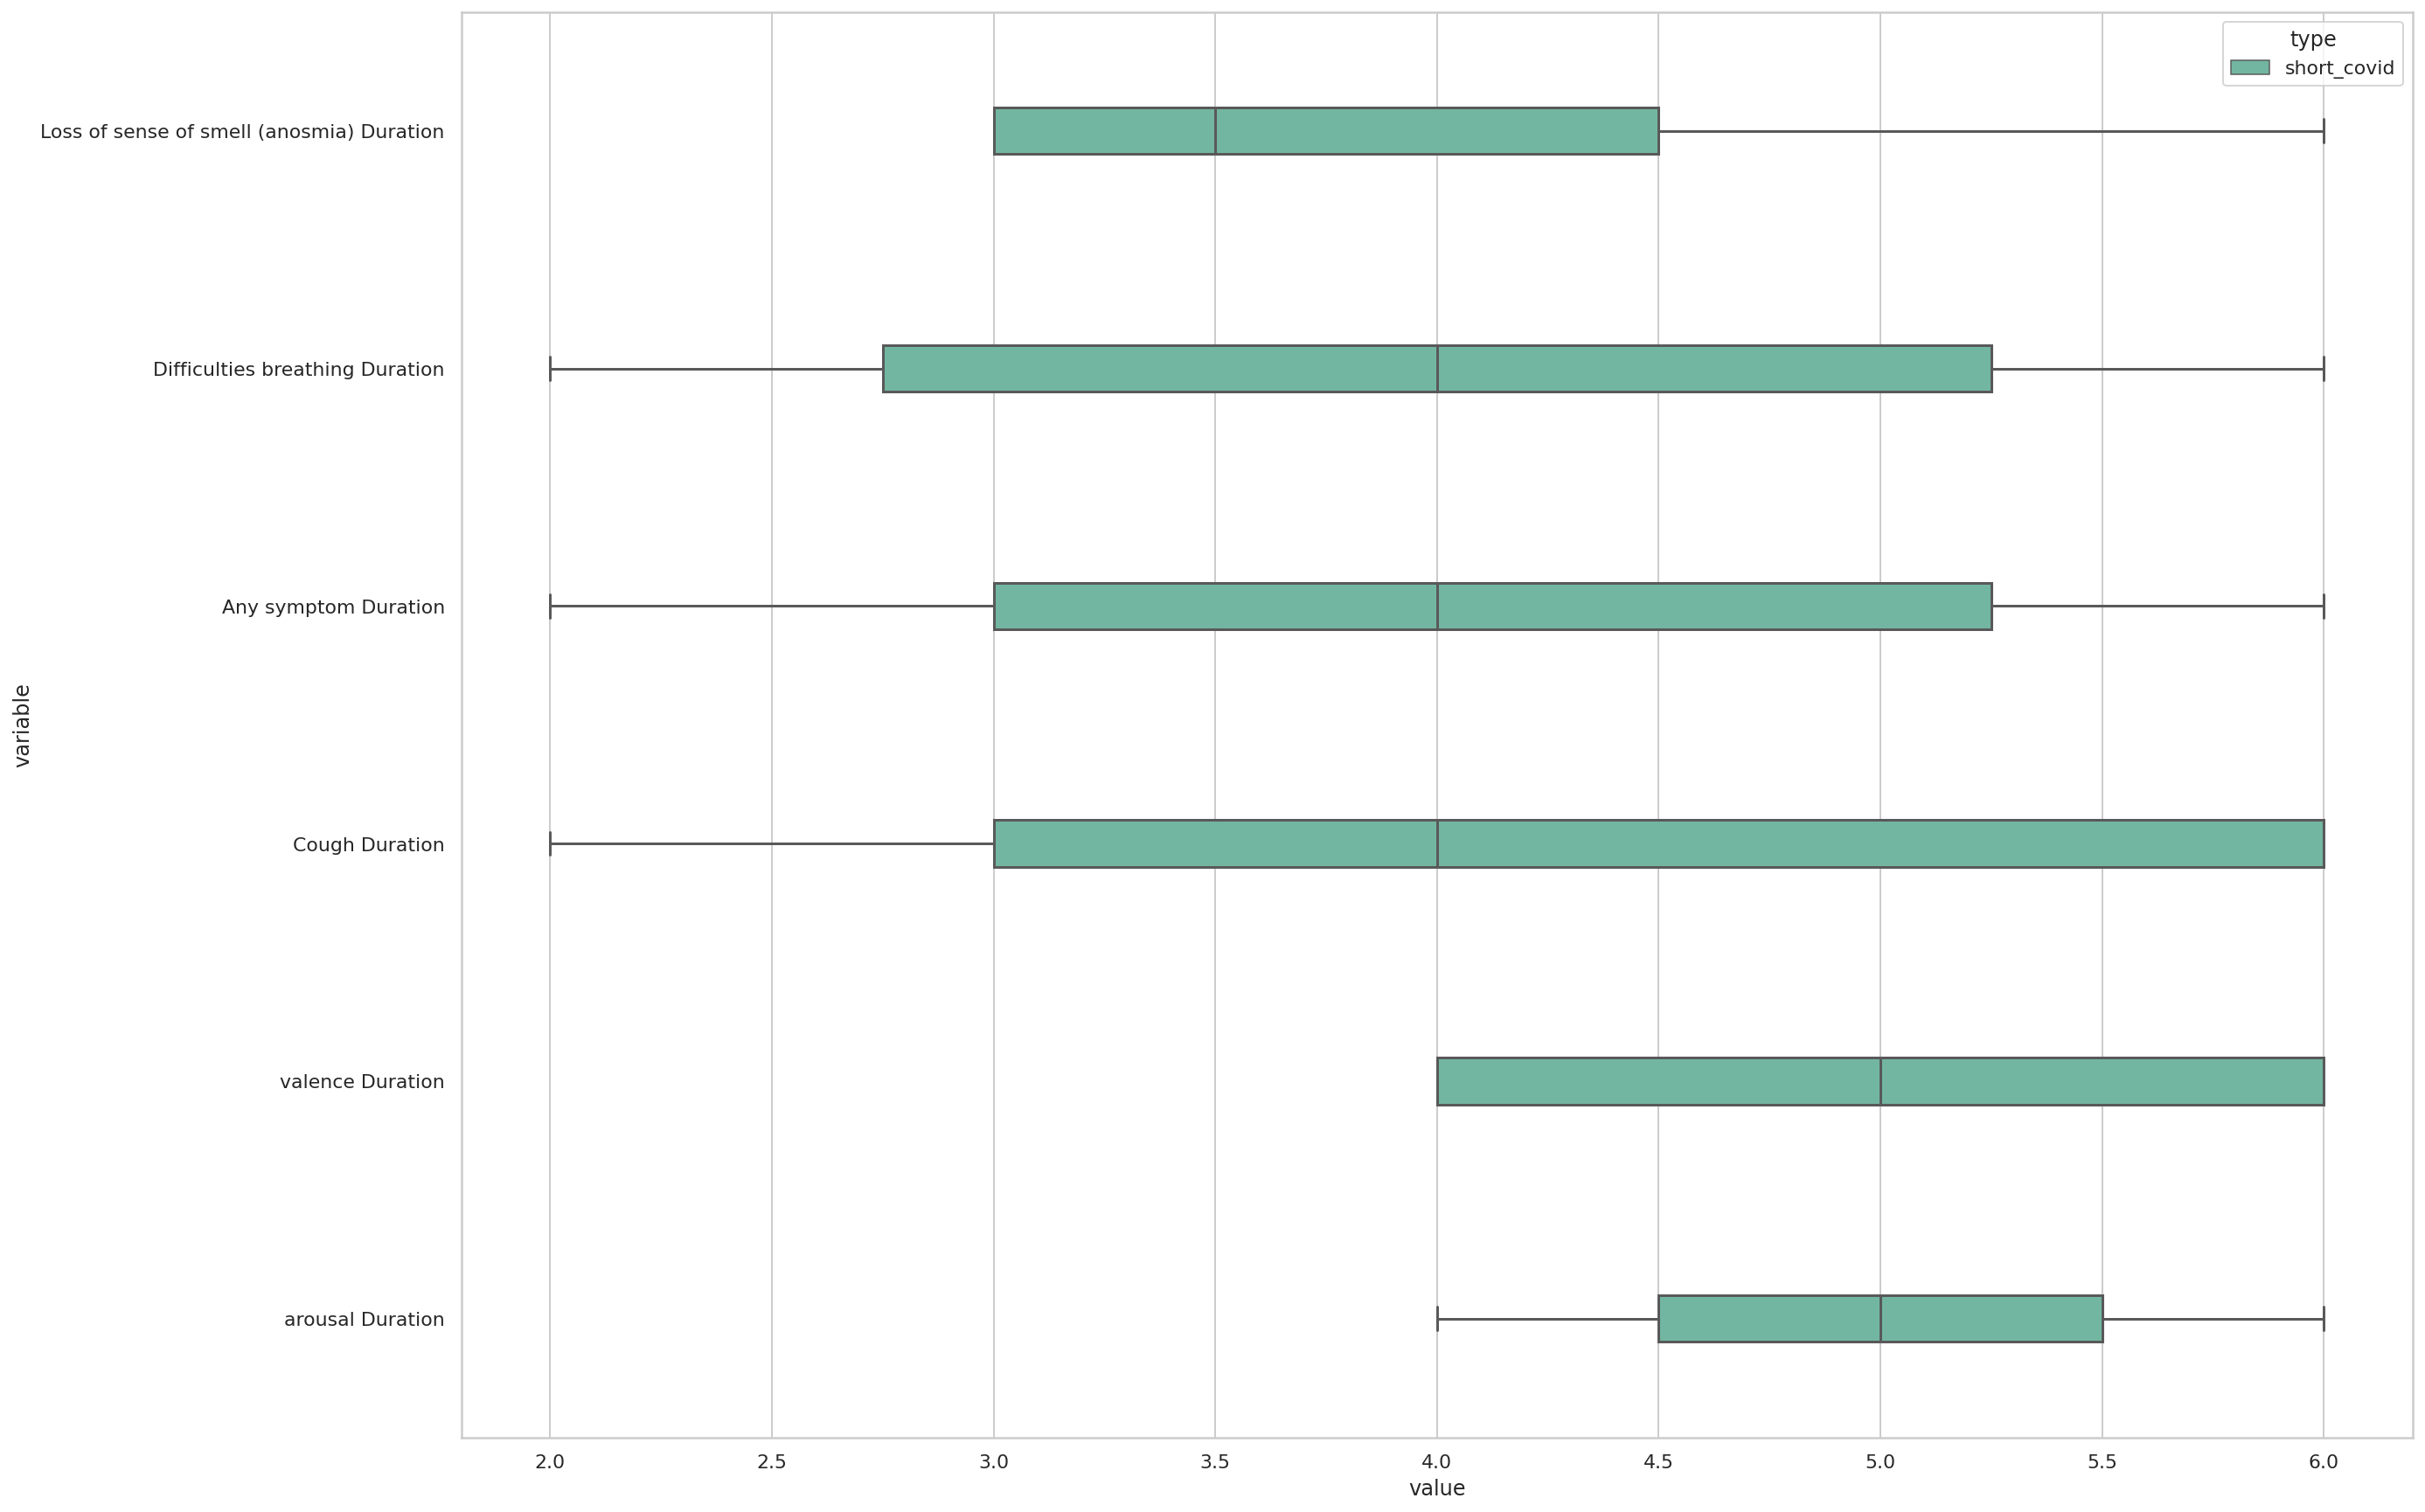

In [729]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.boxplot(ax=ax, x="value", y="variable", orient="h", hue='type', width=0.2, data=short_covid_sns_df, palette="Set2")
plt.show()

<AxesSubplot:xlabel='value', ylabel='variable'>

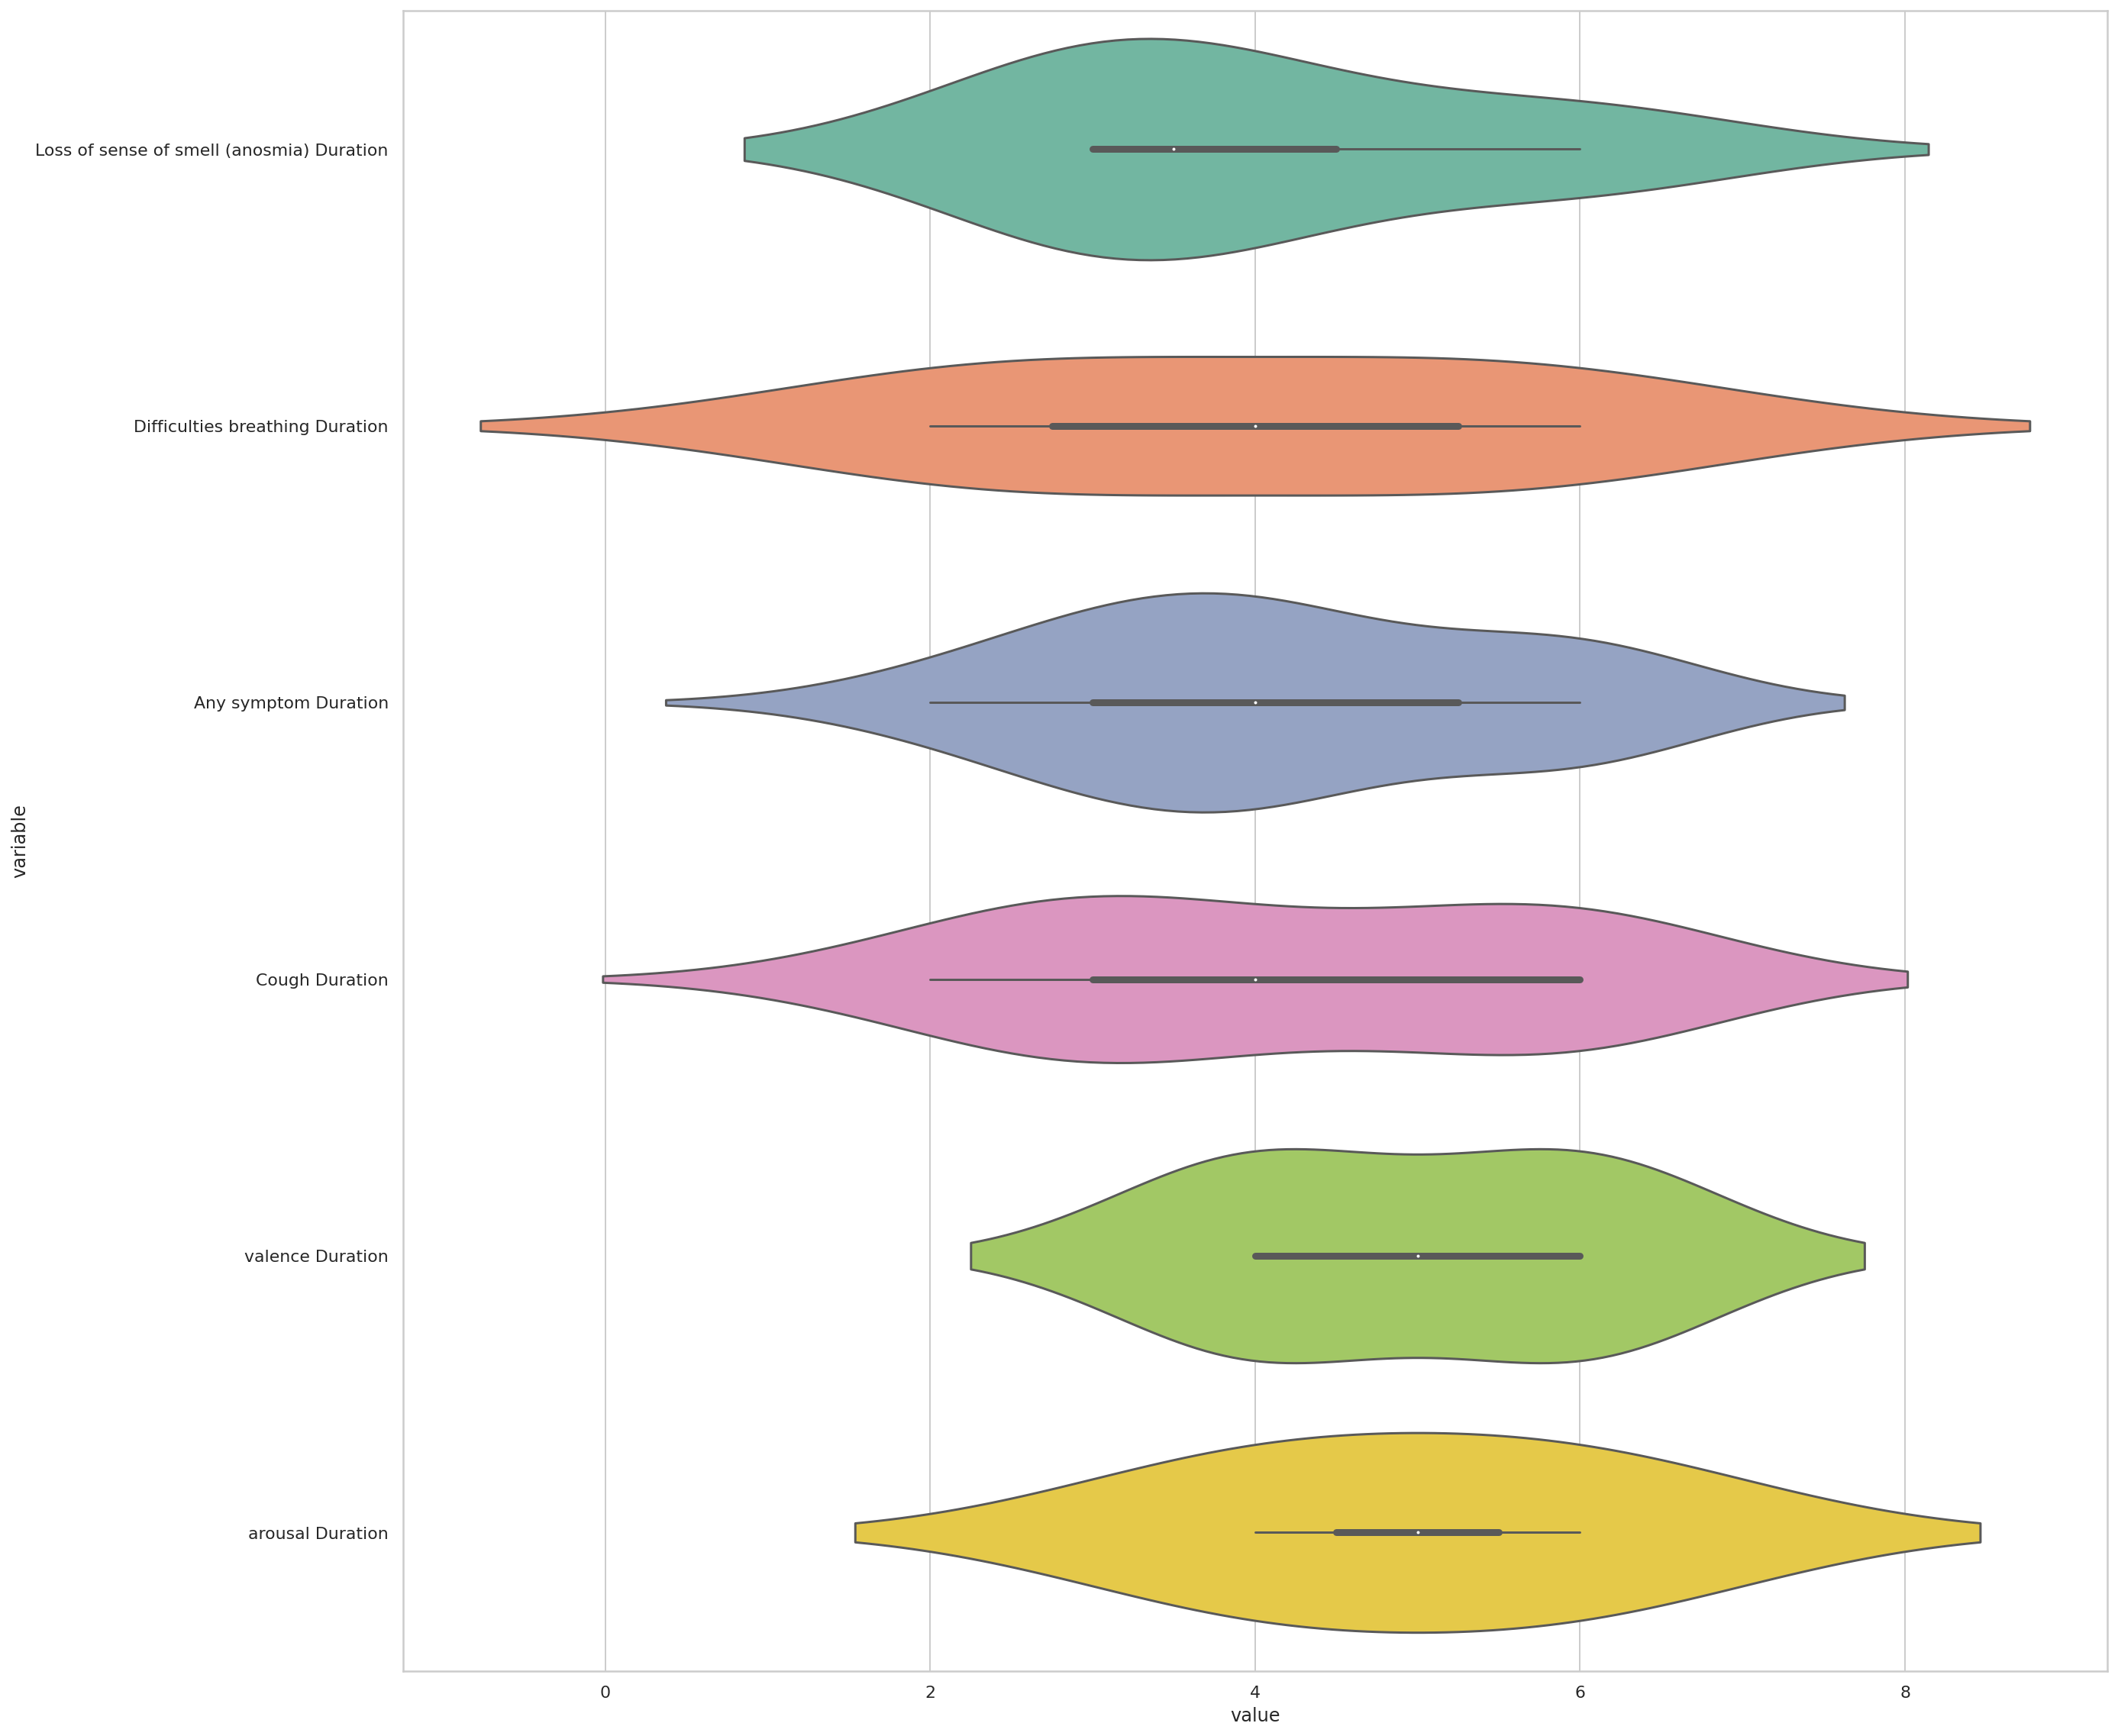

In [730]:
fig, ax = plt.subplots(figsize=(20,20))

sns.violinplot(ax=ax, x="value", y="variable", orient="h", data=short_covid_sns_df, palette="Set2")

plt.show()

### Merge all cohorts

In [874]:
merged_duration_df = pd.concat([short_covid_sns_df, post_acute_sns_df, lcovid_sns_df])

In [868]:
# from sklearn import preprocessing

# x = merged_duration_df['value'].values
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
# merged_duration_df['value'] = pd.DataFrame(x_scaled)

In [875]:
merged_duration_df

variable  value         type
21    Loss of sense of smell (anosmia) Duration    4.0  short_covid
23    Loss of sense of smell (anosmia) Duration    6.0  short_covid
32    Loss of sense of smell (anosmia) Duration    3.0  short_covid
41    Loss of sense of smell (anosmia) Duration    3.0  short_covid
54              Difficulties breathing Duration    6.0  short_covid
...                                         ...    ...          ...
1003                       Any symptom Duration   93.0   long_covid
1004                       Any symptom Duration  157.0   long_covid
1005                       Any symptom Duration  116.0   long_covid
1006                       Any symptom Duration  278.0   long_covid
1007                       Any symptom Duration   56.0   long_covid

[1196 rows x 3 columns]

In [876]:
# merge short covid and post acute covid into one cohort

def merge_c(x):
    if x == 'post_acute_covid':
        return 'short_covid'
    else:
        return x


merged_duration_df['type'] = merged_duration_df['type'].transform(lambda x: merge_c(x))

In [877]:
merged_duration_df['variable'] = merged_duration_df['variable'].transform(lambda x: x.replace(' Duration', ''))

In [878]:
order = merged_duration_df.groupby(['type', 'variable']).median().loc['long_covid'].sort_values(by='value').index

In [813]:
order.unique()

array(['Loss of sense of smell (anosmia)', 'Fever', 'Nausea', 'Headache',
       'arousal', 'Cough', 'Fatigue', 'Chills', 'Difficulties breathing',
       'Confusion', 'valence', 'Muscle or joint pain', 'Congestion',
       'Any symptom'], dtype=object)

[Text(0.5, 0, 'days'),
 Text(0, 0.5, 'Symptom'),
 Text(0.5, 1.0, 'Average duration of symptoms')]

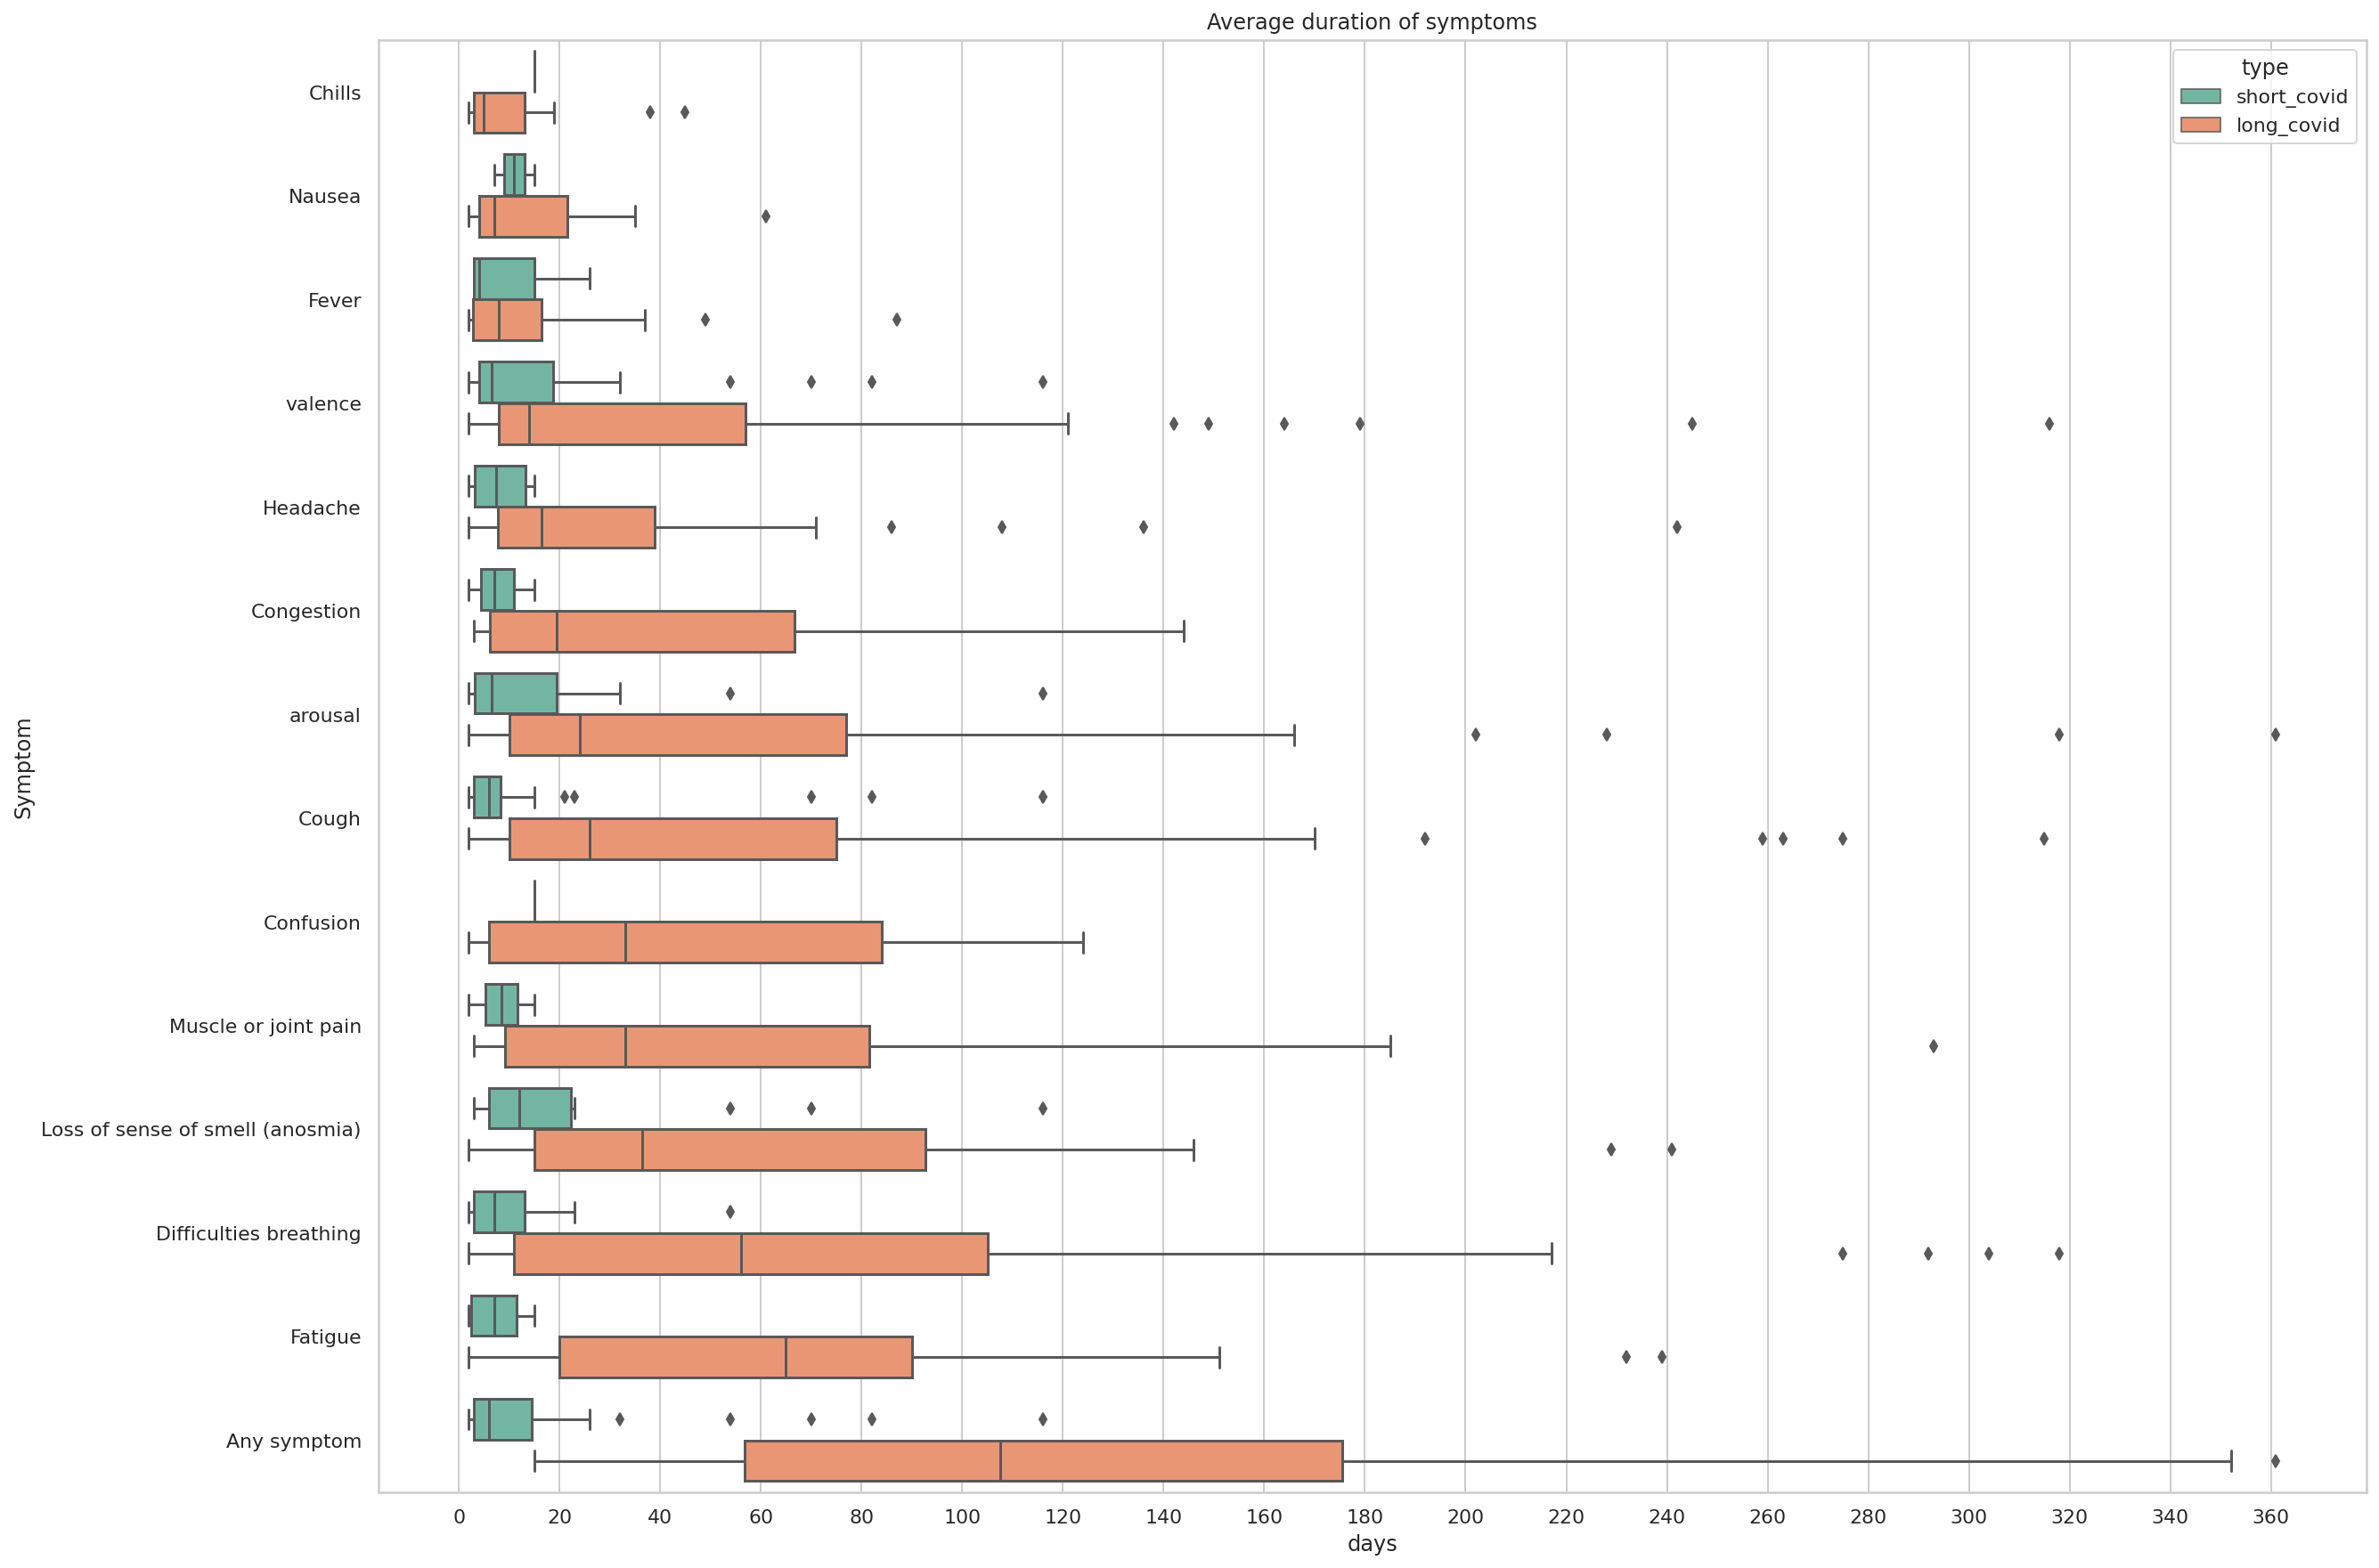

In [879]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.boxplot(ax=ax, x="value", y="variable", orient="h", hue='type', data=merged_duration_df, palette="Set2", order=order)
ax.set(xlabel='days', ylabel='Symptom', title='Average duration of symptoms')
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

In [ ]:
## TODO: Also include Long covid symptoms (possibly combine as most are similar)

In [1287]:
## TODO: Different shades of box for different number/percent of reports for each symptom (show a colorbar for it) Or a different type of width of the box 

#### Report P values of a two-sided Fisher’s exact test applied to long covid and short covid participants

For a single variable, the table could look like - 

              fatigue duration      fatigue severity
short-covid     20                 70
long-covid      70                 20

In [1516]:
p_value_dict = {}
import statistics

for v, grp_df in merged_duration_df.groupby(['variable']):
    r1c1 = grp_df[grp_df['type']=='short_covid']['value'].median()
    #r1c2 = statistics.mean(scovid_df['Fatigue'].mean())
    r2c1 = grp_df[grp_df['type']=='long_covid']['value'].median()
    #r2c2 = statistics.mean(lcovid_df['Fatigue'].mean())
    contingency_table = np.array([[r1c1, r2c1], [r2c1, r1c1]])
    p_value_dict[v] = fisher_exact(contingency_table, alternative='two-sided')
    
p_value_dict

{'Any symptom': (0.0031443794217835617, 2.2399921010512337e-48),
 'Chills': (9.0, 0.0038475273083775265),
 'Confusion': (0.2066115702479339, 0.0004570215291590492),
 'Congestion': (0.13573407202216067, 0.0019771960010750472),
 'Cough': (0.05325443786982249, 9.418780263770839e-07),
 'Difficulties breathing': (0.015625, 1.0299193590535449e-19),
 'Fatigue': (0.011597633136094675, 2.9653294815918316e-24),
 'Fever': (0.25, 0.22034675514282442),
 'Headache': (0.19140625, 0.01736970189699856),
 'Loss of sense of smell (anosmia)': (0.1111111111111111,
  1.6814088745647274e-06),
 'Muscle or joint pain': (0.05876951331496786, 4.54616040995721e-08),
 'Nausea': (2.4693877551020407, 0.31753860154569846),
 'arousal': (0.0625, 6.3187881522597085e-06),
 'valence': (0.1836734693877551, 0.02564477694332113)}

In [1315]:
scovid_df['Fatigue'].median()[0]

0.0

In [1421]:
plot_with_p_values = merged_duration_df.copy()

In [1417]:
plot_with_p_values

variable  value         type
21    Loss of sense of smell (anosmia)    4.0  short_covid
23    Loss of sense of smell (anosmia)    6.0  short_covid
32    Loss of sense of smell (anosmia)    3.0  short_covid
41    Loss of sense of smell (anosmia)    3.0  short_covid
54              Difficulties breathing    6.0  short_covid
...                                ...    ...          ...
1003                       Any symptom   93.0   long_covid
1004                       Any symptom  157.0   long_covid
1005                       Any symptom  116.0   long_covid
1006                       Any symptom  278.0   long_covid
1007                       Any symptom   56.0   long_covid

[1196 rows x 3 columns]

In [1422]:
def transform_with_p_val(x):
    p_val = p_value_dict[x][1]
    if p_val < 0.01:
        p_val = 'P<0.01*'
    else:
        p_val = 'P=' + str(p_val.round(3))
    return f'{x}\n[{p_val}]'

plot_with_p_values['variable'] = plot_with_p_values['variable'].transform(transform_with_p_val)

# for k, v in p_value_dict.items():
#     p_val = v[1]
#     if p_val < 0.01:
#         p_val = '<0.01*'
#     else:
#         p_val = str(p_val.round(3))
#     indices = plot_with_p_values[plot_with_p_values['variable'] == k].index
#     print(k)
#     print(indices)
#     plot_with_p_values.loc[indices, 'variable'] = f'{k} [{p_val}]'

In [1419]:
plot_with_p_values

variable  value         type
21    Loss of sense of smell (anosmia) [P<0.01*]    4.0  short_covid
23    Loss of sense of smell (anosmia) [P<0.01*]    6.0  short_covid
32    Loss of sense of smell (anosmia) [P<0.01*]    3.0  short_covid
41    Loss of sense of smell (anosmia) [P<0.01*]    3.0  short_covid
54              Difficulties breathing [P<0.01*]    6.0  short_covid
...                                          ...    ...          ...
1003                       Any symptom [P<0.01*]   93.0   long_covid
1004                       Any symptom [P<0.01*]  157.0   long_covid
1005                       Any symptom [P<0.01*]  116.0   long_covid
1006                       Any symptom [P<0.01*]  278.0   long_covid
1007                       Any symptom [P<0.01*]   56.0   long_covid

[1196 rows x 3 columns]

[Text(0.5, 0, 'days'),
 Text(0, 0.5, 'Symptom [p-value]'),
 Text(0.5, 1.0, 'Average duration of symptoms')]

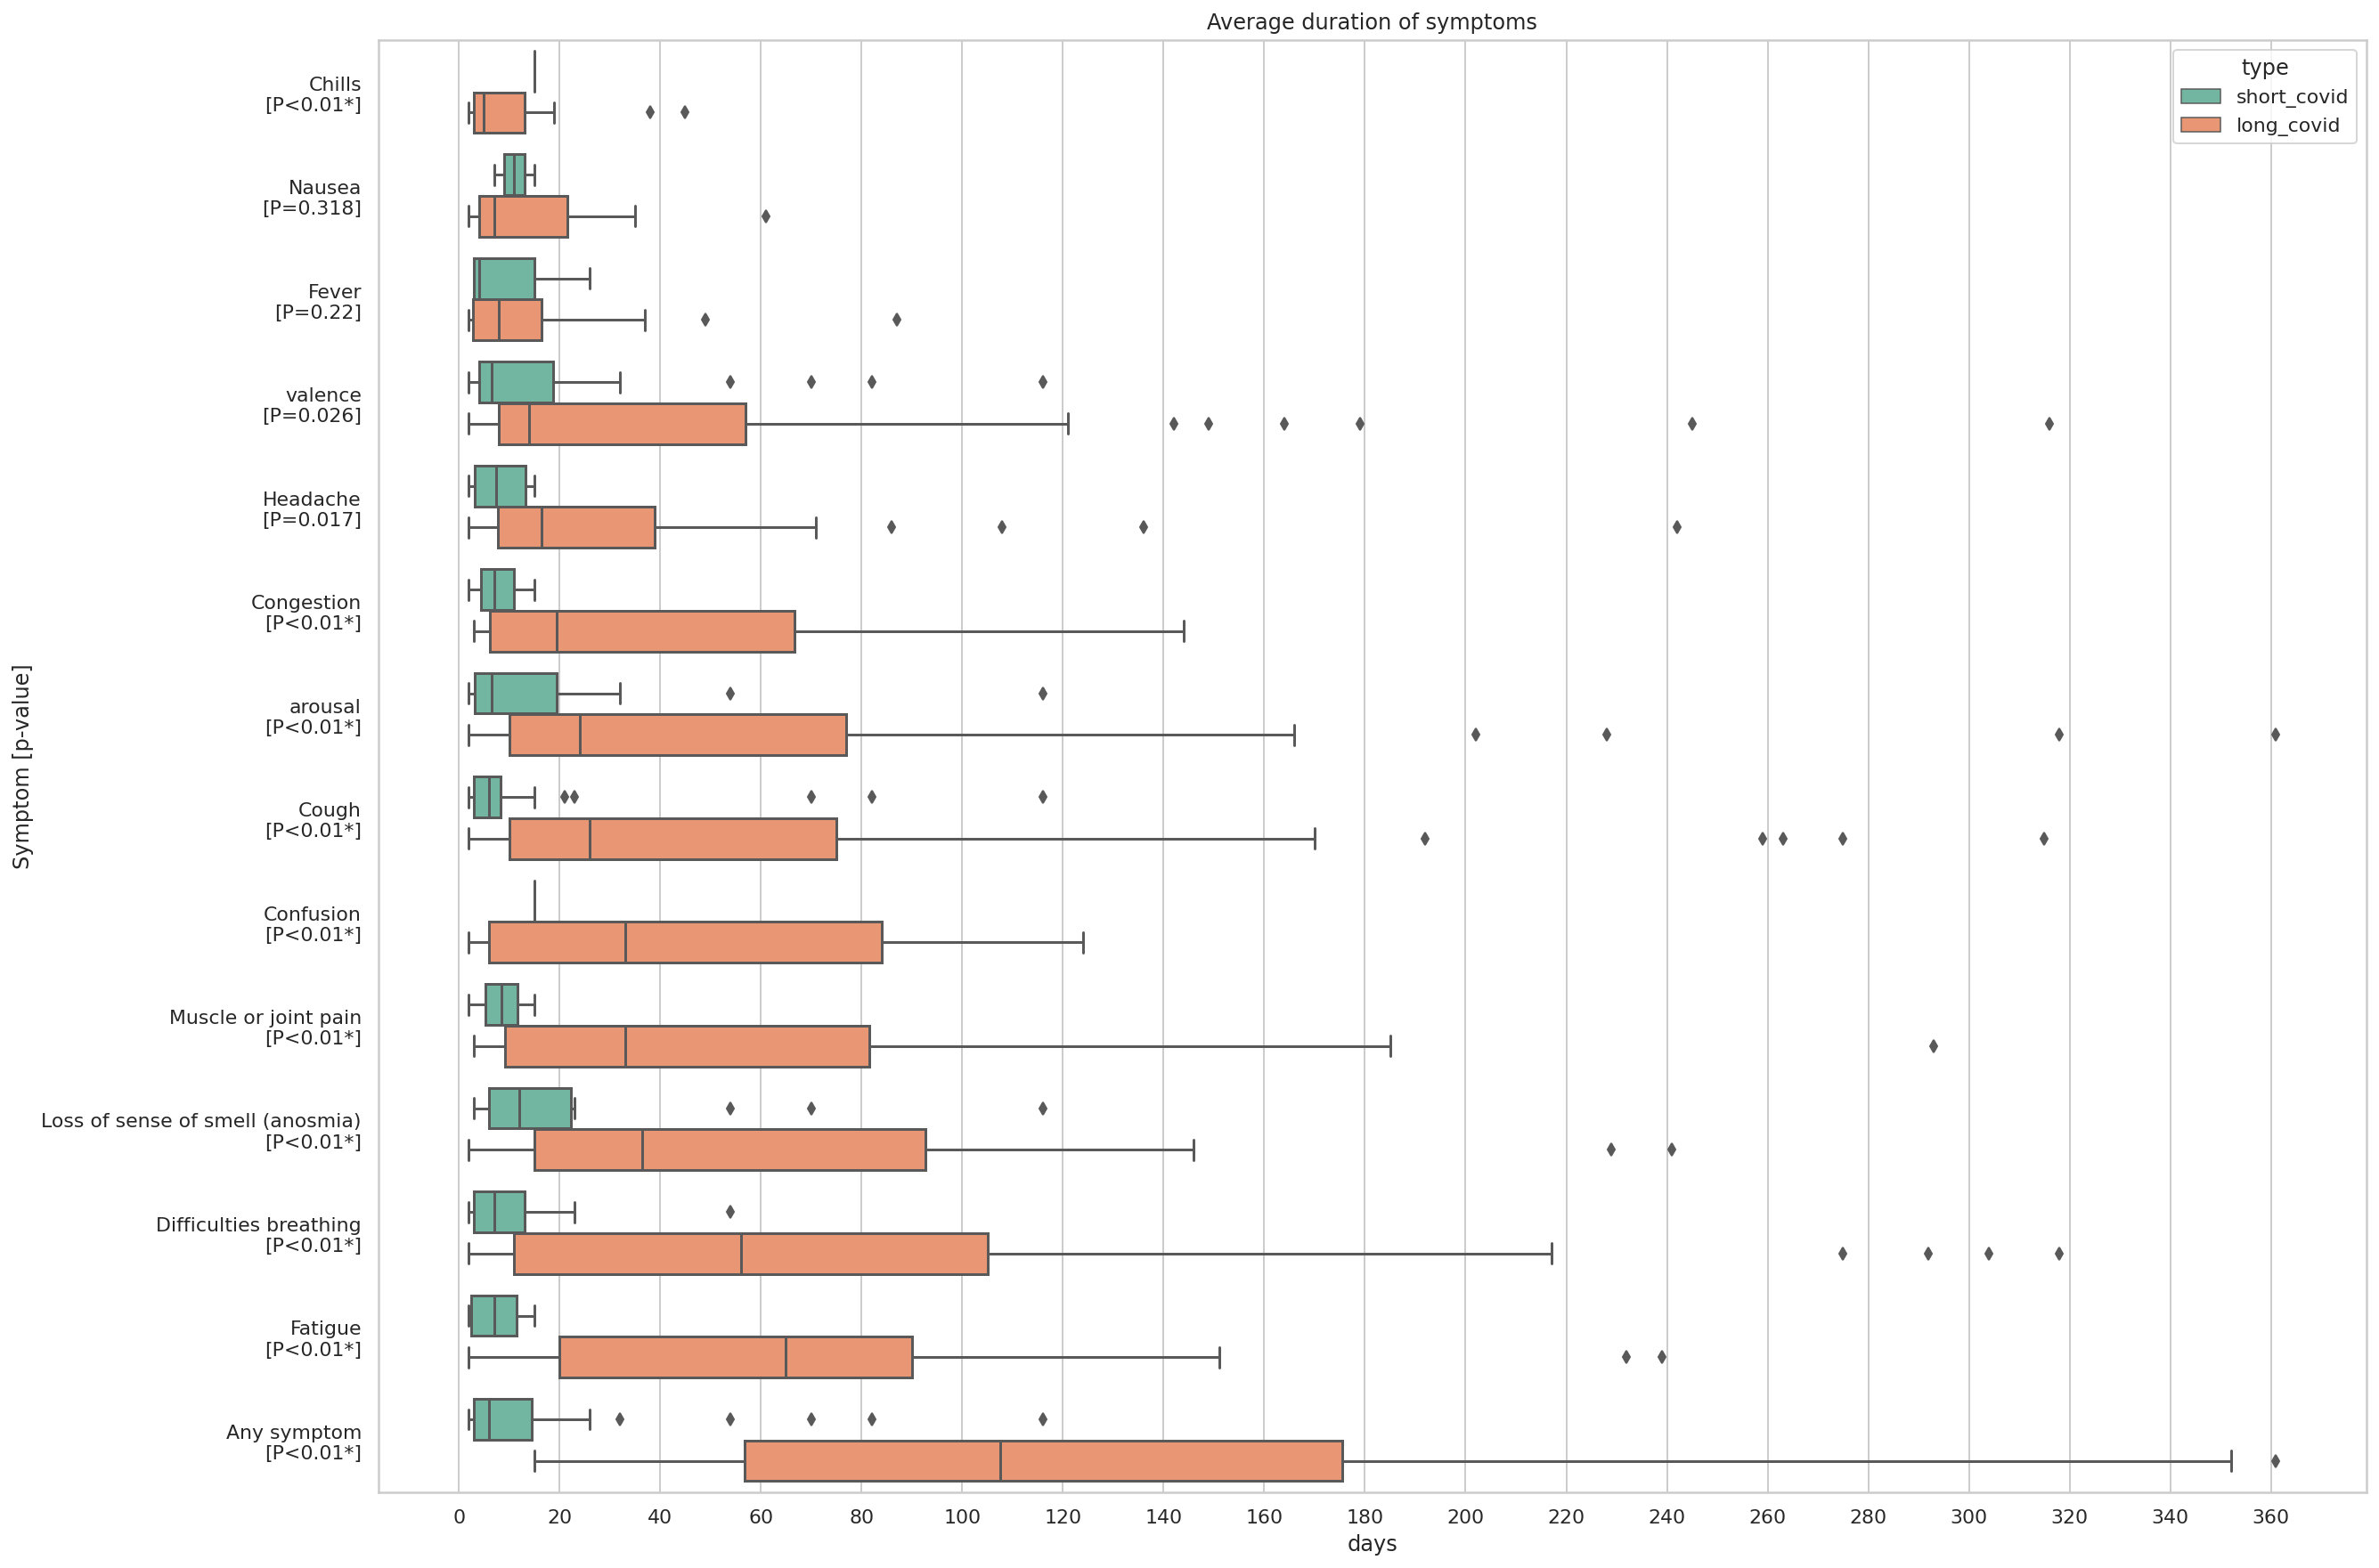

In [1423]:
order1 = plot_with_p_values.groupby(['type', 'variable']).median().loc['long_covid'].sort_values(by='value').index

fig, ax = plt.subplots(figsize=(20,15))
ax = sns.boxplot(ax=ax, x="value", y="variable", orient="h", hue='type', data=plot_with_p_values, palette="Set2", order=order1)
ax.set(xlabel='days', ylabel='Symptom [p-value]', title='Average duration of symptoms')
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

§plt.show()

# Find HEATMAP of durations for each patient and feature to see the patterns
# Find HEATMAP of severity for each patient to see the patterns

In [1504]:
cols_to_include = ['id', 'main_symptom_score', 'secondary_symptom_score', 'lcovid_symptom_score', 'Fatigue',
                   'Loss of sense of smell (anosmia)', 'Chills', 'Nausea', 'Fever', 'Headache', 'Confusion',
                   'Congestion', 'valence', 'arousal', 'Cough', 'Muscle or joint pain', 'Difficulties breathing']

lcov_sns_df = pd.melt(lcovid_df[cols_to_include].reset_index(drop=True).groupby('id').mean().reset_index(drop=True))
lcov_sns_df['type'] = 'long_covid'

short_covid_df = pd.concat([scovid_df, pacovid_df])
short_covid_df = pd.melt(short_covid_df[cols_to_include].reset_index(drop=True).groupby('id').mean().reset_index(drop=True))
short_covid_df['type'] = 'short_covid'

In [1505]:
final_cov_df = pd.concat([short_covid_df, lcov_sns_df])

In [1506]:
i = final_cov_df.groupby(['type', 'variable']).mean().loc[:, 'value'].nlargest(40).index.remove_unused_levels().levels[1].unique()
final_cov_df = final_cov_df[final_cov_df['variable'].isin(i)]

In [1507]:
final_cov_df.groupby(['type','variable']).median()

value
type        variable                                  
long_covid  Chills                            0.000000
            Confusion                         0.000000
            Congestion                        0.005291
            Cough                             0.416667
            Difficulties breathing            0.322581
            Fatigue                           0.283582
            Fever                             0.038462
            Headache                          0.116279
            Loss of sense of smell (anosmia)  0.105263
            Muscle or joint pain              0.054054
            Nausea                            0.000000
            arousal                          -0.072034
            lcovid_symptom_score              0.144578
            main_symptom_score                1.500000
            secondary_symptom_score           0.981818
            valence                           0.069444
short_covid Chills                            0.000000
            Confusion                         0.000000
            Congestion                        0.000000
            Cough                             0.777778
            Difficulties breathing            0.280000
            Fatigue                           0.000000
            Fever                             0.000000
            Headache                          0.000000
            Loss of sense of smell (anosmia)  0.333333
            Muscle or joint pain              0.000000
            Nausea                            0.000000
            arousal                          -0.250000
            lcovid_symptom_score              0.000000
            main_symptom_score                2.000000
            secondary_symptom_score           0.000000
            valence                           0.000000

In [1512]:
p_value_severity_dict = {}
import statistics

for v, grp_df in final_cov_df.groupby(['variable']):
    r1c1 = grp_df[grp_df['type']=='short_covid']['value'].median()
    #r1c2 = statistics.mean(scovid_df['Fatigue'].mean())
    r2c1 = grp_df[grp_df['type']=='long_covid']['value'].median()
    #r2c2 = statistics.mean(lcovid_df['Fatigue'].mean())
    
    print(v, r1c1, r2c1)
    contingency_table = np.array([[r1c1, r2c1], [r2c1, r1c1]])
    p_value_severity_dict[v] = fisher_exact(contingency_table, alternative='two-sided')
    
p_value_severity_dict

Chills 0.0 0.0
Confusion 0.0 0.0
Congestion 0.0 0.005291005291005291
Cough 0.7777777777777778 0.4166666666666667
Difficulties breathing 0.28 0.3225806451612903
Fatigue 0.0 0.2835820895522388
Fever 0.0 0.038461538461538464
Headache 0.0 0.11627906976744186
Loss of sense of smell (anosmia) 0.3333333333333333 0.10526315789473684
Muscle or joint pain 0.0 0.05405405405405406
Nausea 0.0 0.0
arousal -0.25 -0.07203389830508475
lcovid_symptom_score 0.0 0.14457831325301204
main_symptom_score 2.0 1.5
secondary_symptom_score 0.0 0.9818181818181818
valence 0.0 0.06944444444444445


{'Chills': (nan, 1.0),
 'Confusion': (nan, 1.0),
 'Congestion': (nan, 1.0),
 'Cough': (nan, 1.0),
 'Difficulties breathing': (nan, 1.0),
 'Fatigue': (nan, 1.0),
 'Fever': (nan, 1.0),
 'Headache': (nan, 1.0),
 'Loss of sense of smell (anosmia)': (nan, 1.0),
 'Muscle or joint pain': (nan, 1.0),
 'Nausea': (nan, 1.0),
 'arousal': (nan, 1.0),
 'lcovid_symptom_score': (nan, 1.0),
 'main_symptom_score': (4.0, 1.0),
 'secondary_symptom_score': (nan, 1.0),
 'valence': (nan, 1.0)}

In [1513]:

tab = np.array([[1,2], [2, 1]])
fisher_exact(tab, alternative='two-sided')

(0.25, 0.019383188261790023)

[Text(0.5, 0, 'Severity'),
 Text(0, 0.5, 'Symptom [p-value]'),
 Text(0.5, 1.0, 'Average severity of symptoms')]

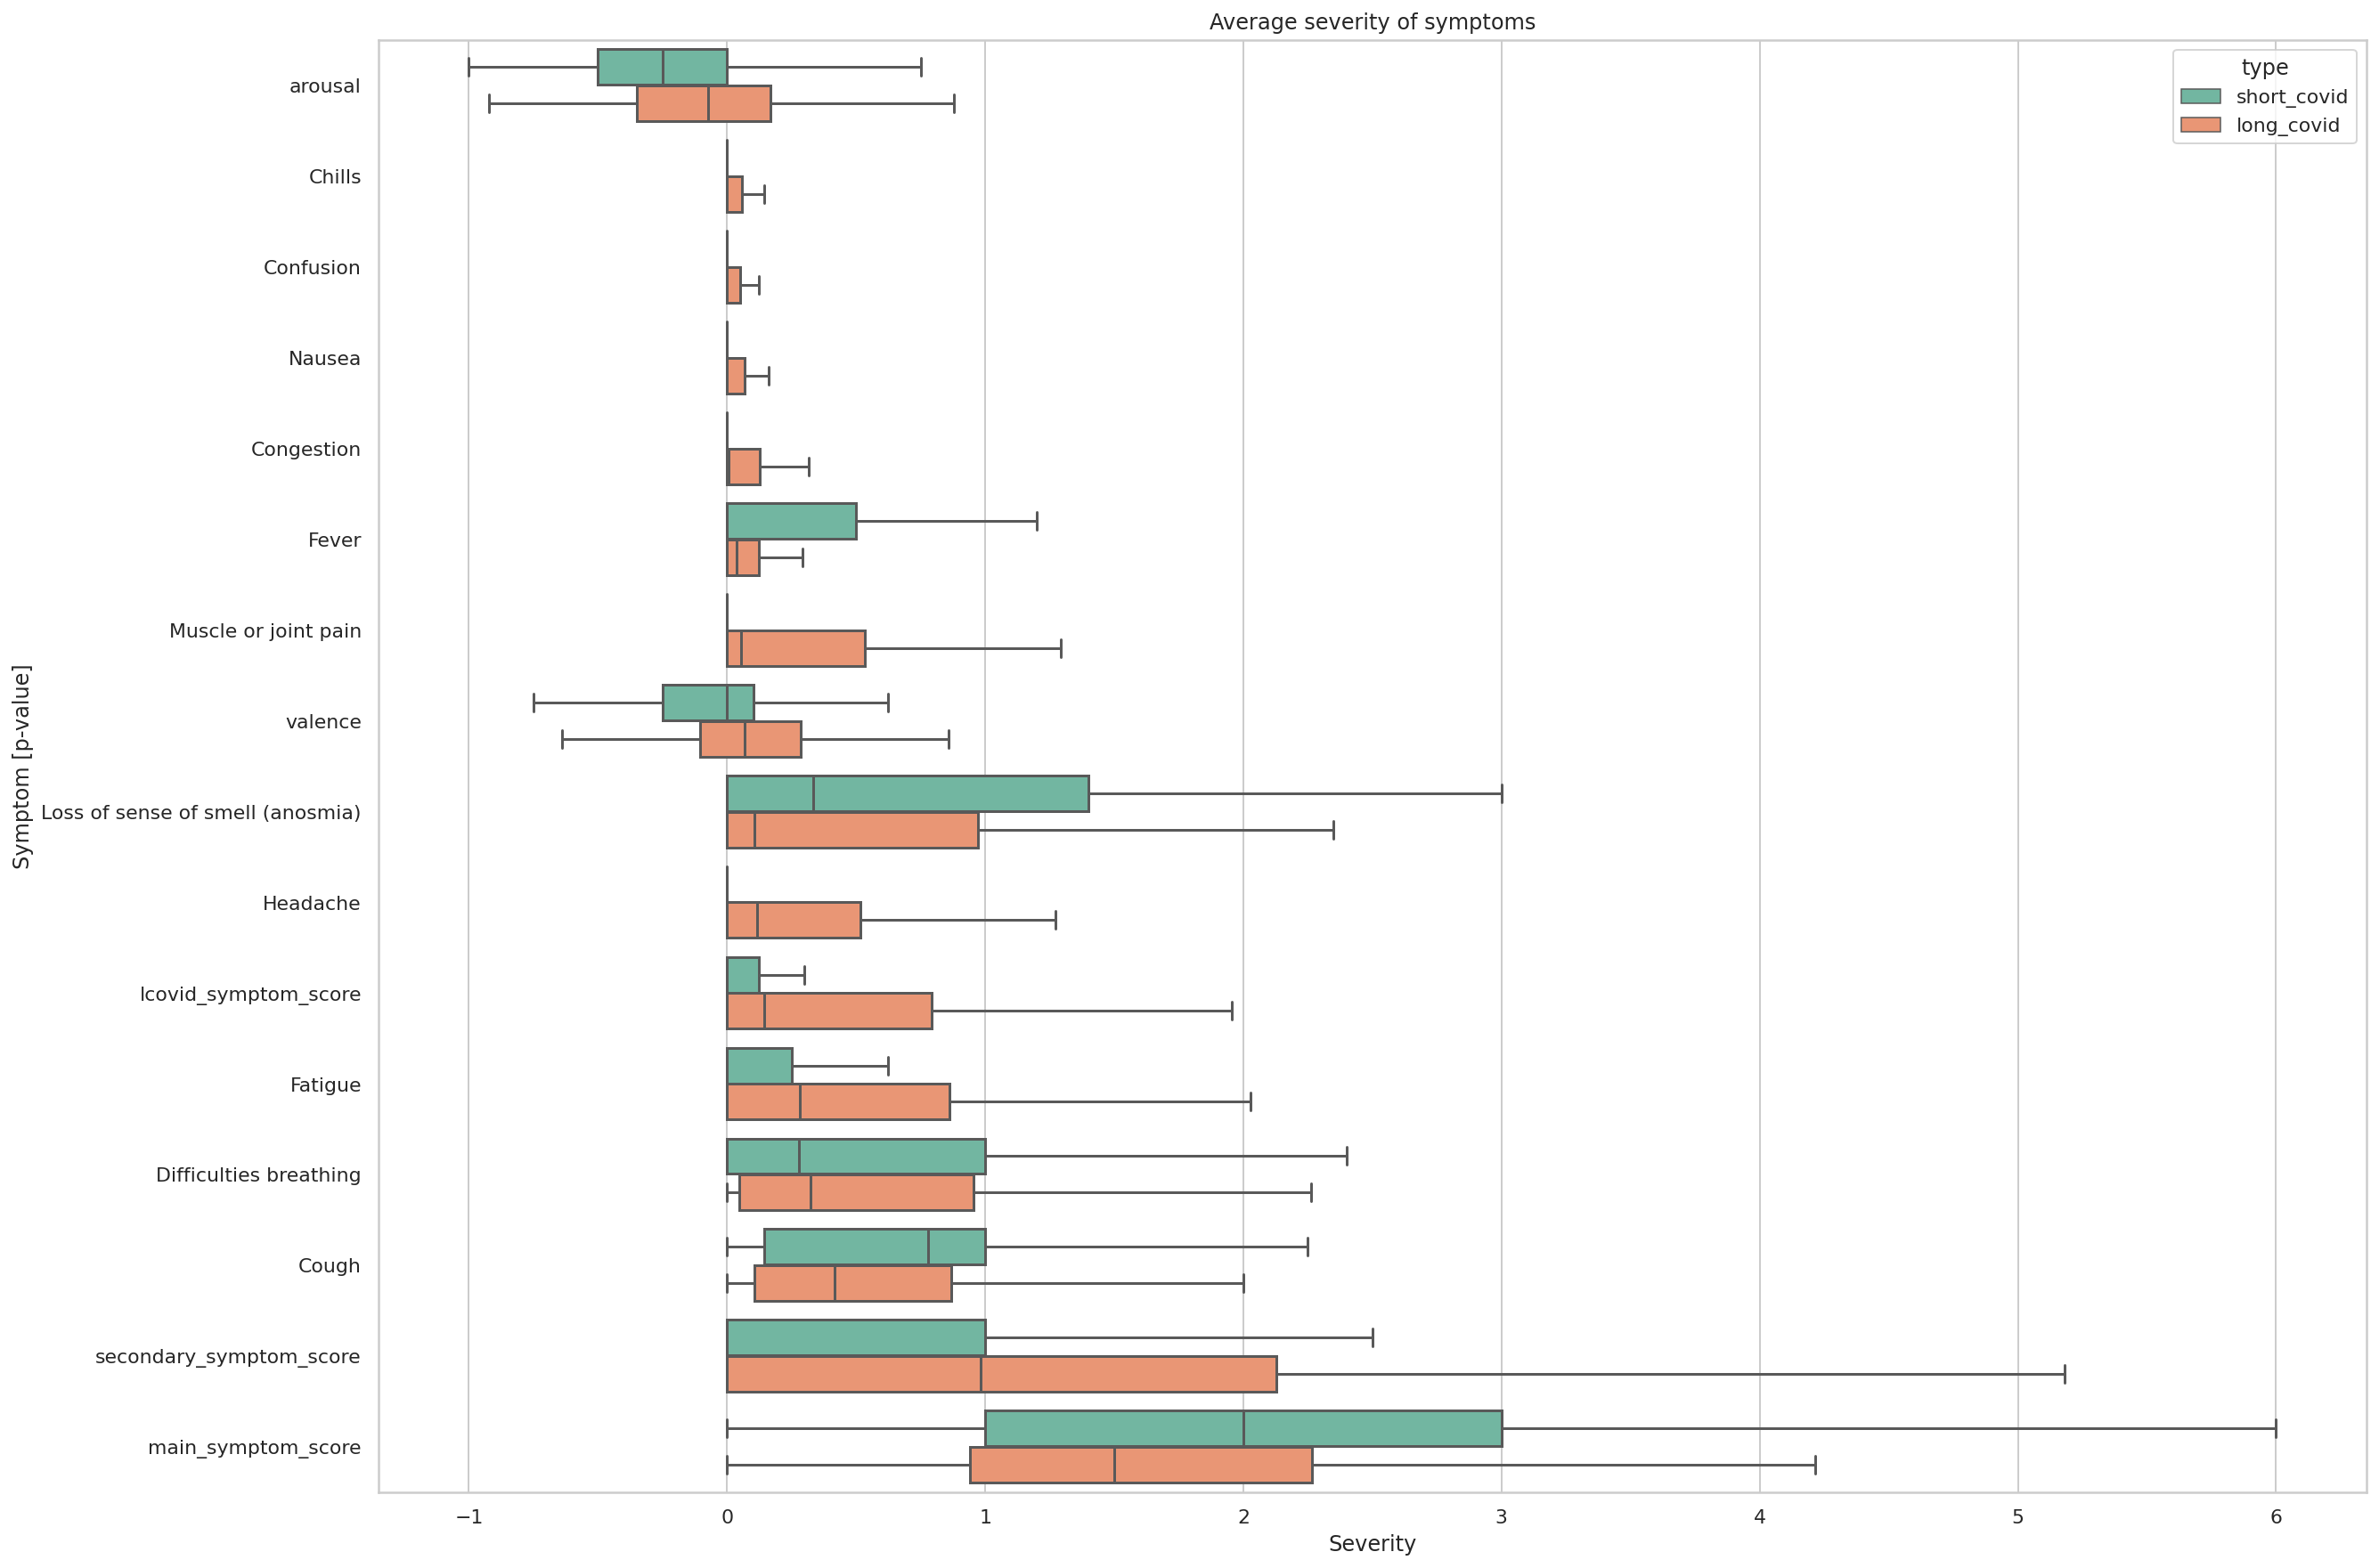

In [1511]:
order2 = final_cov_df.groupby(['type', 'variable']).median().loc['long_covid'].sort_values(by='value').index

fig, ax = plt.subplots(figsize=(20,15))
ax = sns.boxplot(ax=ax, x="value", y="variable", orient="h", hue='type', data=final_cov_df, palette="Set2", order=order2, showfliers=False)
ax.set(xlabel='Severity', ylabel='Symptom [p-value]', title='Average severity of symptoms')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

# Clustering and disease progression
-  For Lcovid cohort, check patches of long symptoms and calculate the top 4 durations and print the average duration of each path for different symptoms
-  Can also try clustering the counts from the durations dfs.
-  Like https://towardsdatascience.com/a-must-know-new-clustering-algorithm-for-disease-modelling-7c28cd031434 

## SuStaIn 

I'd suggest the following workflow for getting your data ready to run SuStaIn on.

1. Regress out the effects of covariates. Learn the effects of covariates in a control population and use this model to regress out the effect of covariates for all the subjects. Learning the model in the control population will avoid regressing out disease effects, which you want to keep in your dataset.

2. Calculate the mean and standard deviation of each biomarker in your control dataset, mean_control and std_control.

3. Z-score your data by taking (data-mean_control)/std_control.

4. Identify any biomarkers that decrease with disease progression, these will have mean_data < mean_control. Multiply the data for these biomarkers by -1.

- The mean in our case will be from the data before the diagnosis ( when symptoms reported have a very low severity (<=1) )
- Inverse relation biomarkers: sleep duration, valence, arousal

- Inclusion criteria: At least a week of baseline data to calculate the mean and std dev for z-scores.
- Can also use healthy controls' mean and std dev

### Calculate baseline mean and std dev

#### First try with baseline data from diagnosed cohort behore diagnosis

In [57]:
def calculate_baseline_diagnosed(final_df, minimum_data_points=2, prior_window='7D', cohort='lcovid'):
    
    users_baseline = dict()
    count=0
    for grp, grp_df in final_df.groupby('id'):

        # get diagnosis date so can filter for only dates after diagnosis for each user
        start = diagnosis_filtered[diagnosis_filtered['id'] == grp]
        
        temp_df = grp_df.copy()

        i = 0
        for index, row in start.iterrows():
            if pd.notnull(start.iloc[0]['task_date_illness_value']):
                index = pd.to_datetime(row['task_date_illness_value'], infer_datetime_format=True)
        #         elif pd.notnull(start.iloc[0]['task_date_diagnosed_value']):
        #             index = pd.to_datetime(start.iloc[0]['task_date_diagnosed_value'], infer_datetime_format=True)
            
            i+=1
            # If more than 1 diagnosis, we create a unique id for the same user
            if i > 1:
                try:
                    grp = f'{grp}_repeat_{i}'
                except ValueError as ve:
                    print(ve)
                    display(grp_df)
                    display(grp)
                    raise ve
                    
            user_agg={
                'id': grp,
                'type': cohort
            }
            
#             print(grp, grp_df)
#             assert(False)


            
            ####### TODO: Also add symptom severity. i.e. If total_symptom_severity is <= 1 
            temp_df['time'] = pd.to_datetime(temp_df['time'], infer_datetime_format=True)
                
            if len(temp_df[temp_df['time'] < (index - pd.Timedelta(prior_window))]) < minimum_data_points:
                user_agg['error'] = f'{grp} user does not have enough data before diagnosis date {index}'
                user_agg['diagnosis'] = index
                users_baseline[grp] = user_agg
                continue
                
            user_df = pd.DataFrame(index=['mean', 'std_dev'])
            
            for col in grp_df.columns:

                if col=='time' or col=='id':
                    continue

                user_df.loc['mean', col] = temp_df[temp_df['time'] < (index - pd.Timedelta(prior_window))][col].mean()
                user_df.loc['std_dev', col] = temp_df[temp_df['time'] < (index - pd.Timedelta(prior_window))][col].std()

            user_agg['baseline_df'] =  user_df
            users_baseline[grp] = user_agg

            count+=1
            print(f'progress: {count}', end='\x1b[1K\r')

    #         if count==3:
    #             break

    print(f'Total added: {count}')
    return users_baseline

In [58]:
prep_df = symptoms_with_diag_filtered.drop(columns=['name', 'time_received', 'time_start'] + list(symptoms_with_diag_filtered.filter(regex='.*_time_start').columns) + list(symptoms_with_diag_filtered.filter(regex='.*_time_end').columns))
u_bline = calculate_baseline_diagnosed(prep_df)

Total added: 461K


In [ ]:
for uid, value in u_bline.items():
    print(uid, value)
    break

Try to build figures based on this:

https://www.nature.com/articles/s41467-022-29521-z#Fig5